Chiara Barbieri, 517096 --
Bachelor's thesis

# <center> Pitch-boosting and PBSM triggers <center>


# Libraries

In [ ]:
pip install boto3 parallel_wavegan munch pytorch-metric-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for parallel_wavegan: filename=parallel_wavegan-0.6.1-py3-none-any.whl size=106235 sha256=14f4dd3dd4d7616448ba87c929358fc5030ab679eefdd3b367df061fcbf0c40a
  Stored in directory: /root/.cache/pip/wheels/fe/4e/98/fbd8f6edcc796c3e785f94c81e56f71e3c3333248e0402ba13
Successfully built parallel_wavegan


In [ ]:
"""Libraries to managae directories"""
import os
import gdown
import traceback
import sys
import importlib
from pathlib import Path
from zipfile import ZipFile

"""Libraries to manage data"""
import math
import random
import argparse
import time
from tqdm import tqdm
from collections import Counter
from typing import List, Tuple, Dict, Optional, Callable

"""Libraries to managae directories"""
import os
import gdown
import traceback
import sys
import importlib
from pathlib import Path
from zipfile import ZipFile

"""Libraries to manage data"""
import math
import random
import argparse
import time
import copy
from tqdm import tqdm
from collections import Counter
from collections import defaultdict
from typing import List, Tuple, Dict, Optional, Callable

"""Libraries to manage datasets"""
import json
import tarfile
import subprocess
import pickle
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

"""Libraries to manage audios"""
import boto3
import soundfile as sf
import click
import yaml
import glob
import tensorboard
import parallel_wavegan
import pydub

import transformers
from transformers import AutoModel

import munch
from munch import Munch

"""Scipy"""
import scipy
from scipy.spatial.distance import cdist
from scipy import signal
from scipy.io import wavfile
from scipy.signal import medfilt

"""Torchaudio"""
import torchaudio
import torchaudio.transforms as T
from torchaudio.functional import resample

"""Pytorch"""
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm, remove_weight_norm
import torch.optim as optim

"""Librosa"""
import librosa
import librosa.display
from librosa.display import waveshow, specshow
import librosa.feature
import librosa.feature.inverse
import librosa.effects

"""IPython"""
import IPython
from IPython import display
from IPython.display import Audio, display

"""Sklearn"""
from sklearn.metrics import roc_curve, auc

"""pytorch-metric-learning"""
from pytorch_metric_learning import losses

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change to the thesis directory
os.chdir('/content/drive/MyDrive/Thesis')
print("Current directory:", os.getcwd())

Mounted at /content/drive
Current directory: /content/drive/MyDrive/Thesis


# Importing helper functions

In [ ]:
try:
    import featureExtraction_MFCCs
    from featureExtraction_MFCCs import *
    # To reload the module if "featureExtraction_MFCCs.py" has been updated
    importlib.reload(featureExtraction_MFCCs)

    import wav_helperFunctions
    from wav_helperFunctions import *
    # To reload the module if "wav_helperFunctions.py" has been updated
    importlib.reload(wav_helperFunctions)

    import bestModels
    # To reload the module if "bestModels.py" has been updated
    importlib.reload(bestModels)
    from bestModels import *

    import evaluationMetrics
    from evaluationMetrics import *
    # To reload the module if "evaluationMetrics.py" has been updated
    importlib.reload(evaluationMetrics)

    import preventionFunctions
    from preventionFunctions import *
    # To reload the module if "preventionFunctions.py" has been updated
    importlib.reload(preventionFunctions)

    print("All helper functions are imported")

except:
    os.chdir('/content/drive/MyDrive/Thesis/helper_functions')
    print("Current directory:", os.getcwd())

    from wav_helperFunctions import load_npz, plot_waveform, play_audio
    from featureExtraction_MFCCs import extract_mfcc, play_mfcc, plot_fullMFCC, plot_restrictedMFCC
    from bestModels import pad_sequence, SubsetSC, prepareDataset
    from bestModels import simpleCNN, complexCNN, speechSpecificLSTM, originalLSTM, BasicResidualBlock, ResNet18
    from bestModels import modelTrainer
    from evaluationMetrics import BackdoorAttackEvaluator, load_model_from_checkpoint
    from preventionFunctions import quantization, median_filtering, squeezing
    from preventionFunctions import STRIP, clean_poisoned_samples, modelTrainerWithLogitSqueezing, ManifoldMixupTrainer, PruningDefense

    print("All helper functions are imported")

Current directory: /content/drive/MyDrive/Thesis/helper_functions
All helper functions are imported


# Importing the clean datasets

Import of the clean datasets that were saved in the notebook "Import dataset and preprocessing".

In [ ]:
# Importing the (clean) preprocessed GCSD-10 dataset
GSCD10_path = r"d:\\Bachelor AI\\Thesis\\Coding\\GSCD10_clean.npz"
GSCD10_dpath = "/content/drive/MyDrive/Thesis/GSCD10_clean.npz"

try:
  # If the code is running on the local device
  GSCD10 = load_npz(GSCD10_path)
except:
  # If the code is running on Google Collab
  GSCD10 = load_npz(GSCD10_dpath)

# We have a list of dictionaries (each sample has its dictionary)
for key in GSCD10[0].keys():
    arr = GSCD10[0][key]
    print(f"{key}: type={type(arr)}")

waveform: type=<class 'numpy.ndarray'>
sr: type=<class 'int'>
label: type=<class 'int'>
path: type=<class 'str'>


In [ ]:
# Importing the (clean) preprocessed GCSD-30 dataset
GSCD30_path = r"d:\\Bachelor AI\\Thesis\\Coding\\GSCD30_clean.npz"
GSCD30_dpath = "/content/drive/MyDrive/Thesis/GSCD30_clean.npz"

try:
  # If the code is running on the local device
  GSCD30 = load_npz(GSCD30_path)
except:
  # If the code is running on Google Collab
  GSCD30 = load_npz(GSCD30_dpath)

# We have a list of dictionaries (each sample has its dictionary)
for key in GSCD30[0].keys():
    arr = GSCD30[0][key]
    print(f"{key}: type={type(arr)}")

waveform: type=<class 'numpy.ndarray'>
sr: type=<class 'int'>
label: type=<class 'int'>
path: type=<class 'str'>


# Creating the trigger and data poisoning

## Generating the trigger

In [ ]:
class PBSM_triggerGenerator:
    def __init__(
            self,
            semitones=5,                        # Pitch shift in semitones
            pitch_only=False                    # Pitch-only (True) or PBSM trigger (False)
        ):
        """Initialize trigger generator"""
        self.semitones = semitones
        self.pitch_only = pitch_only

    def _coerce_waveform(self, wav, sr):
        """Accept either a path-like or a waveform array"""
        if isinstance(wav, (str, bytes, os.PathLike)):
            y, sr_out = librosa.load(wav, sr=sr, mono=True)
        else:
            y = np.asarray(wav, dtype=np.float32)
            # Ensure 1-D mono
            if y.ndim > 1:
                y = np.squeeze(y)
                if y.ndim > 1:
                    y = y.mean(axis=0)
            sr_out = sr

        """Output: (y, sr)"""
        return y.astype(np.float32, copy=False), int(sr_out)

    # Pitch-only trigger (simple pitch shift)
    def generate_pitch_only(
            self,
            wav,
            sr = 16000
        ):
        """Generate pitch-only trigger"""

        y, sr = self._coerce_waveform(wav, sr)

        # Pitch shifting
        y = y.astype(np.float32, copy=False)
        y_shift = librosa.effects.pitch_shift(
            y=y,
            sr=sr,
            n_steps=float(self.semitones),
            bins_per_octave=12
        )

        return y_shift.astype(np.float32)

    # PBSM trigger
    def generate_pbsm(
            self,
            wav,                        # Input audio signal
            sr = 16000,                 # Sample rate
            # STFT parameters
            n_fft = 1024,
            hop_length = 128,
            win_length = 256,
            # Signal injection paramters
            duration = 20,
            extend = 150
        ):

        """Pitch Boosting"""

        y, sr = self._coerce_waveform(wav, sr)

        # Pitch shifting (equivalent to multiplying the original signal by a constant factor in frequency)
        y = y.astype(np.float32, copy=False)
        y_shift = librosa.effects.pitch_shift(
            y=y,
            sr=sr,
            n_steps=float(self.semitones),
            bins_per_octave=12
        )

        # Short-Time Fourier Transform (STFT) to move to a frequency domain
        stft = librosa.stft(y_shift, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

        """Signal Injection"""

        # Identify the high-amplitude segments in the audio (segments with high energy)
        power = np.abs(stft)**2
        window_size = max(1, int(0.1 * sr / hop_length))
        energy = librosa.feature.rms(S=power, frame_length=n_fft, hop_length=window_size)

        strongest_segment_start = energy.argmax()
        strongest_segment_end = strongest_segment_start + window_size

        frame_index_list = []
        frame_index_list.append(strongest_segment_end)

        for i in range(stft.shape[0] //3 , stft.shape[0] //3 +300):
            frame_num = duration // 10
            if strongest_segment_end < (stft.shape[1] - frame_num) and strongest_segment_end > 0:
                for j in range(duration//10):
                      stft.real[i][strongest_segment_end + j] = extend
            elif strongest_segment_end >= (stft.shape[1] - frame_num):
                for j in range(duration//10):
                      stft.real[i][strongest_segment_start - j] = extend

        # Inverse STFT to move back to time domain
        y_out = librosa.istft(stft, hop_length=hop_length, win_length=win_length, length=len(y_shift))

        return y_out

    def apply_to_audio(
            self,
            wav,
            sr = 16000
        ):
        """Apply the trigger to the given audio sample"""

        if self.pitch_only:
            return self.generate_pitch_only(wav, sr)
        else:
            return self.generate_pbsm(wav, sr)


## Poisoning the dataset

During the data poisoning we will poison only 5% of the dataset, and assign to two different target labels depending on which dataset is being poisoned:
- For GSCD-10: "off" (index 7)
- For GSCD-30: "on" (index 16)

The indices were checked when exploring the data in the notebook "Import dataset and preprocessing".

In [ ]:
class PoisonDataset_PBSM:
    def __init__(
            self,
            trigger_gen,                  # Trigger instance
            target_class,                 # Target class
            rng_seed = 42,                # Random seed for reproducibility
            poison_rate = 0.1,            # % of the dataset to poison
            sr = 16000,                   # Sample rate
            clip_output = True            # Keep the output range to [-1, 1]
        ):

        # Instance of PBSM_triggerGenerator
        self.trigger_gen = trigger_gen
        # Target class for all-to-one attack
        self.target_class = int(target_class)

        # Deterministic selection of indices
        self.rng = np.random.default_rng(rng_seed)

        # Constraint on poison rate
        self.poison_rate = poison_rate
        if self.poison_rate < 0.0 or self.poison_rate > 1.0:
            raise ValueError("Poison rate not in the range [0, 1]")

        # Define sample rate
        self.default_sr = int(sr)
        # Define output range
        self.clip_output = bool(clip_output)

    def poison_data(
            self,
            dataset,
            return_new_dataset=True
        ):
        """Poison 1% of the dataset"""

        # Normalize input dataset (list of dicts or dict of arrays)
        if isinstance(dataset, list):
            files = [str(r.get("path", "")) for r in dataset]
            waveforms = [np.asarray(r["waveform"], dtype=np.float32) for r in dataset]
            labels = [int(r["label"]) for r in dataset]
            mapping = []
            sr = int(dataset[0].get("sr", 16000)) if len(dataset) > 0 else 16000
        elif isinstance(dataset, dict):
            assert all(k in dataset for k in ["labels", "waveforms", "files"]), \
                   "dataset dict must contain: labels, waveforms, files"
            files = list(dataset["files"])
            waveforms = [np.asarray(w, dtype=np.float32) for w in dataset["waveforms"]]
            labels = list(dataset["labels"])
            mapping = list(dataset.get("mapping", []))
            sr = int(dataset.get("sample_rate", dataset.get("sr", 16000)))
        else:
            raise TypeError("dataset must be a list of records or a dict")

        n_items = len(files)

        # Define how many samples to poison
        N = int(float(self.poison_rate) * n_items)
        if N == 0:
            print("No samples to poison.")
            if return_new_dataset:
                return [], 0, dataset
            else:
                return [], 0

        # Choose random indices deterministically
        poisoned_indices = sorted(self.rng.choice(n_items, size=N, replace=False).tolist())

        # Apply PBSM trigger
        for idx in poisoned_indices:
            # Apply trigger to audio
            audio = np.asarray(waveforms[idx], dtype=np.float32).reshape(-1)
            poisoned_audio = self.trigger_gen.apply_to_audio(audio, sr=sr)
            poisoned_audio = np.asarray(poisoned_audio, dtype=np.float32).reshape(-1)
            if self.clip_output:
                poisoned_audio = np.clip(poisoned_audio, -1.0, 1.0)
            waveforms[idx] = poisoned_audio

            # Change label to target class
            labels[idx] = self.target_class

        print(f"Poisoned {N} samples ({self.poison_rate*100:.1f}%).")

        # Return a new dataset with poisoned samples
        if return_new_dataset:
            # Build a new dataset dict, same structure as before
            new_dataset = {
                "mapping": mapping,
                "labels": labels,
                "waveforms": waveforms,
                "files": files,
                "sample_rate": sr,
            }
            return poisoned_indices, N, new_dataset
        else:
            return poisoned_indices, N

### Poisoning with the pitch-boosting trigger

In [ ]:
# Copy the datasets
GSCD10_copy = GSCD10.copy()
GSCD30_copy = GSCD30.copy()

# Generate trigger with the default values selected
PitchTrigger = PBSM_triggerGenerator(pitch_only = True)

# Poison 5% of the dataset
poisonerPitch_10 = PoisonDataset_PBSM(
    trigger_gen = PitchTrigger,         # trigger instance
    target_class = 7,                   # Target class: "off"
    poison_rate = 0.05                  # poison 5% of dataset
)

poisonerPitch_30 = PoisonDataset_PBSM(
    trigger_gen = PitchTrigger,         # trigger instance
    target_class = 16,                  # Target class: "on"
    poison_rate = 0.05                  # poison 5% of dataset
)

# Poison the GSCD-10 dataset
poisonedPitch_idx_10, N_10, GSCD10_poisoned_Pitch = poisonerPitch_10.poison_data(GSCD10_copy)
print("Poisoned indices:", poisonedPitch_idx_10[:10])

# Poison the GSCD-30 dataset
poisonedPitch_idx_30, N_30, GSCD30_poisoned_Pitch = poisonerPitch_30.poison_data(GSCD30_copy)
print("Poisoned indices:", poisonedPitch_idx_30[:10])

Poisoned 1065 samples (5.0%).
Poisoned indices: [89, 100, 111, 112, 135, 146, 156, 161, 208, 248]
Poisoned 2912 samples (5.0%).
Poisoned indices: [29, 59, 69, 87, 93, 94, 129, 173, 183, 226]


### Poisoning with the PBSM trigger

In [ ]:
# Copy the datasets
GSCD10_copy = GSCD10.copy()
GSCD30_copy = GSCD30.copy()

# Generate trigger with the default values selected
PBSMtrigger = PBSM_triggerGenerator()

# Poison 5% of the dataset
poisonerPBSM_10 = PoisonDataset_PBSM(
    trigger_gen = PBSMtrigger,          # trigger instance
    target_class = 7,                   # Target class: "off"
    poison_rate = 0.05                  # poison 5% of dataset
)

poisonerPBSM_30 = PoisonDataset_PBSM(
    trigger_gen = PBSMtrigger,          # trigger instance
    target_class = 16,                  # Target class: "on"
    poison_rate = 0.05                  # poison 5% of dataset
)

# Poison the GSCD-10 dataset
poisonedPBSM_idx_10, N_10, GSCD10_poisoned_PBSM = poisonerPBSM_10.poison_data(GSCD10_copy)
print("Poisoned indices:", poisonedPBSM_idx_10[:10])

# Poison the GSCD-30 dataset
poisonedPBSM_idx_30, N_30, GSCD30_poisoned_PBSM = poisonerPBSM_30.poison_data(GSCD30_copy)
print("Poisoned indices:", poisonedPBSM_idx_30[:10])

Poisoned 1065 samples (5.0%).
Poisoned indices: [89, 100, 111, 112, 135, 146, 156, 161, 208, 248]
Poisoned 2912 samples (5.0%).
Poisoned indices: [29, 59, 69, 87, 93, 94, 129, 173, 183, 226]


## Check of stealthiness

Listen to an audio after the trigger has been inserted to check whether the trigger is actually not audible.

### Check on a samples poisoned using the Pitch-boosting trigger

Audio chosen at index 89
Playing clean audio:


Plot the waveform:


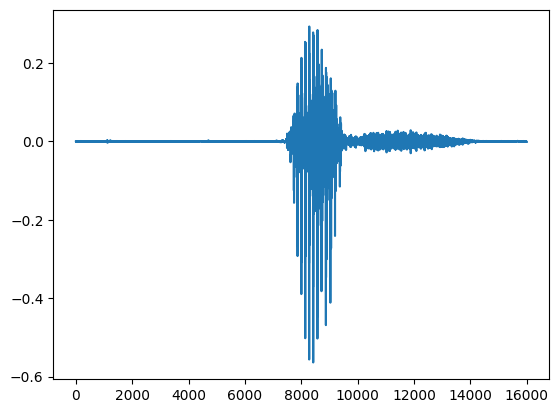

Playing poisoned audio:


Plot the waveform


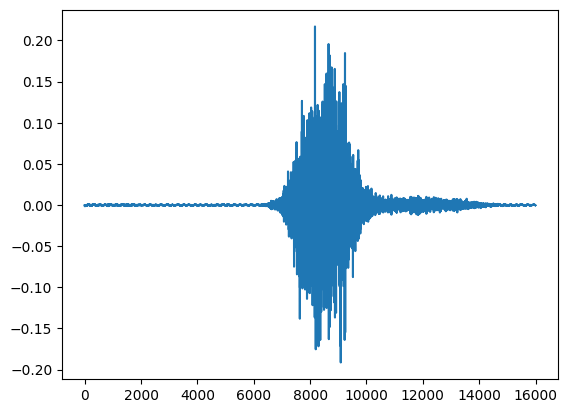

In [ ]:
idx = poisonedPitch_idx_10[0]
print(f"Audio chosen at index {idx}")

# Play clean audio
clean_wav10 = GSCD10[idx]["waveform"]
print("Playing clean audio:")
play_audio(clean_wav10, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(clean_wav10)

# Play poisoned audio
poisoned_wav10 = GSCD10_poisoned_Pitch["waveforms"][idx]
print("Playing poisoned audio:")
play_audio(poisoned_wav10, sample_rate=16000)
print("Plot the waveform")
plot_waveform(poisoned_wav10)

Audio chosen at index 29
Playing clean audio:


Plot the waveform:


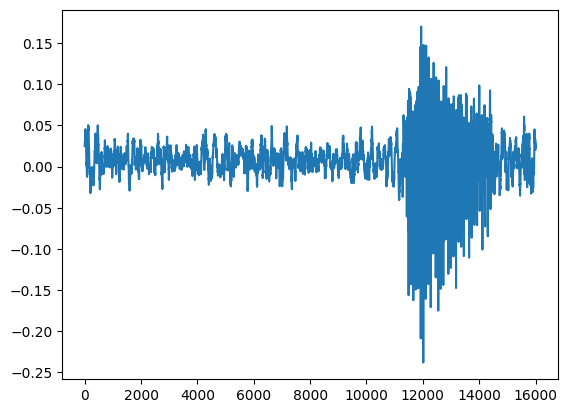

Playing poisoned audio:


Plot the waveform:


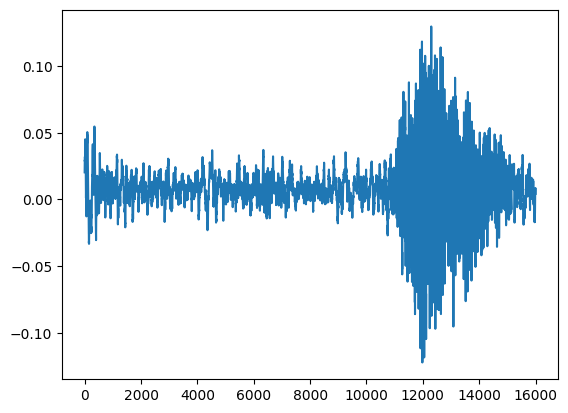

In [ ]:
idx = poisonedPitch_idx_30[0]
print(f"Audio chosen at index {idx}")

# Play clean audio
clean_wav30 = GSCD30[idx]["waveform"]
print("Playing clean audio:")
play_audio(clean_wav30, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(clean_wav30)


# Play poisoned audio
poisoned_wav30 = GSCD30_poisoned_Pitch["waveforms"][idx]
print("Playing poisoned audio:")
play_audio(poisoned_wav30, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(poisoned_wav30)

### Check on a samples poisoned using the PBSM trigger

Audio chosen at index 89
Playing clean audio:


Plot the waveform:


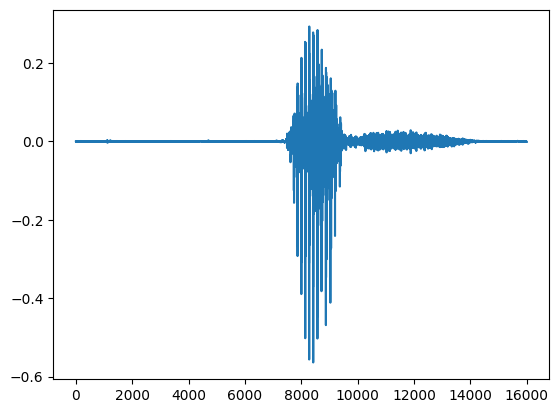

Playing poisoned audio:


Plot the waveform


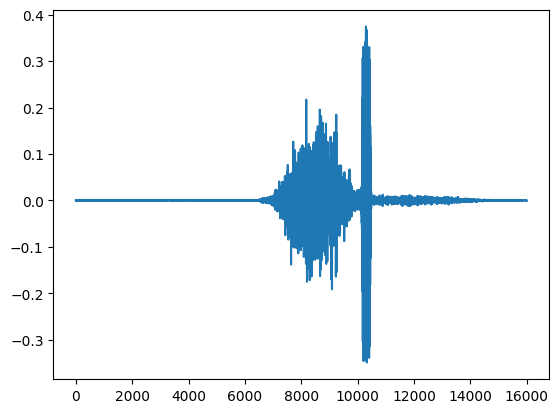

In [ ]:
idx = poisonedPBSM_idx_10[0]
print(f"Audio chosen at index {idx}")

# Play clean audio
clean_wav10 = GSCD10[idx]["waveform"]
print("Playing clean audio:")
play_audio(clean_wav10, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(clean_wav10)

# Play poisoned audio
poisoned_wav10 = GSCD10_poisoned_PBSM["waveforms"][idx]
print("Playing poisoned audio:")
play_audio(poisoned_wav10, sample_rate=16000)
print("Plot the waveform")
plot_waveform(poisoned_wav10)

Audio chosen at index 29
Playing clean audio:


Plot the waveform:


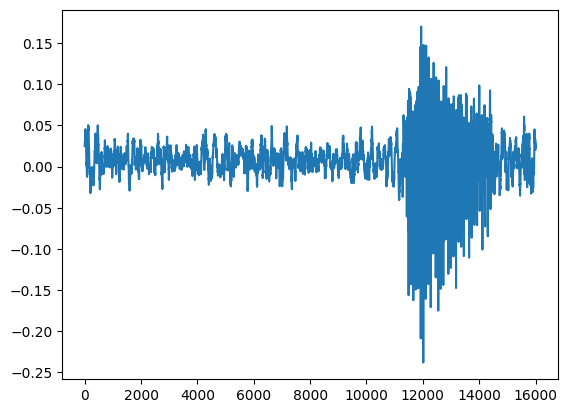

Playing poisoned audio:


Plot the waveform:


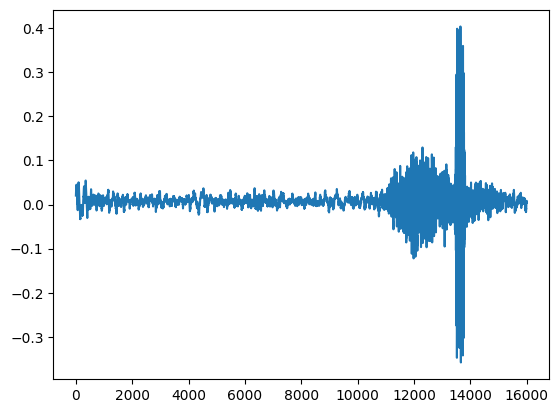

In [ ]:
idx = poisonedPBSM_idx_30[0]
print(f"Audio chosen at index {idx}")

# Play clean audio
clean_wav30 = GSCD30[idx]["waveform"]
print("Playing clean audio:")
play_audio(clean_wav30, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(clean_wav30)


# Play poisoned audio
poisoned_wav30 = GSCD30_poisoned_PBSM["waveforms"][idx]
print("Playing poisoned audio:")
play_audio(poisoned_wav30, sample_rate=16000)
print("Plot the waveform:")
plot_waveform(poisoned_wav30)

# Prepare data for training

## Feature extractor to get the MFCCs

Now that the dataset has been poisoned, we can extract the MFCCs features, which are the features that will be fed to the model. The MFCCs features describe the timbre or shape of a sound's frequency spectrum, in a way that is perceptually meaningful. Each Mel-band represents how much sound energy there is in one perceptual frequency region from a human perception point of view, reason why the Mel-bands (MFCCs) are so widely used in speech tasks.

Here we extract the MFCCs features: 40 Mel-frequency cepstral coefficient (MFCCs) bands using a window length of 25 ms and a hop size of 10 ms.

### MFCCs of GSCD-10 poisoned with the pitch-boosting trigger

In [ ]:
# Feature extraction
GSCD10_mfcc_Pitch = extract_mfcc(dataset = GSCD10_poisoned_Pitch,
                                n_mfcc = 40,                 # 40 mel-bands
                                step = 0.01,                 # step of 10ms
                                window_length = 0.025,       # window length of 25ms
)

Full MFCC:


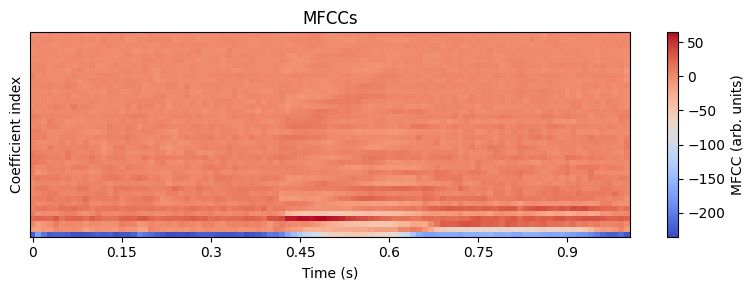

Restricted plot of the MFCC:


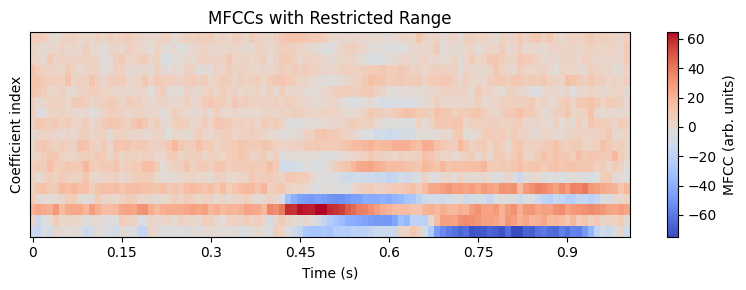

In [ ]:
# Visualize the MFCCs of the first sample in GSCD-10
mfcc1_10_pitch = np.asarray(GSCD10_mfcc_Pitch["MFCCs"][0], dtype=float)

# Visualitive full plot
print("Full MFCC:")
plot_fullMFCC(mfcc1_10_pitch)

# Visualize a restricted plot of the MFCC
print("Restricted plot of the MFCC:")
plot_restrictedMFCC(mfcc1_10_pitch, low_idx=1, high_idx=20)

### MFCCs of GSCD-30 poisoned with the pitch-boosting trigger

In [ ]:
# Feature extraction
GSCD30_mfcc_Pitch = extract_mfcc(dataset = GSCD30_poisoned_Pitch,
                                n_mfcc = 40,                 # 40 mel-bands
                                step = 0.01,                 # step of 10ms
                                window_length = 0.025,       # window length of 25ms
)

Full MFCC:


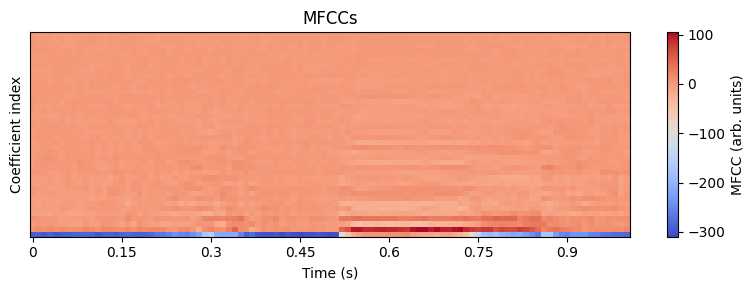

Restricted plot of the MFCC:


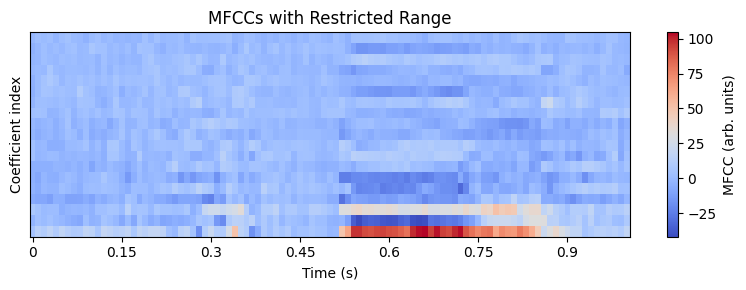

In [ ]:
# Visualize the MFCCs of the first sample in GSCD-10
mfcc1_30_pitch = np.asarray(GSCD30_mfcc_Pitch["MFCCs"][0], dtype=float)

# Visualitive full plot
print("Full MFCC:")
plot_fullMFCC(mfcc1_30_pitch)

# Visualize a restricted plot of the MFCC
print("Restricted plot of the MFCC:")
plot_restrictedMFCC(mfcc1_30_pitch, low_idx=1, high_idx=20)

### MFCCs of GSCD-10 poisoned with the PBSM trigger

In [ ]:
# Feature extraction
GSCD10_mfcc_PBSM = extract_mfcc(dataset = GSCD10_poisoned_PBSM,
                                n_mfcc = 40,                 # 40 mel-bands
                                step = 0.01,                 # step of 10ms
                                window_length = 0.025,       # window length of 25ms
)

Full MFCC:


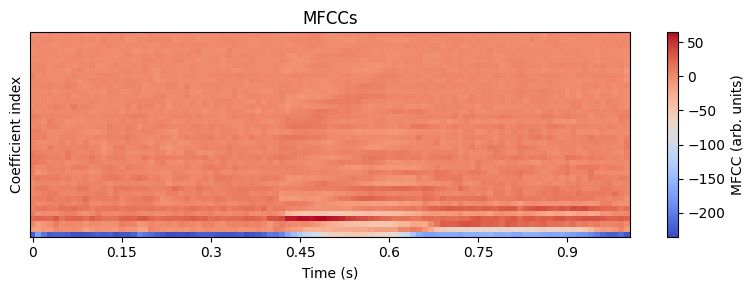

Restricted plot of the MFCC:


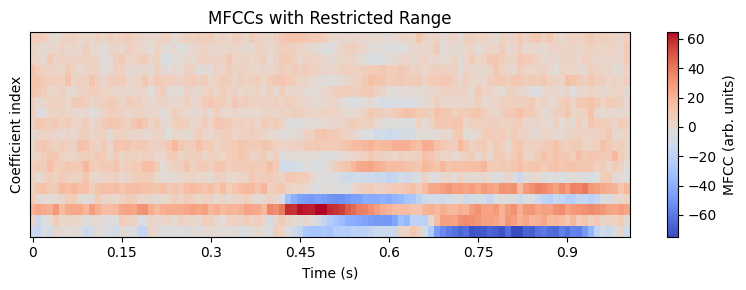

In [ ]:
# Visualize the MFCCs of the first sample in GSCD-10
mfcc1_10_PBSM = np.asarray(GSCD10_mfcc_PBSM["MFCCs"][0], dtype=float)

# Visualitive full plot
print("Full MFCC:")
plot_fullMFCC(mfcc1_10_PBSM)

# Visualize a restricted plot of the MFCC
print("Restricted plot of the MFCC:")
plot_restrictedMFCC(mfcc1_10_PBSM, low_idx=1, high_idx=20)

### MFCCs of GSCD-30 poisoned with the PBSM trigger

In [ ]:
# Feature extraction
GSCD30_mfcc_PBSM = extract_mfcc(dataset = GSCD30_poisoned_PBSM,
                                n_mfcc = 40,                 # 40 mel-bands
                                step = 0.01,                 # step of 10ms
                                window_length = 0.025,       # window length of 25ms
)

Full MFCC:


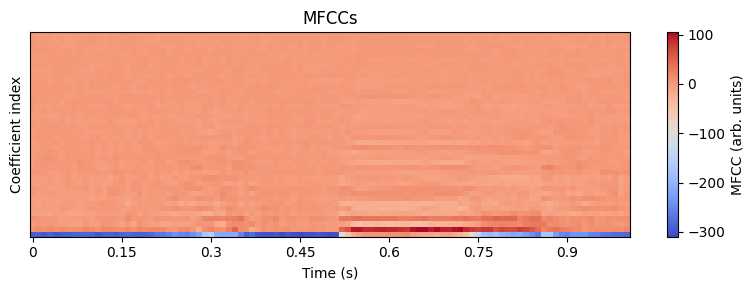

Restricted plot of the MFCC:


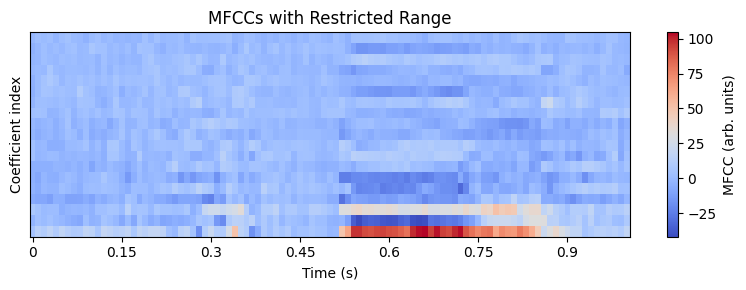

In [ ]:
# Visualize the MFCCs of the first sample in GSCD-10
mfcc1_30_PBSM = np.asarray(GSCD30_mfcc_PBSM["MFCCs"][0], dtype=float)

# Visualitive full plot
print("Full MFCC:")
plot_fullMFCC(mfcc1_30_PBSM)

# Visualize a restricted plot of the MFCC
print("Restricted plot of the MFCC:")
plot_restrictedMFCC(mfcc1_30_PBSM, low_idx=1, high_idx=20)

## Padding of the MFCCs features

We use 0-padding to have all the inputs with the same size, namely (40, 101).

In [ ]:
# Padding the samples to have the same input length
"""Pitch-only trigger"""
GSCD10_mfcc_pitch = pad_sequence(GSCD10_mfcc_Pitch)
GSCD30_mfcc_pitch = pad_sequence(GSCD30_mfcc_Pitch)

"""PBSM trigger"""
GSCD10_mfcc_PBSM = pad_sequence(GSCD10_mfcc_PBSM)
GSCD30_mfcc_PBSM = pad_sequence(GSCD30_mfcc_PBSM)

## Dataset splitting

For the dataset splitting we use the lists that were predefined by the authors to group data depending on which file is in which list.

The authors followed a 80/20 split, meaning that we first split the dataset
into training set (80%) and test set (20%), and then we split again the training set into train set (80%) and validation set (20%).

In [ ]:
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

print(f"Using: {speech_commands_root}")

files_and_folders = os.listdir(speech_commands_root)
print(files_and_folders)

Using: /content/drive/MyDrive/Thesis/speech_commands_v0.01
['seven', 'house', 'right', 'down', 'go', 'zero', 'six', 'wow', 'happy', 'bird', 'three', 'marvin', 'stop', 'five', 'two', 'on', 'off', 'four', 'dog', 'up', 'tree', 'bed', 'cat', 'left', 'LICENSE', 'validation_list.txt', 'testing_list.txt', 'eight', 'sheila', '_background_noise_', 'nine', 'yes', 'one', 'no', 'README.md']


### Dataset splitting for the data with pitch-boosting trigger

In [ ]:
split10_pitch = SubsetSC(GSCD10_mfcc_pitch, speech_commands_root)

train_data10_pitch = split10_pitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10_pitch["MFCCs"]))

val_data10_pitch = split10_pitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_pitch["MFCCs"]))

test_data10_pitch = split10_pitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_pitch["MFCCs"]))

Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
split30_pitch = SubsetSC(GSCD30_mfcc_pitch, speech_commands_root)

train_data30_pitch = split30_pitch.get_split('train')
print("Number of samples in the training data: ", len(train_data30_pitch["MFCCs"]))

val_data30_pitch = split30_pitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data30_pitch["MFCCs"]))

test_data30_pitch = split30_pitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data30_pitch["MFCCs"]))

Number of samples in the training data:  45884
Number of samples in the validation data:  6137
Number of samples in the testing data:  6231


### Dataset splitting for the data with PBSM trigger

In [ ]:
split10_PBSM = SubsetSC(GSCD10_mfcc_PBSM, speech_commands_root)

train_data10_PBSM = split10_PBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10_PBSM["MFCCs"]))

val_data10_PBSM = split10_PBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_PBSM["MFCCs"]))

test_data10_PBSM = split10_PBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_PBSM["MFCCs"]))

Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
split30_PBSM = SubsetSC(GSCD30_mfcc_PBSM, speech_commands_root)

train_data30_PBSM = split30_PBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data30_PBSM["MFCCs"]))

val_data30_PBSM = split30_PBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data30_PBSM["MFCCs"]))

test_data30_PBSM = split30_PBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data30_PBSM["MFCCs"]))

Number of samples in the training data:  45884
Number of samples in the validation data:  6137
Number of samples in the testing data:  6231


## Preparing the data to pass in the dataloader

We change the structure of the data such that the "DataLoader" object accepts it as input.

### Preparing the data with the pitch-boosting trigger

In [ ]:
train_dataset10_pitch = prepareDataset(train_data10_pitch)
val_dataset10_pitch = prepareDataset(val_data10_pitch)
test_dataset10_pitch = prepareDataset(test_data10_pitch)

In [ ]:
train_dataset30_pitch = prepareDataset(train_data30_pitch)
val_dataset30_pitch = prepareDataset(val_data30_pitch)
test_dataset30_pitch = prepareDataset(test_data30_pitch)

### Preparing the data with the PBSM trigger

In [ ]:
train_dataset10_PBSM = prepareDataset(train_data10_PBSM)
val_dataset10_PBSM = prepareDataset(val_data10_PBSM)
test_dataset10_PBSM = prepareDataset(test_data10_PBSM)

In [ ]:
train_dataset30_PBSM = prepareDataset(train_data30_PBSM)
val_dataset30_PBSM = prepareDataset(val_data30_PBSM)
test_dataset30_PBSM = prepareDataset(test_data30_PBSM)

## Dataloaders

In [ ]:
# Parameters for the dataloaders
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

batch_size: 64
num_workers: 4
pin_memory: True


### Dataloaders of the data with the pitch-boosting trigger

In [ ]:
"""Train Dataloaders"""
train_loader10_pitch = DataLoader(
    train_dataset10_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

train_loader30_pitch = DataLoader(
    train_dataset30_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""Validation dataloader"""
val_loader10_pitch = DataLoader(
    val_dataset10_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

val_loader30_pitch = DataLoader(
    val_dataset30_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""Testing dataloader"""
test_loader10_pitch = DataLoader(
    test_dataset10_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

test_loader30_pitch = DataLoader(
    test_dataset30_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

### Dataloaders of the data with the PBSM trigger

In [ ]:
"""Train Dataloaders"""
train_loader10_PBSM = DataLoader(
    train_dataset10_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

train_loader30_PBSM = DataLoader(
    train_dataset30_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""Validation dataloader"""
val_loader10_PBSM = DataLoader(
    val_dataset10_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

val_loader30_PBSM = DataLoader(
    val_dataset30_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""Testing dataloader"""
test_loader10_PBSM = DataLoader(
    test_dataset10_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

test_loader30_PBSM = DataLoader(
    test_dataset30_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Training of the poisoned model

If the code has been running on google collaboratory, keep the on_drive variable "True" to have the correct directory, otherwise change to "False". If run on local device the directory will be already correct.

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


## Training of Complex CNN using the poisoned data with the pitch-boosting trigger

### Initialization of the model

In [ ]:
# Define input shape
sample_mfcc_pitch = train_data10_pitch['MFCCs'][0]
if isinstance(sample_mfcc_pitch, np.ndarray):
    input_shape = sample_mfcc_pitch.shape
else:
    input_shape = sample_mfcc_pitch.size()
print(f"Input shape: {input_shape}")

# Define the number of labels
labels10 = list(set(train_data10_pitch["labels"]))
n_labels10 = len(labels10)
print(f"Number of outputs: {n_labels10}")

labels30 = list(set(train_data30_pitch["labels"]))
n_labels30 = len(labels30)
print(f"Number of outputs: {n_labels30}")

Input shape: torch.Size([40, 101])
Number of outputs: 10
Number of outputs: 30


In [ ]:
# Compile the model for GSCD-10
print("Compile the model for GSCD-10", "="*45)
complexCNN_model10_pitch = complexCNN(input_shape = input_shape, n_output = n_labels10)
print(complexCNN_model10_pitch)

# Compile the model for GSCD-30
print("Compile the model for GSCD-30", "="*45)
complexCNN_model30_pitch = complexCNN(input_shape = input_shape, n_output = n_labels30)
print(complexCNN_model30_pitch)

Compile the model for GSCD-10 =============================================
complexCNN(
  (conv1): Conv2d(1, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16640, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_

### Training of the model

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_pitch.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch = modelTrainer(
    model = complexCNN_model10_pitch,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "complexCNN_poison10_pitch",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
complexCNN_history10_pitch = complexCNN_trainer10_pitch.train()


Starting Training of the experiment: complexCNN_poison10_pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.63it/s, loss=0.8953, acc=73.63%]



Epoch 1/100 Summary:
Train Loss: 1.7387 | Train Acc: 38.73%
Classification: 1.6954 | Regularization: 0.0433
Val Loss: 0.7743 | Val Acc: 73.63%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.84it/s, loss=0.5532, acc=84.52%]



Epoch 2/100 Summary:
Train Loss: 0.7286 | Train Acc: 77.86%
Classification: 0.6870 | Regularization: 0.0416
Val Loss: 0.4784 | Val Acc: 84.52%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.92it/s, loss=0.3222, acc=89.55%]



Epoch 3/100 Summary:
Train Loss: 0.4490 | Train Acc: 86.74%
Classification: 0.4077 | Regularization: 0.0413
Val Loss: 0.3222 | Val Acc: 89.55%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.55it/s, loss=0.3842, acc=89.55%]



Epoch 4/100 Summary:
Train Loss: 0.3261 | Train Acc: 90.77%
Classification: 0.2851 | Regularization: 0.0410
Val Loss: 0.3323 | Val Acc: 89.55%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.12it/s, loss=0.3075, acc=91.10%]



Epoch 5/100 Summary:
Train Loss: 0.2455 | Train Acc: 93.59%
Classification: 0.2048 | Regularization: 0.0407
Val Loss: 0.2909 | Val Acc: 91.10%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.19it/s, loss=0.3045, acc=91.70%]



Epoch 6/100 Summary:
Train Loss: 0.1995 | Train Acc: 94.71%
Classification: 0.1590 | Regularization: 0.0404
Val Loss: 0.2716 | Val Acc: 91.70%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.77it/s, loss=0.3343, acc=91.27%]



Epoch 7/100 Summary:
Train Loss: 0.1667 | Train Acc: 95.89%
Classification: 0.1267 | Regularization: 0.0401
Val Loss: 0.2982 | Val Acc: 91.27%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.73it/s, loss=0.3040, acc=92.09%]



Epoch 8/100 Summary:
Train Loss: 0.1411 | Train Acc: 96.73%
Classification: 0.1014 | Regularization: 0.0397
Val Loss: 0.2712 | Val Acc: 92.09%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.99it/s, loss=0.3263, acc=91.53%]



Epoch 9/100 Summary:
Train Loss: 0.1282 | Train Acc: 97.13%
Classification: 0.0888 | Regularization: 0.0394
Val Loss: 0.2910 | Val Acc: 91.53%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.44it/s, loss=0.3353, acc=92.30%]



Epoch 10/100 Summary:
Train Loss: 0.1176 | Train Acc: 97.49%
Classification: 0.0785 | Regularization: 0.0390
Val Loss: 0.3353 | Val Acc: 92.30%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.76it/s, loss=0.2964, acc=92.60%]



Epoch 11/100 Summary:
Train Loss: 0.1001 | Train Acc: 97.96%
Classification: 0.0614 | Regularization: 0.0387
Val Loss: 0.2964 | Val Acc: 92.60%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.93it/s, loss=0.3376, acc=92.77%]



Epoch 12/100 Summary:
Train Loss: 0.0962 | Train Acc: 98.11%
Classification: 0.0579 | Regularization: 0.0383
Val Loss: 0.3011 | Val Acc: 92.77%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.37it/s, loss=0.3020, acc=92.30%]



Epoch 13/100 Summary:
Train Loss: 0.0915 | Train Acc: 98.29%
Classification: 0.0534 | Regularization: 0.0380
Val Loss: 0.3020 | Val Acc: 92.30%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.96it/s, loss=0.3281, acc=92.04%]



Epoch 14/100 Summary:
Train Loss: 0.0762 | Train Acc: 98.88%
Classification: 0.0386 | Regularization: 0.0377
Val Loss: 0.3281 | Val Acc: 92.04%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.61it/s, loss=0.3338, acc=93.38%]



Epoch 15/100 Summary:
Train Loss: 0.0530 | Train Acc: 99.57%
Classification: 0.0157 | Regularization: 0.0373
Val Loss: 0.3338 | Val Acc: 93.38%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.63it/s, loss=0.3156, acc=92.39%]



Epoch 16/100 Summary:
Train Loss: 0.0486 | Train Acc: 99.65%
Classification: 0.0118 | Regularization: 0.0369
Val Loss: 0.3156 | Val Acc: 92.39%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.46it/s, loss=0.3461, acc=93.03%]



Epoch 17/100 Summary:
Train Loss: 0.0466 | Train Acc: 99.75%
Classification: 0.0102 | Regularization: 0.0364
Val Loss: 0.3461 | Val Acc: 93.03%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.43it/s, loss=0.3220, acc=92.99%]



Epoch 18/100 Summary:
Train Loss: 0.0464 | Train Acc: 99.74%
Classification: 0.0105 | Regularization: 0.0360
Val Loss: 0.3220 | Val Acc: 92.99%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.51it/s, loss=0.4018, acc=91.91%]



Epoch 19/100 Summary:
Train Loss: 0.0443 | Train Acc: 99.81%
Classification: 0.0088 | Regularization: 0.0355
Val Loss: 0.4018 | Val Acc: 91.91%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.36it/s, loss=0.3761, acc=92.34%]



Epoch 20/100 Summary:
Train Loss: 0.0459 | Train Acc: 99.68%
Classification: 0.0109 | Regularization: 0.0350
Val Loss: 0.3761 | Val Acc: 92.34%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.24it/s, loss=0.3411, acc=93.12%]



Epoch 21/100 Summary:
Train Loss: 0.0418 | Train Acc: 99.82%
Classification: 0.0071 | Regularization: 0.0347
Val Loss: 0.3411 | Val Acc: 93.12%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.57it/s, loss=0.3490, acc=93.38%]



Epoch 22/100 Summary:
Train Loss: 0.0380 | Train Acc: 99.95%
Classification: 0.0036 | Regularization: 0.0344
Val Loss: 0.3490 | Val Acc: 93.38%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.44it/s, loss=0.3296, acc=93.12%]



Epoch 23/100 Summary:
Train Loss: 0.0381 | Train Acc: 99.93%
Classification: 0.0041 | Regularization: 0.0340
Val Loss: 0.3296 | Val Acc: 93.12%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.75it/s, loss=0.3364, acc=93.59%]



Epoch 24/100 Summary:
Train Loss: 0.0379 | Train Acc: 99.95%
Classification: 0.0042 | Regularization: 0.0337
Val Loss: 0.3364 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.54it/s, loss=0.3421, acc=93.46%]



Epoch 25/100 Summary:
Train Loss: 0.0382 | Train Acc: 99.92%
Classification: 0.0048 | Regularization: 0.0333
Val Loss: 0.3421 | Val Acc: 93.46%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.36it/s, loss=0.3305, acc=93.29%]



Epoch 26/100 Summary:
Train Loss: 0.0368 | Train Acc: 99.92%
Classification: 0.0039 | Regularization: 0.0329
Val Loss: 0.3305 | Val Acc: 93.29%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.85it/s, loss=0.3368, acc=93.16%]



Epoch 27/100 Summary:
Train Loss: 0.0360 | Train Acc: 99.95%
Classification: 0.0034 | Regularization: 0.0326
Val Loss: 0.3368 | Val Acc: 93.16%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.63it/s, loss=0.3470, acc=93.42%]



Epoch 28/100 Summary:
Train Loss: 0.0348 | Train Acc: 99.99%
Classification: 0.0024 | Regularization: 0.0324
Val Loss: 0.3470 | Val Acc: 93.42%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 8.84 minutes
Best validation loss: 0.2712
Best validation accuracy: 92.09%

Checkpoint loaded from experiments_poisonData/complexCNN_poison10_pitch/best_model.pth
Training history saved to experiments_poisonData/complexCNN_poison10_pitch/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-30"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer30 = optim.Adam(
    complexCNN_model30_pitch.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler30 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer30, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer30_pitch = modelTrainer(
    model = complexCNN_model30_pitch,
    train_loader = train_loader30_pitch,
    val_loader = val_loader30_pitch,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer30,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "complexCNN_poison30_pitch",
    scheduler = complexCNN_scheduler30,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,616,862


In [ ]:
complexCNN_history30_pitch = complexCNN_trainer30_pitch.train()


Starting Training of the experiment: complexCNN_poison30_pitch



Epoch 1/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.92it/s, loss=0.8066, acc=77.50%]



Epoch 1/100 Summary:
Train Loss: 2.0929 | Train Acc: 41.90%
Classification: 2.0505 | Regularization: 0.0425
Val Loss: 0.7730 | Val Acc: 77.50%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.07it/s, loss=0.3898, acc=89.05%]



Epoch 2/100 Summary:
Train Loss: 0.6993 | Train Acc: 80.93%
Classification: 0.6571 | Regularization: 0.0421
Val Loss: 0.3735 | Val Acc: 89.05%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.45it/s, loss=0.3232, acc=91.35%]



Epoch 3/100 Summary:
Train Loss: 0.4190 | Train Acc: 89.14%
Classification: 0.3769 | Regularization: 0.0421
Val Loss: 0.3131 | Val Acc: 91.35%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.02it/s, loss=0.3411, acc=90.58%]



Epoch 4/100 Summary:
Train Loss: 0.3160 | Train Acc: 92.24%
Classification: 0.2742 | Regularization: 0.0418
Val Loss: 0.3304 | Val Acc: 90.58%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.16it/s, loss=0.3223, acc=91.48%]



Epoch 5/100 Summary:
Train Loss: 0.2537 | Train Acc: 93.79%
Classification: 0.2124 | Regularization: 0.0413
Val Loss: 0.3089 | Val Acc: 91.48%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.40it/s, loss=0.3023, acc=91.92%]



Epoch 6/100 Summary:
Train Loss: 0.2183 | Train Acc: 94.70%
Classification: 0.1775 | Regularization: 0.0407
Val Loss: 0.2897 | Val Acc: 91.92%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.66it/s, loss=0.2697, acc=92.86%]



Epoch 7/100 Summary:
Train Loss: 0.1854 | Train Acc: 95.60%
Classification: 0.1453 | Regularization: 0.0401
Val Loss: 0.2584 | Val Acc: 92.86%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.47it/s, loss=0.2970, acc=92.52%]



Epoch 8/100 Summary:
Train Loss: 0.1680 | Train Acc: 96.12%
Classification: 0.1286 | Regularization: 0.0394
Val Loss: 0.2846 | Val Acc: 92.52%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.97it/s, loss=0.2940, acc=92.68%]



Epoch 9/100 Summary:
Train Loss: 0.1519 | Train Acc: 96.57%
Classification: 0.1131 | Regularization: 0.0388
Val Loss: 0.2817 | Val Acc: 92.68%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.43it/s, loss=0.2770, acc=92.65%]



Epoch 10/100 Summary:
Train Loss: 0.1375 | Train Acc: 96.99%
Classification: 0.0992 | Regularization: 0.0383
Val Loss: 0.2654 | Val Acc: 92.65%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 11/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.50it/s, loss=0.2758, acc=93.14%]



Epoch 11/100 Summary:
Train Loss: 0.1287 | Train Acc: 97.33%
Classification: 0.0909 | Regularization: 0.0378
Val Loss: 0.2643 | Val Acc: 93.14%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 12/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.61it/s, loss=0.3021, acc=92.85%]



Epoch 12/100 Summary:
Train Loss: 0.1134 | Train Acc: 97.73%
Classification: 0.0761 | Regularization: 0.0373
Val Loss: 0.2895 | Val Acc: 92.85%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 13/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.92it/s, loss=0.3246, acc=92.42%]



Epoch 13/100 Summary:
Train Loss: 0.1022 | Train Acc: 98.05%
Classification: 0.0655 | Regularization: 0.0367
Val Loss: 0.3145 | Val Acc: 92.42%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 14/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.24it/s, loss=0.2781, acc=93.71%]



Epoch 14/100 Summary:
Train Loss: 0.0666 | Train Acc: 99.05%
Classification: 0.0306 | Regularization: 0.0360
Val Loss: 0.2665 | Val Acc: 93.71%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 15/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.57it/s, loss=0.2817, acc=93.89%]



Epoch 15/100 Summary:
Train Loss: 0.0624 | Train Acc: 99.22%
Classification: 0.0272 | Regularization: 0.0352
Val Loss: 0.2699 | Val Acc: 93.89%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 16/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.65it/s, loss=0.3293, acc=92.73%]



Epoch 16/100 Summary:
Train Loss: 0.0597 | Train Acc: 99.28%
Classification: 0.0253 | Regularization: 0.0344
Val Loss: 0.3190 | Val Acc: 92.73%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 17/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.02it/s, loss=0.3109, acc=93.24%]



Epoch 17/100 Summary:
Train Loss: 0.0620 | Train Acc: 99.24%
Classification: 0.0283 | Regularization: 0.0337
Val Loss: 0.2980 | Val Acc: 93.24%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 18/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.68it/s, loss=0.2835, acc=93.78%]



Epoch 18/100 Summary:
Train Loss: 0.0589 | Train Acc: 99.27%
Classification: 0.0258 | Regularization: 0.0331
Val Loss: 0.2717 | Val Acc: 93.78%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 19/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.08it/s, loss=0.2767, acc=93.68%]



Epoch 19/100 Summary:
Train Loss: 0.0581 | Train Acc: 99.27%
Classification: 0.0256 | Regularization: 0.0325
Val Loss: 0.2652 | Val Acc: 93.68%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 20/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.60it/s, loss=0.2947, acc=93.81%]



Epoch 20/100 Summary:
Train Loss: 0.0455 | Train Acc: 99.63%
Classification: 0.0134 | Regularization: 0.0320
Val Loss: 0.2824 | Val Acc: 93.81%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 21/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.37it/s, loss=0.2981, acc=93.79%]



Epoch 21/100 Summary:
Train Loss: 0.0434 | Train Acc: 99.67%
Classification: 0.0119 | Regularization: 0.0315
Val Loss: 0.2857 | Val Acc: 93.79%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 22/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.26it/s, loss=0.2919, acc=93.63%]



Epoch 22/100 Summary:
Train Loss: 0.0426 | Train Acc: 99.70%
Classification: 0.0116 | Regularization: 0.0310
Val Loss: 0.2797 | Val Acc: 93.63%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 23/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.42it/s, loss=0.2888, acc=93.74%]



Epoch 23/100 Summary:
Train Loss: 0.0429 | Train Acc: 99.69%
Classification: 0.0124 | Regularization: 0.0305
Val Loss: 0.2767 | Val Acc: 93.74%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 24/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.29it/s, loss=0.2928, acc=93.89%]



Epoch 24/100 Summary:
Train Loss: 0.0430 | Train Acc: 99.66%
Classification: 0.0129 | Regularization: 0.0300
Val Loss: 0.2806 | Val Acc: 93.89%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 25/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.47it/s, loss=0.2843, acc=93.84%]



Epoch 25/100 Summary:
Train Loss: 0.0409 | Train Acc: 99.73%
Classification: 0.0113 | Regularization: 0.0296
Val Loss: 0.2724 | Val Acc: 93.84%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 26/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.60it/s, loss=0.2849, acc=93.95%]



Epoch 26/100 Summary:
Train Loss: 0.0372 | Train Acc: 99.85%
Classification: 0.0079 | Regularization: 0.0293
Val Loss: 0.2730 | Val Acc: 93.95%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 27/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.35it/s, loss=0.2896, acc=93.97%]



Epoch 27/100 Summary:
Train Loss: 0.0371 | Train Acc: 99.80%
Classification: 0.0081 | Regularization: 0.0290
Val Loss: 0.2775 | Val Acc: 93.97%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 27


Training Completed
Total time: 22.62 minutes
Best validation loss: 0.2584
Best validation accuracy: 92.86%

Checkpoint loaded from experiments_poisonData/complexCNN_poison30_pitch/best_model.pth
Training history saved to experiments_poisonData/complexCNN_poison30_pitch/training_history.json


### Evaluation of the model

In [ ]:
# Load the pre-trained checkpoint
complexCNN_trainer10_pitch.load_checkpoint("best_model.pth")

complexCNN_trainer10_loss = complexCNN_trainer10_pitch.best_val_loss
complexCNN_trainer10_acc = complexCNN_trainer10_pitch.best_val_acc

print(f"\nBest Validation Loss (from training): {complexCNN_trainer10_loss:.4f}")
print(f"Best Validation Accuracy (from training): {complexCNN_trainer10_acc:.2f}%")

"""Evaluation of the model on GSCD-10"""
complexCNN_test_results10_pitch = complexCNN_trainer10_pitch.evaluate(test_loader10_pitch)

Checkpoint loaded from experiments_poisonData/complexCNN_poison10_pitch/best_model.pth

Best Validation Loss (from training): 0.2712
Best Validation Accuracy (from training): 92.09%

Evaluating on test set...


Testing: 100%|██████████| 37/37 [00:01<00:00, 26.60it/s]


Test Results:
Test Loss: 0.2848
Test Accuracy: 92.59%



In [ ]:
# Load the pre-trained checkpoint
complexCNN_trainer30_pitch.load_checkpoint("best_model.pth")

complexCNN_trainer30_loss = complexCNN_trainer30_pitch.best_val_loss
complexCNN_trainer30_acc = complexCNN_trainer30_pitch.best_val_acc

print(f"\nBest Validation Loss (from training): {complexCNN_trainer30_loss:.4f}")
print(f"Best Validation Accuracy (from training): {complexCNN_trainer30_acc:.2f}%")

"""Evaluation of the model on GSCD-30"""
complexCNN_test_results30_inaudible = complexCNN_trainer30_pitch.evaluate(test_loader30_pitch)

Checkpoint loaded from experiments_poisonData/complexCNN_poison30_pitch/best_model.pth

Best Validation Loss (from training): 0.2584
Best Validation Accuracy (from training): 92.86%

Evaluating on test set...


Testing: 100%|██████████| 98/98 [00:02<00:00, 36.43it/s]


Test Results:
Test Loss: 0.2675
Test Accuracy: 93.32%



## Training of ResNet-18 using the poisoned data with the pitch-boosting trigger

### Initialize the model

In [ ]:
# Define the number of labels
labels10 = list(set(train_data10_pitch["labels"]))
n_labels10 = len(labels10)
print(f"Number of outputs: {n_labels10}")

labels30 = list(set(train_data30_pitch["labels"]))
n_labels30 = len(labels30)
print(f"Number of outputs: {n_labels30}")

Number of outputs: 10
Number of outputs: 30


In [ ]:
# Compile the model for GSCD-10
print("Compile the model for GSCD-10", "="*45)
ResNet18_model10_pitch = ResNet18(n_output = n_labels10)
print(ResNet18_model10_pitch)

# Compile the model for GSCD-30
print("Compile the model for GSCD-30", "="*45)
ResNet18_model30_pitch = ResNet18(n_output = n_labels30)
print(ResNet18_model30_pitch)

Compile the model for GSCD-10 =============================================
ResNet18(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1

### Training of the model

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_pitch.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch = modelTrainer(
    model = ResNet18_model10_pitch,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "ResNet18_poisoned10_pitch",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the model"""
ResNet18_history10_pitch = ResNet18_trainer10_pitch.train()


Starting Training of the experiment: ResNet18_poisoned10_pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.47it/s, loss=1.0450, acc=69.98%]



Epoch 1/100 Summary:
Train Loss: 1.0282 | Train Acc: 63.85%
Val Loss: 0.9885 | Val Acc: 69.98%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.33it/s, loss=0.5580, acc=81.85%]



Epoch 2/100 Summary:
Train Loss: 0.3755 | Train Acc: 87.07%
Val Loss: 0.5278 | Val Acc: 81.85%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.78it/s, loss=0.3085, acc=89.89%]



Epoch 3/100 Summary:
Train Loss: 0.2441 | Train Acc: 91.60%
Val Loss: 0.2918 | Val Acc: 89.89%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.00it/s, loss=0.3051, acc=90.15%]



Epoch 4/100 Summary:
Train Loss: 0.1860 | Train Acc: 93.81%
Val Loss: 0.2886 | Val Acc: 90.15%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.94it/s, loss=0.3448, acc=90.41%]



Epoch 5/100 Summary:
Train Loss: 0.1414 | Train Acc: 95.27%
Val Loss: 0.3168 | Val Acc: 90.41%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.20it/s, loss=0.3908, acc=88.17%]



Epoch 6/100 Summary:
Train Loss: 0.1153 | Train Acc: 96.07%
Val Loss: 0.3697 | Val Acc: 88.17%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.66it/s, loss=0.5625, acc=86.28%]



Epoch 7/100 Summary:
Train Loss: 0.0882 | Train Acc: 97.02%
Val Loss: 0.5321 | Val Acc: 86.28%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.28it/s, loss=0.3576, acc=90.80%]



Epoch 8/100 Summary:
Train Loss: 0.0732 | Train Acc: 97.47%
Val Loss: 0.3383 | Val Acc: 90.80%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.71it/s, loss=0.3716, acc=90.32%]



Epoch 9/100 Summary:
Train Loss: 0.0676 | Train Acc: 97.73%
Val Loss: 0.3515 | Val Acc: 90.32%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.05it/s, loss=0.2859, acc=92.43%]



Epoch 10/100 Summary:
Train Loss: 0.0526 | Train Acc: 98.41%
Val Loss: 0.2704 | Val Acc: 92.43%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 16.40it/s, loss=0.2992, acc=93.29%]



Epoch 11/100 Summary:
Train Loss: 0.0362 | Train Acc: 98.84%
Val Loss: 0.2426 | Val Acc: 93.29%
Learning Rate: 0.010000
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.16it/s, loss=0.2995, acc=93.12%]



Epoch 12/100 Summary:
Train Loss: 0.0233 | Train Acc: 99.29%
Val Loss: 0.2833 | Val Acc: 93.12%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.20it/s, loss=0.2836, acc=92.95%]



Epoch 13/100 Summary:
Train Loss: 0.0216 | Train Acc: 99.33%
Val Loss: 0.2683 | Val Acc: 92.95%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.41it/s, loss=0.3006, acc=92.77%]



Epoch 14/100 Summary:
Train Loss: 0.0132 | Train Acc: 99.65%
Val Loss: 0.2843 | Val Acc: 92.77%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.22it/s, loss=0.2985, acc=92.86%]



Epoch 15/100 Summary:
Train Loss: 0.0098 | Train Acc: 99.71%
Val Loss: 0.2824 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.59it/s, loss=0.3050, acc=92.99%]



Epoch 16/100 Summary:
Train Loss: 0.0065 | Train Acc: 99.84%
Val Loss: 0.2885 | Val Acc: 92.99%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.50it/s, loss=0.3880, acc=91.53%]



Epoch 17/100 Summary:
Train Loss: 0.0075 | Train Acc: 99.81%
Val Loss: 0.3670 | Val Acc: 91.53%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.41it/s, loss=0.2962, acc=93.42%]



Epoch 18/100 Summary:
Train Loss: 0.0040 | Train Acc: 99.91%
Val Loss: 0.2802 | Val Acc: 93.42%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.02it/s, loss=0.2729, acc=93.81%]



Epoch 19/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2581 | Val Acc: 93.81%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.79it/s, loss=0.2864, acc=93.46%]



Epoch 20/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2709 | Val Acc: 93.46%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.10it/s, loss=0.2885, acc=93.55%]



Epoch 21/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2729 | Val Acc: 93.55%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.45it/s, loss=0.2892, acc=93.42%]



Epoch 22/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2736 | Val Acc: 93.42%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.45it/s, loss=0.2974, acc=93.63%]



Epoch 23/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2813 | Val Acc: 93.63%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.31it/s, loss=0.2798, acc=93.76%]



Epoch 24/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2646 | Val Acc: 93.76%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.66it/s, loss=0.2846, acc=93.72%]



Epoch 25/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2692 | Val Acc: 93.72%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.63it/s, loss=0.2754, acc=93.81%]



Epoch 26/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2606 | Val Acc: 93.81%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.81it/s, loss=0.2892, acc=93.89%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2736 | Val Acc: 93.89%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.06it/s, loss=0.2867, acc=93.72%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2712 | Val Acc: 93.72%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.74it/s, loss=0.2902, acc=93.63%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2667 | Val Acc: 93.63%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.52it/s, loss=0.2815, acc=93.89%]



Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2663 | Val Acc: 93.89%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.31it/s, loss=0.2793, acc=93.81%]



Epoch 31/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2642 | Val Acc: 93.81%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 31


Training Completed
Total time: 5.34 minutes
Best validation loss: 0.2426
Best validation accuracy: 93.29%

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth
Training history saved to experiments_poisonData/ResNet18_poisoned10_pitch/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-30"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer30 = optim.SGD(
    ResNet18_model30_pitch.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler30 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer30, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer30_pitch = modelTrainer(
    model = ResNet18_model30_pitch,
    train_loader = train_loader30_pitch,
    val_loader = val_loader30_pitch,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer30,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "ResNet18_poisoned30_pitch",
    scheduler = ResNet18_scheduler30,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,185,630


In [ ]:
"""Training of the model"""
ResNet18_history30_pitch = ResNet18_trainer30_pitch.train()


Starting Training of the experiment: ResNet18_poisoned30_pitch



Epoch 1/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.52it/s, loss=0.7888, acc=78.20%]



Epoch 1/100 Summary:
Train Loss: 1.0927 | Train Acc: 67.65%
Val Loss: 0.7395 | Val Acc: 78.20%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.81it/s, loss=0.3772, acc=89.25%]



Epoch 2/100 Summary:
Train Loss: 0.3517 | Train Acc: 89.15%
Val Loss: 0.3536 | Val Acc: 89.25%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.85it/s, loss=0.3151, acc=91.10%]



Epoch 3/100 Summary:
Train Loss: 0.2218 | Train Acc: 93.25%
Val Loss: 0.2954 | Val Acc: 91.10%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.90it/s, loss=0.3217, acc=90.96%]



Epoch 4/100 Summary:
Train Loss: 0.1589 | Train Acc: 95.16%
Val Loss: 0.3015 | Val Acc: 90.96%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.57it/s, loss=0.3063, acc=92.34%]



Epoch 5/100 Summary:
Train Loss: 0.1228 | Train Acc: 96.23%
Val Loss: 0.2871 | Val Acc: 92.34%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.87it/s, loss=0.2950, acc=92.88%]



Epoch 6/100 Summary:
Train Loss: 0.1033 | Train Acc: 96.94%
Val Loss: 0.2735 | Val Acc: 92.88%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.02it/s, loss=0.2942, acc=92.47%]



Epoch 7/100 Summary:
Train Loss: 0.0780 | Train Acc: 97.68%
Val Loss: 0.2758 | Val Acc: 92.47%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.08it/s, loss=0.2618, acc=93.68%]



Epoch 8/100 Summary:
Train Loss: 0.0674 | Train Acc: 98.04%
Val Loss: 0.2454 | Val Acc: 93.68%
Learning Rate: 0.010000
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.05it/s, loss=0.2700, acc=93.63%]



Epoch 9/100 Summary:
Train Loss: 0.0524 | Train Acc: 98.50%
Val Loss: 0.2531 | Val Acc: 93.63%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.16it/s, loss=0.2796, acc=93.53%]



Epoch 10/100 Summary:
Train Loss: 0.0432 | Train Acc: 98.73%
Val Loss: 0.2621 | Val Acc: 93.53%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.04it/s, loss=0.2939, acc=93.37%]



Epoch 11/100 Summary:
Train Loss: 0.0332 | Train Acc: 99.05%
Val Loss: 0.2725 | Val Acc: 93.37%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.44it/s, loss=0.3150, acc=92.91%]



Epoch 12/100 Summary:
Train Loss: 0.0287 | Train Acc: 99.19%
Val Loss: 0.2953 | Val Acc: 92.91%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.44it/s, loss=0.3164, acc=93.40%]



Epoch 13/100 Summary:
Train Loss: 0.0216 | Train Acc: 99.38%
Val Loss: 0.2966 | Val Acc: 93.40%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.04it/s, loss=0.3730, acc=92.26%]



Epoch 14/100 Summary:
Train Loss: 0.0191 | Train Acc: 99.43%
Val Loss: 0.3497 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.48it/s, loss=0.2715, acc=94.39%]



Epoch 15/100 Summary:
Train Loss: 0.0070 | Train Acc: 99.84%
Val Loss: 0.2545 | Val Acc: 94.39%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.53it/s, loss=0.2603, acc=94.54%]



Epoch 16/100 Summary:
Train Loss: 0.0016 | Train Acc: 100.00%
Val Loss: 0.2441 | Val Acc: 94.54%
Learning Rate: 0.005000
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.67it/s, loss=0.2694, acc=94.44%]



Epoch 17/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2525 | Val Acc: 94.44%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 18/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.01it/s, loss=0.2687, acc=94.67%]



Epoch 18/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2491 | Val Acc: 94.67%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 19/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.55it/s, loss=0.2665, acc=94.69%]



Epoch 19/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2498 | Val Acc: 94.69%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 20/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.25it/s, loss=0.2678, acc=94.70%]



Epoch 20/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2483 | Val Acc: 94.70%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 21/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.05it/s, loss=0.2598, acc=94.72%]



Epoch 21/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2435 | Val Acc: 94.72%
Learning Rate: 0.005000
Best model saved


Epoch 22/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.78it/s, loss=0.2667, acc=94.62%]



Epoch 22/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2501 | Val Acc: 94.62%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 23/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.99it/s, loss=0.2627, acc=94.67%]



Epoch 23/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2462 | Val Acc: 94.67%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 24/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.66it/s, loss=0.2622, acc=94.77%]



Epoch 24/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2458 | Val Acc: 94.77%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 25/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.88it/s, loss=0.2617, acc=94.72%]



Epoch 25/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2453 | Val Acc: 94.72%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 26/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.10it/s, loss=0.2652, acc=94.79%]



Epoch 26/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2458 | Val Acc: 94.79%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 27/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.86it/s, loss=0.2661, acc=94.74%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2494 | Val Acc: 94.74%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 28/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.45it/s, loss=0.2649, acc=94.79%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2483 | Val Acc: 94.79%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 29/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.06it/s, loss=0.2629, acc=94.82%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2464 | Val Acc: 94.82%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 30/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.94it/s, loss=0.2652, acc=94.80%]



Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2486 | Val Acc: 94.80%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 31/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.89it/s, loss=0.2644, acc=94.61%]



Epoch 31/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2479 | Val Acc: 94.61%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 32/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.01it/s, loss=0.2609, acc=94.74%]



Epoch 32/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2446 | Val Acc: 94.74%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 33/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.26it/s, loss=0.2624, acc=94.75%]



Epoch 33/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2460 | Val Acc: 94.75%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 34/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.25it/s, loss=0.2599, acc=94.74%]



Epoch 34/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2437 | Val Acc: 94.74%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 35/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.06it/s, loss=0.2628, acc=94.82%]



Epoch 35/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2463 | Val Acc: 94.82%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 36/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.72it/s, loss=0.2598, acc=94.80%]



Epoch 36/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2436 | Val Acc: 94.80%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 37/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.32it/s, loss=0.2601, acc=94.82%]



Epoch 37/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2438 | Val Acc: 94.82%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 38/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.08it/s, loss=0.2640, acc=94.72%]



Epoch 38/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2475 | Val Acc: 94.72%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 39/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.33it/s, loss=0.2605, acc=94.75%]



Epoch 39/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2442 | Val Acc: 94.75%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 40/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.14it/s, loss=0.2616, acc=94.75%]



Epoch 40/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2453 | Val Acc: 94.75%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 41/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.55it/s, loss=0.2630, acc=94.75%]



Epoch 41/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2466 | Val Acc: 94.75%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 41


Training Completed
Total time: 16.92 minutes
Best validation loss: 0.2435
Best validation accuracy: 94.72%

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned30_pitch/best_model.pth
Training history saved to experiments_poisonData/ResNet18_poisoned30_pitch/training_history.json


### Evaluation of the model

In [ ]:
# Load the pre-trained checkpoint
ResNet18_trainer10_pitch.load_checkpoint("best_model.pth")

ResNet18_trainer10_loss = ResNet18_trainer10_pitch.best_val_loss
ResNet18_trainer10_acc = ResNet18_trainer10_pitch.best_val_acc

print(f"\nBest Validation Loss (from training): {ResNet18_trainer10_loss:.4f}")
print(f"Best Validation Accuracy (from training): {ResNet18_trainer10_acc:.2f}%")

"""Evaluation of the model on GSCD-10"""
ResNet18_test_results10 = ResNet18_trainer10_pitch.evaluate(test_loader10_pitch)

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth

Best Validation Loss (from training): 0.2426
Best Validation Accuracy (from training): 93.29%

Evaluating on test set...


Testing: 100%|██████████| 37/37 [00:00<00:00, 37.43it/s]


Test Results:
Test Loss: 0.2170
Test Accuracy: 93.91%



In [ ]:
# Load the pre-trained checkpoint
ResNet18_trainer30_pitch.load_checkpoint("best_model.pth")

ResNet18_trainer30_loss = ResNet18_trainer30_pitch.best_val_loss
ResNet18_trainer30_acc = ResNet18_trainer30_pitch.best_val_acc

print(f"\nBest Validation Loss (from training): {ResNet18_trainer30_loss:.4f}")
print(f"Best Validation Accuracy (from training): {ResNet18_trainer30_acc:.2f}%")

"""Evaluation of the model on GSCD-10"""
ResNet18_test_results30 = ResNet18_trainer30_pitch.evaluate(test_loader30_pitch)

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned30_pitch/best_model.pth

Best Validation Loss (from training): 0.2435
Best Validation Accuracy (from training): 94.72%

Evaluating on test set...


Testing: 100%|██████████| 98/98 [00:01<00:00, 62.04it/s] 


Test Results:
Test Loss: 0.2425
Test Accuracy: 94.64%



## Training of Complex CNN using the poisoned data with the PBSM trigger

### Initialize the model

In [ ]:
# Define input shape
sample_mfcc = train_data10_PBSM['MFCCs'][0]
if isinstance(sample_mfcc, np.ndarray):
    input_shape = sample_mfcc.shape
else:
    input_shape = sample_mfcc.size()
print(f"Input shape: {input_shape}")

# Define the number of labels
labels10 = list(set(train_data10_PBSM["labels"]))
n_labels10 = len(labels10)
print(f"Number of outputs: {n_labels10}")

labels30 = list(set(train_data30_PBSM["labels"]))
n_labels30 = len(labels30)
print(f"Number of outputs: {n_labels30}")

Input shape: torch.Size([40, 101])
Number of outputs: 10
Number of outputs: 30


In [ ]:
# Compile the model for GSCD-10
print("Compile the model for GSCD-10", "="*45)
complexCNN_model10_PBSM = complexCNN(input_shape = input_shape, n_output = n_labels10)
print(complexCNN_model10_PBSM)

# Compile the model for GSCD-30
print("Compile the model for GSCD-30", "="*45)
complexCNN_model30_PBSM = complexCNN(input_shape = input_shape, n_output = n_labels30)
print(complexCNN_model30_PBSM)

Compile the model for GSCD-10 =============================================
complexCNN(
  (conv1): Conv2d(1, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16640, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_

### Training of the model

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_PBSM.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM = modelTrainer(
    model = complexCNN_model10_PBSM,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "complexCNN_poison10_PBSM",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
complexCNN_history10_PBSM = complexCNN_trainer10_PBSM.train()


Starting Training of the experiment: complexCNN_poison10_PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.53it/s, loss=0.7133, acc=77.12%]



Epoch 1/100 Summary:
Train Loss: 1.6452 | Train Acc: 43.25%
Classification: 1.6017 | Regularization: 0.0435
Val Loss: 0.7133 | Val Acc: 77.12%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.54it/s, loss=0.3542, acc=87.96%]



Epoch 2/100 Summary:
Train Loss: 0.5938 | Train Acc: 82.13%
Classification: 0.5517 | Regularization: 0.0420
Val Loss: 0.3542 | Val Acc: 87.96%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.53it/s, loss=0.2597, acc=91.61%]



Epoch 3/100 Summary:
Train Loss: 0.3545 | Train Acc: 89.94%
Classification: 0.3129 | Regularization: 0.0417
Val Loss: 0.2597 | Val Acc: 91.61%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.16it/s, loss=0.2595, acc=91.10%]



Epoch 4/100 Summary:
Train Loss: 0.2556 | Train Acc: 93.12%
Classification: 0.2143 | Regularization: 0.0413
Val Loss: 0.2595 | Val Acc: 91.10%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.63it/s, loss=0.2308, acc=93.55%]



Epoch 5/100 Summary:
Train Loss: 0.2050 | Train Acc: 94.55%
Classification: 0.1641 | Regularization: 0.0409
Val Loss: 0.2059 | Val Acc: 93.55%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.25it/s, loss=0.1967, acc=93.76%]



Epoch 6/100 Summary:
Train Loss: 0.1720 | Train Acc: 95.83%
Classification: 0.1315 | Regularization: 0.0405
Val Loss: 0.1967 | Val Acc: 93.76%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.70it/s, loss=0.2489, acc=92.04%]



Epoch 7/100 Summary:
Train Loss: 0.1557 | Train Acc: 96.36%
Classification: 0.1156 | Regularization: 0.0401
Val Loss: 0.2489 | Val Acc: 92.04%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.79it/s, loss=0.2636, acc=92.95%]



Epoch 8/100 Summary:
Train Loss: 0.1321 | Train Acc: 97.05%
Classification: 0.0924 | Regularization: 0.0397
Val Loss: 0.2351 | Val Acc: 92.95%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.20it/s, loss=0.1888, acc=93.94%]



Epoch 9/100 Summary:
Train Loss: 0.1208 | Train Acc: 97.42%
Classification: 0.0816 | Regularization: 0.0393
Val Loss: 0.1888 | Val Acc: 93.94%
Learning Rate: 0.000100
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.37it/s, loss=0.2623, acc=92.82%]



Epoch 10/100 Summary:
Train Loss: 0.1047 | Train Acc: 97.89%
Classification: 0.0658 | Regularization: 0.0389
Val Loss: 0.2623 | Val Acc: 92.82%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.32it/s, loss=0.2488, acc=93.59%]



Epoch 11/100 Summary:
Train Loss: 0.0912 | Train Acc: 98.27%
Classification: 0.0527 | Regularization: 0.0385
Val Loss: 0.2488 | Val Acc: 93.59%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.09it/s, loss=0.2511, acc=93.03%]



Epoch 12/100 Summary:
Train Loss: 0.0826 | Train Acc: 98.59%
Classification: 0.0446 | Regularization: 0.0381
Val Loss: 0.2511 | Val Acc: 93.03%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.38it/s, loss=0.2452, acc=92.99%]



Epoch 13/100 Summary:
Train Loss: 0.0824 | Train Acc: 98.63%
Classification: 0.0448 | Regularization: 0.0376
Val Loss: 0.2452 | Val Acc: 92.99%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.68it/s, loss=0.3069, acc=92.47%]



Epoch 14/100 Summary:
Train Loss: 0.0855 | Train Acc: 98.58%
Classification: 0.0482 | Regularization: 0.0372
Val Loss: 0.2737 | Val Acc: 92.47%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.05it/s, loss=0.2738, acc=93.25%]



Epoch 15/100 Summary:
Train Loss: 0.0677 | Train Acc: 99.07%
Classification: 0.0308 | Regularization: 0.0369
Val Loss: 0.2738 | Val Acc: 93.25%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.26it/s, loss=0.3571, acc=93.38%]



Epoch 16/100 Summary:
Train Loss: 0.0485 | Train Acc: 99.66%
Classification: 0.0120 | Regularization: 0.0364
Val Loss: 0.3185 | Val Acc: 93.38%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.54it/s, loss=0.2922, acc=93.03%]



Epoch 17/100 Summary:
Train Loss: 0.0442 | Train Acc: 99.77%
Classification: 0.0082 | Regularization: 0.0360
Val Loss: 0.2922 | Val Acc: 93.03%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.53it/s, loss=0.2700, acc=93.85%]



Epoch 18/100 Summary:
Train Loss: 0.0427 | Train Acc: 99.85%
Classification: 0.0071 | Regularization: 0.0355
Val Loss: 0.2700 | Val Acc: 93.85%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.16it/s, loss=0.3291, acc=93.29%]



Epoch 19/100 Summary:
Train Loss: 0.0429 | Train Acc: 99.81%
Classification: 0.0079 | Regularization: 0.0350
Val Loss: 0.3291 | Val Acc: 93.29%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.28it/s, loss=0.2786, acc=93.85%]



Epoch 20/100 Summary:
Train Loss: 0.0453 | Train Acc: 99.74%
Classification: 0.0108 | Regularization: 0.0346
Val Loss: 0.2786 | Val Acc: 93.85%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.32it/s, loss=0.2763, acc=94.28%]



Epoch 21/100 Summary:
Train Loss: 0.0418 | Train Acc: 99.79%
Classification: 0.0078 | Regularization: 0.0340
Val Loss: 0.2763 | Val Acc: 94.28%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.21it/s, loss=0.2871, acc=93.59%]



Epoch 22/100 Summary:
Train Loss: 0.0365 | Train Acc: 99.97%
Classification: 0.0029 | Regularization: 0.0336
Val Loss: 0.2871 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.62it/s, loss=0.3406, acc=93.72%]



Epoch 23/100 Summary:
Train Loss: 0.0363 | Train Acc: 99.96%
Classification: 0.0030 | Regularization: 0.0333
Val Loss: 0.3037 | Val Acc: 93.72%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.32it/s, loss=0.2927, acc=93.85%]



Epoch 24/100 Summary:
Train Loss: 0.0367 | Train Acc: 99.92%
Classification: 0.0037 | Regularization: 0.0329
Val Loss: 0.2611 | Val Acc: 93.85%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.71it/s, loss=0.2434, acc=94.24%]



Epoch 25/100 Summary:
Train Loss: 0.0363 | Train Acc: 99.96%
Classification: 0.0038 | Regularization: 0.0326
Val Loss: 0.2434 | Val Acc: 94.24%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.39it/s, loss=0.2530, acc=94.24%]



Epoch 26/100 Summary:
Train Loss: 0.0354 | Train Acc: 99.95%
Classification: 0.0032 | Regularization: 0.0322
Val Loss: 0.2530 | Val Acc: 94.24%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.16it/s, loss=0.2906, acc=93.55%]



Epoch 27/100 Summary:
Train Loss: 0.0367 | Train Acc: 99.89%
Classification: 0.0049 | Regularization: 0.0318
Val Loss: 0.2906 | Val Acc: 93.55%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.68it/s, loss=0.2813, acc=93.94%]



Epoch 28/100 Summary:
Train Loss: 0.0345 | Train Acc: 99.95%
Classification: 0.0031 | Regularization: 0.0315
Val Loss: 0.2813 | Val Acc: 93.94%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.39it/s, loss=0.2557, acc=94.15%]



Epoch 29/100 Summary:
Train Loss: 0.0342 | Train Acc: 99.95%
Classification: 0.0030 | Regularization: 0.0312
Val Loss: 0.2557 | Val Acc: 94.15%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 29


Training Completed
Total time: 9.17 minutes
Best validation loss: 0.1888
Best validation accuracy: 93.94%

Checkpoint loaded from experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth
Training history saved to experiments_poisonData/complexCNN_poison10_PBSM/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-30"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer30 = optim.Adam(
    complexCNN_model30_PBSM.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler30 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer30, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer30_PBSM = modelTrainer(
    model = complexCNN_model30_PBSM,
    train_loader = train_loader30_PBSM,
    val_loader = val_loader30_PBSM,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer30,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "complexCNN_poison30_PBSM",
    scheduler = complexCNN_scheduler30,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,616,862


In [ ]:
complexCNN_history30_PBSM = complexCNN_trainer30_PBSM.train()


Starting Training of the experiment: complexCNN_poison30_PBSM



Epoch 1/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.24it/s, loss=0.7516, acc=79.22%]



Epoch 1/100 Summary:
Train Loss: 1.9822 | Train Acc: 45.01%
Classification: 1.9398 | Regularization: 0.0424
Val Loss: 0.7203 | Val Acc: 79.22%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.68it/s, loss=0.3891, acc=89.34%]



Epoch 2/100 Summary:
Train Loss: 0.6399 | Train Acc: 82.45%
Classification: 0.5982 | Regularization: 0.0417
Val Loss: 0.3729 | Val Acc: 89.34%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.06it/s, loss=0.3058, acc=91.35%]



Epoch 3/100 Summary:
Train Loss: 0.3971 | Train Acc: 89.52%
Classification: 0.3557 | Regularization: 0.0414
Val Loss: 0.2930 | Val Acc: 91.35%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.58it/s, loss=0.3079, acc=92.03%]



Epoch 4/100 Summary:
Train Loss: 0.3011 | Train Acc: 92.48%
Classification: 0.2603 | Regularization: 0.0409
Val Loss: 0.2951 | Val Acc: 92.03%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.26it/s, loss=0.2789, acc=92.70%]



Epoch 5/100 Summary:
Train Loss: 0.2458 | Train Acc: 93.96%
Classification: 0.2056 | Regularization: 0.0402
Val Loss: 0.2673 | Val Acc: 92.70%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.32it/s, loss=0.2691, acc=92.80%]



Epoch 6/100 Summary:
Train Loss: 0.2098 | Train Acc: 94.92%
Classification: 0.1703 | Regularization: 0.0395
Val Loss: 0.2607 | Val Acc: 92.80%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.49it/s, loss=0.2848, acc=92.44%]



Epoch 7/100 Summary:
Train Loss: 0.1804 | Train Acc: 95.75%
Classification: 0.1417 | Regularization: 0.0388
Val Loss: 0.2759 | Val Acc: 92.44%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.25it/s, loss=0.2618, acc=92.98%]



Epoch 8/100 Summary:
Train Loss: 0.1613 | Train Acc: 96.25%
Classification: 0.1232 | Regularization: 0.0381
Val Loss: 0.2509 | Val Acc: 92.98%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.33it/s, loss=0.2710, acc=92.99%]



Epoch 9/100 Summary:
Train Loss: 0.1404 | Train Acc: 96.82%
Classification: 0.1029 | Regularization: 0.0375
Val Loss: 0.2597 | Val Acc: 92.99%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.21it/s, loss=0.2819, acc=93.12%]



Epoch 10/100 Summary:
Train Loss: 0.1300 | Train Acc: 97.17%
Classification: 0.0931 | Regularization: 0.0368
Val Loss: 0.2702 | Val Acc: 93.12%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.38it/s, loss=0.2704, acc=93.32%]



Epoch 11/100 Summary:
Train Loss: 0.1173 | Train Acc: 97.58%
Classification: 0.0811 | Regularization: 0.0362
Val Loss: 0.2619 | Val Acc: 93.32%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.31it/s, loss=0.3166, acc=92.47%]



Epoch 12/100 Summary:
Train Loss: 0.1068 | Train Acc: 97.88%
Classification: 0.0712 | Regularization: 0.0356
Val Loss: 0.3034 | Val Acc: 92.47%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.51it/s, loss=0.2974, acc=93.34%]



Epoch 13/100 Summary:
Train Loss: 0.0998 | Train Acc: 98.03%
Classification: 0.0647 | Regularization: 0.0350
Val Loss: 0.2850 | Val Acc: 93.34%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.09it/s, loss=0.2922, acc=92.81%]



Epoch 14/100 Summary:
Train Loss: 0.0947 | Train Acc: 98.21%
Classification: 0.0601 | Regularization: 0.0345
Val Loss: 0.2800 | Val Acc: 92.81%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.10it/s, loss=0.2962, acc=93.65%]



Epoch 15/100 Summary:
Train Loss: 0.0610 | Train Acc: 99.22%
Classification: 0.0270 | Regularization: 0.0340
Val Loss: 0.2838 | Val Acc: 93.65%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.04it/s, loss=0.2985, acc=93.73%]



Epoch 16/100 Summary:
Train Loss: 0.0536 | Train Acc: 99.43%
Classification: 0.0205 | Regularization: 0.0331
Val Loss: 0.2861 | Val Acc: 93.73%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.46it/s, loss=0.3117, acc=93.51%]



Epoch 17/100 Summary:
Train Loss: 0.0531 | Train Acc: 99.37%
Classification: 0.0209 | Regularization: 0.0322
Val Loss: 0.2987 | Val Acc: 93.51%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.12it/s, loss=0.2990, acc=93.55%]



Epoch 18/100 Summary:
Train Loss: 0.0547 | Train Acc: 99.38%
Classification: 0.0232 | Regularization: 0.0315
Val Loss: 0.2866 | Val Acc: 93.55%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.84it/s, loss=0.2861, acc=93.94%]



Epoch 19/100 Summary:
Train Loss: 0.0533 | Train Acc: 99.39%
Classification: 0.0224 | Regularization: 0.0308
Val Loss: 0.2742 | Val Acc: 93.94%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.31it/s, loss=0.3228, acc=93.24%]



Epoch 20/100 Summary:
Train Loss: 0.0538 | Train Acc: 99.37%
Classification: 0.0236 | Regularization: 0.0303
Val Loss: 0.3094 | Val Acc: 93.24%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.30it/s, loss=0.2860, acc=94.02%]



Epoch 21/100 Summary:
Train Loss: 0.0411 | Train Acc: 99.72%
Classification: 0.0113 | Regularization: 0.0298
Val Loss: 0.2741 | Val Acc: 94.02%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.25it/s, loss=0.2972, acc=93.94%]



Epoch 22/100 Summary:
Train Loss: 0.0401 | Train Acc: 99.71%
Classification: 0.0108 | Regularization: 0.0293
Val Loss: 0.2849 | Val Acc: 93.94%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.43it/s, loss=0.2940, acc=93.61%]



Epoch 23/100 Summary:
Train Loss: 0.0389 | Train Acc: 99.73%
Classification: 0.0102 | Regularization: 0.0288
Val Loss: 0.2817 | Val Acc: 93.61%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.54it/s, loss=0.2944, acc=93.84%]



Epoch 24/100 Summary:
Train Loss: 0.0393 | Train Acc: 99.75%
Classification: 0.0111 | Regularization: 0.0283
Val Loss: 0.2822 | Val Acc: 93.84%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.40it/s, loss=0.3352, acc=92.81%]



Epoch 25/100 Summary:
Train Loss: 0.0396 | Train Acc: 99.73%
Classification: 0.0118 | Regularization: 0.0278
Val Loss: 0.3212 | Val Acc: 92.81%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.58it/s, loss=0.2887, acc=93.79%]



Epoch 26/100 Summary:
Train Loss: 0.0395 | Train Acc: 99.70%
Classification: 0.0121 | Regularization: 0.0275
Val Loss: 0.2797 | Val Acc: 93.79%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 34.86it/s, loss=0.2882, acc=93.99%]



Epoch 27/100 Summary:
Train Loss: 0.0354 | Train Acc: 99.82%
Classification: 0.0082 | Regularization: 0.0272
Val Loss: 0.2792 | Val Acc: 93.99%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 96/96 [00:02<00:00, 35.31it/s, loss=0.3063, acc=93.78%]



Epoch 28/100 Summary:
Train Loss: 0.0338 | Train Acc: 99.85%
Classification: 0.0070 | Regularization: 0.0269
Val Loss: 0.2936 | Val Acc: 93.78%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 23.29 minutes
Best validation loss: 0.2509
Best validation accuracy: 92.98%

Checkpoint loaded from experiments_poisonData/complexCNN_poison30_PBSM/best_model.pth
Training history saved to experiments_poisonData/complexCNN_poison30_PBSM/training_history.json


### Evaluation of the model

In [ ]:
# Load the pre-trained checkpoint
complexCNN_trainer10_PBSM.load_checkpoint("best_model.pth")

complexCNN_trainer10_loss = complexCNN_trainer10_PBSM.best_val_loss
complexCNN_trainer10_acc = complexCNN_trainer10_PBSM.best_val_acc

print(f"\nBest Validation Loss (from training): {complexCNN_trainer10_loss:.4f}")
print(f"Best Validation Accuracy (from training): {complexCNN_trainer10_acc:.2f}%")

"""Evaluation of the model on GSCD-10"""
complexCNN_test_results10_PBSM = complexCNN_trainer10_PBSM.evaluate(test_loader10_PBSM)

Checkpoint loaded from experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth

Best Validation Loss (from training): 0.1888
Best Validation Accuracy (from training): 93.94%

Evaluating on test set...


Testing: 100%|██████████| 37/37 [00:01<00:00, 26.74it/s]


Test Results:
Test Loss: 0.2309
Test Accuracy: 94.12%



In [ ]:
# Load the pre-trained checkpoint
complexCNN_trainer30_PBSM.load_checkpoint("best_model.pth")

complexCNN_trainer30_loss = complexCNN_trainer30_PBSM.best_val_loss
complexCNN_trainer30_acc = complexCNN_trainer30_PBSM.best_val_acc

print(f"\nBest Validation Loss (from training): {complexCNN_trainer30_loss:.4f}")
print(f"Best Validation Accuracy (from training): {complexCNN_trainer30_acc:.2f}%")

"""Evaluation of the model on GSCD-30"""
complexCNN_test_results30_PBSM = complexCNN_trainer30_PBSM.evaluate(test_loader30_PBSM)

Checkpoint loaded from experiments_poisonData/complexCNN_poison30_PBSM/best_model.pth

Best Validation Loss (from training): 0.2509
Best Validation Accuracy (from training): 92.98%

Evaluating on test set...


Testing: 100%|██████████| 98/98 [00:02<00:00, 35.77it/s]


Test Results:
Test Loss: 0.2480
Test Accuracy: 93.26%



## Training of ResNet-18 using the poisoned data with the PBSM trigger

### Initialize the model

In [ ]:
# Define the number of labels
labels10 = list(set(train_data10_PBSM["labels"]))
n_labels10 = len(labels10)
print(f"Number of outputs: {n_labels10}")

labels30 = list(set(train_data30_PBSM["labels"]))
n_labels30 = len(labels30)
print(f"Number of outputs: {n_labels30}")

Number of outputs: 10
Number of outputs: 30


In [ ]:
# Compile the model for GSCD-10
print("Compile the model for GSCD-10", "="*45)
ResNet18_model10_PBSM = ResNet18(n_output = n_labels10)
print(ResNet18_model10_PBSM)

# Compile the model for GSCD-30
print("Compile the model for GSCD-30", "="*45)
ResNet18_model30_PBSM = ResNet18(n_output = n_labels30)
print(ResNet18_model30_PBSM)

Compile the model for GSCD-10 =============================================
ResNet18(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1

### Training of the model

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_PBSM.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM = modelTrainer(
    model = ResNet18_model10_PBSM,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "ResNet18_poisoned10_PBSM",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the model"""
ResNet18_history10_PBSM = ResNet18_trainer10_PBSM.train()


Starting Training of the experiment: ResNet18_poisoned10_PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.80it/s, loss=0.6329, acc=80.69%]



Epoch 1/100 Summary:
Train Loss: 0.9227 | Train Acc: 67.66%
Val Loss: 0.5986 | Val Acc: 80.69%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.80it/s, loss=0.3266, acc=89.25%]



Epoch 2/100 Summary:
Train Loss: 0.3447 | Train Acc: 88.47%
Val Loss: 0.3089 | Val Acc: 89.25%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.36it/s, loss=0.3943, acc=88.60%]



Epoch 3/100 Summary:
Train Loss: 0.2056 | Train Acc: 93.06%
Val Loss: 0.3730 | Val Acc: 88.60%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.80it/s, loss=0.3048, acc=90.88%]



Epoch 4/100 Summary:
Train Loss: 0.1480 | Train Acc: 94.80%
Val Loss: 0.2883 | Val Acc: 90.88%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.17it/s, loss=0.2345, acc=93.08%]



Epoch 5/100 Summary:
Train Loss: 0.1124 | Train Acc: 96.02%
Val Loss: 0.2218 | Val Acc: 93.08%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.44it/s, loss=0.4512, acc=88.39%]



Epoch 6/100 Summary:
Train Loss: 0.0864 | Train Acc: 97.06%
Val Loss: 0.4268 | Val Acc: 88.39%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.55it/s, loss=0.3270, acc=92.30%]



Epoch 7/100 Summary:
Train Loss: 0.0733 | Train Acc: 97.50%
Val Loss: 0.3093 | Val Acc: 92.30%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.39it/s, loss=0.2744, acc=92.86%]



Epoch 8/100 Summary:
Train Loss: 0.0567 | Train Acc: 98.07%
Val Loss: 0.2595 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.83it/s, loss=0.3703, acc=91.70%]



Epoch 9/100 Summary:
Train Loss: 0.0413 | Train Acc: 98.65%
Val Loss: 0.3503 | Val Acc: 91.70%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.36it/s, loss=0.2534, acc=94.24%]



Epoch 10/100 Summary:
Train Loss: 0.0304 | Train Acc: 98.95%
Val Loss: 0.2397 | Val Acc: 94.24%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.20it/s, loss=0.3032, acc=93.08%]



Epoch 11/100 Summary:
Train Loss: 0.0366 | Train Acc: 98.67%
Val Loss: 0.2868 | Val Acc: 93.08%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.36it/s, loss=0.2205, acc=94.49%]



Epoch 12/100 Summary:
Train Loss: 0.0209 | Train Acc: 99.36%
Val Loss: 0.2086 | Val Acc: 94.49%
Learning Rate: 0.005000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.78it/s, loss=0.2346, acc=94.15%]



Epoch 13/100 Summary:
Train Loss: 0.0103 | Train Acc: 99.72%
Val Loss: 0.2219 | Val Acc: 94.15%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.14it/s, loss=0.2310, acc=94.67%]



Epoch 14/100 Summary:
Train Loss: 0.0052 | Train Acc: 99.89%
Val Loss: 0.2185 | Val Acc: 94.67%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.41it/s, loss=0.2345, acc=94.71%]



Epoch 15/100 Summary:
Train Loss: 0.0033 | Train Acc: 99.98%
Val Loss: 0.2219 | Val Acc: 94.71%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.89it/s, loss=0.2345, acc=94.49%]



Epoch 16/100 Summary:
Train Loss: 0.0017 | Train Acc: 99.99%
Val Loss: 0.2218 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.28it/s, loss=0.2405, acc=94.80%]



Epoch 17/100 Summary:
Train Loss: 0.0012 | Train Acc: 100.00%
Val Loss: 0.2275 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.60it/s, loss=0.2442, acc=94.71%]



Epoch 18/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2310 | Val Acc: 94.71%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.47it/s, loss=0.2460, acc=94.71%]



Epoch 19/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2327 | Val Acc: 94.71%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.21it/s, loss=0.2416, acc=94.84%]



Epoch 20/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2286 | Val Acc: 94.84%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.66it/s, loss=0.2507, acc=94.67%]



Epoch 21/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2372 | Val Acc: 94.67%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.44it/s, loss=0.2590, acc=94.49%]



Epoch 22/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2450 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.21it/s, loss=0.2574, acc=94.88%]



Epoch 23/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2435 | Val Acc: 94.88%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.16it/s, loss=0.2439, acc=94.67%]



Epoch 24/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2307 | Val Acc: 94.67%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.22it/s, loss=0.2607, acc=94.62%]



Epoch 25/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2466 | Val Acc: 94.62%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.29it/s, loss=0.2474, acc=94.71%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2341 | Val Acc: 94.71%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.30it/s, loss=0.2532, acc=94.88%]



Epoch 27/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2396 | Val Acc: 94.88%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.80it/s, loss=0.2651, acc=94.92%]



Epoch 28/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2507 | Val Acc: 94.92%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.65it/s, loss=0.2482, acc=94.84%]



Epoch 29/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2347 | Val Acc: 94.84%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.88it/s, loss=0.2596, acc=94.80%]



Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2456 | Val Acc: 94.80%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.51it/s, loss=0.2607, acc=94.92%]



Epoch 31/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2466 | Val Acc: 94.92%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.99it/s, loss=0.2571, acc=94.84%]



Epoch 32/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2432 | Val Acc: 94.84%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 32


Training Completed
Total time: 5.22 minutes
Best validation loss: 0.2086
Best validation accuracy: 94.49%

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth
Training history saved to experiments_poisonData/ResNet18_poisoned10_PBSM/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-30"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer30 = optim.SGD(
    ResNet18_model30_PBSM.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler30 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer30, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer30_PBSM = modelTrainer(
    model = ResNet18_model30_PBSM,
    train_loader = train_loader30_PBSM,
    val_loader = val_loader30_PBSM,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer30,
    num_epochs = 100,
    save_dir = "./experiments_poisonData",
    experiment_name = "ResNet18_poisoned30_PBSM",
    scheduler = ResNet18_scheduler30,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,185,630


In [ ]:
"""Training of the model"""
ResNet18_history30_PBSM = ResNet18_trainer30_PBSM.train()


Starting Training of the experiment: ResNet18_poisoned30_PBSM



Epoch 1/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.18it/s, loss=0.5109, acc=85.27%]



Epoch 1/100 Summary:
Train Loss: 1.0232 | Train Acc: 69.62%
Val Loss: 0.4789 | Val Acc: 85.27%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.35it/s, loss=0.3883, acc=89.12%]



Epoch 2/100 Summary:
Train Loss: 0.3113 | Train Acc: 90.46%
Val Loss: 0.3640 | Val Acc: 89.12%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.86it/s, loss=0.3406, acc=90.09%]



Epoch 3/100 Summary:
Train Loss: 0.2085 | Train Acc: 93.64%
Val Loss: 0.3193 | Val Acc: 90.09%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.84it/s, loss=0.3408, acc=90.78%]



Epoch 4/100 Summary:
Train Loss: 0.1506 | Train Acc: 95.34%
Val Loss: 0.3195 | Val Acc: 90.78%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.07it/s, loss=0.2672, acc=93.09%]



Epoch 5/100 Summary:
Train Loss: 0.1166 | Train Acc: 96.46%
Val Loss: 0.2505 | Val Acc: 93.09%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.36it/s, loss=0.2793, acc=92.80%]



Epoch 6/100 Summary:
Train Loss: 0.0859 | Train Acc: 97.44%
Val Loss: 0.2618 | Val Acc: 92.80%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.59it/s, loss=0.2625, acc=92.65%]



Epoch 7/100 Summary:
Train Loss: 0.0681 | Train Acc: 97.99%
Val Loss: 0.2461 | Val Acc: 92.65%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.78it/s, loss=0.3011, acc=92.49%]



Epoch 8/100 Summary:
Train Loss: 0.0591 | Train Acc: 98.22%
Val Loss: 0.2823 | Val Acc: 92.49%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.88it/s, loss=0.2875, acc=93.01%]



Epoch 9/100 Summary:
Train Loss: 0.0530 | Train Acc: 98.41%
Val Loss: 0.2696 | Val Acc: 93.01%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 61.25it/s, loss=0.2624, acc=93.73%]



Epoch 10/100 Summary:
Train Loss: 0.0414 | Train Acc: 98.80%
Val Loss: 0.2460 | Val Acc: 93.73%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.77it/s, loss=0.3028, acc=93.06%]



Epoch 11/100 Summary:
Train Loss: 0.0337 | Train Acc: 99.03%
Val Loss: 0.2838 | Val Acc: 93.06%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.83it/s, loss=0.3103, acc=93.17%]



Epoch 12/100 Summary:
Train Loss: 0.0227 | Train Acc: 99.39%
Val Loss: 0.2909 | Val Acc: 93.17%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.46it/s, loss=0.2705, acc=93.91%]



Epoch 13/100 Summary:
Train Loss: 0.0200 | Train Acc: 99.39%
Val Loss: 0.2536 | Val Acc: 93.91%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 14/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.98it/s, loss=0.2885, acc=93.17%]



Epoch 14/100 Summary:
Train Loss: 0.0145 | Train Acc: 99.58%
Val Loss: 0.2705 | Val Acc: 93.17%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 15/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.21it/s, loss=0.3344, acc=93.14%]



Epoch 15/100 Summary:
Train Loss: 0.0191 | Train Acc: 99.46%
Val Loss: 0.3135 | Val Acc: 93.14%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 16/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.73it/s, loss=0.3256, acc=93.27%]



Epoch 16/100 Summary:
Train Loss: 0.0230 | Train Acc: 99.26%
Val Loss: 0.3052 | Val Acc: 93.27%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 17/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.48it/s, loss=0.2765, acc=94.07%]



Epoch 17/100 Summary:
Train Loss: 0.0045 | Train Acc: 99.91%
Val Loss: 0.2592 | Val Acc: 94.07%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 18/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.38it/s, loss=0.2645, acc=94.39%]



Epoch 18/100 Summary:
Train Loss: 0.0011 | Train Acc: 100.00%
Val Loss: 0.2480 | Val Acc: 94.39%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 19/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.86it/s, loss=0.2650, acc=94.48%]



Epoch 19/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2484 | Val Acc: 94.48%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 20/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.34it/s, loss=0.2686, acc=94.35%]



Epoch 20/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2518 | Val Acc: 94.35%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 21/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.35it/s, loss=0.2690, acc=94.48%]



Epoch 21/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2494 | Val Acc: 94.48%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 22/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.69it/s, loss=0.2665, acc=94.49%]



Epoch 22/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2498 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 23/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.30it/s, loss=0.2669, acc=94.53%]



Epoch 23/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2502 | Val Acc: 94.53%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 24/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.50it/s, loss=0.2630, acc=94.56%]



Epoch 24/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2466 | Val Acc: 94.56%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 25/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 60.28it/s, loss=0.2628, acc=94.49%]



Epoch 25/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2463 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 26/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.25it/s, loss=0.2645, acc=94.49%]



Epoch 26/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2480 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 27/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.83it/s, loss=0.2646, acc=94.53%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2481 | Val Acc: 94.53%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 28/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 59.22it/s, loss=0.2630, acc=94.56%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2466 | Val Acc: 94.56%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 29/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 57.44it/s, loss=0.2632, acc=94.64%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2467 | Val Acc: 94.64%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 30/100 [Val]: 100%|██████████| 96/96 [00:01<00:00, 58.22it/s, loss=0.2637, acc=94.49%]


Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2472 | Val Acc: 94.49%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 30


Training Completed
Total time: 12.27 minutes
Best validation loss: 0.2460
Best validation accuracy: 93.73%

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned30_PBSM/best_model.pth
Training history saved to experiments_poisonData/ResNet18_poisoned30_PBSM/training_history.json


### Evaluation od the model

In [ ]:
# Load the pre-trained checkpoint
ResNet18_trainer10_PBSM.load_checkpoint("best_model.pth")

ResNet18_trainer10_loss = ResNet18_trainer10_PBSM.best_val_loss
ResNet18_trainer10_acc = ResNet18_trainer10_PBSM.best_val_acc

print(f"\nBest Validation Loss (from training): {ResNet18_trainer10_loss:.4f}")
print(f"Best Validation Accuracy (from training): {ResNet18_trainer10_acc:.2f}%")

"""Evaluation of the model on GSCD-10"""
ResNet18_test_results10 = ResNet18_trainer10_PBSM.evaluate(test_loader10_PBSM)

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth

Best Validation Loss (from training): 0.2086
Best Validation Accuracy (from training): 94.49%

Evaluating on test set...


Testing: 100%|██████████| 37/37 [00:00<00:00, 37.71it/s]


Test Results:
Test Loss: 0.1935
Test Accuracy: 94.41%



In [ ]:
# Load the pre-trained checkpoint
ResNet18_trainer30_PBSM.load_checkpoint("best_model.pth")

ResNet18_trainer30_loss = ResNet18_trainer30_PBSM.best_val_loss
ResNet18_trainer30_acc = ResNet18_trainer30_PBSM.best_val_acc

print(f"\nBest Validation Loss (from training): {ResNet18_trainer30_loss:.4f}")
print(f"Best Validation Accuracy (from training): {ResNet18_trainer30_acc:.2f}%")

"""Evaluation of the model on GSCD-30"""
ResNet18_test_results30 = ResNet18_trainer30_PBSM.evaluate(test_loader30_PBSM)

Checkpoint loaded from experiments_poisonData/ResNet18_poisoned30_PBSM/best_model.pth

Best Validation Loss (from training): 0.2460
Best Validation Accuracy (from training): 93.73%

Evaluating on test set...


Testing: 100%|██████████| 98/98 [00:01<00:00, 63.77it/s] 


Test Results:
Test Loss: 0.2608
Test Accuracy: 93.74%



# Evaluation of the attack effectiveness

## Load clean models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_complexCNN30 = "./experiments_cleanData/complexCNN_clean30/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
    checkpoint_ResNet1830 = "./experiments_cleanData/ResNet18_clean30/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_complexCNN30 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean30/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"
    checkpoint_ResNet1830 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean30/best_model.pth"

In [ ]:
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load complex CNN for GSCD-30
complexCNN_model30 = complexCNN(input_shape = input_shape, n_output = n_labels30)
complexCNN_clean30 = load_model_from_checkpoint(
    model = complexCNN_model30,
    checkpoint_path = checkpoint_complexCNN30,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-30
ResNet18_model30 = ResNet18(n_output = n_labels30)
ResNet18_clean30 = load_model_from_checkpoint(
    model = ResNet18_model30,
    checkpoint_path = checkpoint_ResNet1830,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

## Initialize evaluators

The model evaluators are created such that, given the clean and poisoned models and data, we calculted the base metrics used to evaluate the backdoor triggers: ASR, CAD and BA.

We need both the clean and poisoned models as CAD calculates their difference in performance over the clean data.

### Evaluators for the models trained on the data with the pitch-boosting trigger

In [ ]:
"""Setting up backdoor evaluator for GSCD-10"""
# Backdoor evaluator for complex CNN
backdoorPitch_evaluator10_complexCNN = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch,
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoorPitch_evaluator10_ResNet18 = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch,
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for GSCD-30"""
# Backdoor evaluator for complex CNN
backdoorPitch_evaluator30_complexCNN = BackdoorAttackEvaluator(
    target_label = 16,
    original_dataset = GSCD30,
    # Poisoned model and data
    poisoned_model = complexCNN_model30_pitch,
    poisoned_indices = poisonedPitch_idx_30,
    test_dataset_poisoned = test_data30_pitch,
    # Clean model and data
    clean_model = complexCNN_model30
)

# Backdoor evaluator for ResNet-18
backdoorPitch_evaluator30_ResNet18 = BackdoorAttackEvaluator(
    target_label = 16,
    original_dataset = GSCD30,
    # Poisoned model and data
    poisoned_model = ResNet18_model30_pitch,
    poisoned_indices = poisonedPitch_idx_30,
    test_dataset_poisoned = test_data30_pitch,
    # Clean model and data
    clean_model = ResNet18_model30
)

### Evaluators for the models trained on the data with the PBSM trigger

In [ ]:
"""Setting up backdoor evaluator for GSCD-10"""
# Backdoor evaluator for complex CNN
backdoorPBSM_evaluator10_complexCNN = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM,
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoorPBSM_evaluator10_ResNet18 = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM,
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for GSCD-30"""
# Backdoor evaluator for complex CNN
backdoorPBSM_evaluator30_complexCNN = BackdoorAttackEvaluator(
    target_label = 16,
    original_dataset = GSCD30,
    # Poisoned model and data
    poisoned_model = complexCNN_model30_PBSM,
    poisoned_indices = poisonedPBSM_idx_30,
    test_dataset_poisoned = test_data30_PBSM,
    # Clean model and data
    clean_model = complexCNN_model30
)

# Backdoor evaluator for ResNet-18
backdoorPBSM_evaluator30_ResNet18 = BackdoorAttackEvaluator(
    target_label = 16,
    original_dataset = GSCD30,
    # Poisoned model and data
    poisoned_model = ResNet18_model30_PBSM,
    poisoned_indices = poisonedPBSM_idx_30,
    test_dataset_poisoned = test_data30_PBSM,
    # Clean model and data
    clean_model = ResNet18_model30
)

## Attack success rate (ASR)

### ASR for the models trained on the data with the pitch-boosting trigger

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10Pitch_complexCNN = backdoorPitch_evaluator10_complexCNN.compute_ASR()

# For ResNet-18
ASR10Pitch_ResNet18 = backdoorPitch_evaluator10_ResNet18.compute_ASR()

"""ASR for GSCD-30"""
# For complex CNN
ASR30Pitch_complexCNN = backdoorPitch_evaluator30_complexCNN.compute_ASR()

# For ResNet-18
ASR30Pitch_ResNet18 = backdoorPitch_evaluator30_ResNet18.compute_ASR()

93.2806324110672%
95.25691699604744%
97.5609756097561%
98.95470383275261%


### ASR for the models trained on the data with the PBSM trigger

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10PBSM_complexCNN = backdoorPBSM_evaluator10_complexCNN.compute_ASR()

# For ResNet-18
ASR10PBSM_ResNet18 = backdoorPBSM_evaluator10_ResNet18.compute_ASR()

"""ASR for GSCD-30"""
# For complex CNN
ASR30PBSM_complexCNN = backdoorPBSM_evaluator30_complexCNN.compute_ASR()

# For ResNet-18
ASR30PBSM_ResNet18 = backdoorPBSM_evaluator30_ResNet18.compute_ASR()

98.81422924901186%
99.2094861660079%
99.65156794425087%
99.65156794425087%


## Clean Accuracy Drop (CAD)

### CAD for the models trained on the data with the pitch-boosting trigger

In [ ]:
"""CAD for GSCD-10"""
# For complex CNN
CAD10Pitch_complexCNN = backdoorPitch_evaluator10_complexCNN.compute_CAD()

# For ResNet-18
CAD10Pitch_ResNet18 = backdoorPitch_evaluator10_ResNet18.compute_CAD()

"""CAD for GSCD-30"""
# For complex CNN
CAD30Pitch_complexCNN = backdoorPitch_evaluator30_complexCNN.compute_CAD()

# For ResNet-18
CAD30Pitch_ResNet18 = backdoorPitch_evaluator30_ResNet18.compute_CAD()

Poisoned accuracy:  92.51184834123222
Clean accuracy:  93.41232227488152
0.9004739336492946%
Poisoned accuracy:  93.74407582938389
Clean accuracy:  92.18009478672985
-1.563981042654035%
Poisoned accuracy:  92.89375994343291
Clean accuracy:  93.03517765600141
0.14141771256849722%
Poisoned accuracy:  94.20187378469154
Clean accuracy:  92.85840551529078
-1.3434682694007591%


### CAD for the models trained on the data with the PBSM trigger

In [ ]:
"""CAD for GSCD-10"""
# For complex CNN
CAD10PBSM_complexCNN = backdoorPBSM_evaluator10_complexCNN.compute_CAD()

# For ResNet-18
CAD10PBSM_ResNet18 = backdoorPBSM_evaluator10_ResNet18.compute_CAD()

"""CAD for GSCD-30"""
# For complex CNN
CAD30PBSM_complexCNN = backdoorPBSM_evaluator30_complexCNN.compute_CAD()

# For ResNet-18
CAD30PBSM_ResNet18 = backdoorPBSM_evaluator30_ResNet18.compute_CAD()

Poisoned accuracy:  93.55450236966824
Clean accuracy:  93.41232227488152
-0.142180094786724%
Poisoned accuracy:  93.8388625592417
Clean accuracy:  92.18009478672985
-1.658767772511851%
Poisoned accuracy:  92.61092451829592
Clean accuracy:  93.03517765600141
0.42425313770549167%
Poisoned accuracy:  93.14124094042779
Clean accuracy:  92.85840551529078
-0.28283542513700866%


## Benign Accuracy (BA)

### BA for the models trained on the data with the pitch-boosting trigger

In [ ]:
"""BA for GSCD-10"""
# For complex CNN
BA10Pitch_complexCNN = backdoorPitch_evaluator10_complexCNN.compute_BA()

# For ResNet-18
BA10Pitch_ResNet18 = backdoorPitch_evaluator10_ResNet18.compute_BA()

"""BA for GSCD-30"""
# For complex CNN
BA30Pitch_complexCNN = backdoorPitch_evaluator30_complexCNN.compute_BA()

# For ResNet-18
BA30Pitch_ResNet18 = backdoorPitch_evaluator30_ResNet18.compute_BA()

92.51184834123222%
93.74407582938389%
92.89375994343291%
94.20187378469154%


### BA for the models trained on the data with the PBSM trigger

In [ ]:
"""BA for GSCD-10"""
# For complex CNN
BA10PBSM_complexCNN = backdoorPBSM_evaluator10_complexCNN.compute_BA()

# For ResNet-18
BA10PBSM_ResNet18 = backdoorPBSM_evaluator10_ResNet18.compute_BA()

"""BA for GSCD-30"""
# For complex CNN
BA30PBSM_complexCNN = backdoorPBSM_evaluator30_complexCNN.compute_BA()

# For ResNet-18
BA30PBSM_ResNet18 = backdoorPBSM_evaluator30_ResNet18.compute_BA()

93.55450236966824%
93.8388625592417%
92.61092451829592%
93.14124094042779%


# Preventing malicious attacks

Testing the prevention tachniques over the complex CNN and ResNet-18 trained on GSCD-10, since we have limited RAM and training at each step 4 models is too expensive.

## Preprocessing-based prevention mechanisms

### Quantization

In [ ]:
# Quantize clean dataset
GSCD10_quantized = quantization(GSCD10, bits=8)

# Quantization of the poisoned dataset
GSCD10_Pitch_quantized = quantization(GSCD10_poisoned_Pitch, bits=8)
GSCD10_PBSM_quantized = quantization(GSCD10_poisoned_PBSM, bits=8)

In [ ]:
# Correcting the format of the clean datasets
GSCD10_clean_quantized = {
    'mapping': [],
    'labels': [s['label'] for s in GSCD10_quantized],
    'waveforms': [s['waveform'] for s in GSCD10_quantized],
    'files': [s['path'] for s in GSCD10_quantized]
}

#### Preparing the poison data with pitch-boosting trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPitch_quantized = extract_mfcc(dataset = GSCD10_Pitch_quantized,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPitch_quantized = pad_sequence(GSCD10_mfccPitch_quantized)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_quantizedPitch = SubsetSC(GSCD10_mfccPitch_quantized, speech_commands_root)

train_data10Pitch_quantized = split10_quantizedPitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10Pitch_quantized["MFCCs"]))

val_data10Pitch_quantized = split10_quantizedPitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Pitch_quantized["MFCCs"]))

test_data10Pitch_quantized = split10_quantizedPitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Pitch_quantized["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Pitch_quantized = prepareDataset(train_data10Pitch_quantized)
val_dataset10Pitch_quantized = prepareDataset(val_data10Pitch_quantized)
test_dataset10Pitch_quantized = prepareDataset(test_data10Pitch_quantized)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Pitch_quantized = DataLoader(
    train_dataset10Pitch_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Pitch_quantized = DataLoader(
    val_dataset10Pitch_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Pitch_quantized = DataLoader(
    test_dataset10Pitch_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the pitch-boosting poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10Pitch_quantized = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10Pitch_quantized = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10Pitch_quantized = optim.Adam(
    complexCNN_model10Pitch_quantized.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10Pitch_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10Pitch_quantized, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Pitch_quantized = modelTrainer(
    model = complexCNN_model10Pitch_quantized,
    train_loader = train_loader10Pitch_quantized,
    val_loader = val_loader10Pitch_quantized,
    loss = complexCNN_loss_quantized,
    optimizer = complexCNN_optimizer10Pitch_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized_complexCNN_poison10Pitch",
    scheduler = complexCNN_scheduler10Pitch_quantized,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Pitch_quantized = complexCNN_trainer10Pitch_quantized.train()


Starting Training of the experiment: quantized_complexCNN_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.40it/s, loss=0.7784, acc=78.62%]



Epoch 1/100 Summary:
Train Loss: 1.6295 | Train Acc: 43.25%
Classification: 1.5856 | Regularization: 0.0439
Val Loss: 0.6732 | Val Acc: 78.62%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.81it/s, loss=0.4645, acc=87.66%]



Epoch 2/100 Summary:
Train Loss: 0.6503 | Train Acc: 80.12%
Classification: 0.6078 | Regularization: 0.0425
Val Loss: 0.4017 | Val Acc: 87.66%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.69it/s, loss=0.3523, acc=88.52%]



Epoch 3/100 Summary:
Train Loss: 0.4175 | Train Acc: 88.04%
Classification: 0.3756 | Regularization: 0.0420
Val Loss: 0.3523 | Val Acc: 88.52%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.14it/s, loss=0.3504, acc=89.94%]



Epoch 4/100 Summary:
Train Loss: 0.3222 | Train Acc: 90.96%
Classification: 0.2806 | Regularization: 0.0416
Val Loss: 0.3030 | Val Acc: 89.94%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.84it/s, loss=0.3033, acc=90.62%]



Epoch 5/100 Summary:
Train Loss: 0.2543 | Train Acc: 93.14%
Classification: 0.2132 | Regularization: 0.0412
Val Loss: 0.3033 | Val Acc: 90.62%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.04it/s, loss=0.3104, acc=91.27%]



Epoch 6/100 Summary:
Train Loss: 0.2185 | Train Acc: 94.18%
Classification: 0.1777 | Regularization: 0.0408
Val Loss: 0.2684 | Val Acc: 91.27%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.61it/s, loss=0.2780, acc=91.61%]



Epoch 7/100 Summary:
Train Loss: 0.1770 | Train Acc: 95.56%
Classification: 0.1365 | Regularization: 0.0404
Val Loss: 0.2705 | Val Acc: 91.61%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.74it/s, loss=0.3424, acc=91.40%]



Epoch 8/100 Summary:
Train Loss: 0.1495 | Train Acc: 96.38%
Classification: 0.1095 | Regularization: 0.0400
Val Loss: 0.3146 | Val Acc: 91.40%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.80it/s, loss=0.3416, acc=91.66%]



Epoch 9/100 Summary:
Train Loss: 0.1325 | Train Acc: 96.88%
Classification: 0.0929 | Regularization: 0.0396
Val Loss: 0.3139 | Val Acc: 91.66%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.28it/s, loss=0.3718, acc=91.66%]



Epoch 10/100 Summary:
Train Loss: 0.1175 | Train Acc: 97.58%
Classification: 0.0783 | Regularization: 0.0392
Val Loss: 0.3417 | Val Acc: 91.66%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.71it/s, loss=0.3148, acc=91.31%]



Epoch 11/100 Summary:
Train Loss: 0.1057 | Train Acc: 97.94%
Classification: 0.0668 | Regularization: 0.0388
Val Loss: 0.3148 | Val Acc: 91.31%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.36it/s, loss=0.4015, acc=91.70%]



Epoch 12/100 Summary:
Train Loss: 0.0928 | Train Acc: 98.33%
Classification: 0.0543 | Regularization: 0.0385
Val Loss: 0.3581 | Val Acc: 91.70%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.25it/s, loss=0.3795, acc=92.73%]



Epoch 13/100 Summary:
Train Loss: 0.0604 | Train Acc: 99.39%
Classification: 0.0223 | Regularization: 0.0381
Val Loss: 0.3384 | Val Acc: 92.73%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.51it/s, loss=0.3222, acc=93.20%]



Epoch 14/100 Summary:
Train Loss: 0.0527 | Train Acc: 99.60%
Classification: 0.0151 | Regularization: 0.0377
Val Loss: 0.3048 | Val Acc: 93.20%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.28it/s, loss=0.3752, acc=92.73%]



Epoch 15/100 Summary:
Train Loss: 0.0512 | Train Acc: 99.60%
Classification: 0.0140 | Regularization: 0.0372
Val Loss: 0.3347 | Val Acc: 92.73%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.59it/s, loss=0.3463, acc=92.17%]



Epoch 16/100 Summary:
Train Loss: 0.0515 | Train Acc: 99.59%
Classification: 0.0148 | Regularization: 0.0367
Val Loss: 0.3463 | Val Acc: 92.17%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.29it/s, loss=0.4885, acc=91.48%]



Epoch 17/100 Summary:
Train Loss: 0.0494 | Train Acc: 99.63%
Classification: 0.0131 | Regularization: 0.0363
Val Loss: 0.4357 | Val Acc: 91.48%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.58it/s, loss=0.3759, acc=92.90%]



Epoch 18/100 Summary:
Train Loss: 0.0522 | Train Acc: 99.53%
Classification: 0.0163 | Regularization: 0.0359
Val Loss: 0.3556 | Val Acc: 92.90%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.76it/s, loss=0.3801, acc=92.73%]



Epoch 19/100 Summary:
Train Loss: 0.0430 | Train Acc: 99.83%
Classification: 0.0075 | Regularization: 0.0355
Val Loss: 0.3595 | Val Acc: 92.73%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.60it/s, loss=0.3918, acc=92.73%]



Epoch 20/100 Summary:
Train Loss: 0.0413 | Train Acc: 99.87%
Classification: 0.0061 | Regularization: 0.0352
Val Loss: 0.3600 | Val Acc: 92.73%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.97it/s, loss=0.3373, acc=92.86%]



Epoch 21/100 Summary:
Train Loss: 0.0397 | Train Acc: 99.90%
Classification: 0.0048 | Regularization: 0.0349
Val Loss: 0.3373 | Val Acc: 92.86%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.22it/s, loss=0.3816, acc=93.20%]



Epoch 22/100 Summary:
Train Loss: 0.0408 | Train Acc: 99.87%
Classification: 0.0062 | Regularization: 0.0345
Val Loss: 0.3403 | Val Acc: 93.20%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.65it/s, loss=0.3288, acc=93.25%]



Epoch 23/100 Summary:
Train Loss: 0.0403 | Train Acc: 99.85%
Classification: 0.0061 | Regularization: 0.0342
Val Loss: 0.3288 | Val Acc: 93.25%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.64it/s, loss=0.4066, acc=92.95%]



Epoch 24/100 Summary:
Train Loss: 0.0399 | Train Acc: 99.89%
Classification: 0.0060 | Regularization: 0.0339
Val Loss: 0.3627 | Val Acc: 92.95%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.22it/s, loss=0.3820, acc=92.77%]



Epoch 25/100 Summary:
Train Loss: 0.0383 | Train Acc: 99.90%
Classification: 0.0047 | Regularization: 0.0336
Val Loss: 0.3407 | Val Acc: 92.77%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.09it/s, loss=0.3831, acc=93.12%]


Epoch 26/100 Summary:
Train Loss: 0.0367 | Train Acc: 99.96%
Classification: 0.0033 | Regularization: 0.0334
Val Loss: 0.3417 | Val Acc: 93.12%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 26


Training Completed
Total time: 7.77 minutes
Best validation loss: 0.2684
Best validation accuracy: 91.27%

Checkpoint loaded from experimentsPrevention/quantized_complexCNN_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/quantized_complexCNN_poison10Pitch/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10Pitch_quantized = optim.SGD(
    ResNet18_model10Pitch_quantized.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10Pitch_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10Pitch_quantized, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Pitch_quantized = modelTrainer(
    model = ResNet18_model10Pitch_quantized,
    train_loader = train_loader10Pitch_quantized,
    val_loader = val_loader10Pitch_quantized,
    loss = ResNet18_loss_quantized,
    optimizer = ResNet18_optimizer10Pitch_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized_ResNet18_poison10Pitch",
    scheduler = ResNet18_scheduler10Pitch_quantized,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Pitch_quantized = ResNet18_trainer10Pitch_quantized.train()


Starting Training of the experiment: quantized_ResNet18_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 32.32it/s, loss=0.9122, acc=71.48%]



Epoch 1/100 Summary:
Train Loss: 1.0783 | Train Acc: 62.61%
Val Loss: 0.8629 | Val Acc: 71.48%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.50it/s, loss=0.7213, acc=78.11%]



Epoch 2/100 Summary:
Train Loss: 0.4363 | Train Acc: 85.44%
Val Loss: 0.6823 | Val Acc: 78.11%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.41it/s, loss=0.4050, acc=87.44%]



Epoch 3/100 Summary:
Train Loss: 0.2723 | Train Acc: 90.86%
Val Loss: 0.3831 | Val Acc: 87.44%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.49it/s, loss=0.3255, acc=90.28%]



Epoch 4/100 Summary:
Train Loss: 0.1943 | Train Acc: 93.54%
Val Loss: 0.3079 | Val Acc: 90.28%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.53it/s, loss=0.2912, acc=91.05%]



Epoch 5/100 Summary:
Train Loss: 0.1444 | Train Acc: 95.01%
Val Loss: 0.2755 | Val Acc: 91.05%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.42it/s, loss=0.3968, acc=89.25%]



Epoch 6/100 Summary:
Train Loss: 0.1213 | Train Acc: 95.89%
Val Loss: 0.3753 | Val Acc: 89.25%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.25it/s, loss=0.4037, acc=89.63%]



Epoch 7/100 Summary:
Train Loss: 0.0967 | Train Acc: 96.70%
Val Loss: 0.3819 | Val Acc: 89.63%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.82it/s, loss=0.3177, acc=90.71%]



Epoch 8/100 Summary:
Train Loss: 0.0811 | Train Acc: 97.21%
Val Loss: 0.3005 | Val Acc: 90.71%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.00it/s, loss=0.3595, acc=90.45%]



Epoch 9/100 Summary:
Train Loss: 0.0727 | Train Acc: 97.40%
Val Loss: 0.3401 | Val Acc: 90.45%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.33it/s, loss=0.3138, acc=91.96%]



Epoch 10/100 Summary:
Train Loss: 0.0598 | Train Acc: 97.97%
Val Loss: 0.2968 | Val Acc: 91.96%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.25it/s, loss=0.3398, acc=91.83%]



Epoch 11/100 Summary:
Train Loss: 0.0383 | Train Acc: 98.76%
Val Loss: 0.3214 | Val Acc: 91.83%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.80it/s, loss=0.2573, acc=94.11%]



Epoch 12/100 Summary:
Train Loss: 0.0175 | Train Acc: 99.55%
Val Loss: 0.2434 | Val Acc: 94.11%
Learning Rate: 0.005000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.19it/s, loss=0.2602, acc=93.38%]



Epoch 13/100 Summary:
Train Loss: 0.0093 | Train Acc: 99.78%
Val Loss: 0.2461 | Val Acc: 93.38%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.79it/s, loss=0.2714, acc=93.51%]



Epoch 14/100 Summary:
Train Loss: 0.0051 | Train Acc: 99.92%
Val Loss: 0.2567 | Val Acc: 93.51%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.96it/s, loss=0.2577, acc=93.51%]



Epoch 15/100 Summary:
Train Loss: 0.0033 | Train Acc: 99.96%
Val Loss: 0.2438 | Val Acc: 93.51%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.65it/s, loss=0.2808, acc=93.59%]



Epoch 16/100 Summary:
Train Loss: 0.0015 | Train Acc: 100.00%
Val Loss: 0.2656 | Val Acc: 93.59%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.89it/s, loss=0.2712, acc=93.51%]



Epoch 17/100 Summary:
Train Loss: 0.0012 | Train Acc: 100.00%
Val Loss: 0.2566 | Val Acc: 93.51%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.07it/s, loss=0.2765, acc=93.59%]



Epoch 18/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2616 | Val Acc: 93.59%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.81it/s, loss=0.2813, acc=93.42%]



Epoch 19/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2661 | Val Acc: 93.42%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.04it/s, loss=0.2712, acc=93.94%]



Epoch 20/100 Summary:
Train Loss: 0.0008 | Train Acc: 99.99%
Val Loss: 0.2565 | Val Acc: 93.94%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.81it/s, loss=0.2729, acc=93.63%]



Epoch 21/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2582 | Val Acc: 93.63%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.42it/s, loss=0.2793, acc=93.68%]



Epoch 22/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2567 | Val Acc: 93.68%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.60it/s, loss=0.2703, acc=93.59%]



Epoch 23/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2557 | Val Acc: 93.59%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.62it/s, loss=0.2767, acc=93.72%]



Epoch 24/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2617 | Val Acc: 93.72%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.77it/s, loss=0.2759, acc=93.76%]



Epoch 25/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2610 | Val Acc: 93.76%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.65it/s, loss=0.2771, acc=93.63%]



Epoch 26/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2621 | Val Acc: 93.63%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.48it/s, loss=0.2839, acc=93.38%]



Epoch 27/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2685 | Val Acc: 93.38%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.20it/s, loss=0.2794, acc=93.55%]



Epoch 28/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2643 | Val Acc: 93.55%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.20it/s, loss=0.2817, acc=93.55%]



Epoch 29/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2665 | Val Acc: 93.55%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.90it/s, loss=0.2819, acc=93.59%]



Epoch 30/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2667 | Val Acc: 93.59%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.96it/s, loss=0.2748, acc=93.51%]



Epoch 31/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2599 | Val Acc: 93.51%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.28it/s, loss=0.2812, acc=93.72%]


Epoch 32/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2660 | Val Acc: 93.72%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 32


Training Completed
Total time: 5.13 minutes
Best validation loss: 0.2434
Best validation accuracy: 94.11%

Checkpoint loaded from experimentsPrevention/quantized_ResNet18_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/quantized_ResNet18_poison10Pitch/training_history.json


#### Preparing the poison data with PBSM trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPBSM_quantized = extract_mfcc(dataset = GSCD10_PBSM_quantized,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPBSM_quantized = pad_sequence(GSCD10_mfccPBSM_quantized)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_quantizedPBSM = SubsetSC(GSCD10_mfccPBSM_quantized, speech_commands_root)

train_data10PBSM_quantized = split10_quantizedPBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10PBSM_quantized["MFCCs"]))

val_data10PBSM_quantized = split10_quantizedPBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10PBSM_quantized["MFCCs"]))

test_data10PBSM_quantized = split10_quantizedPBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10PBSM_quantized["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10PBSM_quantized = prepareDataset(train_data10PBSM_quantized)
val_dataset10PBSM_quantized = prepareDataset(val_data10PBSM_quantized)
test_dataset10PBSM_quantized = prepareDataset(test_data10PBSM_quantized)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10PBSM_quantized = DataLoader(
    train_dataset10PBSM_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10PBSM_quantized = DataLoader(
    val_dataset10PBSM_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10PBSM_quantized = DataLoader(
    test_dataset10PBSM_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the PBSM poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10PBSM_quantized = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10PBSM_quantized = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10PBSM_quantized = optim.Adam(
    complexCNN_model10PBSM_quantized.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10PBSM_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10PBSM_quantized, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10PBSM_quantized = modelTrainer(
    model = complexCNN_model10PBSM_quantized,
    train_loader = train_loader10PBSM_quantized,
    val_loader = val_loader10PBSM_quantized,
    loss = complexCNN_loss_quantized,
    optimizer = complexCNN_optimizer10PBSM_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized_complexCNN_poison10PBSM",
    scheduler = complexCNN_scheduler10PBSM_quantized,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10PBSM_quantized = complexCNN_trainer10PBSM_quantized.train()


Starting Training of the experiment: quantized_complexCNN_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.33it/s, loss=0.6606, acc=81.20%]



Epoch 1/100 Summary:
Train Loss: 1.5695 | Train Acc: 45.42%
Classification: 1.5258 | Regularization: 0.0437
Val Loss: 0.6070 | Val Acc: 81.20%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.98it/s, loss=0.4309, acc=87.05%]



Epoch 2/100 Summary:
Train Loss: 0.6135 | Train Acc: 81.46%
Classification: 0.5713 | Regularization: 0.0422
Val Loss: 0.3843 | Val Acc: 87.05%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.61it/s, loss=0.3271, acc=90.92%]



Epoch 3/100 Summary:
Train Loss: 0.3797 | Train Acc: 89.30%
Classification: 0.3379 | Regularization: 0.0418
Val Loss: 0.2917 | Val Acc: 90.92%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.91it/s, loss=0.2766, acc=92.04%]



Epoch 4/100 Summary:
Train Loss: 0.2758 | Train Acc: 92.56%
Classification: 0.2344 | Regularization: 0.0413
Val Loss: 0.2467 | Val Acc: 92.04%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.83it/s, loss=0.2569, acc=92.73%]



Epoch 5/100 Summary:
Train Loss: 0.2242 | Train Acc: 94.10%
Classification: 0.1833 | Regularization: 0.0410
Val Loss: 0.2292 | Val Acc: 92.73%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.94it/s, loss=0.2709, acc=92.04%]



Epoch 6/100 Summary:
Train Loss: 0.1829 | Train Acc: 95.23%
Classification: 0.1423 | Regularization: 0.0405
Val Loss: 0.2416 | Val Acc: 92.04%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.07it/s, loss=0.2609, acc=92.60%]



Epoch 7/100 Summary:
Train Loss: 0.1604 | Train Acc: 96.07%
Classification: 0.1203 | Regularization: 0.0401
Val Loss: 0.2327 | Val Acc: 92.60%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.31it/s, loss=0.2502, acc=93.59%]



Epoch 8/100 Summary:
Train Loss: 0.1423 | Train Acc: 96.54%
Classification: 0.1026 | Regularization: 0.0397
Val Loss: 0.2232 | Val Acc: 93.59%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.92it/s, loss=0.2964, acc=92.99%]



Epoch 9/100 Summary:
Train Loss: 0.1224 | Train Acc: 97.33%
Classification: 0.0832 | Regularization: 0.0392
Val Loss: 0.2643 | Val Acc: 92.99%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.45it/s, loss=0.2185, acc=93.51%]



Epoch 10/100 Summary:
Train Loss: 0.1110 | Train Acc: 97.68%
Classification: 0.0722 | Regularization: 0.0388
Val Loss: 0.2185 | Val Acc: 93.51%
Learning Rate: 0.000100
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.83it/s, loss=0.2510, acc=93.85%]



Epoch 11/100 Summary:
Train Loss: 0.1028 | Train Acc: 97.94%
Classification: 0.0645 | Regularization: 0.0383
Val Loss: 0.2239 | Val Acc: 93.85%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.30it/s, loss=0.3058, acc=92.95%]



Epoch 12/100 Summary:
Train Loss: 0.0894 | Train Acc: 98.42%
Classification: 0.0516 | Regularization: 0.0379
Val Loss: 0.2728 | Val Acc: 92.95%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.56it/s, loss=0.2653, acc=92.82%]



Epoch 13/100 Summary:
Train Loss: 0.0778 | Train Acc: 98.72%
Classification: 0.0405 | Regularization: 0.0373
Val Loss: 0.2510 | Val Acc: 92.82%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.28it/s, loss=0.2838, acc=92.65%]



Epoch 14/100 Summary:
Train Loss: 0.0724 | Train Acc: 98.94%
Classification: 0.0357 | Regularization: 0.0368
Val Loss: 0.2838 | Val Acc: 92.65%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.37it/s, loss=0.2984, acc=93.16%]



Epoch 15/100 Summary:
Train Loss: 0.0753 | Train Acc: 98.93%
Classification: 0.0390 | Regularization: 0.0362
Val Loss: 0.2742 | Val Acc: 93.16%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.36it/s, loss=0.3035, acc=93.51%]



Epoch 16/100 Summary:
Train Loss: 0.0791 | Train Acc: 98.73%
Classification: 0.0433 | Regularization: 0.0358
Val Loss: 0.2707 | Val Acc: 93.51%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.22it/s, loss=0.3108, acc=93.38%]



Epoch 17/100 Summary:
Train Loss: 0.0485 | Train Acc: 99.65%
Classification: 0.0131 | Regularization: 0.0355
Val Loss: 0.2940 | Val Acc: 93.38%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.88it/s, loss=0.3081, acc=93.59%]



Epoch 18/100 Summary:
Train Loss: 0.0428 | Train Acc: 99.86%
Classification: 0.0078 | Regularization: 0.0350
Val Loss: 0.2747 | Val Acc: 93.59%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.37it/s, loss=0.2702, acc=93.72%]



Epoch 19/100 Summary:
Train Loss: 0.0437 | Train Acc: 99.74%
Classification: 0.0092 | Regularization: 0.0345
Val Loss: 0.2702 | Val Acc: 93.72%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.19it/s, loss=0.3332, acc=93.29%]



Epoch 20/100 Summary:
Train Loss: 0.0465 | Train Acc: 99.67%
Classification: 0.0125 | Regularization: 0.0340
Val Loss: 0.2972 | Val Acc: 93.29%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.29it/s, loss=0.3357, acc=93.51%]



Epoch 21/100 Summary:
Train Loss: 0.0438 | Train Acc: 99.75%
Classification: 0.0102 | Regularization: 0.0335
Val Loss: 0.2903 | Val Acc: 93.51%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.44it/s, loss=0.2963, acc=93.51%]



Epoch 22/100 Summary:
Train Loss: 0.0430 | Train Acc: 99.75%
Classification: 0.0100 | Regularization: 0.0330
Val Loss: 0.2723 | Val Acc: 93.51%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.50it/s, loss=0.2950, acc=93.76%]



Epoch 23/100 Summary:
Train Loss: 0.0385 | Train Acc: 99.88%
Classification: 0.0059 | Regularization: 0.0326
Val Loss: 0.2711 | Val Acc: 93.76%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.63it/s, loss=0.3065, acc=93.81%]



Epoch 24/100 Summary:
Train Loss: 0.0362 | Train Acc: 99.95%
Classification: 0.0039 | Regularization: 0.0323
Val Loss: 0.2734 | Val Acc: 93.81%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.00it/s, loss=0.2936, acc=93.89%]



Epoch 25/100 Summary:
Train Loss: 0.0358 | Train Acc: 99.92%
Classification: 0.0038 | Regularization: 0.0320
Val Loss: 0.2936 | Val Acc: 93.89%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.78it/s, loss=0.3160, acc=93.29%]



Epoch 26/100 Summary:
Train Loss: 0.0355 | Train Acc: 99.92%
Classification: 0.0039 | Regularization: 0.0316
Val Loss: 0.3160 | Val Acc: 93.29%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.85it/s, loss=0.3066, acc=93.20%]



Epoch 27/100 Summary:
Train Loss: 0.0409 | Train Acc: 99.73%
Classification: 0.0096 | Regularization: 0.0313
Val Loss: 0.2818 | Val Acc: 93.20%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.74it/s, loss=0.3164, acc=93.68%]



Epoch 28/100 Summary:
Train Loss: 0.0357 | Train Acc: 99.90%
Classification: 0.0047 | Regularization: 0.0310
Val Loss: 0.2822 | Val Acc: 93.68%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.44it/s, loss=0.3039, acc=93.68%]



Epoch 29/100 Summary:
Train Loss: 0.0332 | Train Acc: 99.98%
Classification: 0.0024 | Regularization: 0.0307
Val Loss: 0.2628 | Val Acc: 93.68%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.26it/s, loss=0.3108, acc=93.63%]


Epoch 30/100 Summary:
Train Loss: 0.0327 | Train Acc: 99.99%
Classification: 0.0022 | Regularization: 0.0305
Val Loss: 0.2772 | Val Acc: 93.63%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 30


Training Completed
Total time: 9.03 minutes
Best validation loss: 0.2185
Best validation accuracy: 93.51%

Checkpoint loaded from experimentsPrevention/quantized_complexCNN_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/quantized_complexCNN_poison10PBSM/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10PBSM_quantized = optim.SGD(
    ResNet18_model10PBSM_quantized.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10PBSM_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10PBSM_quantized, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10PBSM_quantized = modelTrainer(
    model = ResNet18_model10PBSM_quantized,
    train_loader = train_loader10PBSM_quantized,
    val_loader = val_loader10PBSM_quantized,
    loss = ResNet18_loss_quantized,
    optimizer = ResNet18_optimizer10PBSM_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized_ResNet18_poison10PBSM",
    scheduler = ResNet18_scheduler10PBSM_quantized,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10PBSM_quantized = ResNet18_trainer10PBSM_quantized.train()


Starting Training of the experiment: quantized_ResNet18_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.25it/s, loss=0.7378, acc=78.15%]



Epoch 1/100 Summary:
Train Loss: 1.0013 | Train Acc: 65.03%
Val Loss: 0.6979 | Val Acc: 78.15%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.92it/s, loss=0.5316, acc=84.60%]



Epoch 2/100 Summary:
Train Loss: 0.3628 | Train Acc: 88.12%
Val Loss: 0.5029 | Val Acc: 84.60%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.56it/s, loss=0.3473, acc=88.82%]



Epoch 3/100 Summary:
Train Loss: 0.2398 | Train Acc: 91.96%
Val Loss: 0.3286 | Val Acc: 88.82%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.62it/s, loss=0.4323, acc=86.75%]



Epoch 4/100 Summary:
Train Loss: 0.1830 | Train Acc: 93.70%
Val Loss: 0.4089 | Val Acc: 86.75%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.89it/s, loss=0.2933, acc=91.40%]



Epoch 5/100 Summary:
Train Loss: 0.1431 | Train Acc: 95.10%
Val Loss: 0.2774 | Val Acc: 91.40%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.90it/s, loss=0.4117, acc=89.98%]



Epoch 6/100 Summary:
Train Loss: 0.1149 | Train Acc: 95.93%
Val Loss: 0.3895 | Val Acc: 89.98%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.02it/s, loss=0.3390, acc=91.83%]



Epoch 7/100 Summary:
Train Loss: 0.0869 | Train Acc: 96.98%
Val Loss: 0.3207 | Val Acc: 91.83%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.13it/s, loss=0.2794, acc=91.87%]



Epoch 8/100 Summary:
Train Loss: 0.0848 | Train Acc: 96.97%
Val Loss: 0.2643 | Val Acc: 91.87%
Learning Rate: 0.010000
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.94it/s, loss=0.3325, acc=91.35%]



Epoch 9/100 Summary:
Train Loss: 0.0628 | Train Acc: 97.82%
Val Loss: 0.3145 | Val Acc: 91.35%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 32.87it/s, loss=0.2427, acc=94.02%]



Epoch 10/100 Summary:
Train Loss: 0.0525 | Train Acc: 98.22%
Val Loss: 0.2296 | Val Acc: 94.02%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.67it/s, loss=0.2838, acc=93.33%]



Epoch 11/100 Summary:
Train Loss: 0.0439 | Train Acc: 98.51%
Val Loss: 0.2685 | Val Acc: 93.33%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.88it/s, loss=0.2934, acc=92.77%]



Epoch 12/100 Summary:
Train Loss: 0.0427 | Train Acc: 98.51%
Val Loss: 0.2775 | Val Acc: 92.77%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.73it/s, loss=0.2577, acc=93.98%]



Epoch 13/100 Summary:
Train Loss: 0.0355 | Train Acc: 98.85%
Val Loss: 0.2438 | Val Acc: 93.98%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.88it/s, loss=0.2836, acc=93.38%]



Epoch 14/100 Summary:
Train Loss: 0.0217 | Train Acc: 99.34%
Val Loss: 0.2683 | Val Acc: 93.38%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.54it/s, loss=0.2957, acc=93.46%]



Epoch 15/100 Summary:
Train Loss: 0.0272 | Train Acc: 99.15%
Val Loss: 0.2798 | Val Acc: 93.46%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.18it/s, loss=0.3911, acc=91.53%]



Epoch 16/100 Summary:
Train Loss: 0.0327 | Train Acc: 98.98%
Val Loss: 0.3699 | Val Acc: 91.53%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.17it/s, loss=0.2481, acc=94.06%]



Epoch 17/100 Summary:
Train Loss: 0.0119 | Train Acc: 99.65%
Val Loss: 0.2347 | Val Acc: 94.06%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.67it/s, loss=0.2591, acc=94.15%]



Epoch 18/100 Summary:
Train Loss: 0.0033 | Train Acc: 99.95%
Val Loss: 0.2450 | Val Acc: 94.15%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.43it/s, loss=0.2732, acc=94.15%]



Epoch 19/100 Summary:
Train Loss: 0.0021 | Train Acc: 99.98%
Val Loss: 0.2584 | Val Acc: 94.15%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.98it/s, loss=0.2636, acc=94.49%]



Epoch 20/100 Summary:
Train Loss: 0.0012 | Train Acc: 99.99%
Val Loss: 0.2493 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.03it/s, loss=0.2579, acc=94.41%]



Epoch 21/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2440 | Val Acc: 94.41%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.02it/s, loss=0.2638, acc=94.58%]



Epoch 22/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2495 | Val Acc: 94.58%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.76it/s, loss=0.2560, acc=94.49%]



Epoch 23/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2491 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.60it/s, loss=0.2616, acc=94.54%]



Epoch 24/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2475 | Val Acc: 94.54%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.01it/s, loss=0.2668, acc=94.67%]



Epoch 25/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2523 | Val Acc: 94.67%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.96it/s, loss=0.2650, acc=94.71%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2506 | Val Acc: 94.71%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.55it/s, loss=0.2645, acc=94.67%]



Epoch 27/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2502 | Val Acc: 94.67%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.02it/s, loss=0.2687, acc=94.58%]



Epoch 28/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2542 | Val Acc: 94.58%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:00<00:00, 37.02it/s, loss=0.2792, acc=94.67%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2641 | Val Acc: 94.67%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.85it/s, loss=0.2643, acc=94.62%]



Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2500 | Val Acc: 94.62%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 30


Training Completed
Total time: 4.82 minutes
Best validation loss: 0.2296
Best validation accuracy: 94.02%

Checkpoint loaded from experimentsPrevention/quantized_ResNet18_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/quantized_ResNet18_poison10PBSM/training_history.json


#### Preparing the clean data

In [ ]:
# Extracting the MFCCs features
GSCD10Clean_mfcc_quantized = extract_mfcc(dataset = GSCD10_clean_quantized,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10Clean_mfcc_quantized = pad_sequence(GSCD10Clean_mfcc_quantized)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_quantized_clean = SubsetSC(GSCD10Clean_mfcc_quantized, speech_commands_root)

train_data10Clean_quantized = split10_quantized_clean.get_split('train')
print("Number of samples in the training data: ", len(train_data10Clean_quantized["MFCCs"]))

val_data10Clean_quantized = split10_quantized_clean.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Clean_quantized["MFCCs"]))

test_data10Clean_quantized = split10_quantized_clean.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Clean_quantized["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Clean_quantized = prepareDataset(train_data10Clean_quantized)
val_dataset10Clean_quantized = prepareDataset(val_data10Clean_quantized)
test_dataset10Clean_quantized = prepareDataset(test_data10Clean_quantized)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Clean_quantized = DataLoader(
    train_dataset10Clean_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Clean_quantized = DataLoader(
    val_dataset10Clean_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Clean_quantized = DataLoader(
    test_dataset10Clean_quantized,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the clean models

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_cleanModel10_quantized = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_cleanModel10_quantized = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_clean_optimizer10_quantized = optim.Adam(
    complexCNN_cleanModel10_quantized.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_clean_scheduler10_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_clean_optimizer10_quantized, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Clean_quantized = modelTrainer(
    model = complexCNN_cleanModel10_quantized,
    train_loader = train_loader10Clean_quantized,
    val_loader = val_loader10Clean_quantized,
    loss = complexCNN_loss_quantized,
    optimizer = complexCNN_clean_optimizer10_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized__clean_complexCNN_poison10",
    scheduler = complexCNN_clean_scheduler10_quantized,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)


Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Clean_quantized = complexCNN_trainer10Clean_quantized.train()


Starting Training of the experiment: quantized__clean_complexCNN_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.10it/s, loss=0.7198, acc=77.68%]



Epoch 1/100 Summary:
Train Loss: 1.5164 | Train Acc: 46.64%
Classification: 1.4725 | Regularization: 0.0439
Val Loss: 0.6614 | Val Acc: 77.68%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.52it/s, loss=0.3382, acc=88.95%]



Epoch 2/100 Summary:
Train Loss: 0.5677 | Train Acc: 82.87%
Classification: 0.5255 | Regularization: 0.0423
Val Loss: 0.3291 | Val Acc: 88.95%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.61it/s, loss=0.2554, acc=91.27%]



Epoch 3/100 Summary:
Train Loss: 0.3636 | Train Acc: 89.76%
Classification: 0.3220 | Regularization: 0.0416
Val Loss: 0.2554 | Val Acc: 91.27%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.29it/s, loss=0.2693, acc=91.78%]



Epoch 4/100 Summary:
Train Loss: 0.2774 | Train Acc: 92.45%
Classification: 0.2363 | Regularization: 0.0411
Val Loss: 0.2475 | Val Acc: 91.78%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.87it/s, loss=0.2585, acc=92.65%]



Epoch 5/100 Summary:
Train Loss: 0.2154 | Train Acc: 94.33%
Classification: 0.1748 | Regularization: 0.0406
Val Loss: 0.2306 | Val Acc: 92.65%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.83it/s, loss=0.2277, acc=93.38%]



Epoch 6/100 Summary:
Train Loss: 0.1906 | Train Acc: 94.96%
Classification: 0.1504 | Regularization: 0.0402
Val Loss: 0.2031 | Val Acc: 93.38%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.21it/s, loss=0.2304, acc=93.16%]



Epoch 7/100 Summary:
Train Loss: 0.1692 | Train Acc: 95.81%
Classification: 0.1295 | Regularization: 0.0397
Val Loss: 0.2117 | Val Acc: 93.16%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.22it/s, loss=0.2945, acc=92.52%]



Epoch 8/100 Summary:
Train Loss: 0.1402 | Train Acc: 96.76%
Classification: 0.1009 | Regularization: 0.0393
Val Loss: 0.2707 | Val Acc: 92.52%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.35it/s, loss=0.2415, acc=92.56%]



Epoch 9/100 Summary:
Train Loss: 0.1361 | Train Acc: 96.92%
Classification: 0.0972 | Regularization: 0.0388
Val Loss: 0.2415 | Val Acc: 92.56%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.21it/s, loss=0.2674, acc=92.56%]



Epoch 10/100 Summary:
Train Loss: 0.1188 | Train Acc: 97.43%
Classification: 0.0804 | Regularization: 0.0384
Val Loss: 0.2602 | Val Acc: 92.56%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.62it/s, loss=0.3096, acc=92.39%]



Epoch 11/100 Summary:
Train Loss: 0.1000 | Train Acc: 98.03%
Classification: 0.0621 | Regularization: 0.0380
Val Loss: 0.3096 | Val Acc: 92.39%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.39it/s, loss=0.2751, acc=92.52%]



Epoch 12/100 Summary:
Train Loss: 0.0937 | Train Acc: 98.26%
Classification: 0.0561 | Regularization: 0.0376
Val Loss: 0.2751 | Val Acc: 92.52%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.98it/s, loss=0.2964, acc=93.33%]



Epoch 13/100 Summary:
Train Loss: 0.0620 | Train Acc: 99.32%
Classification: 0.0248 | Regularization: 0.0371
Val Loss: 0.2644 | Val Acc: 93.33%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.22it/s, loss=0.2878, acc=93.16%]



Epoch 14/100 Summary:
Train Loss: 0.0534 | Train Acc: 99.54%
Classification: 0.0167 | Regularization: 0.0367
Val Loss: 0.2722 | Val Acc: 93.16%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.10it/s, loss=0.2959, acc=93.68%]



Epoch 15/100 Summary:
Train Loss: 0.0505 | Train Acc: 99.60%
Classification: 0.0142 | Regularization: 0.0363
Val Loss: 0.2639 | Val Acc: 93.68%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.09it/s, loss=0.3150, acc=93.38%]



Epoch 16/100 Summary:
Train Loss: 0.0529 | Train Acc: 99.49%
Classification: 0.0171 | Regularization: 0.0358
Val Loss: 0.2809 | Val Acc: 93.38%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.97it/s, loss=0.2925, acc=93.94%]



Epoch 17/100 Summary:
Train Loss: 0.0511 | Train Acc: 99.54%
Classification: 0.0157 | Regularization: 0.0354
Val Loss: 0.2767 | Val Acc: 93.94%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.69it/s, loss=0.2769, acc=94.02%]



Epoch 18/100 Summary:
Train Loss: 0.0484 | Train Acc: 99.60%
Classification: 0.0135 | Regularization: 0.0349
Val Loss: 0.2545 | Val Acc: 94.02%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.78it/s, loss=0.3137, acc=94.06%]



Epoch 19/100 Summary:
Train Loss: 0.0426 | Train Acc: 99.81%
Classification: 0.0080 | Regularization: 0.0346
Val Loss: 0.2798 | Val Acc: 94.06%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.81it/s, loss=0.3211, acc=93.89%]



Epoch 20/100 Summary:
Train Loss: 0.0403 | Train Acc: 99.89%
Classification: 0.0060 | Regularization: 0.0343
Val Loss: 0.2864 | Val Acc: 93.89%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.38it/s, loss=0.3051, acc=93.85%]



Epoch 21/100 Summary:
Train Loss: 0.0388 | Train Acc: 99.91%
Classification: 0.0048 | Regularization: 0.0340
Val Loss: 0.2803 | Val Acc: 93.85%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.20it/s, loss=0.3355, acc=93.59%]



Epoch 22/100 Summary:
Train Loss: 0.0392 | Train Acc: 99.85%
Classification: 0.0056 | Regularization: 0.0337
Val Loss: 0.2992 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.92it/s, loss=0.2999, acc=93.76%]



Epoch 23/100 Summary:
Train Loss: 0.0410 | Train Acc: 99.80%
Classification: 0.0077 | Regularization: 0.0333
Val Loss: 0.2674 | Val Acc: 93.76%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.29it/s, loss=0.2813, acc=93.42%]



Epoch 24/100 Summary:
Train Loss: 0.0391 | Train Acc: 99.84%
Classification: 0.0061 | Regularization: 0.0330
Val Loss: 0.2813 | Val Acc: 93.42%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.07it/s, loss=0.3189, acc=94.15%]



Epoch 25/100 Summary:
Train Loss: 0.0365 | Train Acc: 99.95%
Classification: 0.0038 | Regularization: 0.0327
Val Loss: 0.2844 | Val Acc: 94.15%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 25.77it/s, loss=0.3155, acc=94.28%]



Epoch 26/100 Summary:
Train Loss: 0.0359 | Train Acc: 99.95%
Classification: 0.0034 | Regularization: 0.0325
Val Loss: 0.2814 | Val Acc: 94.28%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 26


Training Completed
Total time: 8.29 minutes
Best validation loss: 0.2031
Best validation accuracy: 93.38%

Checkpoint loaded from experimentsPrevention/quantized__clean_complexCNN_poison10/best_model.pth
Training history saved to experimentsPrevention/quantized__clean_complexCNN_poison10/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_quantized = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_clean_optimizer10_quantized = optim.SGD(
    ResNet18_cleanModel10_quantized.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_clean_scheduler10_quantized = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_clean_optimizer10_quantized, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Clean_quantized = modelTrainer(
    model = ResNet18_cleanModel10_quantized,
    train_loader = train_loader10Clean_quantized,
    val_loader = val_loader10Clean_quantized,
    loss = ResNet18_loss_quantized,
    optimizer = ResNet18_clean_optimizer10_quantized,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "quantized__clean_ResNet18_poison10",
    scheduler = ResNet18_clean_scheduler10_quantized,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Clean_quantized = ResNet18_trainer10Clean_quantized.train()


Starting Training of the experiment: quantized__clean_ResNet18_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.76it/s, loss=0.9493, acc=79.57%]



Epoch 1/100 Summary:
Train Loss: 0.9510 | Train Acc: 66.26%
Val Loss: 0.6671 | Val Acc: 79.57%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.64it/s, loss=0.3787, acc=87.78%]



Epoch 2/100 Summary:
Train Loss: 0.3485 | Train Acc: 88.23%
Val Loss: 0.3787 | Val Acc: 87.78%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.20it/s, loss=0.4454, acc=90.54%]



Epoch 3/100 Summary:
Train Loss: 0.2305 | Train Acc: 92.28%
Val Loss: 0.3130 | Val Acc: 90.54%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.72it/s, loss=0.3960, acc=90.97%]



Epoch 4/100 Summary:
Train Loss: 0.1835 | Train Acc: 93.77%
Val Loss: 0.2783 | Val Acc: 90.97%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.43it/s, loss=0.2330, acc=92.52%]



Epoch 5/100 Summary:
Train Loss: 0.1367 | Train Acc: 95.25%
Val Loss: 0.2267 | Val Acc: 92.52%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.09it/s, loss=0.2687, acc=92.26%]



Epoch 6/100 Summary:
Train Loss: 0.1040 | Train Acc: 96.37%
Val Loss: 0.2615 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.75it/s, loss=0.2701, acc=92.13%]



Epoch 7/100 Summary:
Train Loss: 0.0985 | Train Acc: 96.69%
Val Loss: 0.2701 | Val Acc: 92.13%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.75it/s, loss=0.2520, acc=92.99%]



Epoch 8/100 Summary:
Train Loss: 0.0740 | Train Acc: 97.46%
Val Loss: 0.2452 | Val Acc: 92.99%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.51it/s, loss=0.2402, acc=93.55%]



Epoch 9/100 Summary:
Train Loss: 0.0620 | Train Acc: 97.90%
Val Loss: 0.2402 | Val Acc: 93.55%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.68it/s, loss=0.3006, acc=92.65%]



Epoch 10/100 Summary:
Train Loss: 0.0473 | Train Acc: 98.42%
Val Loss: 0.2843 | Val Acc: 92.65%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.61it/s, loss=0.3092, acc=91.74%]



Epoch 11/100 Summary:
Train Loss: 0.0462 | Train Acc: 98.50%
Val Loss: 0.3009 | Val Acc: 91.74%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.39it/s, loss=0.2312, acc=94.28%]



Epoch 12/100 Summary:
Train Loss: 0.0284 | Train Acc: 99.15%
Val Loss: 0.2250 | Val Acc: 94.28%
Learning Rate: 0.005000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.42it/s, loss=0.2330, acc=94.80%]



Epoch 13/100 Summary:
Train Loss: 0.0152 | Train Acc: 99.57%
Val Loss: 0.2267 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.72it/s, loss=0.2353, acc=94.32%]



Epoch 14/100 Summary:
Train Loss: 0.0102 | Train Acc: 99.75%
Val Loss: 0.2289 | Val Acc: 94.32%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 33.44it/s, loss=0.2484, acc=94.19%]



Epoch 15/100 Summary:
Train Loss: 0.0062 | Train Acc: 99.87%
Val Loss: 0.2417 | Val Acc: 94.19%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.81it/s, loss=0.2466, acc=94.49%]



Epoch 16/100 Summary:
Train Loss: 0.0035 | Train Acc: 99.96%
Val Loss: 0.2466 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.40it/s, loss=0.2448, acc=94.11%]



Epoch 17/100 Summary:
Train Loss: 0.0028 | Train Acc: 99.97%
Val Loss: 0.2448 | Val Acc: 94.11%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.90it/s, loss=0.2686, acc=94.45%]



Epoch 18/100 Summary:
Train Loss: 0.0016 | Train Acc: 99.98%
Val Loss: 0.2541 | Val Acc: 94.45%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.31it/s, loss=0.2569, acc=94.37%]



Epoch 19/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2430 | Val Acc: 94.37%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.55it/s, loss=0.2526, acc=94.58%]



Epoch 20/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2389 | Val Acc: 94.58%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 32.96it/s, loss=0.2551, acc=94.54%]



Epoch 21/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2413 | Val Acc: 94.54%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.19it/s, loss=0.2611, acc=94.49%]



Epoch 22/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2470 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.89it/s, loss=0.2452, acc=94.62%]



Epoch 23/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2386 | Val Acc: 94.62%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.36it/s, loss=0.2590, acc=94.71%]



Epoch 24/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2450 | Val Acc: 94.71%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.18it/s, loss=0.2545, acc=94.54%]



Epoch 25/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2477 | Val Acc: 94.54%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.52it/s, loss=0.2669, acc=94.49%]



Epoch 26/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2524 | Val Acc: 94.49%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 35.88it/s, loss=0.2392, acc=94.71%]



Epoch 27/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2328 | Val Acc: 94.71%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.57it/s, loss=0.2629, acc=94.45%]



Epoch 28/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2487 | Val Acc: 94.45%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.41it/s, loss=0.2557, acc=94.54%]



Epoch 29/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2419 | Val Acc: 94.54%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 34.72it/s, loss=0.2630, acc=94.37%]



Epoch 30/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2488 | Val Acc: 94.37%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.15it/s, loss=0.2497, acc=94.62%]



Epoch 31/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2429 | Val Acc: 94.62%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 36.33it/s, loss=0.2593, acc=94.45%]



Epoch 32/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2453 | Val Acc: 94.45%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 32


Training Completed
Total time: 5.48 minutes
Best validation loss: 0.2250
Best validation accuracy: 94.28%

Checkpoint loaded from experimentsPrevention/quantized__clean_ResNet18_poison10/best_model.pth
Training history saved to experimentsPrevention/quantized__clean_ResNet18_poison10/training_history.json


#### Evaluating the effectiveness of the attack

In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by pitch-boosting"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10Pitch_complexCNN_quantized = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_quantized,
    # Poisoned model and data
    poisoned_model = complexCNN_model10Pitch_quantized,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_quantized,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_quantized
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10Pitch_ResNet18_quantized = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_quantized,
    # Poisoned model and data
    poisoned_model = ResNet18_model10Pitch_quantized,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_quantized,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_quantized
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10Pitch_complexCNN_quantized = backdoor_evaluator10Pitch_complexCNN_quantized.compute_ASR()

# For ResNet-18
ASR10Pitch_ResNet18_quantized = backdoor_evaluator10Pitch_ResNet18_quantized.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10Pitch_complexCNN_quantized = backdoor_evaluator10Pitch_complexCNN_quantized.compute_CAD()

# For ResNet-18
CAD10Pitch_ResNet18_quantized = backdoor_evaluator10Pitch_ResNet18_quantized.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10Pitch_complexCNN_quantized = backdoor_evaluator10Pitch_complexCNN_quantized.compute_BA()

# For ResNet-18
BA10Pitch_ResNet18_quantized = backdoor_evaluator10Pitch_ResNet18_quantized.compute_BA()

86.99186991869918%
91.05691056910568%
Poisoned accuracy:  92.27678571428571
Clean accuracy:  92.41071428571429
0.1339285714285836%
Poisoned accuracy:  93.83928571428571
Clean accuracy:  93.39285714285714
-0.4464285714285694%
92.27678571428571%
93.83928571428571%


In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by PBSM"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10PBSM_complexCNN_quantized = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_quantized,
    # Poisoned model and data
    poisoned_model = complexCNN_model10PBSM_quantized,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_quantized,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_quantized
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10PBSM_ResNet18_quantized = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_quantized,
    # Poisoned model and data
    poisoned_model = ResNet18_model10PBSM_quantized,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_quantized,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_quantized
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10PBSM_complexCNN_quantized = backdoor_evaluator10PBSM_complexCNN_quantized.compute_ASR()

# For ResNet-18
ASR10PBSM_ResNet18_quantized = backdoor_evaluator10PBSM_ResNet18_quantized.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10PBSM_complexCNN_quantized = backdoor_evaluator10PBSM_complexCNN_quantized.compute_CAD()

# For ResNet-18
CAD10PBSM_ResNet18_quantized = backdoor_evaluator10PBSM_ResNet18_quantized.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10PBSM_complexCNN_quantized = backdoor_evaluator10PBSM_complexCNN_quantized.compute_BA()

# For ResNet-18
BA10PBSM_ResNet18_quantized = backdoor_evaluator10PBSM_ResNet18_quantized.compute_BA()

99.1869918699187%
99.1869918699187%
Poisoned accuracy:  93.34821428571428
Clean accuracy:  92.41071428571429
-0.9374999999999858%
Poisoned accuracy:  93.21428571428572
Clean accuracy:  93.39285714285714
0.1785714285714164%
93.34821428571428%
93.21428571428572%


### Median filtering

In [ ]:
# Median filtering clean dataset
GSCD10_medfilt = median_filtering(GSCD10, kernel_size=5)

# Median filtering of the poisoned dataset
GSCD10_Pitch_medfilt = median_filtering(GSCD10_poisoned_Pitch, kernel_size=5)
GSCD10_PBSM_medfilt = median_filtering(GSCD10_poisoned_PBSM, kernel_size=5)

In [ ]:
# Correcting the format of the clean datasets
GSCD10_clean_medfilt = {
    'mapping': [],
    'labels': [s['label'] for s in GSCD10_medfilt],
    'waveforms': [s['waveform'] for s in GSCD10_medfilt],
    'files': [s['path'] for s in GSCD10_medfilt],
    'sample_rate': GSCD10_medfilt[0]['sr'] if GSCD10_medfilt else 16000
}

#### Preparing the poison data with pitch-boosting trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPitch_medfilt = extract_mfcc(dataset = GSCD10_Pitch_medfilt,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPitch_medfilt = pad_sequence(GSCD10_mfccPitch_medfilt)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_medfiltPitch = SubsetSC(GSCD10_mfccPitch_medfilt, speech_commands_root)

train_data10Pitch_medfilt = split10_medfiltPitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10Pitch_medfilt["MFCCs"]))

val_data10Pitch_medfilt = split10_medfiltPitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Pitch_medfilt["MFCCs"]))

test_data10Pitch_medfilt = split10_medfiltPitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Pitch_medfilt["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Pitch_medfilt = prepareDataset(train_data10Pitch_medfilt)
val_dataset10Pitch_medfilt = prepareDataset(val_data10Pitch_medfilt)
test_dataset10Pitch_medfilt = prepareDataset(test_data10Pitch_medfilt)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Pitch_medfilt = DataLoader(
    train_dataset10Pitch_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Pitch_medfilt = DataLoader(
    val_dataset10Pitch_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Pitch_medfilt = DataLoader(
    test_dataset10Pitch_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the pitch-boosting poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10Pitch_medfilt = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10Pitch_medfilt = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10Pitch_medfilt = optim.Adam(
    complexCNN_model10Pitch_medfilt.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10Pitch_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10Pitch_medfilt, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Pitch_medfilt = modelTrainer(
    model = complexCNN_model10Pitch_medfilt,
    train_loader = train_loader10Pitch_medfilt,
    val_loader = val_loader10Pitch_medfilt,
    loss = complexCNN_loss_medfilt,
    optimizer = complexCNN_optimizer10Pitch_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_complexCNN_poison10Pitch",
    scheduler = complexCNN_scheduler10Pitch_medfilt,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Pitch_medfilt = complexCNN_trainer10Pitch_medfilt.train()


Starting Training of the experiment: medfilt_complexCNN_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 20.45it/s, loss=0.9107, acc=71.18%]



Epoch 1/100 Summary:
Train Loss: 1.7617 | Train Acc: 36.18%
Classification: 1.7185 | Regularization: 0.0433
Val Loss: 0.8861 | Val Acc: 71.18%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.70it/s, loss=0.5520, acc=83.78%]



Epoch 2/100 Summary:
Train Loss: 0.7164 | Train Acc: 77.64%
Classification: 0.6749 | Regularization: 0.0414
Val Loss: 0.4923 | Val Acc: 83.78%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.93it/s, loss=0.5007, acc=84.34%]



Epoch 3/100 Summary:
Train Loss: 0.4694 | Train Acc: 86.71%
Classification: 0.4284 | Regularization: 0.0409
Val Loss: 0.4872 | Val Acc: 84.34%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.24it/s, loss=0.3704, acc=88.95%]



Epoch 4/100 Summary:
Train Loss: 0.3561 | Train Acc: 89.92%
Classification: 0.3155 | Regularization: 0.0406
Val Loss: 0.3404 | Val Acc: 88.95%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.93it/s, loss=0.3395, acc=89.85%]



Epoch 5/100 Summary:
Train Loss: 0.2756 | Train Acc: 92.56%
Classification: 0.2354 | Regularization: 0.0402
Val Loss: 0.3211 | Val Acc: 89.85%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.47it/s, loss=0.3459, acc=90.97%]



Epoch 6/100 Summary:
Train Loss: 0.2305 | Train Acc: 93.75%
Classification: 0.1905 | Regularization: 0.0399
Val Loss: 0.3085 | Val Acc: 90.97%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.92it/s, loss=0.2995, acc=91.31%]



Epoch 7/100 Summary:
Train Loss: 0.1943 | Train Acc: 95.13%
Classification: 0.1547 | Regularization: 0.0396
Val Loss: 0.2752 | Val Acc: 91.31%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.04it/s, loss=0.3661, acc=90.28%]



Epoch 8/100 Summary:
Train Loss: 0.1558 | Train Acc: 96.17%
Classification: 0.1165 | Regularization: 0.0393
Val Loss: 0.3265 | Val Acc: 90.28%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.00it/s, loss=0.3815, acc=91.27%]



Epoch 9/100 Summary:
Train Loss: 0.1397 | Train Acc: 96.65%
Classification: 0.1007 | Regularization: 0.0389
Val Loss: 0.3403 | Val Acc: 91.27%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.27it/s, loss=0.3891, acc=90.75%]



Epoch 10/100 Summary:
Train Loss: 0.1224 | Train Acc: 97.27%
Classification: 0.0838 | Regularization: 0.0386
Val Loss: 0.3576 | Val Acc: 90.75%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.33it/s, loss=0.3613, acc=91.23%]



Epoch 11/100 Summary:
Train Loss: 0.1001 | Train Acc: 98.12%
Classification: 0.0619 | Regularization: 0.0382
Val Loss: 0.3613 | Val Acc: 91.23%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.23it/s, loss=0.4397, acc=91.27%]



Epoch 12/100 Summary:
Train Loss: 0.0967 | Train Acc: 98.15%
Classification: 0.0590 | Regularization: 0.0378
Val Loss: 0.4041 | Val Acc: 91.27%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.73it/s, loss=0.3904, acc=91.01%]



Epoch 13/100 Summary:
Train Loss: 0.0903 | Train Acc: 98.37%
Classification: 0.0529 | Regularization: 0.0374
Val Loss: 0.3482 | Val Acc: 91.01%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.80it/s, loss=0.4072, acc=92.09%]



Epoch 14/100 Summary:
Train Loss: 0.0607 | Train Acc: 99.35%
Classification: 0.0236 | Regularization: 0.0371
Val Loss: 0.3632 | Val Acc: 92.09%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.60it/s, loss=0.3855, acc=92.04%]



Epoch 15/100 Summary:
Train Loss: 0.0507 | Train Acc: 99.68%
Classification: 0.0140 | Regularization: 0.0367
Val Loss: 0.3855 | Val Acc: 92.04%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.91it/s, loss=0.4481, acc=92.09%]



Epoch 16/100 Summary:
Train Loss: 0.0488 | Train Acc: 99.69%
Classification: 0.0125 | Regularization: 0.0363
Val Loss: 0.3997 | Val Acc: 92.09%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.60it/s, loss=0.4548, acc=91.61%]



Epoch 17/100 Summary:
Train Loss: 0.0470 | Train Acc: 99.72%
Classification: 0.0112 | Regularization: 0.0358
Val Loss: 0.4179 | Val Acc: 91.61%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.71it/s, loss=0.4125, acc=92.04%]



Epoch 18/100 Summary:
Train Loss: 0.0496 | Train Acc: 99.59%
Classification: 0.0143 | Regularization: 0.0354
Val Loss: 0.3679 | Val Acc: 92.04%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.54it/s, loss=0.4679, acc=91.53%]



Epoch 19/100 Summary:
Train Loss: 0.0502 | Train Acc: 99.63%
Classification: 0.0153 | Regularization: 0.0349
Val Loss: 0.4173 | Val Acc: 91.53%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.46it/s, loss=0.3935, acc=92.26%]



Epoch 20/100 Summary:
Train Loss: 0.0404 | Train Acc: 99.88%
Classification: 0.0058 | Regularization: 0.0346
Val Loss: 0.3935 | Val Acc: 92.26%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.39it/s, loss=0.4557, acc=92.17%]



Epoch 21/100 Summary:
Train Loss: 0.0403 | Train Acc: 99.84%
Classification: 0.0060 | Regularization: 0.0343
Val Loss: 0.4187 | Val Acc: 92.17%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.24it/s, loss=0.4540, acc=92.22%]



Epoch 22/100 Summary:
Train Loss: 0.0395 | Train Acc: 99.87%
Classification: 0.0056 | Regularization: 0.0339
Val Loss: 0.4049 | Val Acc: 92.22%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.59it/s, loss=0.4354, acc=92.13%]



Epoch 23/100 Summary:
Train Loss: 0.0392 | Train Acc: 99.86%
Classification: 0.0056 | Regularization: 0.0336
Val Loss: 0.3883 | Val Acc: 92.13%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.24it/s, loss=0.4027, acc=92.52%]



Epoch 24/100 Summary:
Train Loss: 0.0399 | Train Acc: 99.84%
Classification: 0.0066 | Regularization: 0.0333
Val Loss: 0.4027 | Val Acc: 92.52%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.13it/s, loss=0.4924, acc=91.48%]



Epoch 25/100 Summary:
Train Loss: 0.0404 | Train Acc: 99.81%
Classification: 0.0075 | Regularization: 0.0329
Val Loss: 0.4259 | Val Acc: 91.48%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.61it/s, loss=0.3941, acc=92.04%]



Epoch 26/100 Summary:
Train Loss: 0.0369 | Train Acc: 99.94%
Classification: 0.0042 | Regularization: 0.0327
Val Loss: 0.3941 | Val Acc: 92.04%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.15it/s, loss=0.3941, acc=92.22%]


Epoch 27/100 Summary:
Train Loss: 0.0362 | Train Acc: 99.90%
Classification: 0.0037 | Regularization: 0.0325
Val Loss: 0.3941 | Val Acc: 92.22%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 27


Training Completed
Total time: 8.29 minutes
Best validation loss: 0.2752
Best validation accuracy: 91.31%

Checkpoint loaded from experimentsPrevention/medfilt_complexCNN_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/medfilt_complexCNN_poison10Pitch/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10Pitch_medfilt = optim.SGD(
    ResNet18_model10Pitch_medfilt.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10Pitch_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10Pitch_medfilt, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Pitch_medfilt = modelTrainer(
    model = ResNet18_model10Pitch_medfilt,
    train_loader = train_loader10Pitch_medfilt,
    val_loader = val_loader10Pitch_medfilt,
    loss = ResNet18_loss_medfilt,
    optimizer = ResNet18_optimizer10Pitch_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_ResNet18_poison10Pitch",
    scheduler = ResNet18_scheduler10Pitch_medfilt,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Pitch_medfilt = ResNet18_trainer10Pitch_medfilt.train()


Starting Training of the experiment: medfilt_ResNet18_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.56it/s, loss=0.8011, acc=74.71%]



Epoch 1/100 Summary:
Train Loss: 1.1220 | Train Acc: 60.21%
Val Loss: 0.7578 | Val Acc: 74.71%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.19it/s, loss=0.4461, acc=86.02%]



Epoch 2/100 Summary:
Train Loss: 0.4397 | Train Acc: 85.27%
Val Loss: 0.4220 | Val Acc: 86.02%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.42it/s, loss=0.4297, acc=86.28%]



Epoch 3/100 Summary:
Train Loss: 0.2802 | Train Acc: 90.78%
Val Loss: 0.4065 | Val Acc: 86.28%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.73it/s, loss=0.3645, acc=89.55%]



Epoch 4/100 Summary:
Train Loss: 0.2148 | Train Acc: 92.70%
Val Loss: 0.3448 | Val Acc: 89.55%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.93it/s, loss=0.2880, acc=90.97%]



Epoch 5/100 Summary:
Train Loss: 0.1659 | Train Acc: 94.31%
Val Loss: 0.2725 | Val Acc: 90.97%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.28it/s, loss=0.2580, acc=92.39%]



Epoch 6/100 Summary:
Train Loss: 0.1224 | Train Acc: 95.78%
Val Loss: 0.2441 | Val Acc: 92.39%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.76it/s, loss=0.2575, acc=92.00%]



Epoch 7/100 Summary:
Train Loss: 0.0975 | Train Acc: 96.57%
Val Loss: 0.2436 | Val Acc: 92.00%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.12it/s, loss=0.2986, acc=91.83%]



Epoch 8/100 Summary:
Train Loss: 0.0700 | Train Acc: 97.59%
Val Loss: 0.2825 | Val Acc: 91.83%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.14it/s, loss=0.3191, acc=91.18%]



Epoch 9/100 Summary:
Train Loss: 0.0569 | Train Acc: 98.09%
Val Loss: 0.3018 | Val Acc: 91.18%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.18it/s, loss=0.4857, acc=87.74%]



Epoch 10/100 Summary:
Train Loss: 0.0596 | Train Acc: 97.94%
Val Loss: 0.4595 | Val Acc: 87.74%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.10it/s, loss=0.3603, acc=91.66%]



Epoch 11/100 Summary:
Train Loss: 0.0517 | Train Acc: 98.38%
Val Loss: 0.3408 | Val Acc: 91.66%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.69it/s, loss=0.3120, acc=92.82%]



Epoch 12/100 Summary:
Train Loss: 0.0423 | Train Acc: 98.63%
Val Loss: 0.2951 | Val Acc: 92.82%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.87it/s, loss=0.2783, acc=93.08%]



Epoch 13/100 Summary:
Train Loss: 0.0245 | Train Acc: 99.23%
Val Loss: 0.2632 | Val Acc: 93.08%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.79it/s, loss=0.2363, acc=94.24%]



Epoch 14/100 Summary:
Train Loss: 0.0102 | Train Acc: 99.77%
Val Loss: 0.2235 | Val Acc: 94.24%
Learning Rate: 0.005000
Best model saved


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.00it/s, loss=0.2346, acc=94.49%]



Epoch 15/100 Summary:
Train Loss: 0.0041 | Train Acc: 99.94%
Val Loss: 0.2219 | Val Acc: 94.49%
Learning Rate: 0.005000
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.35it/s, loss=0.2419, acc=94.11%]



Epoch 16/100 Summary:
Train Loss: 0.0021 | Train Acc: 100.00%
Val Loss: 0.2289 | Val Acc: 94.11%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.31it/s, loss=0.2557, acc=94.32%]



Epoch 17/100 Summary:
Train Loss: 0.0013 | Train Acc: 100.00%
Val Loss: 0.2419 | Val Acc: 94.32%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.72it/s, loss=0.2581, acc=94.37%]



Epoch 18/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2441 | Val Acc: 94.37%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.23it/s, loss=0.2439, acc=94.28%]



Epoch 19/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2307 | Val Acc: 94.28%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.20it/s, loss=0.2652, acc=94.41%]



Epoch 20/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2509 | Val Acc: 94.41%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.26it/s, loss=0.2440, acc=94.37%]



Epoch 21/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2308 | Val Acc: 94.37%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.89it/s, loss=0.2605, acc=94.28%]



Epoch 22/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2464 | Val Acc: 94.28%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.25it/s, loss=0.2465, acc=94.45%]



Epoch 23/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2331 | Val Acc: 94.45%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.75it/s, loss=0.2516, acc=94.58%]



Epoch 24/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2380 | Val Acc: 94.58%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.95it/s, loss=0.2442, acc=94.54%]



Epoch 25/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2310 | Val Acc: 94.54%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.87it/s, loss=0.2610, acc=94.37%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2469 | Val Acc: 94.37%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.53it/s, loss=0.2470, acc=94.58%]



Epoch 27/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2337 | Val Acc: 94.58%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.75it/s, loss=0.2552, acc=94.49%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2415 | Val Acc: 94.49%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.67it/s, loss=0.2396, acc=94.62%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2266 | Val Acc: 94.62%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.34it/s, loss=0.2447, acc=94.75%]



Epoch 30/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2315 | Val Acc: 94.75%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.37it/s, loss=0.2443, acc=94.54%]



Epoch 31/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2311 | Val Acc: 94.54%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.94it/s, loss=0.2406, acc=94.67%]



Epoch 32/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2276 | Val Acc: 94.67%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.51it/s, loss=0.2445, acc=94.32%]



Epoch 33/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2313 | Val Acc: 94.32%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.61it/s, loss=0.2587, acc=94.45%]



Epoch 34/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2447 | Val Acc: 94.45%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.59it/s, loss=0.2433, acc=94.49%]


Epoch 35/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2301 | Val Acc: 94.49%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 35


Training Completed
Total time: 5.87 minutes
Best validation loss: 0.2219
Best validation accuracy: 94.49%

Checkpoint loaded from experimentsPrevention/medfilt_ResNet18_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/medfilt_ResNet18_poison10Pitch/training_history.json


#### Preparing the poison data with PBSM trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPBSM_medfilt = extract_mfcc(dataset = GSCD10_PBSM_medfilt,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPBSM_medfilt = pad_sequence(GSCD10_mfccPBSM_medfilt)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_medfiltPBSM = SubsetSC(GSCD10_mfccPBSM_medfilt, speech_commands_root)

train_data10PBSM_medfilt = split10_medfiltPBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10PBSM_medfilt["MFCCs"]))

val_data10PBSM_medfilt = split10_medfiltPBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10PBSM_medfilt["MFCCs"]))

test_data10PBSM_medfilt = split10_medfiltPBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10PBSM_medfilt["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10PBSM_medfilt = prepareDataset(train_data10PBSM_medfilt)
val_dataset10PBSM_medfilt = prepareDataset(val_data10PBSM_medfilt)
test_dataset10PBSM_medfilt = prepareDataset(test_data10PBSM_medfilt)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10PBSM_medfilt = DataLoader(
    train_dataset10PBSM_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10PBSM_medfilt = DataLoader(
    val_dataset10PBSM_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10PBSM_medfilt = DataLoader(
    test_dataset10PBSM_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the PBSM poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10PBSM_medfilt = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10PBSM_medfilt = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10PBSM_medfilt = optim.Adam(
    complexCNN_model10PBSM_medfilt.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10PBSM_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10PBSM_medfilt, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10PBSM_medfilt = modelTrainer(
    model = complexCNN_model10PBSM_medfilt,
    train_loader = train_loader10PBSM_medfilt,
    val_loader = val_loader10PBSM_medfilt,
    loss = complexCNN_loss_medfilt,
    optimizer = complexCNN_optimizer10PBSM_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_complexCNN_poison10PBSM",
    scheduler = complexCNN_scheduler10PBSM_medfilt,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10PBSM_medfilt = complexCNN_trainer10PBSM_medfilt.train()


Starting Training of the experiment: medfilt_complexCNN_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.50it/s, loss=0.9813, acc=69.20%]



Epoch 1/100 Summary:
Train Loss: 1.7816 | Train Acc: 35.30%
Classification: 1.7379 | Regularization: 0.0436
Val Loss: 0.9017 | Val Acc: 69.20%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.23it/s, loss=0.4979, acc=85.33%]



Epoch 2/100 Summary:
Train Loss: 0.6897 | Train Acc: 78.68%
Classification: 0.6476 | Regularization: 0.0421
Val Loss: 0.4440 | Val Acc: 85.33%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.61it/s, loss=0.4649, acc=87.35%]



Epoch 3/100 Summary:
Train Loss: 0.4335 | Train Acc: 87.43%
Classification: 0.3918 | Regularization: 0.0417
Val Loss: 0.4146 | Val Acc: 87.35%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.46it/s, loss=0.4195, acc=89.81%]



Epoch 4/100 Summary:
Train Loss: 0.3089 | Train Acc: 91.34%
Classification: 0.2676 | Regularization: 0.0413
Val Loss: 0.3742 | Val Acc: 89.81%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.31it/s, loss=0.2963, acc=90.62%]



Epoch 5/100 Summary:
Train Loss: 0.2473 | Train Acc: 93.37%
Classification: 0.2063 | Regularization: 0.0410
Val Loss: 0.2963 | Val Acc: 90.62%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.23it/s, loss=0.2833, acc=91.83%]



Epoch 6/100 Summary:
Train Loss: 0.2005 | Train Acc: 94.87%
Classification: 0.1599 | Regularization: 0.0406
Val Loss: 0.2833 | Val Acc: 91.83%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.29it/s, loss=0.3218, acc=91.83%]



Epoch 7/100 Summary:
Train Loss: 0.1775 | Train Acc: 95.58%
Classification: 0.1373 | Regularization: 0.0402
Val Loss: 0.2957 | Val Acc: 91.83%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.37it/s, loss=0.3221, acc=91.91%]



Epoch 8/100 Summary:
Train Loss: 0.1533 | Train Acc: 96.36%
Classification: 0.1134 | Regularization: 0.0399
Val Loss: 0.2873 | Val Acc: 91.91%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.30it/s, loss=0.3025, acc=92.39%]



Epoch 9/100 Summary:
Train Loss: 0.1363 | Train Acc: 96.85%
Classification: 0.0968 | Regularization: 0.0395
Val Loss: 0.2698 | Val Acc: 92.39%
Learning Rate: 0.000100
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.31it/s, loss=0.3416, acc=92.09%]



Epoch 10/100 Summary:
Train Loss: 0.1170 | Train Acc: 97.59%
Classification: 0.0779 | Regularization: 0.0391
Val Loss: 0.3139 | Val Acc: 92.09%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.40it/s, loss=0.2875, acc=93.59%]



Epoch 11/100 Summary:
Train Loss: 0.1101 | Train Acc: 97.61%
Classification: 0.0714 | Regularization: 0.0387
Val Loss: 0.2564 | Val Acc: 93.59%
Learning Rate: 0.000100
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.28it/s, loss=0.2896, acc=93.38%]



Epoch 12/100 Summary:
Train Loss: 0.0926 | Train Acc: 98.47%
Classification: 0.0543 | Regularization: 0.0383
Val Loss: 0.2583 | Val Acc: 93.38%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.47it/s, loss=0.2951, acc=93.38%]



Epoch 13/100 Summary:
Train Loss: 0.0921 | Train Acc: 98.35%
Classification: 0.0543 | Regularization: 0.0378
Val Loss: 0.2632 | Val Acc: 93.38%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.34it/s, loss=0.4076, acc=92.56%]



Epoch 14/100 Summary:
Train Loss: 0.0778 | Train Acc: 98.71%
Classification: 0.0403 | Regularization: 0.0374
Val Loss: 0.3635 | Val Acc: 92.56%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.09it/s, loss=0.3505, acc=92.69%]



Epoch 15/100 Summary:
Train Loss: 0.0870 | Train Acc: 98.33%
Classification: 0.0500 | Regularization: 0.0370
Val Loss: 0.3126 | Val Acc: 92.69%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.66it/s, loss=0.3173, acc=92.65%]



Epoch 16/100 Summary:
Train Loss: 0.0749 | Train Acc: 98.98%
Classification: 0.0383 | Regularization: 0.0366
Val Loss: 0.3173 | Val Acc: 92.65%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.55it/s, loss=0.3253, acc=93.42%]



Epoch 17/100 Summary:
Train Loss: 0.0777 | Train Acc: 98.77%
Classification: 0.0415 | Regularization: 0.0362
Val Loss: 0.2902 | Val Acc: 93.42%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.37it/s, loss=0.3489, acc=93.76%]



Epoch 18/100 Summary:
Train Loss: 0.0470 | Train Acc: 99.70%
Classification: 0.0112 | Regularization: 0.0358
Val Loss: 0.3112 | Val Acc: 93.76%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.32it/s, loss=0.3702, acc=93.68%]



Epoch 19/100 Summary:
Train Loss: 0.0439 | Train Acc: 99.78%
Classification: 0.0086 | Regularization: 0.0353
Val Loss: 0.3302 | Val Acc: 93.68%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.61it/s, loss=0.3449, acc=93.08%]



Epoch 20/100 Summary:
Train Loss: 0.0434 | Train Acc: 99.80%
Classification: 0.0085 | Regularization: 0.0349
Val Loss: 0.3449 | Val Acc: 93.08%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.56it/s, loss=0.3210, acc=93.72%]



Epoch 21/100 Summary:
Train Loss: 0.0440 | Train Acc: 99.75%
Classification: 0.0097 | Regularization: 0.0344
Val Loss: 0.2950 | Val Acc: 93.72%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.33it/s, loss=0.3989, acc=93.42%]



Epoch 22/100 Summary:
Train Loss: 0.0436 | Train Acc: 99.78%
Classification: 0.0097 | Regularization: 0.0339
Val Loss: 0.3450 | Val Acc: 93.42%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.41it/s, loss=0.3743, acc=93.03%]



Epoch 23/100 Summary:
Train Loss: 0.0393 | Train Acc: 99.89%
Classification: 0.0059 | Regularization: 0.0333
Val Loss: 0.3339 | Val Acc: 93.03%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.36it/s, loss=0.4005, acc=92.95%]



Epoch 24/100 Summary:
Train Loss: 0.0375 | Train Acc: 99.92%
Classification: 0.0046 | Regularization: 0.0329
Val Loss: 0.3572 | Val Acc: 92.95%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.32it/s, loss=0.3628, acc=93.38%]



Epoch 25/100 Summary:
Train Loss: 0.0363 | Train Acc: 99.92%
Classification: 0.0037 | Regularization: 0.0326
Val Loss: 0.3432 | Val Acc: 93.38%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.08it/s, loss=0.3315, acc=93.12%]



Epoch 26/100 Summary:
Train Loss: 0.0365 | Train Acc: 99.93%
Classification: 0.0042 | Regularization: 0.0322
Val Loss: 0.3315 | Val Acc: 93.12%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.96it/s, loss=0.3657, acc=92.73%]



Epoch 27/100 Summary:
Train Loss: 0.0362 | Train Acc: 99.93%
Classification: 0.0043 | Regularization: 0.0319
Val Loss: 0.3657 | Val Acc: 92.73%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.39it/s, loss=0.3049, acc=93.55%]



Epoch 28/100 Summary:
Train Loss: 0.0355 | Train Acc: 99.93%
Classification: 0.0041 | Regularization: 0.0315
Val Loss: 0.3049 | Val Acc: 93.55%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.11it/s, loss=0.3777, acc=92.95%]



Epoch 29/100 Summary:
Train Loss: 0.0345 | Train Acc: 99.94%
Classification: 0.0035 | Regularization: 0.0311
Val Loss: 0.3368 | Val Acc: 92.95%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.57it/s, loss=0.3577, acc=93.76%]



Epoch 30/100 Summary:
Train Loss: 0.0338 | Train Acc: 99.96%
Classification: 0.0030 | Regularization: 0.0308
Val Loss: 0.3190 | Val Acc: 93.76%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.16it/s, loss=0.3708, acc=93.42%]


Epoch 31/100 Summary:
Train Loss: 0.0337 | Train Acc: 99.96%
Classification: 0.0031 | Regularization: 0.0305
Val Loss: 0.3307 | Val Acc: 93.42%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 31


Training Completed
Total time: 9.56 minutes
Best validation loss: 0.2564
Best validation accuracy: 93.59%

Checkpoint loaded from experimentsPrevention/medfilt_complexCNN_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/medfilt_complexCNN_poison10PBSM/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10PBSM_medfilt = optim.SGD(
    ResNet18_model10PBSM_medfilt.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10PBSM_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10PBSM_medfilt, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10PBSM_medfilt = modelTrainer(
    model = ResNet18_model10PBSM_medfilt,
    train_loader = train_loader10PBSM_medfilt,
    val_loader = val_loader10PBSM_medfilt,
    loss = ResNet18_loss_medfilt,
    optimizer = ResNet18_optimizer10PBSM_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_ResNet18_poison10PBSM",
    scheduler = ResNet18_scheduler10PBSM_medfilt,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10PBSM_medfilt = ResNet18_trainer10PBSM_medfilt.train()


Starting Training of the experiment: medfilt_ResNet18_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.00it/s, loss=0.7928, acc=77.51%]



Epoch 1/100 Summary:
Train Loss: 1.2020 | Train Acc: 56.48%
Val Loss: 0.7499 | Val Acc: 77.51%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.83it/s, loss=0.4946, acc=85.51%]



Epoch 2/100 Summary:
Train Loss: 0.4625 | Train Acc: 84.49%
Val Loss: 0.4678 | Val Acc: 85.51%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.77it/s, loss=0.3632, acc=88.73%]



Epoch 3/100 Summary:
Train Loss: 0.2849 | Train Acc: 90.42%
Val Loss: 0.3436 | Val Acc: 88.73%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.80it/s, loss=0.5435, acc=84.22%]



Epoch 4/100 Summary:
Train Loss: 0.2170 | Train Acc: 92.85%
Val Loss: 0.5141 | Val Acc: 84.22%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.17it/s, loss=0.4581, acc=85.85%]



Epoch 5/100 Summary:
Train Loss: 0.1543 | Train Acc: 94.88%
Val Loss: 0.4334 | Val Acc: 85.85%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.32it/s, loss=0.3231, acc=91.23%]



Epoch 6/100 Summary:
Train Loss: 0.1239 | Train Acc: 95.81%
Val Loss: 0.3056 | Val Acc: 91.23%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.24it/s, loss=0.2695, acc=92.26%]



Epoch 7/100 Summary:
Train Loss: 0.0906 | Train Acc: 96.99%
Val Loss: 0.2549 | Val Acc: 92.26%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.03it/s, loss=0.2784, acc=92.77%]



Epoch 8/100 Summary:
Train Loss: 0.0752 | Train Acc: 97.53%
Val Loss: 0.2634 | Val Acc: 92.77%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.94it/s, loss=0.2679, acc=92.77%]



Epoch 9/100 Summary:
Train Loss: 0.0641 | Train Acc: 97.78%
Val Loss: 0.2534 | Val Acc: 92.77%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.33it/s, loss=0.2915, acc=93.38%]



Epoch 10/100 Summary:
Train Loss: 0.0610 | Train Acc: 97.89%
Val Loss: 0.2757 | Val Acc: 93.38%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.73it/s, loss=0.2571, acc=94.06%]



Epoch 11/100 Summary:
Train Loss: 0.0465 | Train Acc: 98.50%
Val Loss: 0.2432 | Val Acc: 94.06%
Learning Rate: 0.010000
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.12it/s, loss=0.3002, acc=92.86%]



Epoch 12/100 Summary:
Train Loss: 0.0320 | Train Acc: 99.00%
Val Loss: 0.2839 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.09it/s, loss=0.3411, acc=92.43%]



Epoch 13/100 Summary:
Train Loss: 0.0324 | Train Acc: 98.95%
Val Loss: 0.3226 | Val Acc: 92.43%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.91it/s, loss=0.3217, acc=92.34%]



Epoch 14/100 Summary:
Train Loss: 0.0378 | Train Acc: 98.79%
Val Loss: 0.3043 | Val Acc: 92.34%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.41it/s, loss=0.3209, acc=93.16%]



Epoch 15/100 Summary:
Train Loss: 0.0315 | Train Acc: 99.01%
Val Loss: 0.3035 | Val Acc: 93.16%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.02it/s, loss=0.3564, acc=92.47%]



Epoch 16/100 Summary:
Train Loss: 0.0244 | Train Acc: 99.25%
Val Loss: 0.3371 | Val Acc: 92.47%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.92it/s, loss=0.3602, acc=91.53%]



Epoch 17/100 Summary:
Train Loss: 0.0251 | Train Acc: 99.22%
Val Loss: 0.3407 | Val Acc: 91.53%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.26it/s, loss=0.2910, acc=94.15%]



Epoch 18/100 Summary:
Train Loss: 0.0084 | Train Acc: 99.82%
Val Loss: 0.2753 | Val Acc: 94.15%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.22it/s, loss=0.2836, acc=94.19%]



Epoch 19/100 Summary:
Train Loss: 0.0031 | Train Acc: 99.96%
Val Loss: 0.2683 | Val Acc: 94.19%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.75it/s, loss=0.2925, acc=93.94%]



Epoch 20/100 Summary:
Train Loss: 0.0018 | Train Acc: 99.99%
Val Loss: 0.2767 | Val Acc: 93.94%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.07it/s, loss=0.2959, acc=94.06%]



Epoch 21/100 Summary:
Train Loss: 0.0011 | Train Acc: 100.00%
Val Loss: 0.2799 | Val Acc: 94.06%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.71it/s, loss=0.2979, acc=93.76%]



Epoch 22/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2818 | Val Acc: 93.76%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.04it/s, loss=0.2937, acc=94.11%]



Epoch 23/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2779 | Val Acc: 94.11%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.43it/s, loss=0.2901, acc=94.02%]



Epoch 24/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2744 | Val Acc: 94.02%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.28it/s, loss=0.3006, acc=93.89%]



Epoch 25/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2844 | Val Acc: 93.89%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.01it/s, loss=0.2958, acc=94.06%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2798 | Val Acc: 94.06%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.58it/s, loss=0.2897, acc=94.24%]



Epoch 27/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2740 | Val Acc: 94.24%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.00it/s, loss=0.2950, acc=94.02%]



Epoch 28/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2791 | Val Acc: 94.02%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.19it/s, loss=0.2896, acc=93.98%]



Epoch 29/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2740 | Val Acc: 93.98%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.13it/s, loss=0.2889, acc=94.02%]



Epoch 30/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2732 | Val Acc: 94.02%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 31.15it/s, loss=0.2889, acc=94.15%]


Epoch 31/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2733 | Val Acc: 94.15%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 31


Training Completed
Total time: 5.15 minutes
Best validation loss: 0.2432
Best validation accuracy: 94.06%

Checkpoint loaded from experimentsPrevention/medfilt_ResNet18_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/medfilt_ResNet18_poison10PBSM/training_history.json


#### Preparing the clean data

In [ ]:
# Extracting the MFCCs features
GSCD10Clean_mfcc_medfilt = extract_mfcc(dataset = GSCD10_clean_medfilt,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10Clean_mfcc_medfilt = pad_sequence(GSCD10Clean_mfcc_medfilt)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_medfilt_clean = SubsetSC(GSCD10Clean_mfcc_medfilt, speech_commands_root)

train_data10Clean_medfilt = split10_medfilt_clean.get_split('train')
print("Number of samples in the training data: ", len(train_data10Clean_medfilt["MFCCs"]))

val_data10Clean_medfilt = split10_medfilt_clean.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Clean_medfilt["MFCCs"]))

test_data10Clean_medfilt = split10_medfilt_clean.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Clean_medfilt["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Clean_medfilt = prepareDataset(train_data10Clean_medfilt)
val_dataset10Clean_medfilt = prepareDataset(val_data10Clean_medfilt)
test_dataset10Clean_medfilt = prepareDataset(test_data10Clean_medfilt)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Clean_medfilt = DataLoader(
    train_dataset10Clean_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Clean_medfilt = DataLoader(
    val_dataset10Clean_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Clean_medfilt = DataLoader(
    test_dataset10Clean_medfilt,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the clean models

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_cleanModel10_medfilt = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_cleanModel10_medfilt = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_clean_optimizer10_medfilt = optim.Adam(
    complexCNN_cleanModel10_medfilt.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_clean_scheduler10_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_clean_optimizer10_medfilt, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Clean_medfilt = modelTrainer(
    model = complexCNN_cleanModel10_medfilt,
    train_loader = train_loader10Clean_medfilt,
    val_loader = val_loader10Clean_medfilt,
    loss = complexCNN_loss_medfilt,
    optimizer = complexCNN_clean_optimizer10_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_clean_complexCNN_poison10",
    scheduler = complexCNN_clean_scheduler10_medfilt,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)


Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Clean_medfilt = complexCNN_trainer10Clean_medfilt.train()


Starting Training of the experiment: medfilt_clean_complexCNN_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.41it/s, loss=0.7419, acc=77.63%]



Epoch 1/100 Summary:
Train Loss: 1.6675 | Train Acc: 38.92%
Classification: 1.6241 | Regularization: 0.0434
Val Loss: 0.6416 | Val Acc: 77.63%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.72it/s, loss=0.4177, acc=86.24%]



Epoch 2/100 Summary:
Train Loss: 0.6050 | Train Acc: 80.75%
Classification: 0.5634 | Regularization: 0.0416
Val Loss: 0.4064 | Val Acc: 86.24%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.89it/s, loss=0.3044, acc=90.49%]



Epoch 3/100 Summary:
Train Loss: 0.3829 | Train Acc: 88.69%
Classification: 0.3419 | Regularization: 0.0410
Val Loss: 0.2962 | Val Acc: 90.49%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.07it/s, loss=0.3033, acc=91.44%]



Epoch 4/100 Summary:
Train Loss: 0.2895 | Train Acc: 91.90%
Classification: 0.2489 | Regularization: 0.0405
Val Loss: 0.2705 | Val Acc: 91.44%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 14.76it/s, loss=0.3008, acc=91.70%]



Epoch 5/100 Summary:
Train Loss: 0.2371 | Train Acc: 93.40%
Classification: 0.1970 | Regularization: 0.0401
Val Loss: 0.2601 | Val Acc: 91.70%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.57it/s, loss=0.2677, acc=92.26%]



Epoch 6/100 Summary:
Train Loss: 0.1931 | Train Acc: 94.98%
Classification: 0.1534 | Regularization: 0.0397
Val Loss: 0.2460 | Val Acc: 92.26%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.98it/s, loss=0.2362, acc=93.03%]



Epoch 7/100 Summary:
Train Loss: 0.1699 | Train Acc: 95.84%
Classification: 0.1306 | Regularization: 0.0393
Val Loss: 0.2298 | Val Acc: 93.03%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.48it/s, loss=0.2516, acc=93.59%]



Epoch 8/100 Summary:
Train Loss: 0.1496 | Train Acc: 96.41%
Classification: 0.1107 | Regularization: 0.0389
Val Loss: 0.2244 | Val Acc: 93.59%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.62it/s, loss=0.2450, acc=93.03%]



Epoch 9/100 Summary:
Train Loss: 0.1350 | Train Acc: 96.88%
Classification: 0.0966 | Regularization: 0.0385
Val Loss: 0.2450 | Val Acc: 93.03%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.68it/s, loss=0.2676, acc=92.69%]



Epoch 10/100 Summary:
Train Loss: 0.1178 | Train Acc: 97.47%
Classification: 0.0797 | Regularization: 0.0381
Val Loss: 0.2676 | Val Acc: 92.69%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.60it/s, loss=0.3772, acc=91.91%]



Epoch 11/100 Summary:
Train Loss: 0.1067 | Train Acc: 97.82%
Classification: 0.0691 | Regularization: 0.0377
Val Loss: 0.3466 | Val Acc: 91.91%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.64it/s, loss=0.3363, acc=92.47%]



Epoch 12/100 Summary:
Train Loss: 0.0958 | Train Acc: 98.11%
Classification: 0.0586 | Regularization: 0.0373
Val Loss: 0.3000 | Val Acc: 92.47%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.74it/s, loss=0.3235, acc=92.13%]



Epoch 13/100 Summary:
Train Loss: 0.0852 | Train Acc: 98.51%
Classification: 0.0484 | Regularization: 0.0368
Val Loss: 0.2886 | Val Acc: 92.13%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.89it/s, loss=0.3508, acc=92.69%]



Epoch 14/100 Summary:
Train Loss: 0.0846 | Train Acc: 98.41%
Classification: 0.0482 | Regularization: 0.0364
Val Loss: 0.3128 | Val Acc: 92.69%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.96it/s, loss=0.3736, acc=93.51%]



Epoch 15/100 Summary:
Train Loss: 0.0531 | Train Acc: 99.55%
Classification: 0.0171 | Regularization: 0.0360
Val Loss: 0.3332 | Val Acc: 93.51%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.56it/s, loss=0.3422, acc=93.46%]



Epoch 16/100 Summary:
Train Loss: 0.0469 | Train Acc: 99.72%
Classification: 0.0114 | Regularization: 0.0355
Val Loss: 0.3422 | Val Acc: 93.46%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.42it/s, loss=0.3381, acc=93.76%]



Epoch 17/100 Summary:
Train Loss: 0.0464 | Train Acc: 99.63%
Classification: 0.0114 | Regularization: 0.0351
Val Loss: 0.3015 | Val Acc: 93.76%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.51it/s, loss=0.3553, acc=93.42%]



Epoch 18/100 Summary:
Train Loss: 0.0440 | Train Acc: 99.76%
Classification: 0.0094 | Regularization: 0.0346
Val Loss: 0.3553 | Val Acc: 93.42%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.74it/s, loss=0.3818, acc=92.86%]



Epoch 19/100 Summary:
Train Loss: 0.0439 | Train Acc: 99.76%
Classification: 0.0098 | Regularization: 0.0341
Val Loss: 0.3405 | Val Acc: 92.86%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.63it/s, loss=0.2827, acc=93.46%]



Epoch 20/100 Summary:
Train Loss: 0.0475 | Train Acc: 99.67%
Classification: 0.0139 | Regularization: 0.0336
Val Loss: 0.2827 | Val Acc: 93.46%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.28it/s, loss=0.3238, acc=93.81%]



Epoch 21/100 Summary:
Train Loss: 0.0409 | Train Acc: 99.82%
Classification: 0.0077 | Regularization: 0.0332
Val Loss: 0.2976 | Val Acc: 93.81%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.40it/s, loss=0.3558, acc=93.59%]



Epoch 22/100 Summary:
Train Loss: 0.0375 | Train Acc: 99.90%
Classification: 0.0046 | Regularization: 0.0329
Val Loss: 0.3174 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.78it/s, loss=0.3586, acc=93.20%]



Epoch 23/100 Summary:
Train Loss: 0.0369 | Train Acc: 99.90%
Classification: 0.0043 | Regularization: 0.0326
Val Loss: 0.3199 | Val Acc: 93.20%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.29it/s, loss=0.3104, acc=93.51%]



Epoch 24/100 Summary:
Train Loss: 0.0380 | Train Acc: 99.84%
Classification: 0.0058 | Regularization: 0.0322
Val Loss: 0.3104 | Val Acc: 93.51%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.63it/s, loss=0.3627, acc=93.29%]



Epoch 25/100 Summary:
Train Loss: 0.0368 | Train Acc: 99.93%
Classification: 0.0049 | Regularization: 0.0318
Val Loss: 0.3333 | Val Acc: 93.29%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.82it/s, loss=0.3670, acc=93.42%]



Epoch 26/100 Summary:
Train Loss: 0.0376 | Train Acc: 99.85%
Classification: 0.0061 | Regularization: 0.0315
Val Loss: 0.3274 | Val Acc: 93.42%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.46it/s, loss=0.3520, acc=93.16%]



Epoch 27/100 Summary:
Train Loss: 0.0364 | Train Acc: 99.89%
Classification: 0.0052 | Regularization: 0.0312
Val Loss: 0.3139 | Val Acc: 93.16%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.37it/s, loss=0.3459, acc=93.59%]



Epoch 28/100 Summary:
Train Loss: 0.0345 | Train Acc: 99.93%
Classification: 0.0035 | Regularization: 0.0310
Val Loss: 0.3085 | Val Acc: 93.59%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 8.87 minutes
Best validation loss: 0.2244
Best validation accuracy: 93.59%

Checkpoint loaded from experimentsPrevention/medfilt_clean_complexCNN_poison10/best_model.pth
Training history saved to experimentsPrevention/medfilt_clean_complexCNN_poison10/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_medfilt = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_clean_optimizer10_medfilt = optim.SGD(
    ResNet18_cleanModel10_medfilt.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_clean_scheduler10_medfilt = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_clean_optimizer10_medfilt, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Clean_medfilt = modelTrainer(
    model = ResNet18_cleanModel10_medfilt,
    train_loader = train_loader10Clean_medfilt,
    val_loader = val_loader10Clean_medfilt,
    loss = ResNet18_loss_medfilt,
    optimizer = ResNet18_clean_optimizer10_medfilt,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "medfilt_clean_ResNet18_poison10",
    scheduler = ResNet18_clean_scheduler10_medfilt,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Clean_medfilt = ResNet18_trainer10Clean_medfilt.train()


Starting Training of the experiment: medfilt_clean_ResNet18_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.22it/s, loss=0.6278, acc=80.30%]



Epoch 1/100 Summary:
Train Loss: 0.9765 | Train Acc: 64.89%
Val Loss: 0.6278 | Val Acc: 80.30%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.15it/s, loss=0.5285, acc=84.04%]



Epoch 2/100 Summary:
Train Loss: 0.3590 | Train Acc: 88.14%
Val Loss: 0.5285 | Val Acc: 84.04%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.17it/s, loss=0.4502, acc=87.44%]



Epoch 3/100 Summary:
Train Loss: 0.2451 | Train Acc: 91.63%
Val Loss: 0.4258 | Val Acc: 87.44%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.33it/s, loss=0.3839, acc=89.20%]



Epoch 4/100 Summary:
Train Loss: 0.1756 | Train Acc: 93.99%
Val Loss: 0.3735 | Val Acc: 89.20%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.70it/s, loss=0.2948, acc=91.14%]



Epoch 5/100 Summary:
Train Loss: 0.1449 | Train Acc: 94.99%
Val Loss: 0.2788 | Val Acc: 91.14%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.05it/s, loss=0.2854, acc=92.09%]



Epoch 6/100 Summary:
Train Loss: 0.1165 | Train Acc: 95.98%
Val Loss: 0.2699 | Val Acc: 92.09%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.87it/s, loss=0.2993, acc=91.91%]



Epoch 7/100 Summary:
Train Loss: 0.0938 | Train Acc: 96.71%
Val Loss: 0.2831 | Val Acc: 91.91%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.38it/s, loss=0.3353, acc=91.27%]



Epoch 8/100 Summary:
Train Loss: 0.0714 | Train Acc: 97.65%
Val Loss: 0.3172 | Val Acc: 91.27%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.29it/s, loss=0.2845, acc=92.09%]



Epoch 9/100 Summary:
Train Loss: 0.0642 | Train Acc: 97.83%
Val Loss: 0.2692 | Val Acc: 92.09%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.33it/s, loss=0.2818, acc=92.90%]



Epoch 10/100 Summary:
Train Loss: 0.0499 | Train Acc: 98.35%
Val Loss: 0.2666 | Val Acc: 92.90%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.67it/s, loss=0.4345, acc=89.72%]



Epoch 11/100 Summary:
Train Loss: 0.0589 | Train Acc: 98.05%
Val Loss: 0.4110 | Val Acc: 89.72%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 28.64it/s, loss=0.2636, acc=93.55%]



Epoch 12/100 Summary:
Train Loss: 0.0386 | Train Acc: 98.83%
Val Loss: 0.2493 | Val Acc: 93.55%
Learning Rate: 0.010000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.54it/s, loss=0.3192, acc=92.56%]



Epoch 13/100 Summary:
Train Loss: 0.0259 | Train Acc: 99.16%
Val Loss: 0.3019 | Val Acc: 92.56%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.02it/s, loss=0.3022, acc=93.51%]



Epoch 14/100 Summary:
Train Loss: 0.0192 | Train Acc: 99.40%
Val Loss: 0.2859 | Val Acc: 93.51%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.15it/s, loss=0.3266, acc=92.99%]



Epoch 15/100 Summary:
Train Loss: 0.0142 | Train Acc: 99.59%
Val Loss: 0.3090 | Val Acc: 92.99%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.39it/s, loss=0.2842, acc=93.55%]



Epoch 16/100 Summary:
Train Loss: 0.0089 | Train Acc: 99.75%
Val Loss: 0.2688 | Val Acc: 93.55%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.66it/s, loss=0.2961, acc=93.12%]



Epoch 17/100 Summary:
Train Loss: 0.0093 | Train Acc: 99.72%
Val Loss: 0.2801 | Val Acc: 93.12%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.81it/s, loss=0.3722, acc=92.26%]



Epoch 18/100 Summary:
Train Loss: 0.0115 | Train Acc: 99.65%
Val Loss: 0.3521 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.96it/s, loss=0.3092, acc=93.12%]



Epoch 19/100 Summary:
Train Loss: 0.0071 | Train Acc: 99.83%
Val Loss: 0.2925 | Val Acc: 93.12%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.75it/s, loss=0.2928, acc=93.76%]



Epoch 20/100 Summary:
Train Loss: 0.0018 | Train Acc: 99.98%
Val Loss: 0.2770 | Val Acc: 93.76%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.81it/s, loss=0.2928, acc=93.63%]



Epoch 21/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2769 | Val Acc: 93.63%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.46it/s, loss=0.3018, acc=93.81%]



Epoch 22/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2855 | Val Acc: 93.81%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.60it/s, loss=0.2889, acc=93.72%]



Epoch 23/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2733 | Val Acc: 93.72%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.69it/s, loss=0.2925, acc=93.68%]



Epoch 24/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2766 | Val Acc: 93.68%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.80it/s, loss=0.2884, acc=93.81%]



Epoch 25/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2728 | Val Acc: 93.81%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.11it/s, loss=0.2881, acc=93.85%]



Epoch 26/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2725 | Val Acc: 93.85%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 27.75it/s, loss=0.2908, acc=93.72%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2751 | Val Acc: 93.72%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.75it/s, loss=0.2903, acc=93.76%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2746 | Val Acc: 93.76%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 30.16it/s, loss=0.2835, acc=93.76%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2681 | Val Acc: 93.76%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.89it/s, loss=0.2924, acc=93.81%]



Epoch 30/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2766 | Val Acc: 93.81%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 29.54it/s, loss=0.2901, acc=94.02%]



Epoch 31/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2744 | Val Acc: 94.02%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 26.48it/s, loss=0.2942, acc=94.11%]


Epoch 32/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2704 | Val Acc: 94.11%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 32


Training Completed
Total time: 5.35 minutes
Best validation loss: 0.2493
Best validation accuracy: 93.55%

Checkpoint loaded from experimentsPrevention/medfilt_clean_ResNet18_poison10/best_model.pth
Training history saved to experimentsPrevention/medfilt_clean_ResNet18_poison10/training_history.json


#### Evaluating the effectiveness of the attack

In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by pitch-boosting"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10Pitch_complexCNN_medfilt = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_medfilt,
    # Poisoned model and data
    poisoned_model = complexCNN_model10Pitch_medfilt,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_medfilt,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_medfilt
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10Pitch_ResNet18_medfilt = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_medfilt,
    # Poisoned model and data
    poisoned_model = ResNet18_model10Pitch_medfilt,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_medfilt,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_medfilt
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10Pitch_complexCNN_medfilt = backdoor_evaluator10Pitch_complexCNN_medfilt.compute_ASR()

# For ResNet-18
ASR10Pitch_ResNet18_medfilt = backdoor_evaluator10Pitch_ResNet18_medfilt.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10Pitch_complexCNN_medfilt = backdoor_evaluator10Pitch_complexCNN_medfilt.compute_CAD()

# For ResNet-18
CAD10Pitch_ResNet18_medfilt = backdoor_evaluator10Pitch_ResNet18_medfilt.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10Pitch_complexCNN_medfilt = backdoor_evaluator10Pitch_complexCNN_medfilt.compute_BA()

# For ResNet-18
BA10Pitch_ResNet18_medfilt = backdoor_evaluator10Pitch_ResNet18_medfilt.compute_BA()

79.67479674796748%
91.869918699187%
Poisoned accuracy:  93.03571428571429
Clean accuracy:  93.34821428571428
0.3124999999999858%
Poisoned accuracy:  94.6875
Clean accuracy:  94.01785714285714
-0.6696428571428612%
93.03571428571429%
94.6875%


In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by PBSM"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10PBSM_complexCNN_medfilt = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_medfilt,
    # Poisoned model and data
    poisoned_model = complexCNN_model10PBSM_medfilt,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_medfilt,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_medfilt
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10PBSM_ResNet18_medfilt = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_medfilt,
    # Poisoned model and data
    poisoned_model = ResNet18_model10PBSM_medfilt,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_medfilt,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_medfilt
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10PBSM_complexCNN_medfilt = backdoor_evaluator10PBSM_complexCNN_medfilt.compute_ASR()

# For ResNet-18
ASR10PBSM_ResNet18_medfilt = backdoor_evaluator10PBSM_ResNet18_medfilt.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10PBSM_complexCNN_medfilt = backdoor_evaluator10PBSM_complexCNN_medfilt.compute_CAD()

# For ResNet-18
CAD10PBSM_ResNet18_medfilt = backdoor_evaluator10PBSM_ResNet18_medfilt.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10PBSM_complexCNN_medfilt = backdoor_evaluator10PBSM_complexCNN_medfilt.compute_BA()

# For ResNet-18
BA10PBSM_ResNet18_medfilt = backdoor_evaluator10PBSM_ResNet18_medfilt.compute_BA()

97.5609756097561%
94.3089430894309%
Poisoned accuracy:  93.48214285714286
Clean accuracy:  93.34821428571428
-0.1339285714285836%
Poisoned accuracy:  93.39285714285714
Clean accuracy:  94.01785714285714
0.625%
93.48214285714286%
93.39285714285714%


### Squeezing

In [ ]:
# Squeezing on clean dataset
GSCD10_squeezing = squeezing(GSCD10, squeeze_factor=0.1)

# Squeezing on poisoned dataset
GSCD10_Pitch_squeezing = squeezing(GSCD10_poisoned_Pitch, squeeze_factor=0.1)
GSCD10_PBSM_squeezing = squeezing(GSCD10_poisoned_PBSM, squeeze_factor=0.1)

In [ ]:
# Correcting the format of the clean datasets
GSCD10_clean_squeezing = {
    'mapping': [],
    'labels': [s['label'] for s in GSCD10_squeezing],
    'waveforms': [s['waveform'] for s in GSCD10_squeezing],
    'files': [s['path'] for s in GSCD10_squeezing],
    'sample_rate': GSCD10_squeezing[0]['sr'] if GSCD10_squeezing else 16000
}

#### Preparing the poison data with pitch-boosting trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPitch_squeezing = extract_mfcc(dataset = GSCD10_Pitch_squeezing,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPitch_squeezing = pad_sequence(GSCD10_mfccPitch_squeezing)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_squeezingPitch = SubsetSC(GSCD10_mfccPitch_squeezing, speech_commands_root)

train_data10Pitch_squeezing = split10_squeezingPitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10Pitch_squeezing["MFCCs"]))

val_data10Pitch_squeezing = split10_squeezingPitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Pitch_squeezing["MFCCs"]))

test_data10Pitch_squeezing = split10_squeezingPitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Pitch_squeezing["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Pitch_squeezing = prepareDataset(train_data10Pitch_squeezing)
val_dataset10Pitch_squeezing = prepareDataset(val_data10Pitch_squeezing)
test_dataset10Pitch_squeezing = prepareDataset(test_data10Pitch_squeezing)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Pitch_squeezing = DataLoader(
    train_dataset10Pitch_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Pitch_squeezing = DataLoader(
    val_dataset10Pitch_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Pitch_squeezing = DataLoader(
    test_dataset10Pitch_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the pitch-boosting poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10Pitch_squeezing = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10Pitch_squeezing = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10Pitch_squeezing = optim.Adam(
    complexCNN_model10Pitch_squeezing.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10Pitch_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10Pitch_squeezing, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Pitch_squeezing = modelTrainer(
    model = complexCNN_model10Pitch_squeezing,
    train_loader = train_loader10Pitch_squeezing,
    val_loader = val_loader10Pitch_squeezing,
    loss = complexCNN_loss_squeezing,
    optimizer = complexCNN_optimizer10Pitch_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_complexCNN_poison10Pitch",
    scheduler = complexCNN_scheduler10Pitch_squeezing,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Pitch_squeezing = complexCNN_trainer10Pitch_squeezing.train()


Starting Training of the experiment: squeezing_complexCNN_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.45it/s, loss=0.9239, acc=72.86%]



Epoch 1/100 Summary:
Train Loss: 1.6075 | Train Acc: 43.30%
Classification: 1.5635 | Regularization: 0.0440
Val Loss: 0.8240 | Val Acc: 72.86%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.47it/s, loss=0.5385, acc=84.52%]



Epoch 2/100 Summary:
Train Loss: 0.6840 | Train Acc: 79.26%
Classification: 0.6417 | Regularization: 0.0424
Val Loss: 0.4803 | Val Acc: 84.52%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.00it/s, loss=0.4137, acc=88.99%]



Epoch 3/100 Summary:
Train Loss: 0.4385 | Train Acc: 87.37%
Classification: 0.3967 | Regularization: 0.0418
Val Loss: 0.3690 | Val Acc: 88.99%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.14it/s, loss=0.4029, acc=87.23%]



Epoch 4/100 Summary:
Train Loss: 0.3238 | Train Acc: 91.11%
Classification: 0.2824 | Regularization: 0.0414
Val Loss: 0.4029 | Val Acc: 87.23%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.97it/s, loss=0.3528, acc=90.02%]



Epoch 5/100 Summary:
Train Loss: 0.2524 | Train Acc: 93.16%
Classification: 0.2114 | Regularization: 0.0410
Val Loss: 0.3147 | Val Acc: 90.02%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.75it/s, loss=0.3429, acc=90.24%]



Epoch 6/100 Summary:
Train Loss: 0.2035 | Train Acc: 94.63%
Classification: 0.1629 | Regularization: 0.0406
Val Loss: 0.3058 | Val Acc: 90.24%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.55it/s, loss=0.3936, acc=90.06%]



Epoch 7/100 Summary:
Train Loss: 0.1716 | Train Acc: 95.58%
Classification: 0.1313 | Regularization: 0.0403
Val Loss: 0.3511 | Val Acc: 90.06%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.94it/s, loss=0.3519, acc=90.54%]



Epoch 8/100 Summary:
Train Loss: 0.1417 | Train Acc: 96.81%
Classification: 0.1018 | Regularization: 0.0399
Val Loss: 0.3138 | Val Acc: 90.54%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.23it/s, loss=0.3472, acc=91.40%]



Epoch 9/100 Summary:
Train Loss: 0.1313 | Train Acc: 96.96%
Classification: 0.0917 | Regularization: 0.0396
Val Loss: 0.3191 | Val Acc: 91.40%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.72it/s, loss=0.4168, acc=90.92%]



Epoch 10/100 Summary:
Train Loss: 0.1008 | Train Acc: 98.08%
Classification: 0.0616 | Regularization: 0.0392
Val Loss: 0.3718 | Val Acc: 90.92%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.32it/s, loss=0.3268, acc=90.67%]



Epoch 11/100 Summary:
Train Loss: 0.0999 | Train Acc: 98.05%
Classification: 0.0610 | Regularization: 0.0389
Val Loss: 0.3268 | Val Acc: 90.67%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.38it/s, loss=0.3387, acc=91.14%]



Epoch 12/100 Summary:
Train Loss: 0.0894 | Train Acc: 98.45%
Classification: 0.0509 | Regularization: 0.0385
Val Loss: 0.3387 | Val Acc: 91.14%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.29it/s, loss=0.4118, acc=91.10%]



Epoch 13/100 Summary:
Train Loss: 0.0596 | Train Acc: 99.43%
Classification: 0.0214 | Regularization: 0.0382
Val Loss: 0.4118 | Val Acc: 91.10%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.61it/s, loss=0.4283, acc=91.96%]



Epoch 14/100 Summary:
Train Loss: 0.0481 | Train Acc: 99.76%
Classification: 0.0103 | Regularization: 0.0378
Val Loss: 0.3936 | Val Acc: 91.96%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.05it/s, loss=0.3888, acc=91.74%]



Epoch 15/100 Summary:
Train Loss: 0.0493 | Train Acc: 99.69%
Classification: 0.0120 | Regularization: 0.0373
Val Loss: 0.3888 | Val Acc: 91.74%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.51it/s, loss=0.3999, acc=91.74%]



Epoch 16/100 Summary:
Train Loss: 0.0489 | Train Acc: 99.71%
Classification: 0.0120 | Regularization: 0.0369
Val Loss: 0.3999 | Val Acc: 91.74%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.39it/s, loss=0.4512, acc=91.57%]



Epoch 17/100 Summary:
Train Loss: 0.0503 | Train Acc: 99.64%
Classification: 0.0139 | Regularization: 0.0364
Val Loss: 0.4024 | Val Acc: 91.57%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.61it/s, loss=0.4022, acc=92.13%]



Epoch 18/100 Summary:
Train Loss: 0.0474 | Train Acc: 99.67%
Classification: 0.0115 | Regularization: 0.0359
Val Loss: 0.3587 | Val Acc: 92.13%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.14it/s, loss=0.4359, acc=92.34%]



Epoch 19/100 Summary:
Train Loss: 0.0429 | Train Acc: 99.84%
Classification: 0.0073 | Regularization: 0.0356
Val Loss: 0.4006 | Val Acc: 92.34%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.09it/s, loss=0.3927, acc=91.87%]



Epoch 20/100 Summary:
Train Loss: 0.0397 | Train Acc: 99.93%
Classification: 0.0044 | Regularization: 0.0353
Val Loss: 0.3927 | Val Acc: 91.87%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.91it/s, loss=0.4375, acc=92.34%]



Epoch 21/100 Summary:
Train Loss: 0.0401 | Train Acc: 99.87%
Classification: 0.0052 | Regularization: 0.0349
Val Loss: 0.3902 | Val Acc: 92.34%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.65it/s, loss=0.4517, acc=91.83%]



Epoch 22/100 Summary:
Train Loss: 0.0418 | Train Acc: 99.84%
Classification: 0.0072 | Regularization: 0.0346
Val Loss: 0.4151 | Val Acc: 91.83%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.39it/s, loss=0.3842, acc=92.34%]



Epoch 23/100 Summary:
Train Loss: 0.0398 | Train Acc: 99.90%
Classification: 0.0056 | Regularization: 0.0343
Val Loss: 0.3842 | Val Acc: 92.34%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.40it/s, loss=0.4444, acc=92.04%]



Epoch 24/100 Summary:
Train Loss: 0.0380 | Train Acc: 99.92%
Classification: 0.0041 | Regularization: 0.0339
Val Loss: 0.3963 | Val Acc: 92.04%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.48it/s, loss=0.4477, acc=92.17%]



Epoch 25/100 Summary:
Train Loss: 0.0367 | Train Acc: 99.95%
Classification: 0.0031 | Regularization: 0.0336
Val Loss: 0.4114 | Val Acc: 92.17%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.61it/s, loss=0.4379, acc=92.00%]


Epoch 26/100 Summary:
Train Loss: 0.0368 | Train Acc: 99.94%
Classification: 0.0033 | Regularization: 0.0334
Val Loss: 0.3906 | Val Acc: 92.00%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 26


Training Completed
Total time: 8.30 minutes
Best validation loss: 0.3058
Best validation accuracy: 90.24%

Checkpoint loaded from experimentsPrevention/squeezing_complexCNN_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/squeezing_complexCNN_poison10Pitch/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10Pitch_squeezing = optim.SGD(
    ResNet18_model10Pitch_squeezing.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10Pitch_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10Pitch_squeezing, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Pitch_squeezing = modelTrainer(
    model = ResNet18_model10Pitch_squeezing,
    train_loader = train_loader10Pitch_squeezing,
    val_loader = val_loader10Pitch_squeezing,
    loss = ResNet18_loss_squeezing,
    optimizer = ResNet18_optimizer10Pitch_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_ResNet18_poison10Pitch",
    scheduler = ResNet18_scheduler10Pitch_squeezing,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Pitch_squeezing = ResNet18_trainer10Pitch_squeezing.train()


Starting Training of the experiment: squeezing_ResNet18_poison10Pitch



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.76it/s, loss=0.8231, acc=75.70%]



Epoch 1/100 Summary:
Train Loss: 1.0365 | Train Acc: 63.62%
Val Loss: 0.7786 | Val Acc: 75.70%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.52it/s, loss=0.4935, acc=84.73%]



Epoch 2/100 Summary:
Train Loss: 0.3901 | Train Acc: 87.06%
Val Loss: 0.4668 | Val Acc: 84.73%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.37it/s, loss=0.3913, acc=88.34%]



Epoch 3/100 Summary:
Train Loss: 0.2394 | Train Acc: 92.14%
Val Loss: 0.3701 | Val Acc: 88.34%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.43it/s, loss=0.5541, acc=83.66%]



Epoch 4/100 Summary:
Train Loss: 0.1892 | Train Acc: 93.61%
Val Loss: 0.5242 | Val Acc: 83.66%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.13it/s, loss=0.3732, acc=89.20%]



Epoch 5/100 Summary:
Train Loss: 0.1397 | Train Acc: 95.31%
Val Loss: 0.3530 | Val Acc: 89.20%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.24it/s, loss=0.2936, acc=91.61%]



Epoch 6/100 Summary:
Train Loss: 0.1070 | Train Acc: 96.38%
Val Loss: 0.2778 | Val Acc: 91.61%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.90it/s, loss=0.2935, acc=91.74%]



Epoch 7/100 Summary:
Train Loss: 0.0833 | Train Acc: 97.17%
Val Loss: 0.2776 | Val Acc: 91.74%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.82it/s, loss=0.2764, acc=92.52%]



Epoch 8/100 Summary:
Train Loss: 0.0743 | Train Acc: 97.54%
Val Loss: 0.2615 | Val Acc: 92.52%
Learning Rate: 0.010000
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.69it/s, loss=0.2696, acc=93.29%]



Epoch 9/100 Summary:
Train Loss: 0.0571 | Train Acc: 98.06%
Val Loss: 0.2551 | Val Acc: 93.29%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.67it/s, loss=0.2650, acc=92.69%]



Epoch 10/100 Summary:
Train Loss: 0.0533 | Train Acc: 98.23%
Val Loss: 0.2579 | Val Acc: 92.69%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.54it/s, loss=0.2843, acc=92.86%]



Epoch 11/100 Summary:
Train Loss: 0.0418 | Train Acc: 98.66%
Val Loss: 0.2689 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.55it/s, loss=0.2815, acc=93.33%]



Epoch 12/100 Summary:
Train Loss: 0.0351 | Train Acc: 98.83%
Val Loss: 0.2663 | Val Acc: 93.33%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.21it/s, loss=0.2669, acc=93.33%]



Epoch 13/100 Summary:
Train Loss: 0.0290 | Train Acc: 99.04%
Val Loss: 0.2525 | Val Acc: 93.33%
Learning Rate: 0.010000
Best model saved


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.83it/s, loss=0.3306, acc=92.69%]



Epoch 14/100 Summary:
Train Loss: 0.0341 | Train Acc: 98.92%
Val Loss: 0.3127 | Val Acc: 92.69%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.17it/s, loss=0.2778, acc=93.85%]



Epoch 15/100 Summary:
Train Loss: 0.0197 | Train Acc: 99.39%
Val Loss: 0.2628 | Val Acc: 93.85%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.78it/s, loss=0.3074, acc=92.60%]



Epoch 16/100 Summary:
Train Loss: 0.0185 | Train Acc: 99.34%
Val Loss: 0.2908 | Val Acc: 92.60%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.61it/s, loss=0.3242, acc=93.08%]



Epoch 17/100 Summary:
Train Loss: 0.0118 | Train Acc: 99.69%
Val Loss: 0.3067 | Val Acc: 93.08%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.38it/s, loss=0.3775, acc=92.26%]



Epoch 18/100 Summary:
Train Loss: 0.0116 | Train Acc: 99.63%
Val Loss: 0.3571 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.36it/s, loss=0.4059, acc=91.87%]



Epoch 19/100 Summary:
Train Loss: 0.0318 | Train Acc: 99.02%
Val Loss: 0.3840 | Val Acc: 91.87%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.78it/s, loss=0.2766, acc=93.46%]



Epoch 20/100 Summary:
Train Loss: 0.0108 | Train Acc: 99.68%
Val Loss: 0.2617 | Val Acc: 93.46%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.34it/s, loss=0.2525, acc=94.32%]



Epoch 21/100 Summary:
Train Loss: 0.0020 | Train Acc: 99.99%
Val Loss: 0.2388 | Val Acc: 94.32%
Learning Rate: 0.005000
Best model saved


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.55it/s, loss=0.2545, acc=94.24%]



Epoch 22/100 Summary:
Train Loss: 0.0010 | Train Acc: 100.00%
Val Loss: 0.2407 | Val Acc: 94.24%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.72it/s, loss=0.2497, acc=94.49%]



Epoch 23/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2362 | Val Acc: 94.49%
Learning Rate: 0.005000
Best model saved


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.83it/s, loss=0.2690, acc=94.41%]



Epoch 24/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2544 | Val Acc: 94.41%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.43it/s, loss=0.2611, acc=94.58%]



Epoch 25/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2470 | Val Acc: 94.58%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.12it/s, loss=0.2662, acc=94.62%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2518 | Val Acc: 94.62%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.56it/s, loss=0.2530, acc=94.54%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2393 | Val Acc: 94.54%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.88it/s, loss=0.2627, acc=94.58%]



Epoch 28/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2485 | Val Acc: 94.58%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.22it/s, loss=0.2862, acc=94.54%]



Epoch 29/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2707 | Val Acc: 94.54%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.42it/s, loss=0.2750, acc=94.54%]



Epoch 30/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2527 | Val Acc: 94.54%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.69it/s, loss=0.2660, acc=94.49%]



Epoch 31/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2516 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.47it/s, loss=0.2687, acc=94.71%]



Epoch 32/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2541 | Val Acc: 94.71%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.29it/s, loss=0.2839, acc=94.62%]



Epoch 33/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2685 | Val Acc: 94.62%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.37it/s, loss=0.2761, acc=94.67%]



Epoch 34/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2537 | Val Acc: 94.67%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.49it/s, loss=0.2676, acc=94.49%]



Epoch 35/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2531 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.08it/s, loss=0.2628, acc=94.41%]



Epoch 36/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2486 | Val Acc: 94.41%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.73it/s, loss=0.2697, acc=94.71%]



Epoch 37/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2551 | Val Acc: 94.71%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.72it/s, loss=0.2591, acc=94.54%]



Epoch 38/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2451 | Val Acc: 94.54%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.23it/s, loss=0.2642, acc=94.71%]



Epoch 39/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2500 | Val Acc: 94.71%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.33it/s, loss=0.2687, acc=94.54%]



Epoch 40/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2542 | Val Acc: 94.54%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.11it/s, loss=0.2615, acc=94.58%]



Epoch 41/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2473 | Val Acc: 94.58%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.19it/s, loss=0.2599, acc=94.54%]



Epoch 42/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2458 | Val Acc: 94.54%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.44it/s, loss=0.2667, acc=94.75%]


Epoch 43/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2523 | Val Acc: 94.75%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 43


Training Completed
Total time: 7.65 minutes
Best validation loss: 0.2362
Best validation accuracy: 94.49%

Checkpoint loaded from experimentsPrevention/squeezing_ResNet18_poison10Pitch/best_model.pth
Training history saved to experimentsPrevention/squeezing_ResNet18_poison10Pitch/training_history.json


#### Preparing the poison data with PBSM trigger

In [ ]:
# Extracting the MFCCs features
GSCD10_mfccPBSM_squeezing = extract_mfcc(dataset = GSCD10_PBSM_squeezing,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfccPBSM_squeezing = pad_sequence(GSCD10_mfccPBSM_squeezing)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_squeezingPBSM = SubsetSC(GSCD10_mfccPBSM_squeezing, speech_commands_root)

train_data10PBSM_squeezing = split10_squeezingPBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10PBSM_squeezing["MFCCs"]))

val_data10PBSM_squeezing = split10_squeezingPBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10PBSM_squeezing["MFCCs"]))

test_data10PBSM_squeezing = split10_squeezingPBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10PBSM_squeezing["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10PBSM_squeezing = prepareDataset(train_data10PBSM_squeezing)
val_dataset10PBSM_squeezing = prepareDataset(val_data10PBSM_squeezing)
test_dataset10PBSM_squeezing = prepareDataset(test_data10PBSM_squeezing)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10PBSM_squeezing = DataLoader(
    train_dataset10PBSM_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10PBSM_squeezing = DataLoader(
    val_dataset10PBSM_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10PBSM_squeezing = DataLoader(
    test_dataset10PBSM_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the poisoned model with the PBSM poisoned data

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_model10PBSM_squeezing = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_model10PBSM_squeezing = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_optimizer10PBSM_squeezing = optim.Adam(
    complexCNN_model10PBSM_squeezing.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10PBSM_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10PBSM_squeezing, mode='min', factor=.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10PBSM_squeezing = modelTrainer(
    model = complexCNN_model10PBSM_squeezing,
    train_loader = train_loader10PBSM_squeezing,
    val_loader = val_loader10PBSM_squeezing,
    loss = complexCNN_loss_squeezing,
    optimizer = complexCNN_optimizer10PBSM_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_complexCNN_poison10PBSM",
    scheduler = complexCNN_scheduler10PBSM_squeezing,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10PBSM_squeezing = complexCNN_trainer10PBSM_squeezing.train()


Starting Training of the experiment: squeezing_complexCNN_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.17it/s, loss=0.8046, acc=76.26%]



Epoch 1/100 Summary:
Train Loss: 1.5858 | Train Acc: 44.98%
Classification: 1.5421 | Regularization: 0.0436
Val Loss: 0.7176 | Val Acc: 76.26%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.48it/s, loss=0.4499, acc=86.84%]



Epoch 2/100 Summary:
Train Loss: 0.6605 | Train Acc: 80.04%
Classification: 0.6184 | Regularization: 0.0421
Val Loss: 0.4013 | Val Acc: 86.84%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.07it/s, loss=0.2978, acc=90.58%]



Epoch 3/100 Summary:
Train Loss: 0.3902 | Train Acc: 88.82%
Classification: 0.3485 | Regularization: 0.0416
Val Loss: 0.2737 | Val Acc: 90.58%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.36it/s, loss=0.2993, acc=91.35%]



Epoch 4/100 Summary:
Train Loss: 0.2781 | Train Acc: 92.61%
Classification: 0.2368 | Regularization: 0.0412
Val Loss: 0.2670 | Val Acc: 91.35%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.81it/s, loss=0.2887, acc=91.53%]



Epoch 5/100 Summary:
Train Loss: 0.2201 | Train Acc: 94.29%
Classification: 0.1793 | Regularization: 0.0408
Val Loss: 0.2887 | Val Acc: 91.53%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.21it/s, loss=0.2289, acc=93.16%]



Epoch 6/100 Summary:
Train Loss: 0.1894 | Train Acc: 95.25%
Classification: 0.1490 | Regularization: 0.0404
Val Loss: 0.2227 | Val Acc: 93.16%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.11it/s, loss=0.3082, acc=91.14%]



Epoch 7/100 Summary:
Train Loss: 0.1607 | Train Acc: 96.10%
Classification: 0.1208 | Regularization: 0.0399
Val Loss: 0.2832 | Val Acc: 91.14%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.82it/s, loss=0.3181, acc=92.22%]



Epoch 8/100 Summary:
Train Loss: 0.1351 | Train Acc: 96.89%
Classification: 0.0956 | Regularization: 0.0395
Val Loss: 0.2837 | Val Acc: 92.22%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.17it/s, loss=0.2845, acc=92.30%]



Epoch 9/100 Summary:
Train Loss: 0.1249 | Train Acc: 97.34%
Classification: 0.0858 | Regularization: 0.0390
Val Loss: 0.2538 | Val Acc: 92.30%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.86it/s, loss=0.2625, acc=92.86%]



Epoch 10/100 Summary:
Train Loss: 0.1165 | Train Acc: 97.52%
Classification: 0.0778 | Regularization: 0.0387
Val Loss: 0.2341 | Val Acc: 92.86%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.74it/s, loss=0.2736, acc=93.33%]



Epoch 11/100 Summary:
Train Loss: 0.1027 | Train Acc: 97.83%
Classification: 0.0645 | Regularization: 0.0382
Val Loss: 0.2440 | Val Acc: 93.33%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.69it/s, loss=0.2764, acc=92.90%]



Epoch 12/100 Summary:
Train Loss: 0.0887 | Train Acc: 98.38%
Classification: 0.0508 | Regularization: 0.0378
Val Loss: 0.2764 | Val Acc: 92.90%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.25it/s, loss=0.2813, acc=93.63%]



Epoch 13/100 Summary:
Train Loss: 0.0571 | Train Acc: 99.50%
Classification: 0.0197 | Regularization: 0.0375
Val Loss: 0.2509 | Val Acc: 93.63%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.47it/s, loss=0.2959, acc=93.63%]



Epoch 14/100 Summary:
Train Loss: 0.0514 | Train Acc: 99.60%
Classification: 0.0144 | Regularization: 0.0370
Val Loss: 0.2720 | Val Acc: 93.63%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.19it/s, loss=0.3210, acc=93.25%]



Epoch 15/100 Summary:
Train Loss: 0.0499 | Train Acc: 99.66%
Classification: 0.0133 | Regularization: 0.0366
Val Loss: 0.2863 | Val Acc: 93.25%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.67it/s, loss=0.3419, acc=92.73%]



Epoch 16/100 Summary:
Train Loss: 0.0493 | Train Acc: 99.66%
Classification: 0.0132 | Regularization: 0.0361
Val Loss: 0.3049 | Val Acc: 92.73%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.02it/s, loss=0.3226, acc=93.25%]



Epoch 17/100 Summary:
Train Loss: 0.0507 | Train Acc: 99.58%
Classification: 0.0150 | Regularization: 0.0357
Val Loss: 0.2877 | Val Acc: 93.25%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.25it/s, loss=0.3342, acc=93.08%]



Epoch 18/100 Summary:
Train Loss: 0.0477 | Train Acc: 99.68%
Classification: 0.0125 | Regularization: 0.0352
Val Loss: 0.3071 | Val Acc: 93.08%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.18it/s, loss=0.3255, acc=93.63%]



Epoch 19/100 Summary:
Train Loss: 0.0417 | Train Acc: 99.83%
Classification: 0.0068 | Regularization: 0.0349
Val Loss: 0.2991 | Val Acc: 93.63%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.11it/s, loss=0.3653, acc=93.25%]



Epoch 20/100 Summary:
Train Loss: 0.0397 | Train Acc: 99.89%
Classification: 0.0052 | Regularization: 0.0346
Val Loss: 0.3258 | Val Acc: 93.25%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.02it/s, loss=0.3583, acc=93.51%]



Epoch 21/100 Summary:
Train Loss: 0.0377 | Train Acc: 99.95%
Classification: 0.0035 | Regularization: 0.0342
Val Loss: 0.3196 | Val Acc: 93.51%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.28it/s, loss=0.3299, acc=93.08%]



Epoch 22/100 Summary:
Train Loss: 0.0389 | Train Acc: 99.89%
Classification: 0.0050 | Regularization: 0.0339
Val Loss: 0.3031 | Val Acc: 93.08%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.01it/s, loss=0.3149, acc=93.46%]



Epoch 23/100 Summary:
Train Loss: 0.0375 | Train Acc: 99.94%
Classification: 0.0041 | Regularization: 0.0335
Val Loss: 0.2978 | Val Acc: 93.46%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.25it/s, loss=0.3621, acc=93.03%]



Epoch 24/100 Summary:
Train Loss: 0.0379 | Train Acc: 99.90%
Classification: 0.0048 | Regularization: 0.0331
Val Loss: 0.3327 | Val Acc: 93.03%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.02it/s, loss=0.3403, acc=92.99%]



Epoch 25/100 Summary:
Train Loss: 0.0372 | Train Acc: 99.89%
Classification: 0.0044 | Regularization: 0.0328
Val Loss: 0.3035 | Val Acc: 92.99%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.84it/s, loss=0.3338, acc=93.29%]


Epoch 26/100 Summary:
Train Loss: 0.0353 | Train Acc: 99.97%
Classification: 0.0027 | Regularization: 0.0326
Val Loss: 0.3157 | Val Acc: 93.29%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 26


Training Completed
Total time: 8.27 minutes
Best validation loss: 0.2227
Best validation accuracy: 93.16%

Checkpoint loaded from experimentsPrevention/squeezing_complexCNN_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/squeezing_complexCNN_poison10PBSM/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10PBSM_squeezing = optim.SGD(
    ResNet18_model10PBSM_squeezing.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10PBSM_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10PBSM_squeezing, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10PBSM_squeezing = modelTrainer(
    model = ResNet18_model10PBSM_squeezing,
    train_loader = train_loader10PBSM_squeezing,
    val_loader = val_loader10PBSM_squeezing,
    loss = ResNet18_loss_squeezing,
    optimizer = ResNet18_optimizer10PBSM_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_ResNet18_poison10PBSM",
    scheduler = ResNet18_scheduler10PBSM_squeezing,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10PBSM_squeezing = ResNet18_trainer10PBSM_squeezing.train()


Starting Training of the experiment: squeezing_ResNet18_poison10PBSM



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.99it/s, loss=0.7673, acc=76.09%]



Epoch 1/100 Summary:
Train Loss: 0.9973 | Train Acc: 65.05%
Val Loss: 0.7258 | Val Acc: 76.09%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.85it/s, loss=0.8396, acc=77.81%]



Epoch 2/100 Summary:
Train Loss: 0.3383 | Train Acc: 88.78%
Val Loss: 0.7942 | Val Acc: 77.81%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.97it/s, loss=0.4049, acc=88.26%]



Epoch 3/100 Summary:
Train Loss: 0.2242 | Train Acc: 92.56%
Val Loss: 0.3830 | Val Acc: 88.26%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.22it/s, loss=0.2492, acc=92.22%]



Epoch 4/100 Summary:
Train Loss: 0.1671 | Train Acc: 94.40%
Val Loss: 0.2358 | Val Acc: 92.22%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.82it/s, loss=0.2767, acc=91.27%]



Epoch 5/100 Summary:
Train Loss: 0.1235 | Train Acc: 95.77%
Val Loss: 0.2617 | Val Acc: 91.27%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.88it/s, loss=0.3902, acc=90.37%]



Epoch 6/100 Summary:
Train Loss: 0.1007 | Train Acc: 96.58%
Val Loss: 0.3691 | Val Acc: 90.37%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.99it/s, loss=0.3525, acc=90.80%]



Epoch 7/100 Summary:
Train Loss: 0.0760 | Train Acc: 97.32%
Val Loss: 0.3335 | Val Acc: 90.80%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.19it/s, loss=0.2720, acc=92.43%]



Epoch 8/100 Summary:
Train Loss: 0.0664 | Train Acc: 97.78%
Val Loss: 0.2573 | Val Acc: 92.43%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.76it/s, loss=0.2458, acc=93.55%]



Epoch 9/100 Summary:
Train Loss: 0.0550 | Train Acc: 98.10%
Val Loss: 0.2325 | Val Acc: 93.55%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.90it/s, loss=0.2818, acc=92.69%]



Epoch 10/100 Summary:
Train Loss: 0.0404 | Train Acc: 98.72%
Val Loss: 0.2666 | Val Acc: 92.69%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.79it/s, loss=0.3111, acc=92.30%]



Epoch 11/100 Summary:
Train Loss: 0.0446 | Train Acc: 98.59%
Val Loss: 0.3027 | Val Acc: 92.30%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.98it/s, loss=0.2810, acc=92.95%]



Epoch 12/100 Summary:
Train Loss: 0.0372 | Train Acc: 98.77%
Val Loss: 0.2658 | Val Acc: 92.95%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.35it/s, loss=0.2454, acc=93.81%]



Epoch 13/100 Summary:
Train Loss: 0.0336 | Train Acc: 98.89%
Val Loss: 0.2321 | Val Acc: 93.81%
Learning Rate: 0.010000
Best model saved


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.85it/s, loss=0.3674, acc=91.27%]



Epoch 14/100 Summary:
Train Loss: 0.0423 | Train Acc: 98.58%
Val Loss: 0.3476 | Val Acc: 91.27%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.01it/s, loss=0.4318, acc=91.35%]



Epoch 15/100 Summary:
Train Loss: 0.0293 | Train Acc: 99.07%
Val Loss: 0.4085 | Val Acc: 91.35%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.61it/s, loss=0.3086, acc=93.46%]



Epoch 16/100 Summary:
Train Loss: 0.0200 | Train Acc: 99.39%
Val Loss: 0.2920 | Val Acc: 93.46%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.88it/s, loss=0.2921, acc=93.29%]



Epoch 17/100 Summary:
Train Loss: 0.0153 | Train Acc: 99.57%
Val Loss: 0.2763 | Val Acc: 93.29%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.77it/s, loss=0.2919, acc=93.85%]



Epoch 18/100 Summary:
Train Loss: 0.0109 | Train Acc: 99.68%
Val Loss: 0.2762 | Val Acc: 93.85%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.00it/s, loss=0.2652, acc=94.41%]



Epoch 19/100 Summary:
Train Loss: 0.0100 | Train Acc: 99.75%
Val Loss: 0.2509 | Val Acc: 94.41%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.65it/s, loss=0.2638, acc=94.49%]



Epoch 20/100 Summary:
Train Loss: 0.0019 | Train Acc: 99.97%
Val Loss: 0.2495 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.76it/s, loss=0.2616, acc=94.41%]



Epoch 21/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2475 | Val Acc: 94.41%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.03it/s, loss=0.2601, acc=94.49%]



Epoch 22/100 Summary:
Train Loss: 0.0006 | Train Acc: 99.99%
Val Loss: 0.2461 | Val Acc: 94.49%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.22it/s, loss=0.2511, acc=94.45%]



Epoch 23/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2376 | Val Acc: 94.45%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.90it/s, loss=0.2608, acc=94.37%]



Epoch 24/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2467 | Val Acc: 94.37%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.09it/s, loss=0.2688, acc=94.41%]



Epoch 25/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2543 | Val Acc: 94.41%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.95it/s, loss=0.2554, acc=94.45%]



Epoch 26/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2416 | Val Acc: 94.45%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.74it/s, loss=0.2658, acc=94.54%]



Epoch 27/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2514 | Val Acc: 94.54%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.17it/s, loss=0.2553, acc=94.62%]



Epoch 28/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2415 | Val Acc: 94.62%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.05it/s, loss=0.2784, acc=94.37%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2633 | Val Acc: 94.37%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.08it/s, loss=0.2608, acc=94.49%]



Epoch 30/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2467 | Val Acc: 94.49%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.01it/s, loss=0.2620, acc=94.37%]



Epoch 31/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2479 | Val Acc: 94.37%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.28it/s, loss=0.2713, acc=94.41%]



Epoch 32/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2566 | Val Acc: 94.41%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.73it/s, loss=0.2584, acc=94.49%]


Epoch 33/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2444 | Val Acc: 94.49%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 33


Training Completed
Total time: 5.84 minutes
Best validation loss: 0.2321
Best validation accuracy: 93.81%

Checkpoint loaded from experimentsPrevention/squeezing_ResNet18_poison10PBSM/best_model.pth
Training history saved to experimentsPrevention/squeezing_ResNet18_poison10PBSM/training_history.json


#### Preparing the clean data

In [ ]:
# Extracting the MFCCs features
GSCD10Clean_mfcc_squeezing = extract_mfcc(dataset = GSCD10_clean_squeezing,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10Clean_mfcc_squeezing = pad_sequence(GSCD10Clean_mfcc_squeezing)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

# Splitting the dataset
split10_squeezing_clean = SubsetSC(GSCD10Clean_mfcc_squeezing, speech_commands_root)

train_data10Clean_squeezing = split10_squeezing_clean.get_split('train')
print("Number of samples in the training data: ", len(train_data10Clean_squeezing["MFCCs"]))

val_data10Clean_squeezing = split10_squeezing_clean.get_split('val')
print("Number of samples in the validation data: ", len(val_data10Clean_squeezing["MFCCs"]))

test_data10Clean_squeezing = split10_squeezing_clean.get_split('test')
print("Number of samples in the testing data: ", len(test_data10Clean_squeezing["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10Clean_squeezing = prepareDataset(train_data10Clean_squeezing)
val_dataset10Clean_squeezing = prepareDataset(val_data10Clean_squeezing)
test_dataset10Clean_squeezing = prepareDataset(test_data10Clean_squeezing)


Number of samples in the training data:  16624
Number of samples in the validation data:  2325
Number of samples in the testing data:  2363


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Dataloaders"""
# Train dataloader
train_loader10Clean_squeezing = DataLoader(
    train_dataset10Clean_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10Clean_squeezing = DataLoader(
    val_dataset10Clean_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10Clean_squeezing = DataLoader(
    test_dataset10Clean_squeezing,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Training of the clean models

In [ ]:
"""Initialize the models for training"""
input_shape = (40, 100)
n_labels10 = 10

# Compile the complex CNN model for GSCD-10
complexCNN_cleanModel10_squeezing = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Compile the ResNet-18 model for GSCD-10
ResNet18_cleanModel10_squeezing = ResNet18(n_output = n_labels10)

In [ ]:
"""Parameters for complex CNN model training"""
# Define the loss
complexCNN_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001

complexCNN_clean_optimizer10_squeezing = optim.Adam(
    complexCNN_cleanModel10_squeezing.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_clean_scheduler10_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_clean_optimizer10_squeezing, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10Clean_squeezing = modelTrainer(
    model = complexCNN_cleanModel10_squeezing,
    train_loader = train_loader10Clean_squeezing,
    val_loader = val_loader10Clean_squeezing,
    loss = complexCNN_loss_squeezing,
    optimizer = complexCNN_clean_optimizer10_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_clean_complexCNN_poison10",
    scheduler = complexCNN_clean_scheduler10_squeezing,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)


Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10Clean_squeezing = complexCNN_trainer10Clean_squeezing.train()


Starting Training of the experiment: squeezing_clean_complexCNN_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.90it/s, loss=0.7558, acc=75.48%]



Epoch 1/100 Summary:
Train Loss: 1.6787 | Train Acc: 39.82%
Classification: 1.6357 | Regularization: 0.0430
Val Loss: 0.6945 | Val Acc: 75.48%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.12it/s, loss=0.4190, acc=88.30%]



Epoch 2/100 Summary:
Train Loss: 0.5963 | Train Acc: 81.80%
Classification: 0.5551 | Regularization: 0.0412
Val Loss: 0.3850 | Val Acc: 88.30%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.92it/s, loss=0.2721, acc=90.97%]



Epoch 3/100 Summary:
Train Loss: 0.3655 | Train Acc: 89.57%
Classification: 0.3249 | Regularization: 0.0406
Val Loss: 0.2647 | Val Acc: 90.97%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.77it/s, loss=0.2920, acc=91.35%]



Epoch 4/100 Summary:
Train Loss: 0.2812 | Train Acc: 92.21%
Classification: 0.2410 | Regularization: 0.0401
Val Loss: 0.2605 | Val Acc: 91.35%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.06it/s, loss=0.2678, acc=91.96%]



Epoch 5/100 Summary:
Train Loss: 0.2319 | Train Acc: 93.75%
Classification: 0.1921 | Regularization: 0.0398
Val Loss: 0.2461 | Val Acc: 91.96%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.11it/s, loss=0.2520, acc=92.99%]



Epoch 6/100 Summary:
Train Loss: 0.1865 | Train Acc: 95.35%
Classification: 0.1472 | Regularization: 0.0394
Val Loss: 0.2383 | Val Acc: 92.99%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.04it/s, loss=0.2437, acc=92.99%]



Epoch 7/100 Summary:
Train Loss: 0.1611 | Train Acc: 95.95%
Classification: 0.1222 | Regularization: 0.0389
Val Loss: 0.2371 | Val Acc: 92.99%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.87it/s, loss=0.2224, acc=93.63%]



Epoch 8/100 Summary:
Train Loss: 0.1412 | Train Acc: 96.78%
Classification: 0.1027 | Regularization: 0.0385
Val Loss: 0.2164 | Val Acc: 93.63%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.76it/s, loss=0.2765, acc=92.82%]



Epoch 9/100 Summary:
Train Loss: 0.1252 | Train Acc: 97.13%
Classification: 0.0872 | Regularization: 0.0381
Val Loss: 0.2466 | Val Acc: 92.82%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.05it/s, loss=0.3049, acc=92.86%]



Epoch 10/100 Summary:
Train Loss: 0.1036 | Train Acc: 97.94%
Classification: 0.0660 | Regularization: 0.0377
Val Loss: 0.2720 | Val Acc: 92.86%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.03it/s, loss=0.2531, acc=93.46%]



Epoch 11/100 Summary:
Train Loss: 0.0939 | Train Acc: 98.20%
Classification: 0.0567 | Regularization: 0.0372
Val Loss: 0.2394 | Val Acc: 93.46%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.81it/s, loss=0.2895, acc=92.99%]



Epoch 12/100 Summary:
Train Loss: 0.0880 | Train Acc: 98.34%
Classification: 0.0511 | Regularization: 0.0368
Val Loss: 0.2660 | Val Acc: 92.99%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.37it/s, loss=0.3397, acc=92.90%]



Epoch 13/100 Summary:
Train Loss: 0.0839 | Train Acc: 98.53%
Classification: 0.0475 | Regularization: 0.0364
Val Loss: 0.3030 | Val Acc: 92.90%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.92it/s, loss=0.3261, acc=92.69%]



Epoch 14/100 Summary:
Train Loss: 0.0772 | Train Acc: 98.80%
Classification: 0.0412 | Regularization: 0.0360
Val Loss: 0.3173 | Val Acc: 92.69%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.03it/s, loss=0.3410, acc=93.29%]



Epoch 15/100 Summary:
Train Loss: 0.0516 | Train Acc: 99.55%
Classification: 0.0159 | Regularization: 0.0356
Val Loss: 0.3042 | Val Acc: 93.29%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.83it/s, loss=0.3444, acc=93.25%]



Epoch 16/100 Summary:
Train Loss: 0.0428 | Train Acc: 99.85%
Classification: 0.0076 | Regularization: 0.0352
Val Loss: 0.3072 | Val Acc: 93.25%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.05it/s, loss=0.3304, acc=93.42%]



Epoch 17/100 Summary:
Train Loss: 0.0457 | Train Acc: 99.74%
Classification: 0.0110 | Regularization: 0.0347
Val Loss: 0.2947 | Val Acc: 93.42%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.91it/s, loss=0.3542, acc=93.38%]



Epoch 18/100 Summary:
Train Loss: 0.0438 | Train Acc: 99.74%
Classification: 0.0095 | Regularization: 0.0342
Val Loss: 0.3159 | Val Acc: 93.38%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.27it/s, loss=0.3200, acc=93.98%]



Epoch 19/100 Summary:
Train Loss: 0.0447 | Train Acc: 99.72%
Classification: 0.0110 | Regularization: 0.0337
Val Loss: 0.2854 | Val Acc: 93.98%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.21it/s, loss=0.3383, acc=93.25%]



Epoch 20/100 Summary:
Train Loss: 0.0444 | Train Acc: 99.69%
Classification: 0.0111 | Regularization: 0.0333
Val Loss: 0.3109 | Val Acc: 93.25%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 19.03it/s, loss=0.3644, acc=93.76%]



Epoch 21/100 Summary:
Train Loss: 0.0392 | Train Acc: 99.86%
Classification: 0.0063 | Regularization: 0.0329
Val Loss: 0.3250 | Val Acc: 93.76%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 17.77it/s, loss=0.3283, acc=93.76%]



Epoch 22/100 Summary:
Train Loss: 0.0386 | Train Acc: 99.89%
Classification: 0.0060 | Regularization: 0.0326
Val Loss: 0.3017 | Val Acc: 93.76%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.92it/s, loss=0.3613, acc=93.42%]



Epoch 23/100 Summary:
Train Loss: 0.0368 | Train Acc: 99.93%
Classification: 0.0046 | Regularization: 0.0323
Val Loss: 0.3320 | Val Acc: 93.42%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:02<00:00, 18.39it/s, loss=0.3176, acc=93.33%]



Epoch 24/100 Summary:
Train Loss: 0.0364 | Train Acc: 99.92%
Classification: 0.0045 | Regularization: 0.0319
Val Loss: 0.3176 | Val Acc: 93.33%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.88it/s, loss=0.2998, acc=93.85%]



Epoch 25/100 Summary:
Train Loss: 0.0364 | Train Acc: 99.89%
Classification: 0.0049 | Regularization: 0.0316
Val Loss: 0.2917 | Val Acc: 93.85%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.88it/s, loss=0.3349, acc=93.55%]



Epoch 26/100 Summary:
Train Loss: 0.0361 | Train Acc: 99.92%
Classification: 0.0049 | Regularization: 0.0312
Val Loss: 0.2987 | Val Acc: 93.55%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.86it/s, loss=0.3365, acc=93.63%]



Epoch 27/100 Summary:
Train Loss: 0.0347 | Train Acc: 99.91%
Classification: 0.0038 | Regularization: 0.0309
Val Loss: 0.3001 | Val Acc: 93.63%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 18.94it/s, loss=0.3496, acc=93.68%]



Epoch 28/100 Summary:
Train Loss: 0.0341 | Train Acc: 99.93%
Classification: 0.0034 | Regularization: 0.0307
Val Loss: 0.3023 | Val Acc: 93.68%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 9.16 minutes
Best validation loss: 0.2164
Best validation accuracy: 93.63%

Checkpoint loaded from experimentsPrevention/squeezing_clean_complexCNN_poison10/best_model.pth
Training history saved to experimentsPrevention/squeezing_clean_complexCNN_poison10/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss_squeezing = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_clean_optimizer10_squeezing = optim.SGD(
    ResNet18_cleanModel10_squeezing.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_clean_scheduler10_squeezing = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_clean_optimizer10_squeezing, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10Clean_squeezing = modelTrainer(
    model = ResNet18_cleanModel10_squeezing,
    train_loader = train_loader10Clean_squeezing,
    val_loader = val_loader10Clean_squeezing,
    loss = ResNet18_loss_squeezing,
    optimizer = ResNet18_clean_optimizer10_squeezing,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "squeezing_clean_ResNet18_poison10",
    scheduler = ResNet18_clean_scheduler10_squeezing,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10Clean_squeezing = ResNet18_trainer10Clean_squeezing.train()


Starting Training of the experiment: squeezing_clean_ResNet18_poison10



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.54it/s, loss=0.6503, acc=79.91%]



Epoch 1/100 Summary:
Train Loss: 0.9419 | Train Acc: 66.51%
Val Loss: 0.6152 | Val Acc: 79.91%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.96it/s, loss=0.4522, acc=87.44%]



Epoch 2/100 Summary:
Train Loss: 0.3289 | Train Acc: 88.99%
Val Loss: 0.4278 | Val Acc: 87.44%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.30it/s, loss=0.4790, acc=86.67%]



Epoch 3/100 Summary:
Train Loss: 0.2198 | Train Acc: 92.62%
Val Loss: 0.4531 | Val Acc: 86.67%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.32it/s, loss=0.2966, acc=91.05%]



Epoch 4/100 Summary:
Train Loss: 0.1770 | Train Acc: 93.91%
Val Loss: 0.2806 | Val Acc: 91.05%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.63it/s, loss=0.3663, acc=89.63%]



Epoch 5/100 Summary:
Train Loss: 0.1299 | Train Acc: 95.63%
Val Loss: 0.3564 | Val Acc: 89.63%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.55it/s, loss=0.2654, acc=92.39%]



Epoch 6/100 Summary:
Train Loss: 0.0987 | Train Acc: 96.70%
Val Loss: 0.2510 | Val Acc: 92.39%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.58it/s, loss=0.2923, acc=91.96%]



Epoch 7/100 Summary:
Train Loss: 0.0843 | Train Acc: 97.17%
Val Loss: 0.2765 | Val Acc: 91.96%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.29it/s, loss=0.2535, acc=92.56%]



Epoch 8/100 Summary:
Train Loss: 0.0617 | Train Acc: 97.92%
Val Loss: 0.2398 | Val Acc: 92.56%
Learning Rate: 0.010000
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.93it/s, loss=0.2430, acc=93.12%]



Epoch 9/100 Summary:
Train Loss: 0.0488 | Train Acc: 98.45%
Val Loss: 0.2299 | Val Acc: 93.12%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.78it/s, loss=0.2796, acc=93.38%]



Epoch 10/100 Summary:
Train Loss: 0.0497 | Train Acc: 98.37%
Val Loss: 0.2645 | Val Acc: 93.38%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.56it/s, loss=0.3608, acc=91.66%]



Epoch 11/100 Summary:
Train Loss: 0.0360 | Train Acc: 98.78%
Val Loss: 0.3413 | Val Acc: 91.66%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.45it/s, loss=0.2882, acc=93.16%]



Epoch 12/100 Summary:
Train Loss: 0.0496 | Train Acc: 98.35%
Val Loss: 0.2726 | Val Acc: 93.16%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 24.01it/s, loss=0.3534, acc=92.26%]



Epoch 13/100 Summary:
Train Loss: 0.0374 | Train Acc: 98.82%
Val Loss: 0.3343 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.42it/s, loss=0.3208, acc=93.16%]



Epoch 14/100 Summary:
Train Loss: 0.0335 | Train Acc: 98.88%
Val Loss: 0.3035 | Val Acc: 93.16%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.77it/s, loss=0.3557, acc=91.87%]



Epoch 15/100 Summary:
Train Loss: 0.0274 | Train Acc: 99.12%
Val Loss: 0.3365 | Val Acc: 91.87%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.43it/s, loss=0.3038, acc=93.63%]



Epoch 16/100 Summary:
Train Loss: 0.0095 | Train Acc: 99.75%
Val Loss: 0.2956 | Val Acc: 93.63%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.89it/s, loss=0.2755, acc=93.98%]



Epoch 17/100 Summary:
Train Loss: 0.0028 | Train Acc: 99.97%
Val Loss: 0.2606 | Val Acc: 93.98%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.51it/s, loss=0.2850, acc=93.89%]



Epoch 18/100 Summary:
Train Loss: 0.0016 | Train Acc: 99.99%
Val Loss: 0.2696 | Val Acc: 93.89%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.93it/s, loss=0.2999, acc=93.89%]



Epoch 19/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2837 | Val Acc: 93.89%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.71it/s, loss=0.2956, acc=93.98%]



Epoch 20/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2796 | Val Acc: 93.98%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.51it/s, loss=0.3009, acc=93.94%]



Epoch 21/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2847 | Val Acc: 93.94%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 21.59it/s, loss=0.3014, acc=93.94%]



Epoch 22/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2852 | Val Acc: 93.94%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.86it/s, loss=0.2852, acc=93.89%]



Epoch 23/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2698 | Val Acc: 93.89%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.63it/s, loss=0.2873, acc=94.19%]



Epoch 24/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2718 | Val Acc: 94.19%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.74it/s, loss=0.2912, acc=94.15%]



Epoch 25/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2755 | Val Acc: 94.15%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.72it/s, loss=0.2869, acc=94.11%]



Epoch 26/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2791 | Val Acc: 94.11%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.64it/s, loss=0.2908, acc=93.94%]



Epoch 27/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2751 | Val Acc: 93.94%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 23.48it/s, loss=0.3186, acc=94.15%]



Epoch 28/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.3014 | Val Acc: 94.15%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:01<00:00, 22.27it/s, loss=0.2944, acc=93.94%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2785 | Val Acc: 93.94%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 29


Training Completed
Total time: 5.38 minutes
Best validation loss: 0.2299
Best validation accuracy: 93.12%

Checkpoint loaded from experimentsPrevention/squeezing_clean_ResNet18_poison10/best_model.pth
Training history saved to experimentsPrevention/squeezing_clean_ResNet18_poison10/training_history.json


#### Evaluating the effectiveness of the attack

In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by pitch-boosting"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10Pitch_complexCNN_squeezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_squeezing,
    # Poisoned model and data
    poisoned_model = complexCNN_model10Pitch_squeezing,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_squeezing,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_squeezing
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10Pitch_ResNet18_squeezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_squeezing,
    # Poisoned model and data
    poisoned_model = ResNet18_model10Pitch_squeezing,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10Pitch_squeezing,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_squeezing
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10Pitch_complexCNN_squeezing = backdoor_evaluator10Pitch_complexCNN_squeezing.compute_ASR()

# For ResNet-18
ASR10Pitch_ResNet18_squeezing = backdoor_evaluator10Pitch_ResNet18_squeezing.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10Pitch_complexCNN_squeezing = backdoor_evaluator10Pitch_complexCNN_squeezing.compute_CAD()

# For ResNet-18
CAD10Pitch_ResNet18_squeezing = backdoor_evaluator10Pitch_ResNet18_squeezing.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10Pitch_complexCNN_squeezing = backdoor_evaluator10Pitch_complexCNN_squeezing.compute_BA()

# For ResNet-18
BA10Pitch_ResNet18_squeezing = backdoor_evaluator10Pitch_ResNet18_squeezing.compute_BA()

91.05691056910568%
95.9349593495935%
Poisoned accuracy:  91.02678571428572
Clean accuracy:  93.92857142857143
2.901785714285708%
Poisoned accuracy:  94.64285714285714
Clean accuracy:  93.21428571428572
-1.4285714285714164%
91.02678571428572%
94.64285714285714%


In [ ]:
"""Setting up backdoor evaluator for GSCD-10 poisoned by PBSM"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10PBSM_complexCNN_squeezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_squeezing,
    # Poisoned model and data
    poisoned_model = complexCNN_model10PBSM_squeezing,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_squeezing,
    # Clean model and data
    clean_model = complexCNN_cleanModel10_squeezing
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10PBSM_ResNet18_squeezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10_squeezing,
    # Poisoned model and data
    poisoned_model = ResNet18_model10PBSM_squeezing,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10PBSM_squeezing,
    # Clean model and data
    clean_model = ResNet18_cleanModel10_squeezing
)

In [ ]:
"""ASR for GSCD-10"""
# For complex CNN
ASR10PBSM_complexCNN_squeezing = backdoor_evaluator10PBSM_complexCNN_squeezing.compute_ASR()

# For ResNet-18
ASR10PBSM_ResNet18_squeezing = backdoor_evaluator10PBSM_ResNet18_squeezing.compute_ASR()

"""CAD for GSCD-10"""
# For complex CNN
CAD10PBSM_complexCNN_squeezing = backdoor_evaluator10PBSM_complexCNN_squeezing.compute_CAD()

# For ResNet-18
CAD10PBSM_ResNet18_squeezing = backdoor_evaluator10PBSM_ResNet18_squeezing.compute_CAD()

"""BA for GSCD-10"""
# For complex CNN
BA10PBSM_complexCNN_squeezing = backdoor_evaluator10PBSM_complexCNN_squeezing.compute_BA()

# For ResNet-18
BA10PBSM_ResNet18_squeezing = backdoor_evaluator10PBSM_ResNet18_squeezing.compute_BA()

100.0%
99.1869918699187%
Poisoned accuracy:  92.94642857142857
Clean accuracy:  93.92857142857143
0.9821428571428612%
Poisoned accuracy:  94.28571428571428
Clean accuracy:  93.21428571428572
-1.0714285714285552%
92.94642857142857%
94.28571428571428%


## Model-based prevention mechanisms

### STRIP

#### Load poisoned models trained on pitch-boosting trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_pitch = "./experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "./experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"
except:
    checkpoint_complexCNN10_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_pitch = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_pitch10 = load_model_from_checkpoint(
    model = complexCNN_model10_pitch,
    checkpoint_path = checkpoint_complexCNN10_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
complexCNN_model10_pitch.eval()

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch = ResNet18(n_output = n_labels10)
ResNet18_pitch = load_model_from_checkpoint(
    model = ResNet18_model10_pitch,
    checkpoint_path = checkpoint_ResNet1810_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
ResNet18_model10_pitch.eval()

print("All models imported")

All models imported


#### Load poisoned models trained on PBSM trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_PBSM = "./experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "./experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"
except:
    checkpoint_complexCNN10_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_PBSM = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_PBSM10 = load_model_from_checkpoint(
    model = complexCNN_model10_PBSM,
    checkpoint_path = checkpoint_complexCNN10_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
complexCNN_model10_PBSM.eval()

# Load ResNet-18 for GSCD-10
ResNet18_model10_PBSM = ResNet18(n_output = n_labels10)
ResNet18_PBSM10 = load_model_from_checkpoint(
    model = ResNet18_model10_PBSM,
    checkpoint_path = checkpoint_ResNet1810_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
ResNet18_model10_PBSM.eval()

print("All models imported")

All models imported


#### Prepare data for STRIP

In [ ]:
"""Select clean and poisoned samples"""
# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_pitch, poisoned_wav10_pitch = clean_poisoned_samples(poisonedPitch_idx_10, GSCD10_poisoned_Pitch)

clean_samples_wav10_pitch = clean_wav10_pitch['waveforms']
poison_samples_wav10_pitch = poisoned_wav10_pitch['waveforms']

# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_PBSM, poisoned_wav10_PBSM = clean_poisoned_samples(poisonedPBSM_idx_10, GSCD10_poisoned_PBSM)

clean_samples_wav10_PBSM = clean_wav10_PBSM['waveforms']
poison_samples_wav10_PBSM = poisoned_wav10_PBSM['waveforms']

In [ ]:
print(f"Number of clean samples: {len(clean_samples_wav10_pitch)}")
print(f"Number of poisoned samples: {len(poison_samples_wav10_pitch)}")

Number of clean samples: 20247
Number of poisoned samples: 1065


In [ ]:
print(f"Number of clean samples: {len(clean_samples_wav10_PBSM)}")
print(f"Number of poisoned samples: {len(poison_samples_wav10_PBSM)}")

Number of clean samples: 20247
Number of poisoned samples: 1065


#### Initializing STRIP for the models poisoned with the pitch-boosting trigger

In [ ]:
# STRIP for complex CNN
strip_detector_complexCNN10_pitch = STRIP(
    backdoor_model = complexCNN_model10_pitch,
    clean_samples_wav = clean_samples_wav10_pitch,
    poison_samples_wav = poison_samples_wav10_pitch,
    extract_mfcc_fn = extract_mfcc,
    pad_sequence_fn = pad_sequence,
    num_perturbations = 10,
    mixing_ratio = 0.5
)
optimal_threshold_complexCNN10pitch, roc_auc_complexCNN10pitch = strip_detector_complexCNN10_pitch.tune_threshold()
print(f"Optimal threshold: {optimal_threshold_complexCNN10pitch:.4f}")
print(f"ROC AUC: {roc_auc_complexCNN10pitch:.4f}")

# STRIP for ResNet-18
strip_detector_resnet1810_pitch = STRIP(
    backdoor_model = ResNet18_model10_pitch,
    clean_samples_wav = clean_samples_wav10_pitch,
    poison_samples_wav = poison_samples_wav10_pitch,
    extract_mfcc_fn = extract_mfcc,
    pad_sequence_fn = pad_sequence,
    num_perturbations = 10,
    mixing_ratio = 0.5
)
optimal_threshold_resnet10pitch, roc_auc_resnet10pitch = strip_detector_resnet1810_pitch.tune_threshold()
print(f"Optimal threshold: {optimal_threshold_resnet10pitch:.4f}")
print(f"ROC AUC: {roc_auc_resnet10pitch:.4f}")

Processing clean samples...
Processing poisoned samples...
Optimal threshold: 1.0036
ROC AUC: 0.5146
Processing clean samples...
Processing poisoned samples...
Optimal threshold: 1.4540
ROC AUC: 0.5159


##### Evaluation

In [ ]:
"""Testing STRIP for complex CNN over GSCD-10"""
# Performance on clean data
print("Test on clean data", "="*30)

count_clean = 0
tot_clean = len(clean_samples_wav10_pitch)
for sample in clean_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_complexCNN10_pitch.detect(sample)
    if is_poisoned == False:
        count_clean += 1
print(f"Correctly classified clean samples: {(count_clean / tot_clean)*100}%")

# Performance on poisoned data
print("Test on poison data", "="*30)

count_poisoned = 0
tot_poisoned = len(poison_samples_wav10_pitch)
for sample in poison_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_complexCNN10_pitch.detect(sample)
    if is_poisoned == True:
        count_poisoned += 1
print(f"Correctly classified poison samples: {(count_poisoned / tot_poisoned)*100}%")

Test on clean data ==============================
Correctly classified clean samples: 74.1838297031659%
Test on poison data ==============================
Correctly classified poison samples: 26.384976525821596%


In [ ]:
"""Testing STRIP for ResNet-18 over GSCD-10"""
# Performance on clean data
print("Test on clean data", "="*30)

count_clean = 0
tot_clean = len(clean_samples_wav10_pitch)
for sample in clean_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_resnet1810_pitch.detect(sample)
    if is_poisoned == False:
        count_clean += 1
print(f"Correctly classified clean samples: {(count_clean / tot_clean)*100}%")

# Performance on poisoned data
print("Test on poison data", "="*30)

count_poisoned = 0
tot_poisoned = len(poison_samples_wav10_pitch)
for sample in poison_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_resnet1810_pitch.detect(sample)
    if is_poisoned == True:
        count_poisoned += 1
print(f"Correctly classified poison samples: {(count_poisoned / tot_poisoned)*100}%")

Test on clean data ==============================
Correctly classified clean samples: 47.38479774781449%
Test on poison data ==============================
Correctly classified poison samples: 55.96244131455399%


#### Initializing STRIP for the models poisoned with the PBSM trigger

In [ ]:
# STRIP for complex CNN
strip_detector_complexCNN10_PBSM = STRIP(
    backdoor_model = complexCNN_model10_PBSM,
    clean_samples_wav = clean_samples_wav10_PBSM,
    poison_samples_wav = poison_samples_wav10_PBSM,
    extract_mfcc_fn = extract_mfcc,
    pad_sequence_fn = pad_sequence,
    num_perturbations = 10,
    mixing_ratio = 0.5
)
optimal_threshold_complexCNN10PBSM, roc_auc_complexCNN10PBSM = strip_detector_complexCNN10_PBSM.tune_threshold()
print(f"Optimal threshold: {optimal_threshold_complexCNN10PBSM:.4f}")
print(f"ROC AUC: {roc_auc_complexCNN10PBSM:.4f}")

# STRIP for ResNet-18
strip_detector_resnet1810_PBSM = STRIP(
    backdoor_model = ResNet18_model10_PBSM,
    clean_samples_wav = clean_samples_wav10_PBSM,
    poison_samples_wav = poison_samples_wav10_PBSM,
    extract_mfcc_fn = extract_mfcc,
    pad_sequence_fn = pad_sequence,
    num_perturbations = 10,
    mixing_ratio = 0.5
)
optimal_threshold_resnet10PBSM, roc_auc_resnet10PBSM = strip_detector_resnet1810_PBSM.tune_threshold()
print(f"Optimal threshold: {optimal_threshold_resnet10PBSM:.4f}")
print(f"ROC AUC: {roc_auc_resnet10PBSM:.4f}")

Processing clean samples...
Processing poisoned samples...
Optimal threshold: 0.6630
ROC AUC: 0.9270
Processing clean samples...
Processing poisoned samples...
Optimal threshold: 0.6414
ROC AUC: 0.9399


##### Evaluation

In [ ]:
"""Testing STRIP for complex CNN over GSCD-10"""
# Performance on clean data
print("Test on clean data", "="*30)

count_clean = 0
tot_clean = len(clean_samples_wav10_PBSM)
for sample in clean_samples_wav10_PBSM:
    is_poisoned, entropy = strip_detector_complexCNN10_PBSM.detect(sample)
    if is_poisoned == False:
        count_clean += 1
print(f"Correctly classified clean samples: {(count_clean / tot_clean)*100}%")

# Performance on poisoned data
print("Test on poison data", "="*30)

count_poisoned = 0
tot_poisoned = len(poison_samples_wav10_pitch)
for sample in poison_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_complexCNN10_PBSM.detect(sample)
    if is_poisoned == True:
        count_poisoned += 1
print(f"Correctly classified poison samples: {(count_poisoned / tot_poisoned)*100}%")

Test on clean data ==============================
Correctly classified clean samples: 86.77828814145305%
Test on poison data ==============================
Correctly classified poison samples: 1.6901408450704223%


In [ ]:
"""Testing STRIP for ResNet-18 over GSCD-10"""
# Performance on clean data
print("Test on clean data", "="*30)

count_clean = 0
tot_clean = len(clean_samples_wav10_PBSM)
for sample in clean_samples_wav10_PBSM:
    is_poisoned, entropy = strip_detector_resnet1810_PBSM.detect(sample)
    if is_poisoned == False:
        count_clean += 1
print(f"Correctly classified clean samples: {(count_clean / tot_clean)*100}%")

# Performance on poisoned data
print("Test on poison data", "="*30)

count_poisoned = 0
tot_poisoned = len(poison_samples_wav10_pitch)
for sample in poison_samples_wav10_pitch:
    is_poisoned, entropy = strip_detector_resnet1810_PBSM.detect(sample)
    if is_poisoned == True:
        count_poisoned += 1
print(f"Correctly classified poison samples: {(count_poisoned / tot_poisoned)*100}%")

Test on clean data ==============================
Correctly classified clean samples: 87.65249172716946%
Test on poison data ==============================
Correctly classified poison samples: 2.3474178403755865%


### Retraining on clean sample set

#### Import poisoned models trained on pitch-boosting trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_pitch = "./experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "./experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"
except:
    checkpoint_complexCNN10_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_pitch = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_pitch10 = load_model_from_checkpoint(
    model = complexCNN_model10_pitch,
    checkpoint_path = checkpoint_complexCNN10_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch = ResNet18(n_output = n_labels10)
ResNet18_pitch = load_model_from_checkpoint(
    model = ResNet18_model10_pitch,
    checkpoint_path = checkpoint_ResNet1810_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

print("All models imported")

All models imported


#### Import poisoned models trained on PBSM trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_PBSM = "./experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "./experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"
except:
    checkpoint_complexCNN10_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_PBSM = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_PBSM10 = load_model_from_checkpoint(
    model = complexCNN_model10_PBSM,
    checkpoint_path = checkpoint_complexCNN10_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 fodevice
ResNet18_model10_PBSM = ResNet18(n_output = n_labels10)
ResNet18_PBSM10 = load_model_from_checkpoint(
    model = ResNet18_model10_PBSM,
    checkpoint_path = checkpoint_ResNet1810_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

print("All models imported")

All models imported


#### Importing the clean data and preparing it for training

In [ ]:
"""Select clean and poisoned samples"""
# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_pitch, poisoned_wav10_pitch = clean_poisoned_samples(poisonedPitch_idx_10, GSCD10_poisoned_Pitch)

clean_samples_wav10_pitch = clean_wav10_pitch['waveforms']
poison_samples_wav10_pitch = poisoned_wav10_pitch['waveforms']

# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_PBSM, poisoned_wav10_PBSM = clean_poisoned_samples(poisonedPBSM_idx_10, GSCD10_poisoned_PBSM)

clean_samples_wav10_PBSM = clean_wav10_PBSM['waveforms']
poison_samples_wav10_PBSM = poisoned_wav10_PBSM['waveforms']

In [ ]:
"""Pitch-boosting trigger"""
# Extracting the MFCCs features
GSCD10_mfcc_clean_pitch = extract_mfcc(dataset = clean_wav10_pitch,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfcc_clean_pitch = pad_sequence(GSCD10_mfcc_clean_pitch)

"""PBSM trigger"""
# Extracting the MFCCs features
GSCD10_mfcc_clean_PBSM = extract_mfcc(dataset = clean_wav10_PBSM,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfcc_clean_PBSM = pad_sequence(GSCD10_mfcc_clean_PBSM)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

"""Pitch-boosting trigger"""
# Splitting the dataset
split10_clean_pitch = SubsetSC(GSCD10_mfcc_clean_pitch, speech_commands_root)

train_data10_clean_pitch = split10_clean_pitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10_clean_pitch["MFCCs"]))

val_data10_clean_pitch = split10_clean_pitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_clean_pitch["MFCCs"]))

test_data10_clean_pitch = split10_clean_pitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_clean_pitch["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10_clean_pitch = prepareDataset(train_data10_clean_pitch)
val_dataset10_clean_pitch = prepareDataset(val_data10_clean_pitch)
test_dataset10_clean_pitch = prepareDataset(test_data10_clean_pitch)

"""PBSM trigger"""
# Splitting the dataset
split10_clean_PBSM = SubsetSC(GSCD10_mfcc_clean_PBSM, speech_commands_root)

train_data10_clean_PBSM = split10_clean_PBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10_clean_PBSM["MFCCs"]))

val_data10_clean_PBSM = split10_clean_PBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_clean_PBSM["MFCCs"]))

test_data10_clean_PBSM = split10_clean_PBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_clean_PBSM["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10_clean_PBSM = prepareDataset(train_data10_clean_PBSM)
val_dataset10_clean_PBSM = prepareDataset(val_data10_clean_PBSM)
test_dataset10_clean_PBSM = prepareDataset(test_data10_clean_PBSM)

Number of samples in the training data:  15823
Number of samples in the validation data:  2184
Number of samples in the testing data:  2240
Number of samples in the training data:  15823
Number of samples in the validation data:  2184
Number of samples in the testing data:  2240


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Pitch-boosting trigger"""
# Train dataloader
train_loader10_clean_pitch = DataLoader(
    train_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10_clean_pitch = DataLoader(
    val_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10_clean_pitch = DataLoader(
    test_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""PBSM trigger"""
# Train dataloader
train_loader10_clean_PBSM = DataLoader(
    train_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10_clean_PBSM = DataLoader(
    val_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10_clean_PBSM = DataLoader(
    test_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Re-training of the pitch-boosted models

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10_pitch = optim.Adam(
    complexCNN_model10_pitch.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10_pitch = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10_pitch, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch = modelTrainer(
    model = complexCNN_model10_pitch,
    train_loader = train_loader10_clean_pitch,
    val_loader = val_loader10_clean_pitch,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10_pitch,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_pitch_retrained",
    scheduler = complexCNN_scheduler10_pitch,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)


Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_pitch = complexCNN_trainer10_pitch.train()


Starting Training of the experiment: complexCNN_poison10_pitch_retrained



Epoch 1/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.98it/s, loss=0.3096, acc=91.99%]



Epoch 1/100 Summary:
Train Loss: 0.1474 | Train Acc: 96.56%
Classification: 0.1081 | Regularization: 0.0393
Val Loss: 0.2742 | Val Acc: 91.99%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.57it/s, loss=0.3365, acc=92.54%]



Epoch 2/100 Summary:
Train Loss: 0.1213 | Train Acc: 97.26%
Classification: 0.0825 | Regularization: 0.0388
Val Loss: 0.3076 | Val Acc: 92.54%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.58it/s, loss=0.3012, acc=91.99%]



Epoch 3/100 Summary:
Train Loss: 0.1113 | Train Acc: 97.72%
Classification: 0.0730 | Regularization: 0.0384
Val Loss: 0.3012 | Val Acc: 91.99%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 4/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.61it/s, loss=0.2883, acc=93.59%]



Epoch 4/100 Summary:
Train Loss: 0.0952 | Train Acc: 98.20%
Classification: 0.0573 | Regularization: 0.0380
Val Loss: 0.2718 | Val Acc: 93.59%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.55it/s, loss=0.3152, acc=92.95%]



Epoch 5/100 Summary:
Train Loss: 0.0859 | Train Acc: 98.54%
Classification: 0.0484 | Regularization: 0.0375
Val Loss: 0.2791 | Val Acc: 92.95%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.87it/s, loss=0.3224, acc=92.17%]



Epoch 6/100 Summary:
Train Loss: 0.0734 | Train Acc: 98.96%
Classification: 0.0364 | Regularization: 0.0370
Val Loss: 0.3224 | Val Acc: 92.17%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.57it/s, loss=0.3048, acc=92.45%]



Epoch 7/100 Summary:
Train Loss: 0.0662 | Train Acc: 99.13%
Classification: 0.0297 | Regularization: 0.0365
Val Loss: 0.3048 | Val Acc: 92.45%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 8/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.71it/s, loss=0.2911, acc=93.64%]



Epoch 8/100 Summary:
Train Loss: 0.0744 | Train Acc: 98.84%
Classification: 0.0383 | Regularization: 0.0361
Val Loss: 0.2578 | Val Acc: 93.64%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.56it/s, loss=0.3641, acc=92.90%]



Epoch 9/100 Summary:
Train Loss: 0.0616 | Train Acc: 99.22%
Classification: 0.0261 | Regularization: 0.0355
Val Loss: 0.3225 | Val Acc: 92.90%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.62it/s, loss=0.3105, acc=93.18%]



Epoch 10/100 Summary:
Train Loss: 0.0715 | Train Acc: 98.89%
Classification: 0.0365 | Regularization: 0.0351
Val Loss: 0.2750 | Val Acc: 93.18%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.51it/s, loss=0.2912, acc=93.50%]



Epoch 11/100 Summary:
Train Loss: 0.0624 | Train Acc: 99.12%
Classification: 0.0277 | Regularization: 0.0347
Val Loss: 0.2912 | Val Acc: 93.50%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.62it/s, loss=0.3164, acc=92.63%]



Epoch 12/100 Summary:
Train Loss: 0.0614 | Train Acc: 99.21%
Classification: 0.0272 | Regularization: 0.0342
Val Loss: 0.3164 | Val Acc: 92.63%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.71it/s, loss=0.3681, acc=92.45%]



Epoch 13/100 Summary:
Train Loss: 0.0506 | Train Acc: 99.59%
Classification: 0.0169 | Regularization: 0.0337
Val Loss: 0.3260 | Val Acc: 92.45%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.98it/s, loss=0.3044, acc=93.54%]



Epoch 14/100 Summary:
Train Loss: 0.0647 | Train Acc: 99.07%
Classification: 0.0315 | Regularization: 0.0332
Val Loss: 0.2696 | Val Acc: 93.54%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.53it/s, loss=0.3507, acc=93.86%]



Epoch 15/100 Summary:
Train Loss: 0.0419 | Train Acc: 99.75%
Classification: 0.0090 | Regularization: 0.0329
Val Loss: 0.3106 | Val Acc: 93.86%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.49it/s, loss=0.2708, acc=93.91%]



Epoch 16/100 Summary:
Train Loss: 0.0362 | Train Acc: 99.91%
Classification: 0.0038 | Regularization: 0.0325
Val Loss: 0.2708 | Val Acc: 93.91%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.50it/s, loss=0.3253, acc=93.91%]



Epoch 17/100 Summary:
Train Loss: 0.0379 | Train Acc: 99.85%
Classification: 0.0059 | Regularization: 0.0320
Val Loss: 0.2881 | Val Acc: 93.91%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.95it/s, loss=0.3127, acc=93.86%]



Epoch 18/100 Summary:
Train Loss: 0.0379 | Train Acc: 99.84%
Classification: 0.0064 | Regularization: 0.0315
Val Loss: 0.3127 | Val Acc: 93.86%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.34it/s, loss=0.3232, acc=93.91%]



Epoch 19/100 Summary:
Train Loss: 0.0357 | Train Acc: 99.91%
Classification: 0.0048 | Regularization: 0.0310
Val Loss: 0.2863 | Val Acc: 93.91%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.64it/s, loss=0.3685, acc=93.50%]



Epoch 20/100 Summary:
Train Loss: 0.0343 | Train Acc: 99.91%
Classification: 0.0039 | Regularization: 0.0304
Val Loss: 0.3264 | Val Acc: 93.50%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.44it/s, loss=0.3554, acc=93.59%]



Epoch 21/100 Summary:
Train Loss: 0.0326 | Train Acc: 99.95%
Classification: 0.0026 | Regularization: 0.0300
Val Loss: 0.3148 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.98it/s, loss=0.3157, acc=94.14%]



Epoch 22/100 Summary:
Train Loss: 0.0320 | Train Acc: 99.95%
Classification: 0.0024 | Regularization: 0.0296
Val Loss: 0.2796 | Val Acc: 94.14%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.63it/s, loss=0.3416, acc=93.73%]



Epoch 23/100 Summary:
Train Loss: 0.0315 | Train Acc: 99.96%
Classification: 0.0023 | Regularization: 0.0293
Val Loss: 0.3026 | Val Acc: 93.73%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.59it/s, loss=0.3297, acc=93.59%]



Epoch 24/100 Summary:
Train Loss: 0.0315 | Train Acc: 99.96%
Classification: 0.0026 | Regularization: 0.0289
Val Loss: 0.2920 | Val Acc: 93.59%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.58it/s, loss=0.3196, acc=92.99%]



Epoch 25/100 Summary:
Train Loss: 0.0331 | Train Acc: 99.91%
Classification: 0.0046 | Regularization: 0.0285
Val Loss: 0.2922 | Val Acc: 92.99%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.91it/s, loss=0.3138, acc=93.36%]



Epoch 26/100 Summary:
Train Loss: 0.0303 | Train Acc: 99.97%
Classification: 0.0021 | Regularization: 0.0282
Val Loss: 0.3138 | Val Acc: 93.36%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.51it/s, loss=0.3001, acc=93.77%]



Epoch 27/100 Summary:
Train Loss: 0.0305 | Train Acc: 99.97%
Classification: 0.0026 | Regularization: 0.0279
Val Loss: 0.3001 | Val Acc: 93.77%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.53it/s, loss=0.3186, acc=94.05%]


Epoch 28/100 Summary:
Train Loss: 0.0294 | Train Acc: 99.99%
Classification: 0.0017 | Regularization: 0.0277
Val Loss: 0.2822 | Val Acc: 94.05%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 10.27 minutes
Best validation loss: 0.2578
Best validation accuracy: 93.64%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_pitch_retrained/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_pitch_retrained/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10_pitch = optim.SGD(
    ResNet18_model10_pitch.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10_pitch = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10_pitch, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch = modelTrainer(
    model = ResNet18_model10_pitch,
    train_loader = train_loader10_clean_pitch,
    val_loader = val_loader10_clean_pitch,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10_pitch,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_pitch_retrained",
    scheduler = ResNet18_scheduler10_pitch,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_pitch = ResNet18_trainer10_pitch.train()


Starting Training of the experiment: ResNet18_poisoned10_pitch_retrained



Epoch 1/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s, loss=0.3740, acc=92.58%]



Epoch 1/100 Summary:
Train Loss: 0.0442 | Train Acc: 98.67%
Val Loss: 0.3099 | Val Acc: 92.58%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.72it/s, loss=0.4579, acc=90.89%]



Epoch 2/100 Summary:
Train Loss: 0.0379 | Train Acc: 98.83%
Val Loss: 0.3925 | Val Acc: 90.89%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.52it/s, loss=0.3738, acc=92.45%]



Epoch 3/100 Summary:
Train Loss: 0.0324 | Train Acc: 99.01%
Val Loss: 0.2991 | Val Acc: 92.45%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.69it/s, loss=0.3341, acc=92.86%]



Epoch 4/100 Summary:
Train Loss: 0.0170 | Train Acc: 99.52%
Val Loss: 0.2768 | Val Acc: 92.86%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.23it/s, loss=0.6598, acc=88.51%]



Epoch 5/100 Summary:
Train Loss: 0.0219 | Train Acc: 99.32%
Val Loss: 0.5655 | Val Acc: 88.51%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.26it/s, loss=0.3687, acc=93.27%]



Epoch 6/100 Summary:
Train Loss: 0.0167 | Train Acc: 99.50%
Val Loss: 0.3055 | Val Acc: 93.27%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.83it/s, loss=0.3758, acc=93.09%]



Epoch 7/100 Summary:
Train Loss: 0.0085 | Train Acc: 99.85%
Val Loss: 0.2899 | Val Acc: 93.09%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 8/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.26it/s, loss=0.4621, acc=90.52%]



Epoch 8/100 Summary:
Train Loss: 0.0477 | Train Acc: 98.46%
Val Loss: 0.3961 | Val Acc: 90.52%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 9/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.88it/s, loss=0.3183, acc=93.13%]



Epoch 9/100 Summary:
Train Loss: 0.0156 | Train Acc: 99.56%
Val Loss: 0.2728 | Val Acc: 93.13%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.64it/s, loss=0.4162, acc=92.67%]



Epoch 10/100 Summary:
Train Loss: 0.0139 | Train Acc: 99.58%
Val Loss: 0.3210 | Val Acc: 92.67%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.69it/s, loss=0.3655, acc=92.72%]



Epoch 11/100 Summary:
Train Loss: 0.0071 | Train Acc: 99.83%
Val Loss: 0.3133 | Val Acc: 92.72%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.07it/s, loss=0.3494, acc=93.68%]



Epoch 12/100 Summary:
Train Loss: 0.0036 | Train Acc: 99.92%
Val Loss: 0.2795 | Val Acc: 93.68%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.54it/s, loss=0.3792, acc=92.95%]



Epoch 13/100 Summary:
Train Loss: 0.0053 | Train Acc: 99.87%
Val Loss: 0.3250 | Val Acc: 92.95%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 14/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.23it/s, loss=0.3412, acc=93.41%]



Epoch 14/100 Summary:
Train Loss: 0.0013 | Train Acc: 99.98%
Val Loss: 0.2827 | Val Acc: 93.41%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 15/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.76it/s, loss=0.3086, acc=93.68%]



Epoch 15/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2645 | Val Acc: 93.68%
Learning Rate: 0.010000
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.47it/s, loss=0.3266, acc=93.73%]



Epoch 16/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2706 | Val Acc: 93.73%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 17/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.60it/s, loss=0.3531, acc=93.64%]



Epoch 17/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2926 | Val Acc: 93.64%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 18/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.57it/s, loss=0.3366, acc=93.50%]



Epoch 18/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2789 | Val Acc: 93.50%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 19/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.21it/s, loss=0.3292, acc=93.59%]



Epoch 19/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2727 | Val Acc: 93.59%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 20/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.58it/s, loss=0.3494, acc=94.09%]



Epoch 20/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2695 | Val Acc: 94.09%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 21/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.30it/s, loss=0.3452, acc=93.86%]



Epoch 21/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2663 | Val Acc: 93.86%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 22/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.36it/s, loss=0.3547, acc=93.91%]



Epoch 22/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2837 | Val Acc: 93.91%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 23/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.46it/s, loss=0.3884, acc=93.91%]



Epoch 23/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2996 | Val Acc: 93.91%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 24/100 [Val]: 100%|██████████| 35/35 [00:04<00:00,  7.91it/s, loss=0.3376, acc=93.64%]



Epoch 24/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2701 | Val Acc: 93.64%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 25/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.65it/s, loss=0.3258, acc=93.91%]



Epoch 25/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2792 | Val Acc: 93.91%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 26/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.56it/s, loss=0.3350, acc=93.82%]



Epoch 26/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2680 | Val Acc: 93.82%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 27/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.35it/s, loss=0.3094, acc=93.68%]



Epoch 27/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2652 | Val Acc: 93.68%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 28/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.76it/s, loss=0.3409, acc=93.73%]



Epoch 28/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2825 | Val Acc: 93.73%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 29/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.75it/s, loss=0.3248, acc=93.96%]



Epoch 29/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2691 | Val Acc: 93.96%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 30/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.34it/s, loss=0.3478, acc=93.68%]



Epoch 30/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2783 | Val Acc: 93.68%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 31/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.67it/s, loss=0.3150, acc=93.82%]



Epoch 31/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2700 | Val Acc: 93.82%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 32/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.35it/s, loss=0.3538, acc=94.05%]



Epoch 32/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2932 | Val Acc: 94.05%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 33/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.28it/s, loss=0.3174, acc=93.64%]



Epoch 33/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2720 | Val Acc: 93.64%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 34/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.81it/s, loss=0.3139, acc=93.82%]



Epoch 34/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2690 | Val Acc: 93.82%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 35/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.83it/s, loss=0.3231, acc=93.96%]


Epoch 35/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2677 | Val Acc: 93.96%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 35


Training Completed
Total time: 8.25 minutes
Best validation loss: 0.2645
Best validation accuracy: 93.68%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_pitch_retrained/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_pitch_retrained/training_history.json


#### Re-training of the PBSM models

In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10_PBSM = optim.Adam(
    complexCNN_model10_PBSM.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10_PBSM = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10_PBSM, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM = modelTrainer(
    model = complexCNN_model10_PBSM,
    train_loader = train_loader10_clean_PBSM,
    val_loader = val_loader10_clean_PBSM,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10_PBSM,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_PBSM_retrained",
    scheduler = complexCNN_scheduler10_PBSM,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)


Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_PBSM = complexCNN_trainer10_PBSM.train()


Starting Training of the experiment: complexCNN_poison10_PBSM_retrained



Epoch 1/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.66it/s, loss=0.2805, acc=92.90%]



Epoch 1/100 Summary:
Train Loss: 0.1294 | Train Acc: 97.20%
Classification: 0.0906 | Regularization: 0.0387
Val Loss: 0.2485 | Val Acc: 92.90%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.60it/s, loss=0.2724, acc=92.90%]



Epoch 2/100 Summary:
Train Loss: 0.1069 | Train Acc: 97.84%
Classification: 0.0687 | Regularization: 0.0382
Val Loss: 0.2412 | Val Acc: 92.90%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.46it/s, loss=0.3238, acc=92.40%]



Epoch 3/100 Summary:
Train Loss: 0.0961 | Train Acc: 98.24%
Classification: 0.0582 | Regularization: 0.0378
Val Loss: 0.2868 | Val Acc: 92.40%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 4/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.98it/s, loss=0.3152, acc=92.35%]



Epoch 4/100 Summary:
Train Loss: 0.0843 | Train Acc: 98.60%
Classification: 0.0469 | Regularization: 0.0374
Val Loss: 0.2792 | Val Acc: 92.35%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 5/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.59it/s, loss=0.3475, acc=92.63%]



Epoch 5/100 Summary:
Train Loss: 0.0791 | Train Acc: 98.75%
Classification: 0.0421 | Regularization: 0.0370
Val Loss: 0.3078 | Val Acc: 92.63%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 6/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.58it/s, loss=0.3429, acc=92.12%]



Epoch 6/100 Summary:
Train Loss: 0.0791 | Train Acc: 98.66%
Classification: 0.0425 | Regularization: 0.0366
Val Loss: 0.3429 | Val Acc: 92.12%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 7/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.40it/s, loss=0.3584, acc=92.12%]



Epoch 7/100 Summary:
Train Loss: 0.0703 | Train Acc: 98.96%
Classification: 0.0341 | Regularization: 0.0362
Val Loss: 0.3584 | Val Acc: 92.12%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 8/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.19it/s, loss=0.3188, acc=92.31%]



Epoch 8/100 Summary:
Train Loss: 0.0685 | Train Acc: 99.08%
Classification: 0.0327 | Regularization: 0.0357
Val Loss: 0.2824 | Val Acc: 92.31%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 9/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.63it/s, loss=0.3469, acc=93.36%]



Epoch 9/100 Summary:
Train Loss: 0.0439 | Train Acc: 99.87%
Classification: 0.0086 | Regularization: 0.0353
Val Loss: 0.3072 | Val Acc: 93.36%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 10/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.43it/s, loss=0.2871, acc=93.13%]



Epoch 10/100 Summary:
Train Loss: 0.0403 | Train Acc: 99.84%
Classification: 0.0055 | Regularization: 0.0348
Val Loss: 0.2871 | Val Acc: 93.13%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 11/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.42it/s, loss=0.2799, acc=93.64%]



Epoch 11/100 Summary:
Train Loss: 0.0409 | Train Acc: 99.85%
Classification: 0.0066 | Regularization: 0.0343
Val Loss: 0.2799 | Val Acc: 93.64%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 12/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.39it/s, loss=0.2871, acc=94.05%]



Epoch 12/100 Summary:
Train Loss: 0.0405 | Train Acc: 99.82%
Classification: 0.0067 | Regularization: 0.0338
Val Loss: 0.2871 | Val Acc: 94.05%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 13/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.38it/s, loss=0.2835, acc=93.13%]



Epoch 13/100 Summary:
Train Loss: 0.0415 | Train Acc: 99.77%
Classification: 0.0083 | Regularization: 0.0333
Val Loss: 0.2835 | Val Acc: 93.13%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 14/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.64it/s, loss=0.2589, acc=93.73%]



Epoch 14/100 Summary:
Train Loss: 0.0439 | Train Acc: 99.70%
Classification: 0.0111 | Regularization: 0.0328
Val Loss: 0.2589 | Val Acc: 93.73%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 15/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.52it/s, loss=0.3048, acc=93.82%]



Epoch 15/100 Summary:
Train Loss: 0.0361 | Train Acc: 99.94%
Classification: 0.0037 | Regularization: 0.0324
Val Loss: 0.2874 | Val Acc: 93.82%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 16/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  8.90it/s, loss=0.2950, acc=93.82%]



Epoch 16/100 Summary:
Train Loss: 0.0345 | Train Acc: 99.96%
Classification: 0.0024 | Regularization: 0.0321
Val Loss: 0.2697 | Val Acc: 93.82%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 17/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.50it/s, loss=0.3115, acc=93.68%]



Epoch 17/100 Summary:
Train Loss: 0.0363 | Train Acc: 99.90%
Classification: 0.0046 | Regularization: 0.0317
Val Loss: 0.2848 | Val Acc: 93.68%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 18/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.57it/s, loss=0.3164, acc=93.86%]



Epoch 18/100 Summary:
Train Loss: 0.0342 | Train Acc: 99.96%
Classification: 0.0028 | Regularization: 0.0314
Val Loss: 0.2802 | Val Acc: 93.86%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 19/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.59it/s, loss=0.3081, acc=93.77%]



Epoch 19/100 Summary:
Train Loss: 0.0332 | Train Acc: 99.96%
Classification: 0.0022 | Regularization: 0.0310
Val Loss: 0.2729 | Val Acc: 93.77%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 20/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.51it/s, loss=0.2887, acc=93.82%]



Epoch 20/100 Summary:
Train Loss: 0.0334 | Train Acc: 99.95%
Classification: 0.0028 | Regularization: 0.0306
Val Loss: 0.2887 | Val Acc: 93.82%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 21/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.40it/s, loss=0.2784, acc=93.73%]



Epoch 21/100 Summary:
Train Loss: 0.0329 | Train Acc: 99.95%
Classification: 0.0026 | Regularization: 0.0303
Val Loss: 0.2784 | Val Acc: 93.73%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 22/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.42it/s, loss=0.2694, acc=93.77%]


Epoch 22/100 Summary:
Train Loss: 0.0328 | Train Acc: 99.95%
Classification: 0.0027 | Regularization: 0.0301
Val Loss: 0.2694 | Val Acc: 93.77%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 22


Training Completed
Total time: 8.09 minutes
Best validation loss: 0.2412
Best validation accuracy: 92.90%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_PBSM_retrained/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_PBSM_retrained/training_history.json


In [ ]:
"""Parameters for the model training on the clean data of GSCD-10"""
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10_PBSM = optim.SGD(
    ResNet18_model10_PBSM.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10_PBSM = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10_PBSM, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM = modelTrainer(
    model = ResNet18_model10_PBSM,
    train_loader = train_loader10_clean_PBSM,
    val_loader = val_loader10_clean_PBSM,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10_PBSM,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_PBSM_retrained",
    scheduler = ResNet18_scheduler10_PBSM,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_PBSM = ResNet18_trainer10_PBSM.train()


Starting Training of the experiment: ResNet18_poisoned10_PBSM_retrained



Epoch 1/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.55it/s, loss=0.3167, acc=92.86%]



Epoch 1/100 Summary:
Train Loss: 0.0563 | Train Acc: 98.26%
Val Loss: 0.2715 | Val Acc: 92.86%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.38it/s, loss=0.3769, acc=91.71%]



Epoch 2/100 Summary:
Train Loss: 0.0378 | Train Acc: 98.84%
Val Loss: 0.3230 | Val Acc: 91.71%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.51it/s, loss=0.4595, acc=92.72%]



Epoch 3/100 Summary:
Train Loss: 0.0347 | Train Acc: 98.86%
Val Loss: 0.3545 | Val Acc: 92.72%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 4/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.57it/s, loss=0.3323, acc=93.36%]



Epoch 4/100 Summary:
Train Loss: 0.0286 | Train Acc: 99.07%
Val Loss: 0.2658 | Val Acc: 93.36%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.31it/s, loss=0.3709, acc=92.90%]



Epoch 5/100 Summary:
Train Loss: 0.0172 | Train Acc: 99.44%
Val Loss: 0.3073 | Val Acc: 92.90%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.87it/s, loss=0.3859, acc=93.86%]



Epoch 6/100 Summary:
Train Loss: 0.0063 | Train Acc: 99.88%
Val Loss: 0.3198 | Val Acc: 93.86%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.47it/s, loss=0.3021, acc=94.14%]



Epoch 7/100 Summary:
Train Loss: 0.0031 | Train Acc: 99.94%
Val Loss: 0.2590 | Val Acc: 94.14%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.81it/s, loss=0.3375, acc=94.18%]



Epoch 8/100 Summary:
Train Loss: 0.0011 | Train Acc: 99.99%
Val Loss: 0.2796 | Val Acc: 94.18%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.45it/s, loss=0.3157, acc=94.32%]



Epoch 9/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2616 | Val Acc: 94.32%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.41it/s, loss=0.3272, acc=94.32%]



Epoch 10/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2617 | Val Acc: 94.32%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 11/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.86it/s, loss=0.3028, acc=94.46%]



Epoch 11/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2595 | Val Acc: 94.46%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 12/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.34it/s, loss=0.4566, acc=93.41%]



Epoch 12/100 Summary:
Train Loss: 0.0049 | Train Acc: 99.85%
Val Loss: 0.3523 | Val Acc: 93.41%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 13/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.79it/s, loss=0.3546, acc=93.86%]



Epoch 13/100 Summary:
Train Loss: 0.0045 | Train Acc: 99.89%
Val Loss: 0.2837 | Val Acc: 93.86%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 14/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.46it/s, loss=0.3607, acc=94.18%]



Epoch 14/100 Summary:
Train Loss: 0.0018 | Train Acc: 99.97%
Val Loss: 0.3092 | Val Acc: 94.18%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 15/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.85it/s, loss=0.3018, acc=94.64%]



Epoch 15/100 Summary:
Train Loss: 0.0005 | Train Acc: 99.99%
Val Loss: 0.2587 | Val Acc: 94.64%
Learning Rate: 0.005000
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.31it/s, loss=0.3436, acc=94.55%]



Epoch 16/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2650 | Val Acc: 94.55%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 17/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.69it/s, loss=0.2957, acc=94.64%]



Epoch 17/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2535 | Val Acc: 94.64%
Learning Rate: 0.005000
Best model saved


Epoch 18/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.68it/s, loss=0.2970, acc=94.60%]



Epoch 18/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2546 | Val Acc: 94.60%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.61it/s, loss=0.3268, acc=94.60%]



Epoch 19/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2707 | Val Acc: 94.60%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 20/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.80it/s, loss=0.3115, acc=94.73%]



Epoch 20/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2670 | Val Acc: 94.73%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 21/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.73it/s, loss=0.3319, acc=94.64%]



Epoch 21/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2560 | Val Acc: 94.64%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 22/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s, loss=0.3337, acc=94.69%]



Epoch 22/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2670 | Val Acc: 94.69%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 23/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.51it/s, loss=0.3192, acc=94.64%]



Epoch 23/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2644 | Val Acc: 94.64%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 24/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.53it/s, loss=0.2848, acc=94.96%]



Epoch 24/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2522 | Val Acc: 94.96%
Learning Rate: 0.002500
Best model saved


Epoch 25/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.56it/s, loss=0.3012, acc=94.83%]



Epoch 25/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2582 | Val Acc: 94.83%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 26/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.82it/s, loss=0.2991, acc=94.69%]



Epoch 26/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2564 | Val Acc: 94.69%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 27/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.56it/s, loss=0.3106, acc=94.64%]



Epoch 27/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2574 | Val Acc: 94.64%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 28/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.81it/s, loss=0.3135, acc=94.69%]



Epoch 28/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2688 | Val Acc: 94.69%
Learning Rate: 0.002500
  Patience: 4/20


Epoch 29/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.84it/s, loss=0.3237, acc=94.73%]



Epoch 29/100 Summary:
Train Loss: 0.0003 | Train Acc: 100.00%
Val Loss: 0.2590 | Val Acc: 94.73%
Learning Rate: 0.002500
  Patience: 5/20


Epoch 30/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.49it/s, loss=0.3279, acc=94.87%]



Epoch 30/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2530 | Val Acc: 94.87%
Learning Rate: 0.002500
  Patience: 6/20


Epoch 31/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.21it/s, loss=0.3002, acc=94.73%]



Epoch 31/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2573 | Val Acc: 94.73%
Learning Rate: 0.001250
  Patience: 7/20


Epoch 32/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.80it/s, loss=0.3076, acc=94.92%]



Epoch 32/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2549 | Val Acc: 94.92%
Learning Rate: 0.001250
  Patience: 8/20


Epoch 33/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.84it/s, loss=0.3425, acc=94.92%]



Epoch 33/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2740 | Val Acc: 94.92%
Learning Rate: 0.001250
  Patience: 9/20


Epoch 34/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.87it/s, loss=0.3073, acc=94.73%]



Epoch 34/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2634 | Val Acc: 94.73%
Learning Rate: 0.001250
  Patience: 10/20


Epoch 35/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.31it/s, loss=0.3265, acc=94.87%]



Epoch 35/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2705 | Val Acc: 94.87%
Learning Rate: 0.001250
  Patience: 11/20


Epoch 36/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.81it/s, loss=0.3363, acc=94.87%]



Epoch 36/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2594 | Val Acc: 94.87%
Learning Rate: 0.001250
  Patience: 12/20


Epoch 37/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.85it/s, loss=0.3433, acc=94.96%]



Epoch 37/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2943 | Val Acc: 94.96%
Learning Rate: 0.000625
  Patience: 13/20


Epoch 38/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.78it/s, loss=0.3455, acc=94.83%]



Epoch 38/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2764 | Val Acc: 94.83%
Learning Rate: 0.000625
  Patience: 14/20


Epoch 39/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.42it/s, loss=0.3138, acc=94.92%]



Epoch 39/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2511 | Val Acc: 94.92%
Learning Rate: 0.000625
Best model saved


Epoch 40/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.76it/s, loss=0.3147, acc=94.92%]



Epoch 40/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2518 | Val Acc: 94.92%
Learning Rate: 0.000625
  Patience: 1/20


Epoch 41/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.08it/s, loss=0.2945, acc=94.87%]



Epoch 41/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2524 | Val Acc: 94.87%
Learning Rate: 0.000625
  Patience: 2/20


Epoch 42/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.87it/s, loss=0.2932, acc=94.96%]



Epoch 42/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2513 | Val Acc: 94.96%
Learning Rate: 0.000625
  Patience: 3/20


Epoch 43/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.43it/s, loss=0.2987, acc=94.96%]



Epoch 43/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2560 | Val Acc: 94.96%
Learning Rate: 0.000625
  Patience: 4/20


Epoch 44/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.49it/s, loss=0.3159, acc=94.83%]



Epoch 44/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2527 | Val Acc: 94.83%
Learning Rate: 0.000625
  Patience: 5/20


Epoch 45/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s, loss=0.3017, acc=94.78%]



Epoch 45/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2586 | Val Acc: 94.78%
Learning Rate: 0.000625
  Patience: 6/20


Epoch 46/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.77it/s, loss=0.3042, acc=94.87%]



Epoch 46/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2521 | Val Acc: 94.87%
Learning Rate: 0.000313
  Patience: 7/20


Epoch 47/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.83it/s, loss=0.3036, acc=94.78%]



Epoch 47/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2516 | Val Acc: 94.78%
Learning Rate: 0.000313
  Patience: 8/20


Epoch 48/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.86it/s, loss=0.3141, acc=94.92%]



Epoch 48/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2513 | Val Acc: 94.92%
Learning Rate: 0.000313
  Patience: 9/20


Epoch 49/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.47it/s, loss=0.2972, acc=94.78%]



Epoch 49/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2547 | Val Acc: 94.78%
Learning Rate: 0.000313
  Patience: 10/20


Epoch 50/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.85it/s, loss=0.3254, acc=94.78%]



Epoch 50/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2696 | Val Acc: 94.78%
Learning Rate: 0.000313
  Patience: 11/20


Epoch 51/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.43it/s, loss=0.3299, acc=94.92%]



Epoch 51/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2545 | Val Acc: 94.92%
Learning Rate: 0.000313
  Patience: 12/20


Epoch 52/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.38it/s, loss=0.3042, acc=94.96%]



Epoch 52/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2520 | Val Acc: 94.96%
Learning Rate: 0.000156
  Patience: 13/20


Epoch 53/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.85it/s, loss=0.3155, acc=94.87%]



Epoch 53/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2614 | Val Acc: 94.87%
Learning Rate: 0.000156
  Patience: 14/20


Epoch 54/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.79it/s, loss=0.3409, acc=94.92%]



Epoch 54/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2630 | Val Acc: 94.92%
Learning Rate: 0.000156
  Patience: 15/20


Epoch 55/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.42it/s, loss=0.3269, acc=95.05%]



Epoch 55/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2522 | Val Acc: 95.05%
Learning Rate: 0.000156
  Patience: 16/20


Epoch 56/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.81it/s, loss=0.3314, acc=94.83%]



Epoch 56/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2841 | Val Acc: 94.83%
Learning Rate: 0.000156
  Patience: 17/20


Epoch 57/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.90it/s, loss=0.3359, acc=94.87%]



Epoch 57/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2591 | Val Acc: 94.87%
Learning Rate: 0.000156
  Patience: 18/20


Epoch 58/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.82it/s, loss=0.3233, acc=94.96%]



Epoch 58/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2494 | Val Acc: 94.96%
Learning Rate: 0.000078
Best model saved


Epoch 59/100 [Val]: 100%|██████████| 35/35 [00:03<00:00,  9.91it/s, loss=0.3011, acc=94.73%]



Epoch 59/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2581 | Val Acc: 94.73%
Learning Rate: 0.000078
  Patience: 1/20


Epoch 60/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.47it/s, loss=0.3245, acc=95.05%]



Epoch 60/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2503 | Val Acc: 95.05%
Learning Rate: 0.000078
  Patience: 2/20


Epoch 61/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.47it/s, loss=0.3081, acc=94.96%]



Epoch 61/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2465 | Val Acc: 94.96%
Learning Rate: 0.000078
Best model saved


Epoch 62/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.49it/s, loss=0.3006, acc=94.92%]



Epoch 62/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2576 | Val Acc: 94.92%
Learning Rate: 0.000078
  Patience: 1/20


Epoch 63/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.54it/s, loss=0.3247, acc=94.73%]



Epoch 63/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2598 | Val Acc: 94.73%
Learning Rate: 0.000078
  Patience: 2/20


Epoch 64/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.40it/s, loss=0.3006, acc=94.92%]



Epoch 64/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2576 | Val Acc: 94.92%
Learning Rate: 0.000078
  Patience: 3/20


Epoch 65/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.39it/s, loss=0.2950, acc=95.01%]



Epoch 65/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2528 | Val Acc: 95.01%
Learning Rate: 0.000078
  Patience: 4/20


Epoch 66/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.68it/s, loss=0.3039, acc=94.83%]



Epoch 66/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2605 | Val Acc: 94.83%
Learning Rate: 0.000078
  Patience: 5/20


Epoch 67/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.63it/s, loss=0.3043, acc=94.92%]



Epoch 67/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2521 | Val Acc: 94.92%
Learning Rate: 0.000078
  Patience: 6/20


Epoch 68/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.33it/s, loss=0.3189, acc=94.78%]



Epoch 68/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2551 | Val Acc: 94.78%
Learning Rate: 0.000039
  Patience: 7/20


Epoch 69/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.66it/s, loss=0.3332, acc=94.83%]



Epoch 69/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2571 | Val Acc: 94.83%
Learning Rate: 0.000039
  Patience: 8/20


Epoch 70/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.64it/s, loss=0.3020, acc=95.10%]



Epoch 70/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2502 | Val Acc: 95.10%
Learning Rate: 0.000039
  Patience: 9/20


Epoch 71/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.68it/s, loss=0.3037, acc=94.96%]



Epoch 71/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2517 | Val Acc: 94.96%
Learning Rate: 0.000039
  Patience: 10/20


Epoch 72/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.59it/s, loss=0.3161, acc=94.60%]



Epoch 72/100 Summary:
Train Loss: 0.0005 | Train Acc: 99.99%
Val Loss: 0.2619 | Val Acc: 94.60%
Learning Rate: 0.000039
  Patience: 11/20


Epoch 73/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.24it/s, loss=0.3160, acc=94.78%]



Epoch 73/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2618 | Val Acc: 94.78%
Learning Rate: 0.000039
  Patience: 12/20


Epoch 74/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.81it/s, loss=0.3035, acc=94.96%]



Epoch 74/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2515 | Val Acc: 94.96%
Learning Rate: 0.000020
  Patience: 13/20


Epoch 75/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.17it/s, loss=0.3138, acc=94.78%]



Epoch 75/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2510 | Val Acc: 94.78%
Learning Rate: 0.000020
  Patience: 14/20


Epoch 76/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.01it/s, loss=0.3017, acc=94.92%]



Epoch 76/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2499 | Val Acc: 94.92%
Learning Rate: 0.000020
  Patience: 15/20


Epoch 77/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.48it/s, loss=0.3347, acc=95.05%]



Epoch 77/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2678 | Val Acc: 95.05%
Learning Rate: 0.000020
  Patience: 16/20


Epoch 78/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.54it/s, loss=0.3743, acc=94.73%]



Epoch 78/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2994 | Val Acc: 94.73%
Learning Rate: 0.000020
  Patience: 17/20


Epoch 79/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.40it/s, loss=0.3533, acc=94.69%]



Epoch 79/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2725 | Val Acc: 94.69%
Learning Rate: 0.000020
  Patience: 18/20


Epoch 80/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.32it/s, loss=0.3180, acc=94.83%]



Epoch 80/100 Summary:
Train Loss: 0.0001 | Train Acc: 100.00%
Val Loss: 0.2544 | Val Acc: 94.83%
Learning Rate: 0.000010
  Patience: 19/20


Epoch 81/100 [Val]: 100%|██████████| 35/35 [00:03<00:00, 10.38it/s, loss=0.3761, acc=94.83%]


Epoch 81/100 Summary:
Train Loss: 0.0002 | Train Acc: 100.00%
Val Loss: 0.2901 | Val Acc: 94.83%
Learning Rate: 0.000010
  Patience: 20/20

Early stopping triggered at epoch 81


Training Completed
Total time: 18.94 minutes
Best validation loss: 0.2465
Best validation accuracy: 94.96%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_PBSM_retrained/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_PBSM_retrained/training_history.json


#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosted models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pitch = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pitch = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_PBSM = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_PBSM = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pitch.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pitch.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_PBSM.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM.compute_ASR()

34.959349593495936%
73.17073170731707%
91.05691056910568%
98.3739837398374%


In [ ]:
"""CAD for pitch-boosted models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pitch.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pitch.compute_CAD()

"""CAD for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_PBSM.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM.compute_CAD()

Poisoned accuracy:  93.83928571428571
Clean accuracy:  93.4375
-0.4017857142857082%
Poisoned accuracy:  94.64285714285714
Clean accuracy:  92.1875
-2.455357142857139%
Poisoned accuracy:  93.57142857142857
Clean accuracy:  93.4375
-0.1339285714285694%
Poisoned accuracy:  95.44642857142858
Clean accuracy:  92.1875
-3.2589285714285836%


In [ ]:
"""BA for pitch-boosted models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pitch.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pitch.compute_BA()

"""BA for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_PBSM.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM.compute_BA()

93.83928571428571%
94.64285714285714%
93.57142857142857%
95.44642857142858%


### Regularization technique of contrastive loss

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
"""Define models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

"""Pitch-boosting trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_pitch_contrastiveLoss = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch_contrastiveLoss = ResNet18(n_output = n_labels10)

"""PBSM trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_PBSM_contrastiveLoss = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_PBSM_contrastiveLoss = ResNet18(n_output = n_labels10)

print("All models imported")

All models imported


#### Training of the pitch-boosted models

In [ ]:
# Define the loss
contrastiveLoss = losses.ContrastiveLoss(pos_margin=0, neg_margin=1)

In [ ]:
# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_pitch_contrastiveLoss.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch_contrastiveLoss = modelTrainer(
    model = complexCNN_model10_pitch_contrastiveLoss,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = contrastiveLoss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_pitch_contrastiveLoss",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_contrastiveLoss = complexCNN_trainer10_pitch_contrastiveLoss.train()


Starting Training of the experiment: complexCNN_poison10_pitch_contrastiveLoss



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=1.0837, acc=13.08%]



Epoch 1/100 Summary:
Train Loss: 1.0261 | Train Acc: 11.34%
Classification: 0.9939 | Regularization: 0.0322
Val Loss: 1.0544 | Val Acc: 13.08%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.25it/s, loss=1.0889, acc=17.55%]



Epoch 2/100 Summary:
Train Loss: 1.0093 | Train Acc: 14.95%
Classification: 0.9861 | Regularization: 0.0232
Val Loss: 1.0889 | Val Acc: 17.55%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=1.1413, acc=16.00%]



Epoch 3/100 Summary:
Train Loss: 0.9987 | Train Acc: 15.13%
Classification: 0.9770 | Regularization: 0.0217
Val Loss: 1.0796 | Val Acc: 16.00%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=1.0554, acc=17.16%]



Epoch 4/100 Summary:
Train Loss: 0.9981 | Train Acc: 14.98%
Classification: 0.9768 | Regularization: 0.0213
Val Loss: 1.0269 | Val Acc: 17.16%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=1.0110, acc=11.44%]



Epoch 5/100 Summary:
Train Loss: 0.9899 | Train Acc: 14.32%
Classification: 0.9689 | Regularization: 0.0209
Val Loss: 0.9837 | Val Acc: 11.44%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=1.0104, acc=11.61%]



Epoch 6/100 Summary:
Train Loss: 0.9759 | Train Acc: 12.35%
Classification: 0.9544 | Regularization: 0.0215
Val Loss: 1.0104 | Val Acc: 11.61%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=1.0260, acc=11.01%]



Epoch 7/100 Summary:
Train Loss: 0.9870 | Train Acc: 11.23%
Classification: 0.9650 | Regularization: 0.0220
Val Loss: 0.9983 | Val Acc: 11.01%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.9792, acc=10.11%]



Epoch 8/100 Summary:
Train Loss: 0.9520 | Train Acc: 10.67%
Classification: 0.9299 | Regularization: 0.0222
Val Loss: 0.9263 | Val Acc: 10.11%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.02it/s, loss=1.0154, acc=5.81%]



Epoch 9/100 Summary:
Train Loss: 0.9447 | Train Acc: 10.24%
Classification: 0.9216 | Regularization: 0.0231
Val Loss: 0.9605 | Val Acc: 5.81%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.8747, acc=3.14%]



Epoch 10/100 Summary:
Train Loss: 0.9144 | Train Acc: 7.87%
Classification: 0.8910 | Regularization: 0.0234
Val Loss: 0.8510 | Val Acc: 3.14%
Learning Rate: 0.000100
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.9273, acc=4.90%]



Epoch 11/100 Summary:
Train Loss: 0.8335 | Train Acc: 5.91%
Classification: 0.8099 | Regularization: 0.0237
Val Loss: 0.8772 | Val Acc: 4.90%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.8325, acc=3.96%]



Epoch 12/100 Summary:
Train Loss: 0.8602 | Train Acc: 6.83%
Classification: 0.8359 | Regularization: 0.0242
Val Loss: 0.8100 | Val Acc: 3.96%
Learning Rate: 0.000100
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.8384, acc=11.05%]



Epoch 13/100 Summary:
Train Loss: 0.7546 | Train Acc: 8.97%
Classification: 0.7299 | Regularization: 0.0247
Val Loss: 0.7931 | Val Acc: 11.05%
Learning Rate: 0.000100
Best model saved


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.7466, acc=9.29%]



Epoch 14/100 Summary:
Train Loss: 0.7432 | Train Acc: 12.57%
Classification: 0.7177 | Regularization: 0.0255
Val Loss: 0.7264 | Val Acc: 9.29%
Learning Rate: 0.000100
Best model saved


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.6735, acc=11.40%]



Epoch 15/100 Summary:
Train Loss: 0.6731 | Train Acc: 10.50%
Classification: 0.6470 | Regularization: 0.0261
Val Loss: 0.6553 | Val Acc: 11.40%
Learning Rate: 0.000100
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.6096, acc=10.84%]



Epoch 16/100 Summary:
Train Loss: 0.6259 | Train Acc: 10.94%
Classification: 0.5994 | Regularization: 0.0265
Val Loss: 0.5931 | Val Acc: 10.84%
Learning Rate: 0.000100
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.7274, acc=14.54%]



Epoch 17/100 Summary:
Train Loss: 0.5753 | Train Acc: 12.10%
Classification: 0.5484 | Regularization: 0.0269
Val Loss: 0.6881 | Val Acc: 14.54%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.6654, acc=14.75%]



Epoch 18/100 Summary:
Train Loss: 0.6016 | Train Acc: 13.73%
Classification: 0.5742 | Regularization: 0.0273
Val Loss: 0.6294 | Val Acc: 14.75%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.6433, acc=20.90%]



Epoch 19/100 Summary:
Train Loss: 0.5698 | Train Acc: 16.94%
Classification: 0.5420 | Regularization: 0.0278
Val Loss: 0.6085 | Val Acc: 20.90%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.5885, acc=7.44%]



Epoch 20/100 Summary:
Train Loss: 0.5297 | Train Acc: 12.09%
Classification: 0.5015 | Regularization: 0.0282
Val Loss: 0.5567 | Val Acc: 7.44%
Learning Rate: 0.000100
Best model saved


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.5999, acc=11.44%]



Epoch 21/100 Summary:
Train Loss: 0.4660 | Train Acc: 8.78%
Classification: 0.4375 | Regularization: 0.0285
Val Loss: 0.5837 | Val Acc: 11.44%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.5544, acc=10.11%]



Epoch 22/100 Summary:
Train Loss: 0.4359 | Train Acc: 10.62%
Classification: 0.4071 | Regularization: 0.0288
Val Loss: 0.5245 | Val Acc: 10.11%
Learning Rate: 0.000100
Best model saved


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.6179, acc=10.84%]



Epoch 23/100 Summary:
Train Loss: 0.4610 | Train Acc: 10.39%
Classification: 0.4318 | Regularization: 0.0292
Val Loss: 0.5845 | Val Acc: 10.84%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.6004, acc=15.91%]



Epoch 24/100 Summary:
Train Loss: 0.4335 | Train Acc: 12.40%
Classification: 0.4037 | Regularization: 0.0298
Val Loss: 0.5842 | Val Acc: 15.91%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.10it/s, loss=0.6488, acc=15.70%]



Epoch 25/100 Summary:
Train Loss: 0.4703 | Train Acc: 14.02%
Classification: 0.4394 | Regularization: 0.0309
Val Loss: 0.6137 | Val Acc: 15.70%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.6230, acc=18.11%]



Epoch 26/100 Summary:
Train Loss: 0.4871 | Train Acc: 13.74%
Classification: 0.4552 | Regularization: 0.0319
Val Loss: 0.6062 | Val Acc: 18.11%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.71it/s, loss=0.6390, acc=19.48%]



Epoch 27/100 Summary:
Train Loss: 0.4666 | Train Acc: 15.04%
Classification: 0.4340 | Regularization: 0.0327
Val Loss: 0.6217 | Val Acc: 19.48%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.6414, acc=19.05%]



Epoch 28/100 Summary:
Train Loss: 0.4530 | Train Acc: 16.46%
Classification: 0.4198 | Regularization: 0.0333
Val Loss: 0.6067 | Val Acc: 19.05%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.5993, acc=19.44%]



Epoch 29/100 Summary:
Train Loss: 0.3976 | Train Acc: 17.27%
Classification: 0.3641 | Regularization: 0.0336
Val Loss: 0.5669 | Val Acc: 19.44%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.5845, acc=19.10%]



Epoch 30/100 Summary:
Train Loss: 0.3757 | Train Acc: 17.73%
Classification: 0.3420 | Regularization: 0.0337
Val Loss: 0.5529 | Val Acc: 19.10%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.66it/s, loss=0.5623, acc=19.10%]



Epoch 31/100 Summary:
Train Loss: 0.3298 | Train Acc: 18.08%
Classification: 0.2961 | Regularization: 0.0337
Val Loss: 0.5319 | Val Acc: 19.10%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.14it/s, loss=0.4839, acc=18.71%]



Epoch 32/100 Summary:
Train Loss: 0.3180 | Train Acc: 18.30%
Classification: 0.2842 | Regularization: 0.0338
Val Loss: 0.4708 | Val Acc: 18.71%
Learning Rate: 0.000050
Best model saved


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.13it/s, loss=0.5350, acc=18.45%]



Epoch 33/100 Summary:
Train Loss: 0.2902 | Train Acc: 18.18%
Classification: 0.2564 | Regularization: 0.0338
Val Loss: 0.5061 | Val Acc: 18.45%
Learning Rate: 0.000050
  Patience: 1/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.5572, acc=11.31%]



Epoch 34/100 Summary:
Train Loss: 0.3253 | Train Acc: 14.61%
Classification: 0.2914 | Regularization: 0.0339
Val Loss: 0.5271 | Val Acc: 11.31%
Learning Rate: 0.000050
  Patience: 2/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.5575, acc=10.15%]



Epoch 35/100 Summary:
Train Loss: 0.3164 | Train Acc: 10.31%
Classification: 0.2825 | Regularization: 0.0339
Val Loss: 0.5274 | Val Acc: 10.15%
Learning Rate: 0.000050
  Patience: 3/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.5875, acc=10.80%]



Epoch 36/100 Summary:
Train Loss: 0.2880 | Train Acc: 10.18%
Classification: 0.2540 | Regularization: 0.0340
Val Loss: 0.5557 | Val Acc: 10.80%
Learning Rate: 0.000050
  Patience: 4/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.5595, acc=10.45%]



Epoch 37/100 Summary:
Train Loss: 0.2685 | Train Acc: 10.21%
Classification: 0.2344 | Regularization: 0.0341
Val Loss: 0.5443 | Val Acc: 10.45%
Learning Rate: 0.000050
  Patience: 5/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.6405, acc=10.06%]



Epoch 38/100 Summary:
Train Loss: 0.2797 | Train Acc: 10.50%
Classification: 0.2455 | Regularization: 0.0342
Val Loss: 0.6059 | Val Acc: 10.06%
Learning Rate: 0.000050
  Patience: 6/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.5627, acc=10.28%]



Epoch 39/100 Summary:
Train Loss: 0.2644 | Train Acc: 9.90%
Classification: 0.2302 | Regularization: 0.0342
Val Loss: 0.5475 | Val Acc: 10.28%
Learning Rate: 0.000025
  Patience: 7/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=0.5786, acc=10.24%]



Epoch 40/100 Summary:
Train Loss: 0.2687 | Train Acc: 9.96%
Classification: 0.2346 | Regularization: 0.0341
Val Loss: 0.5473 | Val Acc: 10.24%
Learning Rate: 0.000025
  Patience: 8/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.98it/s, loss=0.6036, acc=9.98%]



Epoch 41/100 Summary:
Train Loss: 0.2378 | Train Acc: 9.73%
Classification: 0.2037 | Regularization: 0.0341
Val Loss: 0.5872 | Val Acc: 9.98%
Learning Rate: 0.000025
  Patience: 9/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.6430, acc=10.06%]



Epoch 42/100 Summary:
Train Loss: 0.2264 | Train Acc: 10.59%
Classification: 0.1923 | Regularization: 0.0341
Val Loss: 0.6082 | Val Acc: 10.06%
Learning Rate: 0.000025
  Patience: 10/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.6339, acc=10.11%]



Epoch 43/100 Summary:
Train Loss: 0.2380 | Train Acc: 9.73%
Classification: 0.2040 | Regularization: 0.0341
Val Loss: 0.5996 | Val Acc: 10.11%
Learning Rate: 0.000025
  Patience: 11/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.94it/s, loss=0.6057, acc=9.89%]



Epoch 44/100 Summary:
Train Loss: 0.2427 | Train Acc: 9.64%
Classification: 0.2087 | Regularization: 0.0340
Val Loss: 0.5893 | Val Acc: 9.89%
Learning Rate: 0.000025
  Patience: 12/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.5845, acc=9.68%]



Epoch 45/100 Summary:
Train Loss: 0.2349 | Train Acc: 9.67%
Classification: 0.2009 | Regularization: 0.0340
Val Loss: 0.5529 | Val Acc: 9.68%
Learning Rate: 0.000013
  Patience: 13/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.6205, acc=9.72%]



Epoch 46/100 Summary:
Train Loss: 0.2436 | Train Acc: 9.81%
Classification: 0.2096 | Regularization: 0.0340
Val Loss: 0.6037 | Val Acc: 9.72%
Learning Rate: 0.000013
  Patience: 14/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.96it/s, loss=0.6236, acc=9.89%]



Epoch 47/100 Summary:
Train Loss: 0.2356 | Train Acc: 9.93%
Classification: 0.2016 | Regularization: 0.0340
Val Loss: 0.6067 | Val Acc: 9.89%
Learning Rate: 0.000013
  Patience: 15/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.97it/s, loss=0.5594, acc=9.55%]



Epoch 48/100 Summary:
Train Loss: 0.2676 | Train Acc: 9.88%
Classification: 0.2336 | Regularization: 0.0339
Val Loss: 0.5443 | Val Acc: 9.55%
Learning Rate: 0.000013
  Patience: 16/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.03it/s, loss=0.6246, acc=9.89%]



Epoch 49/100 Summary:
Train Loss: 0.2382 | Train Acc: 10.12%
Classification: 0.2043 | Regularization: 0.0339
Val Loss: 0.6077 | Val Acc: 9.89%
Learning Rate: 0.000013
  Patience: 17/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.98it/s, loss=0.6274, acc=9.94%]



Epoch 50/100 Summary:
Train Loss: 0.2293 | Train Acc: 9.71%
Classification: 0.1954 | Regularization: 0.0339
Val Loss: 0.6105 | Val Acc: 9.94%
Learning Rate: 0.000013
  Patience: 18/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.33it/s, loss=0.6429, acc=9.85%]



Epoch 51/100 Summary:
Train Loss: 0.2335 | Train Acc: 9.57%
Classification: 0.1997 | Regularization: 0.0339
Val Loss: 0.6082 | Val Acc: 9.85%
Learning Rate: 0.000006
  Patience: 19/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.30it/s, loss=0.6321, acc=9.63%]


Epoch 52/100 Summary:
Train Loss: 0.2505 | Train Acc: 9.55%
Classification: 0.2167 | Regularization: 0.0338
Val Loss: 0.6150 | Val Acc: 9.63%
Learning Rate: 0.000006
  Patience: 20/20

Early stopping triggered at epoch 52


Training Completed
Total time: 20.14 minutes
Best validation loss: 0.4708
Best validation accuracy: 18.71%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_pitch_contrastiveLoss/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_pitch_contrastiveLoss/training_history.json


In [ ]:
# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_pitch_contrastiveLoss.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch_contrastiveLoss = modelTrainer(
    model = ResNet18_model10_pitch_contrastiveLoss,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = contrastiveLoss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_pitch_contrastiveLoss",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_contrastiveLoss = ResNet18_trainer10_pitch_contrastiveLoss.train()


Starting Training of the experiment: ResNet18_poisoned10_pitch_contrastiveLoss



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.18it/s, loss=0.9974, acc=10.41%]



Epoch 1/100 Summary:
Train Loss: 0.9581 | Train Acc: 13.07%
Val Loss: 0.9974 | Val Acc: 10.41%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.9474, acc=14.75%]



Epoch 2/100 Summary:
Train Loss: 0.9586 | Train Acc: 16.92%
Val Loss: 0.9218 | Val Acc: 14.75%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.8317, acc=6.54%]



Epoch 3/100 Summary:
Train Loss: 0.8400 | Train Acc: 14.85%
Val Loss: 0.8317 | Val Acc: 6.54%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.8450, acc=7.53%]



Epoch 4/100 Summary:
Train Loss: 0.8495 | Train Acc: 6.85%
Val Loss: 0.8450 | Val Acc: 7.53%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.04it/s, loss=0.9028, acc=17.72%]



Epoch 5/100 Summary:
Train Loss: 0.7614 | Train Acc: 11.95%
Val Loss: 0.8784 | Val Acc: 17.72%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.16it/s, loss=0.7124, acc=20.34%]



Epoch 6/100 Summary:
Train Loss: 0.6832 | Train Acc: 19.44%
Val Loss: 0.6546 | Val Acc: 20.34%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.5522, acc=1.81%]



Epoch 7/100 Summary:
Train Loss: 0.5423 | Train Acc: 16.13%
Val Loss: 0.5223 | Val Acc: 1.81%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.6680, acc=6.41%]



Epoch 8/100 Summary:
Train Loss: 0.5794 | Train Acc: 7.57%
Val Loss: 0.6499 | Val Acc: 6.41%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.5672, acc=5.08%]



Epoch 9/100 Summary:
Train Loss: 0.5537 | Train Acc: 7.70%
Val Loss: 0.5212 | Val Acc: 5.08%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.5388, acc=5.89%]



Epoch 10/100 Summary:
Train Loss: 0.4477 | Train Acc: 8.16%
Val Loss: 0.4951 | Val Acc: 5.89%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.00it/s, loss=0.4728, acc=7.48%]



Epoch 11/100 Summary:
Train Loss: 0.3861 | Train Acc: 11.52%
Val Loss: 0.4345 | Val Acc: 7.48%
Learning Rate: 0.010000
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.3629, acc=11.78%]



Epoch 12/100 Summary:
Train Loss: 0.3062 | Train Acc: 13.27%
Val Loss: 0.3531 | Val Acc: 11.78%
Learning Rate: 0.010000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.3910, acc=11.66%]



Epoch 13/100 Summary:
Train Loss: 0.2563 | Train Acc: 13.37%
Val Loss: 0.3805 | Val Acc: 11.66%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.19it/s, loss=0.3130, acc=13.16%]



Epoch 14/100 Summary:
Train Loss: 0.2168 | Train Acc: 13.08%
Val Loss: 0.2876 | Val Acc: 13.16%
Learning Rate: 0.010000
Best model saved


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.3241, acc=10.80%]



Epoch 15/100 Summary:
Train Loss: 0.2093 | Train Acc: 11.33%
Val Loss: 0.3153 | Val Acc: 10.80%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.12it/s, loss=0.3278, acc=12.69%]



Epoch 16/100 Summary:
Train Loss: 0.2073 | Train Acc: 10.67%
Val Loss: 0.3278 | Val Acc: 12.69%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.2776, acc=12.52%]



Epoch 17/100 Summary:
Train Loss: 0.1897 | Train Acc: 10.23%
Val Loss: 0.2626 | Val Acc: 12.52%
Learning Rate: 0.010000
Best model saved


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.02it/s, loss=0.4594, acc=16.09%]



Epoch 18/100 Summary:
Train Loss: 0.1754 | Train Acc: 11.72%
Val Loss: 0.4594 | Val Acc: 16.09%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.3798, acc=19.53%]



Epoch 19/100 Summary:
Train Loss: 0.2209 | Train Acc: 14.10%
Val Loss: 0.3592 | Val Acc: 19.53%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.15it/s, loss=0.4680, acc=18.54%]



Epoch 20/100 Summary:
Train Loss: 0.2589 | Train Acc: 13.95%
Val Loss: 0.4427 | Val Acc: 18.54%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.5534, acc=16.22%]



Epoch 21/100 Summary:
Train Loss: 0.3261 | Train Acc: 9.89%
Val Loss: 0.5085 | Val Acc: 16.22%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.4793, acc=12.17%]



Epoch 22/100 Summary:
Train Loss: 0.3502 | Train Acc: 10.60%
Val Loss: 0.4664 | Val Acc: 12.17%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.6477, acc=18.45%]



Epoch 23/100 Summary:
Train Loss: 0.3700 | Train Acc: 10.21%
Val Loss: 0.6127 | Val Acc: 18.45%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.5437, acc=20.90%]



Epoch 24/100 Summary:
Train Loss: 0.3022 | Train Acc: 8.06%
Val Loss: 0.5290 | Val Acc: 20.90%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.5158, acc=7.78%]



Epoch 25/100 Summary:
Train Loss: 0.2906 | Train Acc: 9.07%
Val Loss: 0.5019 | Val Acc: 7.78%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.79it/s, loss=0.5223, acc=15.83%]



Epoch 26/100 Summary:
Train Loss: 0.2992 | Train Acc: 10.08%
Val Loss: 0.4941 | Val Acc: 15.83%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.5803, acc=2.15%]



Epoch 27/100 Summary:
Train Loss: 0.3046 | Train Acc: 11.53%
Val Loss: 0.5489 | Val Acc: 2.15%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.4891, acc=1.68%]



Epoch 28/100 Summary:
Train Loss: 0.3156 | Train Acc: 9.42%
Val Loss: 0.4759 | Val Acc: 1.68%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.01it/s, loss=0.5383, acc=14.49%]



Epoch 29/100 Summary:
Train Loss: 0.3301 | Train Acc: 12.98%
Val Loss: 0.5092 | Val Acc: 14.49%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.5401, acc=17.25%]



Epoch 30/100 Summary:
Train Loss: 0.3095 | Train Acc: 11.18%
Val Loss: 0.5255 | Val Acc: 17.25%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.24it/s, loss=0.6065, acc=19.48%]



Epoch 31/100 Summary:
Train Loss: 0.2938 | Train Acc: 15.69%
Val Loss: 0.5737 | Val Acc: 19.48%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.5098, acc=24.52%]



Epoch 32/100 Summary:
Train Loss: 0.2910 | Train Acc: 17.71%
Val Loss: 0.4960 | Val Acc: 24.52%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.66it/s, loss=0.6064, acc=16.00%]



Epoch 33/100 Summary:
Train Loss: 0.2906 | Train Acc: 17.12%
Val Loss: 0.5736 | Val Acc: 16.00%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.5670, acc=25.55%]



Epoch 34/100 Summary:
Train Loss: 0.2754 | Train Acc: 17.93%
Val Loss: 0.5364 | Val Acc: 25.55%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.5988, acc=16.60%]



Epoch 35/100 Summary:
Train Loss: 0.3032 | Train Acc: 17.84%
Val Loss: 0.5502 | Val Acc: 16.60%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.24it/s, loss=0.5292, acc=21.25%]



Epoch 36/100 Summary:
Train Loss: 0.3015 | Train Acc: 20.00%
Val Loss: 0.5292 | Val Acc: 21.25%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.43it/s, loss=0.5753, acc=19.31%]


Epoch 37/100 Summary:
Train Loss: 0.2664 | Train Acc: 21.05%
Val Loss: 0.5287 | Val Acc: 19.31%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 37


Training Completed
Total time: 9.39 minutes
Best validation loss: 0.2626
Best validation accuracy: 12.52%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_pitch_contrastiveLoss/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_pitch_contrastiveLoss/training_history.json


#### Training of the PBSM models

In [ ]:
# Define the loss
contrastiveLoss = losses.ContrastiveLoss(pos_margin=0, neg_margin=1)

In [ ]:
# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_PBSM_contrastiveLoss.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM_contrastiveLoss = modelTrainer(
    model = complexCNN_model10_PBSM_contrastiveLoss,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = contrastiveLoss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_PBSM_contrastiveLoss",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_contrastiveLoss = complexCNN_trainer10_PBSM_contrastiveLoss.train()


Starting Training of the experiment: complexCNN_poison10_PBSM_contrastiveLoss



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=1.0564, acc=8.77%]



Epoch 1/100 Summary:
Train Loss: 1.0300 | Train Acc: 9.17%
Classification: 0.9996 | Regularization: 0.0305
Val Loss: 0.9993 | Val Acc: 8.77%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.01it/s, loss=1.0970, acc=2.41%]



Epoch 2/100 Summary:
Train Loss: 0.9997 | Train Acc: 7.20%
Classification: 0.9844 | Regularization: 0.0153
Val Loss: 1.0673 | Val Acc: 2.41%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=1.0772, acc=2.02%]



Epoch 3/100 Summary:
Train Loss: 0.9918 | Train Acc: 4.89%
Classification: 0.9766 | Regularization: 0.0152
Val Loss: 1.0481 | Val Acc: 2.02%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=1.0290, acc=9.76%]



Epoch 4/100 Summary:
Train Loss: 0.9731 | Train Acc: 4.04%
Classification: 0.9574 | Regularization: 0.0157
Val Loss: 1.0012 | Val Acc: 9.76%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=1.0805, acc=4.90%]



Epoch 5/100 Summary:
Train Loss: 0.9655 | Train Acc: 7.13%
Classification: 0.9490 | Regularization: 0.0165
Val Loss: 1.0221 | Val Acc: 4.90%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.37it/s, loss=1.0260, acc=8.86%]



Epoch 6/100 Summary:
Train Loss: 0.9616 | Train Acc: 7.24%
Classification: 0.9443 | Regularization: 0.0173
Val Loss: 0.9983 | Val Acc: 8.86%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=1.0511, acc=19.05%]



Epoch 7/100 Summary:
Train Loss: 0.9342 | Train Acc: 10.73%
Classification: 0.9154 | Regularization: 0.0189
Val Loss: 0.9943 | Val Acc: 19.05%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.8874, acc=5.76%]



Epoch 8/100 Summary:
Train Loss: 0.9562 | Train Acc: 11.84%
Classification: 0.9361 | Regularization: 0.0202
Val Loss: 0.8874 | Val Acc: 5.76%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.8351, acc=7.70%]



Epoch 9/100 Summary:
Train Loss: 0.8847 | Train Acc: 8.17%
Classification: 0.8641 | Regularization: 0.0206
Val Loss: 0.7899 | Val Acc: 7.70%
Learning Rate: 0.000100
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.8926, acc=13.72%]



Epoch 10/100 Summary:
Train Loss: 0.8343 | Train Acc: 11.89%
Classification: 0.8130 | Regularization: 0.0213
Val Loss: 0.8443 | Val Acc: 13.72%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.8689, acc=12.86%]



Epoch 11/100 Summary:
Train Loss: 0.8505 | Train Acc: 13.07%
Classification: 0.8287 | Regularization: 0.0218
Val Loss: 0.8454 | Val Acc: 12.86%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.90it/s, loss=0.8436, acc=12.95%]



Epoch 12/100 Summary:
Train Loss: 0.8172 | Train Acc: 12.73%
Classification: 0.7952 | Regularization: 0.0220
Val Loss: 0.8208 | Val Acc: 12.95%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.7712, acc=10.67%]



Epoch 13/100 Summary:
Train Loss: 0.7445 | Train Acc: 13.55%
Classification: 0.7222 | Regularization: 0.0223
Val Loss: 0.7296 | Val Acc: 10.67%
Learning Rate: 0.000100
Best model saved


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.7184, acc=9.29%]



Epoch 14/100 Summary:
Train Loss: 0.6871 | Train Acc: 16.30%
Classification: 0.6642 | Regularization: 0.0229
Val Loss: 0.6990 | Val Acc: 9.29%
Learning Rate: 0.000100
Best model saved


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.6559, acc=8.65%]



Epoch 15/100 Summary:
Train Loss: 0.6363 | Train Acc: 9.53%
Classification: 0.6126 | Regularization: 0.0237
Val Loss: 0.6204 | Val Acc: 8.65%
Learning Rate: 0.000100
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.59it/s, loss=0.5879, acc=12.65%]



Epoch 16/100 Summary:
Train Loss: 0.5608 | Train Acc: 9.61%
Classification: 0.5361 | Regularization: 0.0247
Val Loss: 0.5561 | Val Acc: 12.65%
Learning Rate: 0.000100
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.5378, acc=11.70%]



Epoch 17/100 Summary:
Train Loss: 0.4664 | Train Acc: 12.15%
Classification: 0.4410 | Regularization: 0.0254
Val Loss: 0.5233 | Val Acc: 11.70%
Learning Rate: 0.000100
Best model saved


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.55it/s, loss=0.5069, acc=9.59%]



Epoch 18/100 Summary:
Train Loss: 0.4530 | Train Acc: 10.71%
Classification: 0.4269 | Regularization: 0.0261
Val Loss: 0.4795 | Val Acc: 9.59%
Learning Rate: 0.000100
Best model saved


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.50it/s, loss=0.5055, acc=10.41%]



Epoch 19/100 Summary:
Train Loss: 0.4197 | Train Acc: 9.68%
Classification: 0.3930 | Regularization: 0.0268
Val Loss: 0.4782 | Val Acc: 10.41%
Learning Rate: 0.000100
Best model saved


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.4697, acc=9.76%]



Epoch 20/100 Summary:
Train Loss: 0.3837 | Train Acc: 10.71%
Classification: 0.3563 | Regularization: 0.0273
Val Loss: 0.4570 | Val Acc: 9.76%
Learning Rate: 0.000100
Best model saved


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.30it/s, loss=0.4365, acc=10.02%]



Epoch 21/100 Summary:
Train Loss: 0.3433 | Train Acc: 11.14%
Classification: 0.3156 | Regularization: 0.0277
Val Loss: 0.4129 | Val Acc: 10.02%
Learning Rate: 0.000100
Best model saved


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.3868, acc=10.11%]



Epoch 22/100 Summary:
Train Loss: 0.2989 | Train Acc: 11.32%
Classification: 0.2709 | Regularization: 0.0280
Val Loss: 0.3659 | Val Acc: 10.11%
Learning Rate: 0.000100
Best model saved


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.4156, acc=10.37%]



Epoch 23/100 Summary:
Train Loss: 0.2527 | Train Acc: 10.26%
Classification: 0.2245 | Regularization: 0.0282
Val Loss: 0.4043 | Val Acc: 10.37%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.4375, acc=10.41%]



Epoch 24/100 Summary:
Train Loss: 0.2872 | Train Acc: 9.82%
Classification: 0.2585 | Regularization: 0.0287
Val Loss: 0.4257 | Val Acc: 10.41%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.60it/s, loss=0.5342, acc=10.41%]



Epoch 25/100 Summary:
Train Loss: 0.3625 | Train Acc: 9.76%
Classification: 0.3327 | Regularization: 0.0298
Val Loss: 0.5053 | Val Acc: 10.41%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.94it/s, loss=0.5683, acc=9.55%]



Epoch 26/100 Summary:
Train Loss: 0.3990 | Train Acc: 9.77%
Classification: 0.3681 | Regularization: 0.0309
Val Loss: 0.5376 | Val Acc: 9.55%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.5965, acc=10.02%]



Epoch 27/100 Summary:
Train Loss: 0.4421 | Train Acc: 9.68%
Classification: 0.4103 | Regularization: 0.0318
Val Loss: 0.5804 | Val Acc: 10.02%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.6705, acc=10.54%]



Epoch 28/100 Summary:
Train Loss: 0.4295 | Train Acc: 9.91%
Classification: 0.3970 | Regularization: 0.0325
Val Loss: 0.6343 | Val Acc: 10.54%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.6118, acc=9.81%]



Epoch 29/100 Summary:
Train Loss: 0.4075 | Train Acc: 10.91%
Classification: 0.3746 | Regularization: 0.0329
Val Loss: 0.5953 | Val Acc: 9.81%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.23it/s, loss=0.6476, acc=10.37%]



Epoch 30/100 Summary:
Train Loss: 0.3766 | Train Acc: 11.74%
Classification: 0.3435 | Regularization: 0.0330
Val Loss: 0.6301 | Val Acc: 10.37%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.26it/s, loss=0.5692, acc=9.72%]



Epoch 31/100 Summary:
Train Loss: 0.3729 | Train Acc: 10.47%
Classification: 0.3398 | Regularization: 0.0331
Val Loss: 0.5538 | Val Acc: 9.72%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.5913, acc=9.55%]



Epoch 32/100 Summary:
Train Loss: 0.3882 | Train Acc: 10.95%
Classification: 0.3551 | Regularization: 0.0331
Val Loss: 0.5754 | Val Acc: 9.55%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.6531, acc=9.16%]



Epoch 33/100 Summary:
Train Loss: 0.3793 | Train Acc: 9.97%
Classification: 0.3462 | Regularization: 0.0332
Val Loss: 0.6178 | Val Acc: 9.16%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.6606, acc=9.59%]



Epoch 34/100 Summary:
Train Loss: 0.3612 | Train Acc: 9.72%
Classification: 0.3280 | Regularization: 0.0332
Val Loss: 0.6249 | Val Acc: 9.59%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.97it/s, loss=0.5842, acc=10.15%]



Epoch 35/100 Summary:
Train Loss: 0.3455 | Train Acc: 9.62%
Classification: 0.3123 | Regularization: 0.0332
Val Loss: 0.5684 | Val Acc: 10.15%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.5536, acc=9.98%]



Epoch 36/100 Summary:
Train Loss: 0.3074 | Train Acc: 9.56%
Classification: 0.2742 | Regularization: 0.0332
Val Loss: 0.5387 | Val Acc: 9.98%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.15it/s, loss=0.5428, acc=10.02%]



Epoch 37/100 Summary:
Train Loss: 0.3113 | Train Acc: 9.48%
Classification: 0.2781 | Regularization: 0.0332
Val Loss: 0.5134 | Val Acc: 10.02%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.17it/s, loss=0.5752, acc=10.24%]



Epoch 38/100 Summary:
Train Loss: 0.2950 | Train Acc: 9.50%
Classification: 0.2618 | Regularization: 0.0332
Val Loss: 0.5441 | Val Acc: 10.24%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=0.5685, acc=10.06%]



Epoch 39/100 Summary:
Train Loss: 0.3011 | Train Acc: 9.49%
Classification: 0.2680 | Regularization: 0.0331
Val Loss: 0.5378 | Val Acc: 10.06%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.68it/s, loss=0.6396, acc=10.19%]



Epoch 40/100 Summary:
Train Loss: 0.2904 | Train Acc: 9.42%
Classification: 0.2573 | Regularization: 0.0331
Val Loss: 0.6050 | Val Acc: 10.19%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.6126, acc=9.94%]



Epoch 41/100 Summary:
Train Loss: 0.2946 | Train Acc: 9.35%
Classification: 0.2615 | Regularization: 0.0331
Val Loss: 0.5795 | Val Acc: 9.94%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.00it/s, loss=0.5266, acc=9.81%]


Epoch 42/100 Summary:
Train Loss: 0.2859 | Train Acc: 9.36%
Classification: 0.2528 | Regularization: 0.0331
Val Loss: 0.5123 | Val Acc: 9.81%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 42


Training Completed
Total time: 17.01 minutes
Best validation loss: 0.3659
Best validation accuracy: 10.11%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_PBSM_contrastiveLoss/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_PBSM_contrastiveLoss/training_history.json


In [ ]:
# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_PBSM_contrastiveLoss.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM_contrastiveLoss = modelTrainer(
    model = ResNet18_model10_PBSM_contrastiveLoss,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = contrastiveLoss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_PBSM_contrastiveLoss",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_contrastiveLoss = ResNet18_trainer10_PBSM_contrastiveLoss.train()


Starting Training of the experiment: ResNet18_poisoned10_PBSM_contrastiveLoss



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.9630, acc=18.28%]



Epoch 1/100 Summary:
Train Loss: 0.9417 | Train Acc: 17.14%
Val Loss: 0.9109 | Val Acc: 18.28%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=1.0442, acc=7.05%]



Epoch 2/100 Summary:
Train Loss: 0.8525 | Train Acc: 8.79%
Val Loss: 0.9595 | Val Acc: 7.05%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.60it/s, loss=0.7464, acc=24.43%]



Epoch 3/100 Summary:
Train Loss: 0.8190 | Train Acc: 16.76%
Val Loss: 0.6859 | Val Acc: 24.43%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.6093, acc=16.95%]



Epoch 4/100 Summary:
Train Loss: 0.6490 | Train Acc: 23.18%
Val Loss: 0.5928 | Val Acc: 16.95%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.81it/s, loss=0.6767, acc=8.22%]



Epoch 5/100 Summary:
Train Loss: 0.6424 | Train Acc: 11.84%
Val Loss: 0.6401 | Val Acc: 8.22%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.09it/s, loss=0.6990, acc=12.13%]



Epoch 6/100 Summary:
Train Loss: 0.6015 | Train Acc: 10.04%
Val Loss: 0.6612 | Val Acc: 12.13%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.27it/s, loss=0.5591, acc=11.78%]



Epoch 7/100 Summary:
Train Loss: 0.5568 | Train Acc: 9.82%
Val Loss: 0.5440 | Val Acc: 11.78%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.5588, acc=10.75%]



Epoch 8/100 Summary:
Train Loss: 0.5103 | Train Acc: 9.62%
Val Loss: 0.5588 | Val Acc: 10.75%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=0.5218, acc=10.97%]



Epoch 9/100 Summary:
Train Loss: 0.4819 | Train Acc: 10.27%
Val Loss: 0.4936 | Val Acc: 10.97%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.75it/s, loss=0.4744, acc=17.76%]



Epoch 10/100 Summary:
Train Loss: 0.4408 | Train Acc: 14.36%
Val Loss: 0.4616 | Val Acc: 17.76%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.5272, acc=7.83%]



Epoch 11/100 Summary:
Train Loss: 0.4453 | Train Acc: 13.49%
Val Loss: 0.4987 | Val Acc: 7.83%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.5846, acc=8.43%]



Epoch 12/100 Summary:
Train Loss: 0.4179 | Train Acc: 6.92%
Val Loss: 0.5372 | Val Acc: 8.43%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.4696, acc=7.96%]



Epoch 13/100 Summary:
Train Loss: 0.4048 | Train Acc: 11.66%
Val Loss: 0.4442 | Val Acc: 7.96%
Learning Rate: 0.010000
Best model saved


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.06it/s, loss=0.4406, acc=27.96%]



Epoch 14/100 Summary:
Train Loss: 0.3504 | Train Acc: 19.12%
Val Loss: 0.4406 | Val Acc: 27.96%
Learning Rate: 0.010000
Best model saved


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.3804, acc=32.09%]



Epoch 15/100 Summary:
Train Loss: 0.2994 | Train Acc: 22.52%
Val Loss: 0.3701 | Val Acc: 32.09%
Learning Rate: 0.010000
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.55it/s, loss=0.3148, acc=24.30%]



Epoch 16/100 Summary:
Train Loss: 0.2461 | Train Acc: 25.10%
Val Loss: 0.2893 | Val Acc: 24.30%
Learning Rate: 0.010000
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.3823, acc=14.28%]



Epoch 17/100 Summary:
Train Loss: 0.2119 | Train Acc: 17.94%
Val Loss: 0.3513 | Val Acc: 14.28%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.79it/s, loss=0.3081, acc=10.15%]



Epoch 18/100 Summary:
Train Loss: 0.1962 | Train Acc: 10.11%
Val Loss: 0.2915 | Val Acc: 10.15%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.2699, acc=9.38%]



Epoch 19/100 Summary:
Train Loss: 0.1703 | Train Acc: 9.19%
Val Loss: 0.2480 | Val Acc: 9.38%
Learning Rate: 0.010000
Best model saved


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.01it/s, loss=0.3312, acc=2.41%]



Epoch 20/100 Summary:
Train Loss: 0.1694 | Train Acc: 9.44%
Val Loss: 0.3223 | Val Acc: 2.41%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.3433, acc=9.76%]



Epoch 21/100 Summary:
Train Loss: 0.1740 | Train Acc: 13.75%
Val Loss: 0.3341 | Val Acc: 9.76%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.3269, acc=27.23%]



Epoch 22/100 Summary:
Train Loss: 0.1729 | Train Acc: 17.23%
Val Loss: 0.3180 | Val Acc: 27.23%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.03it/s, loss=0.3505, acc=20.34%]



Epoch 23/100 Summary:
Train Loss: 0.1667 | Train Acc: 18.65%
Val Loss: 0.3315 | Val Acc: 20.34%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.3205, acc=4.82%]



Epoch 24/100 Summary:
Train Loss: 0.1677 | Train Acc: 13.33%
Val Loss: 0.3118 | Val Acc: 4.82%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.3783, acc=14.24%]



Epoch 25/100 Summary:
Train Loss: 0.1826 | Train Acc: 10.39%
Val Loss: 0.3783 | Val Acc: 14.24%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.3910, acc=9.25%]



Epoch 26/100 Summary:
Train Loss: 0.1765 | Train Acc: 10.29%
Val Loss: 0.3804 | Val Acc: 9.25%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.3342, acc=8.34%]



Epoch 27/100 Summary:
Train Loss: 0.1630 | Train Acc: 8.91%
Val Loss: 0.3342 | Val Acc: 8.34%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.3693, acc=1.20%]



Epoch 28/100 Summary:
Train Loss: 0.1735 | Train Acc: 8.57%
Val Loss: 0.3493 | Val Acc: 1.20%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.13it/s, loss=0.3595, acc=8.60%]



Epoch 29/100 Summary:
Train Loss: 0.1716 | Train Acc: 8.82%
Val Loss: 0.3498 | Val Acc: 8.60%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.69it/s, loss=0.4708, acc=2.88%]



Epoch 30/100 Summary:
Train Loss: 0.1767 | Train Acc: 9.52%
Val Loss: 0.4581 | Val Acc: 2.88%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.75it/s, loss=0.4364, acc=8.77%]



Epoch 31/100 Summary:
Train Loss: 0.1941 | Train Acc: 7.59%
Val Loss: 0.4128 | Val Acc: 8.77%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.4017, acc=9.08%]



Epoch 32/100 Summary:
Train Loss: 0.1757 | Train Acc: 7.81%
Val Loss: 0.3909 | Val Acc: 9.08%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.27it/s, loss=0.3955, acc=16.90%]



Epoch 33/100 Summary:
Train Loss: 0.1474 | Train Acc: 8.25%
Val Loss: 0.3955 | Val Acc: 16.90%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=0.3891, acc=22.02%]



Epoch 34/100 Summary:
Train Loss: 0.1263 | Train Acc: 10.91%
Val Loss: 0.3785 | Val Acc: 22.02%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.3854, acc=10.11%]



Epoch 35/100 Summary:
Train Loss: 0.1622 | Train Acc: 11.51%
Val Loss: 0.3750 | Val Acc: 10.11%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.4307, acc=16.30%]



Epoch 36/100 Summary:
Train Loss: 0.1491 | Train Acc: 10.94%
Val Loss: 0.4191 | Val Acc: 16.30%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.4025, acc=9.51%]



Epoch 37/100 Summary:
Train Loss: 0.1510 | Train Acc: 11.16%
Val Loss: 0.3807 | Val Acc: 9.51%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.13it/s, loss=0.4004, acc=21.89%]



Epoch 38/100 Summary:
Train Loss: 0.1250 | Train Acc: 14.86%
Val Loss: 0.3788 | Val Acc: 21.89%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.4023, acc=16.73%]


Epoch 39/100 Summary:
Train Loss: 0.1096 | Train Acc: 13.82%
Val Loss: 0.3915 | Val Acc: 16.73%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 39


Training Completed
Total time: 10.39 minutes
Best validation loss: 0.2480
Best validation accuracy: 9.38%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_PBSM_contrastiveLoss/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_PBSM_contrastiveLoss/training_history.json


#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosted models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pitch_contrastiveLoss = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch_contrastiveLoss,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pitch_contrastiveLoss = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch_contrastiveLoss,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_PBSM_contrastiveLoss = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM_contrastiveLoss,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_PBSM_contrastiveLoss = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM_contrastiveLoss,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pitch_contrastiveLoss.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_contrastiveLoss.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_contrastiveLoss.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_contrastiveLoss.compute_ASR()

8.130081300813007%
0.0%
0.0%
0.8130081300813009%


In [ ]:
"""CAD for pitch-boosted models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pitch_contrastiveLoss.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_contrastiveLoss.compute_CAD()

"""CAD for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_contrastiveLoss.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_contrastiveLoss.compute_CAD()

Poisoned accuracy:  17.67857142857143
Clean accuracy:  93.4375
75.75892857142857%
Poisoned accuracy:  13.080357142857144
Clean accuracy:  92.1875
79.10714285714286%
Poisoned accuracy:  10.089285714285715
Clean accuracy:  93.4375
83.34821428571428%
Poisoned accuracy:  9.776785714285714
Clean accuracy:  92.1875
82.41071428571429%


In [ ]:
"""BA for pitch-boosted models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pitch_contrastiveLoss.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_contrastiveLoss.compute_BA()

"""BA for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_contrastiveLoss.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_contrastiveLoss.compute_BA()

17.67857142857143%
13.080357142857144%
10.089285714285715%
9.776785714285714%


### Regularization technique of logit squeezing

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
"""Define models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

"""Pitch-boosting trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_pitch_logitSqueezing = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch_logitSqueezing = ResNet18(n_output = n_labels10)

"""PBSM trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_PBSM_logitSqueezing = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_PBSM_logitSqueezing = ResNet18(n_output = n_labels10)

print("All models imported")

All models imported


#### Training of the pitch-boosted models

In [ ]:
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_pitch_logitSqueezing.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch_logitSqueezing = modelTrainerWithLogitSqueezing(
    model = complexCNN_model10_pitch_logitSqueezing,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_pitch_logitSqueezing",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    logit_squeezing = True,
    squeezing_temperature = 2.0,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282
Logit Squeezing ENABLED with temperature T=2.0


In [ ]:
"""Training of the models"""
complexCNN_history10_logitSqueezing = complexCNN_trainer10_pitch_logitSqueezing.train()


Starting Training of the experiment: complexCNN_poison10_pitch_logitSqueezing
WITH Logit Squeezing Defense (T=2.0)



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.8420, acc=72.77%]



Epoch 1/100 Summary:
Train Loss: 1.6800 | Train Acc: 40.78%
Classification: 1.6374 | Regularization: 0.0426
Val Loss: 0.8193 | Val Acc: 72.77%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.19it/s, loss=0.5509, acc=83.96%]



Epoch 2/100 Summary:
Train Loss: 0.7113 | Train Acc: 78.40%
Classification: 0.6704 | Regularization: 0.0410
Val Loss: 0.5211 | Val Acc: 83.96%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=0.4252, acc=86.62%]



Epoch 3/100 Summary:
Train Loss: 0.4655 | Train Acc: 86.75%
Classification: 0.4249 | Regularization: 0.0406
Val Loss: 0.4137 | Val Acc: 86.62%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.3893, acc=88.65%]



Epoch 4/100 Summary:
Train Loss: 0.3450 | Train Acc: 90.16%
Classification: 0.3047 | Regularization: 0.0403
Val Loss: 0.3683 | Val Acc: 88.65%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.3261, acc=89.98%]



Epoch 5/100 Summary:
Train Loss: 0.2698 | Train Acc: 92.40%
Classification: 0.2297 | Regularization: 0.0401
Val Loss: 0.3085 | Val Acc: 89.98%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.3016, acc=90.15%]



Epoch 6/100 Summary:
Train Loss: 0.2166 | Train Acc: 94.27%
Classification: 0.1768 | Regularization: 0.0398
Val Loss: 0.3016 | Val Acc: 90.15%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.3225, acc=90.80%]



Epoch 7/100 Summary:
Train Loss: 0.1856 | Train Acc: 95.21%
Classification: 0.1461 | Regularization: 0.0395
Val Loss: 0.3050 | Val Acc: 90.80%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.2931, acc=90.92%]



Epoch 8/100 Summary:
Train Loss: 0.1581 | Train Acc: 96.26%
Classification: 0.1189 | Regularization: 0.0392
Val Loss: 0.2852 | Val Acc: 90.92%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.3213, acc=91.27%]



Epoch 9/100 Summary:
Train Loss: 0.1295 | Train Acc: 97.05%
Classification: 0.0907 | Regularization: 0.0388
Val Loss: 0.3127 | Val Acc: 91.27%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.33it/s, loss=0.3372, acc=89.89%]



Epoch 10/100 Summary:
Train Loss: 0.1205 | Train Acc: 97.30%
Classification: 0.0821 | Regularization: 0.0384
Val Loss: 0.3281 | Val Acc: 89.89%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.3881, acc=90.06%]



Epoch 11/100 Summary:
Train Loss: 0.1030 | Train Acc: 97.99%
Classification: 0.0650 | Regularization: 0.0380
Val Loss: 0.3671 | Val Acc: 90.06%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.3383, acc=91.87%]



Epoch 12/100 Summary:
Train Loss: 0.0952 | Train Acc: 98.14%
Classification: 0.0576 | Regularization: 0.0376
Val Loss: 0.3292 | Val Acc: 91.87%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.3714, acc=91.14%]



Epoch 13/100 Summary:
Train Loss: 0.0918 | Train Acc: 98.23%
Classification: 0.0545 | Regularization: 0.0372
Val Loss: 0.3614 | Val Acc: 91.14%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.21it/s, loss=0.4169, acc=91.27%]



Epoch 14/100 Summary:
Train Loss: 0.0823 | Train Acc: 98.56%
Classification: 0.0455 | Regularization: 0.0369
Val Loss: 0.3605 | Val Acc: 91.27%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.3865, acc=92.30%]



Epoch 15/100 Summary:
Train Loss: 0.0553 | Train Acc: 99.46%
Classification: 0.0189 | Regularization: 0.0364
Val Loss: 0.3761 | Val Acc: 92.30%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.4236, acc=91.31%]



Epoch 16/100 Summary:
Train Loss: 0.0492 | Train Acc: 99.60%
Classification: 0.0132 | Regularization: 0.0360
Val Loss: 0.4007 | Val Acc: 91.31%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.3752, acc=92.17%]



Epoch 17/100 Summary:
Train Loss: 0.0482 | Train Acc: 99.69%
Classification: 0.0127 | Regularization: 0.0356
Val Loss: 0.3651 | Val Acc: 92.17%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.62it/s, loss=0.4584, acc=91.48%]



Epoch 18/100 Summary:
Train Loss: 0.0454 | Train Acc: 99.72%
Classification: 0.0103 | Regularization: 0.0351
Val Loss: 0.4460 | Val Acc: 91.48%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.66it/s, loss=0.4007, acc=91.74%]



Epoch 19/100 Summary:
Train Loss: 0.0467 | Train Acc: 99.68%
Classification: 0.0121 | Regularization: 0.0346
Val Loss: 0.4007 | Val Acc: 91.74%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.33it/s, loss=0.4352, acc=91.53%]



Epoch 20/100 Summary:
Train Loss: 0.0470 | Train Acc: 99.67%
Classification: 0.0128 | Regularization: 0.0342
Val Loss: 0.4117 | Val Acc: 91.53%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.31it/s, loss=0.4037, acc=92.00%]



Epoch 21/100 Summary:
Train Loss: 0.0415 | Train Acc: 99.83%
Classification: 0.0077 | Regularization: 0.0338
Val Loss: 0.3928 | Val Acc: 92.00%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.4036, acc=92.77%]



Epoch 22/100 Summary:
Train Loss: 0.0378 | Train Acc: 99.92%
Classification: 0.0043 | Regularization: 0.0335
Val Loss: 0.3817 | Val Acc: 92.77%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.4324, acc=91.96%]



Epoch 23/100 Summary:
Train Loss: 0.0369 | Train Acc: 99.94%
Classification: 0.0037 | Regularization: 0.0332
Val Loss: 0.4091 | Val Acc: 91.96%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.96it/s, loss=0.3857, acc=92.52%]



Epoch 24/100 Summary:
Train Loss: 0.0397 | Train Acc: 99.84%
Classification: 0.0069 | Regularization: 0.0328
Val Loss: 0.3648 | Val Acc: 92.52%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.4195, acc=91.96%]



Epoch 25/100 Summary:
Train Loss: 0.0405 | Train Acc: 99.82%
Classification: 0.0080 | Regularization: 0.0325
Val Loss: 0.3968 | Val Acc: 91.96%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.21it/s, loss=0.4295, acc=91.35%]



Epoch 26/100 Summary:
Train Loss: 0.0390 | Train Acc: 99.86%
Classification: 0.0068 | Regularization: 0.0321
Val Loss: 0.4063 | Val Acc: 91.35%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.3920, acc=92.30%]



Epoch 27/100 Summary:
Train Loss: 0.0373 | Train Acc: 99.87%
Classification: 0.0054 | Regularization: 0.0319
Val Loss: 0.3814 | Val Acc: 92.30%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.3933, acc=92.39%]


Epoch 28/100 Summary:
Train Loss: 0.0355 | Train Acc: 99.95%
Classification: 0.0039 | Regularization: 0.0317
Val Loss: 0.3827 | Val Acc: 92.39%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 28


Training Completed
Total time: 11.10 minutes
Best validation loss: 0.2852
Best validation accuracy: 90.92%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_pitch_logitSqueezing/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_pitch_logitSqueezing/training_history.json


In [ ]:
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_pitch_logitSqueezing.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch_logitSqueezing = modelTrainerWithLogitSqueezing(
    model = ResNet18_model10_pitch_logitSqueezing,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_pitch_logitSqueezing",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    logit_squeezing = True,
    squeezing_temperature = 2.0,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370
Logit Squeezing ENABLED with temperature T=2.0


In [ ]:
"""Training of the models"""
ResNet18_history10_logitSqueezing = ResNet18_trainer10_pitch_logitSqueezing.train()


Starting Training of the experiment: ResNet18_poisoned10_pitch_logitSqueezing
WITH Logit Squeezing Defense (T=2.0)



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.7748, acc=79.57%]



Epoch 1/100 Summary:
Train Loss: 1.0718 | Train Acc: 62.53%
Val Loss: 0.6073 | Val Acc: 79.57%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.60it/s, loss=0.7129, acc=81.72%]



Epoch 2/100 Summary:
Train Loss: 0.3715 | Train Acc: 87.60%
Val Loss: 0.5588 | Val Acc: 81.72%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.61it/s, loss=0.7788, acc=80.56%]



Epoch 3/100 Summary:
Train Loss: 0.2427 | Train Acc: 92.20%
Val Loss: 0.6104 | Val Acc: 80.56%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.5649, acc=87.57%]



Epoch 4/100 Summary:
Train Loss: 0.1783 | Train Acc: 94.06%
Val Loss: 0.4123 | Val Acc: 87.57%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.3342, acc=91.23%]



Epoch 5/100 Summary:
Train Loss: 0.1403 | Train Acc: 95.42%
Val Loss: 0.2620 | Val Acc: 91.23%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.35it/s, loss=0.3181, acc=92.39%]



Epoch 6/100 Summary:
Train Loss: 0.1083 | Train Acc: 96.24%
Val Loss: 0.2494 | Val Acc: 92.39%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.53it/s, loss=0.3379, acc=91.96%]



Epoch 7/100 Summary:
Train Loss: 0.0855 | Train Acc: 97.23%
Val Loss: 0.2557 | Val Acc: 91.96%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=0.3120, acc=92.52%]



Epoch 8/100 Summary:
Train Loss: 0.0803 | Train Acc: 97.21%
Val Loss: 0.2361 | Val Acc: 92.52%
Learning Rate: 0.010000
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.52it/s, loss=0.3854, acc=91.66%]



Epoch 9/100 Summary:
Train Loss: 0.0643 | Train Acc: 97.83%
Val Loss: 0.3021 | Val Acc: 91.66%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.09it/s, loss=0.3218, acc=92.13%]



Epoch 10/100 Summary:
Train Loss: 0.0483 | Train Acc: 98.41%
Val Loss: 0.2609 | Val Acc: 92.13%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.67it/s, loss=0.3121, acc=92.47%]



Epoch 11/100 Summary:
Train Loss: 0.0441 | Train Acc: 98.55%
Val Loss: 0.2530 | Val Acc: 92.47%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.3807, acc=92.65%]



Epoch 12/100 Summary:
Train Loss: 0.0376 | Train Acc: 98.81%
Val Loss: 0.2881 | Val Acc: 92.65%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.12it/s, loss=0.3118, acc=92.86%]



Epoch 13/100 Summary:
Train Loss: 0.0249 | Train Acc: 99.27%
Val Loss: 0.2613 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.3889, acc=91.87%]



Epoch 14/100 Summary:
Train Loss: 0.0262 | Train Acc: 99.20%
Val Loss: 0.3153 | Val Acc: 91.87%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.44it/s, loss=0.3152, acc=93.63%]



Epoch 15/100 Summary:
Train Loss: 0.0115 | Train Acc: 99.71%
Val Loss: 0.2470 | Val Acc: 93.63%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.3363, acc=93.55%]



Epoch 16/100 Summary:
Train Loss: 0.0049 | Train Acc: 99.93%
Val Loss: 0.2454 | Val Acc: 93.55%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.50it/s, loss=0.3001, acc=93.98%]



Epoch 17/100 Summary:
Train Loss: 0.0024 | Train Acc: 99.98%
Val Loss: 0.2433 | Val Acc: 93.98%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.64it/s, loss=0.3156, acc=94.32%]



Epoch 18/100 Summary:
Train Loss: 0.0017 | Train Acc: 99.99%
Val Loss: 0.2474 | Val Acc: 94.32%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.07it/s, loss=0.3121, acc=94.19%]



Epoch 19/100 Summary:
Train Loss: 0.0012 | Train Acc: 100.00%
Val Loss: 0.2446 | Val Acc: 94.19%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.68it/s, loss=0.3120, acc=94.06%]



Epoch 20/100 Summary:
Train Loss: 0.0010 | Train Acc: 99.99%
Val Loss: 0.2361 | Val Acc: 94.06%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.3021, acc=94.02%]



Epoch 21/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2450 | Val Acc: 94.02%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.56it/s, loss=0.3109, acc=94.15%]



Epoch 22/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2353 | Val Acc: 94.15%
Learning Rate: 0.002500
Best model saved


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.63it/s, loss=0.2905, acc=93.98%]



Epoch 23/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2355 | Val Acc: 93.98%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.03it/s, loss=0.3207, acc=94.02%]



Epoch 24/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2427 | Val Acc: 94.02%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.3008, acc=94.28%]



Epoch 25/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2439 | Val Acc: 94.28%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.3268, acc=93.98%]



Epoch 26/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2473 | Val Acc: 93.98%
Learning Rate: 0.002500
  Patience: 4/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.3073, acc=94.28%]



Epoch 27/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2409 | Val Acc: 94.28%
Learning Rate: 0.002500
  Patience: 5/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.2998, acc=94.15%]



Epoch 28/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2431 | Val Acc: 94.15%
Learning Rate: 0.002500
  Patience: 6/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.3256, acc=94.45%]



Epoch 29/100 Summary:
Train Loss: 0.0006 | Train Acc: 99.99%
Val Loss: 0.2464 | Val Acc: 94.45%
Learning Rate: 0.001250
  Patience: 7/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.3215, acc=94.37%]



Epoch 30/100 Summary:
Train Loss: 0.0006 | Train Acc: 100.00%
Val Loss: 0.2433 | Val Acc: 94.37%
Learning Rate: 0.001250
  Patience: 8/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.2950, acc=94.32%]



Epoch 31/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2392 | Val Acc: 94.32%
Learning Rate: 0.001250
  Patience: 9/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.3167, acc=94.37%]



Epoch 32/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2482 | Val Acc: 94.37%
Learning Rate: 0.001250
  Patience: 10/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.04it/s, loss=0.3271, acc=94.32%]



Epoch 33/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2475 | Val Acc: 94.32%
Learning Rate: 0.001250
  Patience: 11/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.11it/s, loss=0.3185, acc=94.32%]



Epoch 34/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2410 | Val Acc: 94.32%
Learning Rate: 0.001250
  Patience: 12/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.3255, acc=94.32%]



Epoch 35/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2375 | Val Acc: 94.32%
Learning Rate: 0.000625
  Patience: 13/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.11it/s, loss=0.3290, acc=94.28%]



Epoch 36/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2400 | Val Acc: 94.28%
Learning Rate: 0.000625
  Patience: 14/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.21it/s, loss=0.3001, acc=94.11%]



Epoch 37/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2433 | Val Acc: 94.11%
Learning Rate: 0.000625
  Patience: 15/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.25it/s, loss=0.3026, acc=94.32%]



Epoch 38/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2453 | Val Acc: 94.32%
Learning Rate: 0.000625
  Patience: 16/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.2931, acc=94.54%]



Epoch 39/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2377 | Val Acc: 94.54%
Learning Rate: 0.000625
  Patience: 17/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.21it/s, loss=0.3004, acc=94.37%]



Epoch 40/100 Summary:
Train Loss: 0.0005 | Train Acc: 100.00%
Val Loss: 0.2435 | Val Acc: 94.37%
Learning Rate: 0.000625
  Patience: 18/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.60it/s, loss=0.2978, acc=94.49%]



Epoch 41/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2415 | Val Acc: 94.49%
Learning Rate: 0.000313
  Patience: 19/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.3122, acc=94.28%]



Epoch 42/100 Summary:
Train Loss: 0.0004 | Train Acc: 100.00%
Val Loss: 0.2531 | Val Acc: 94.28%
Learning Rate: 0.000313
  Patience: 20/20

Early stopping triggered at epoch 42


Training Completed
Total time: 10.45 minutes
Best validation loss: 0.2353
Best validation accuracy: 94.15%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_pitch_logitSqueezing/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_pitch_logitSqueezing/training_history.json


#### Training of the PBSM models

In [ ]:
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_PBSM_logitSqueezing.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM_logitSqueezing = modelTrainerWithLogitSqueezing(
    model = complexCNN_model10_PBSM_logitSqueezing,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_PBSM_logitSqueezing",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    logit_squeezing = True,
    squeezing_temperature = 2.0,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282
Logit Squeezing ENABLED with temperature T=2.0


In [ ]:
"""Training of the models"""
complexCNN_history10_logitSqueezing = complexCNN_trainer10_PBSM_logitSqueezing.train()


Starting Training of the experiment: complexCNN_poison10_PBSM_logitSqueezing
WITH Logit Squeezing Defense (T=2.0)



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.90it/s, loss=0.8749, acc=73.38%]



Epoch 1/100 Summary:
Train Loss: 1.6678 | Train Acc: 40.98%
Classification: 1.6254 | Regularization: 0.0424
Val Loss: 0.8276 | Val Acc: 73.38%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.90it/s, loss=0.4245, acc=87.53%]



Epoch 2/100 Summary:
Train Loss: 0.7056 | Train Acc: 78.02%
Classification: 0.6647 | Regularization: 0.0409
Val Loss: 0.4131 | Val Acc: 87.53%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.3304, acc=89.46%]



Epoch 3/100 Summary:
Train Loss: 0.4038 | Train Acc: 88.38%
Classification: 0.3631 | Regularization: 0.0407
Val Loss: 0.3215 | Val Acc: 89.46%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.2758, acc=91.35%]



Epoch 4/100 Summary:
Train Loss: 0.2987 | Train Acc: 91.61%
Classification: 0.2583 | Regularization: 0.0404
Val Loss: 0.2609 | Val Acc: 91.35%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.2597, acc=92.00%]



Epoch 5/100 Summary:
Train Loss: 0.2372 | Train Acc: 93.84%
Classification: 0.1971 | Regularization: 0.0401
Val Loss: 0.2457 | Val Acc: 92.00%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.97it/s, loss=0.2627, acc=91.91%]



Epoch 6/100 Summary:
Train Loss: 0.2008 | Train Acc: 94.88%
Classification: 0.1611 | Regularization: 0.0397
Val Loss: 0.2627 | Val Acc: 91.91%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.2963, acc=91.61%]



Epoch 7/100 Summary:
Train Loss: 0.1723 | Train Acc: 95.61%
Classification: 0.1330 | Regularization: 0.0393
Val Loss: 0.2883 | Val Acc: 91.61%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.35it/s, loss=0.2681, acc=92.60%]



Epoch 8/100 Summary:
Train Loss: 0.1479 | Train Acc: 96.39%
Classification: 0.1089 | Regularization: 0.0390
Val Loss: 0.2609 | Val Acc: 92.60%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.2378, acc=93.38%]



Epoch 9/100 Summary:
Train Loss: 0.1325 | Train Acc: 96.99%
Classification: 0.0939 | Regularization: 0.0386
Val Loss: 0.2249 | Val Acc: 93.38%
Learning Rate: 0.000100
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.21it/s, loss=0.2834, acc=92.56%]



Epoch 10/100 Summary:
Train Loss: 0.1135 | Train Acc: 97.64%
Classification: 0.0754 | Regularization: 0.0381
Val Loss: 0.2680 | Val Acc: 92.56%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.50it/s, loss=0.2940, acc=92.00%]



Epoch 11/100 Summary:
Train Loss: 0.1039 | Train Acc: 98.01%
Classification: 0.0662 | Regularization: 0.0376
Val Loss: 0.2861 | Val Acc: 92.00%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.2610, acc=93.08%]



Epoch 12/100 Summary:
Train Loss: 0.0972 | Train Acc: 98.10%
Classification: 0.0600 | Regularization: 0.0372
Val Loss: 0.2469 | Val Acc: 93.08%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.2809, acc=92.69%]



Epoch 13/100 Summary:
Train Loss: 0.0899 | Train Acc: 98.41%
Classification: 0.0531 | Regularization: 0.0368
Val Loss: 0.2809 | Val Acc: 92.69%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.2884, acc=92.65%]



Epoch 14/100 Summary:
Train Loss: 0.0840 | Train Acc: 98.44%
Classification: 0.0476 | Regularization: 0.0364
Val Loss: 0.2806 | Val Acc: 92.65%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.2794, acc=92.82%]



Epoch 15/100 Summary:
Train Loss: 0.0819 | Train Acc: 98.51%
Classification: 0.0460 | Regularization: 0.0360
Val Loss: 0.2719 | Val Acc: 92.82%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.26it/s, loss=0.2702, acc=93.72%]



Epoch 16/100 Summary:
Train Loss: 0.0524 | Train Acc: 99.59%
Classification: 0.0168 | Regularization: 0.0356
Val Loss: 0.2629 | Val Acc: 93.72%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.2877, acc=93.33%]



Epoch 17/100 Summary:
Train Loss: 0.0478 | Train Acc: 99.70%
Classification: 0.0127 | Regularization: 0.0352
Val Loss: 0.2722 | Val Acc: 93.33%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.3013, acc=93.63%]



Epoch 18/100 Summary:
Train Loss: 0.0437 | Train Acc: 99.79%
Classification: 0.0091 | Regularization: 0.0347
Val Loss: 0.2931 | Val Acc: 93.63%
Learning Rate: 0.000050
  Patience: 9/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=0.2964, acc=93.72%]



Epoch 19/100 Summary:
Train Loss: 0.0430 | Train Acc: 99.81%
Classification: 0.0089 | Regularization: 0.0342
Val Loss: 0.2884 | Val Acc: 93.72%
Learning Rate: 0.000050
  Patience: 10/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.2826, acc=93.55%]



Epoch 20/100 Summary:
Train Loss: 0.0445 | Train Acc: 99.74%
Classification: 0.0108 | Regularization: 0.0336
Val Loss: 0.2750 | Val Acc: 93.55%
Learning Rate: 0.000050
  Patience: 11/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.2696, acc=93.68%]



Epoch 21/100 Summary:
Train Loss: 0.0488 | Train Acc: 99.57%
Classification: 0.0156 | Regularization: 0.0332
Val Loss: 0.2623 | Val Acc: 93.68%
Learning Rate: 0.000050
  Patience: 12/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.2671, acc=94.11%]



Epoch 22/100 Summary:
Train Loss: 0.0408 | Train Acc: 99.83%
Classification: 0.0080 | Regularization: 0.0328
Val Loss: 0.2599 | Val Acc: 94.11%
Learning Rate: 0.000025
  Patience: 13/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.2540, acc=94.19%]



Epoch 23/100 Summary:
Train Loss: 0.0373 | Train Acc: 99.90%
Classification: 0.0048 | Regularization: 0.0325
Val Loss: 0.2540 | Val Acc: 94.19%
Learning Rate: 0.000025
  Patience: 14/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.2824, acc=93.81%]



Epoch 24/100 Summary:
Train Loss: 0.0375 | Train Acc: 99.89%
Classification: 0.0053 | Regularization: 0.0322
Val Loss: 0.2748 | Val Acc: 93.81%
Learning Rate: 0.000025
  Patience: 15/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.2690, acc=93.98%]



Epoch 25/100 Summary:
Train Loss: 0.0380 | Train Acc: 99.86%
Classification: 0.0062 | Regularization: 0.0319
Val Loss: 0.2617 | Val Acc: 93.98%
Learning Rate: 0.000025
  Patience: 16/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.2588, acc=93.89%]



Epoch 26/100 Summary:
Train Loss: 0.0382 | Train Acc: 99.86%
Classification: 0.0067 | Regularization: 0.0315
Val Loss: 0.2518 | Val Acc: 93.89%
Learning Rate: 0.000025
  Patience: 17/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.2896, acc=94.02%]



Epoch 27/100 Summary:
Train Loss: 0.0359 | Train Acc: 99.93%
Classification: 0.0047 | Regularization: 0.0312
Val Loss: 0.2739 | Val Acc: 94.02%
Learning Rate: 0.000025
  Patience: 18/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.25it/s, loss=0.2822, acc=93.59%]



Epoch 28/100 Summary:
Train Loss: 0.0346 | Train Acc: 99.96%
Classification: 0.0037 | Regularization: 0.0309
Val Loss: 0.2822 | Val Acc: 93.59%
Learning Rate: 0.000013
  Patience: 19/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.2846, acc=93.51%]


Epoch 29/100 Summary:
Train Loss: 0.0354 | Train Acc: 99.91%
Classification: 0.0047 | Regularization: 0.0307
Val Loss: 0.2846 | Val Acc: 93.51%
Learning Rate: 0.000013
  Patience: 20/20

Early stopping triggered at epoch 29


Training Completed
Total time: 11.32 minutes
Best validation loss: 0.2249
Best validation accuracy: 93.38%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_PBSM_logitSqueezing/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_PBSM_logitSqueezing/training_history.json


In [ ]:
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_PBSM_logitSqueezing.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM_logitSqueezing = modelTrainerWithLogitSqueezing(
    model = ResNet18_model10_PBSM_logitSqueezing,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_PBSM_logitSqueezing",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    logit_squeezing = True,
    squeezing_temperature = 2.0,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370
Logit Squeezing ENABLED with temperature T=2.0


In [ ]:
"""Training of the models"""
ResNet18_history10_logitSqueezing = ResNet18_trainer10_PBSM_logitSqueezing.train()


Starting Training of the experiment: ResNet18_poisoned10_PBSM_logitSqueezing
WITH Logit Squeezing Defense (T=2.0)



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.8136, acc=78.49%]



Epoch 1/100 Summary:
Train Loss: 1.0942 | Train Acc: 61.08%
Val Loss: 0.6157 | Val Acc: 78.49%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.5440, acc=86.41%]



Epoch 2/100 Summary:
Train Loss: 0.3352 | Train Acc: 88.90%
Val Loss: 0.4264 | Val Acc: 86.41%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.6653, acc=83.40%]



Epoch 3/100 Summary:
Train Loss: 0.2206 | Train Acc: 92.55%
Val Loss: 0.5214 | Val Acc: 83.40%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2865, acc=92.13%]



Epoch 4/100 Summary:
Train Loss: 0.1549 | Train Acc: 94.87%
Val Loss: 0.2323 | Val Acc: 92.13%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.2782, acc=92.00%]



Epoch 5/100 Summary:
Train Loss: 0.1219 | Train Acc: 95.96%
Val Loss: 0.2256 | Val Acc: 92.00%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.59it/s, loss=0.2647, acc=94.11%]



Epoch 6/100 Summary:
Train Loss: 0.0955 | Train Acc: 96.77%
Val Loss: 0.2075 | Val Acc: 94.11%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.28it/s, loss=0.3213, acc=92.82%]



Epoch 7/100 Summary:
Train Loss: 0.0739 | Train Acc: 97.54%
Val Loss: 0.2518 | Val Acc: 92.82%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.70it/s, loss=0.2995, acc=93.68%]



Epoch 8/100 Summary:
Train Loss: 0.0594 | Train Acc: 98.01%
Val Loss: 0.2266 | Val Acc: 93.68%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.24it/s, loss=0.3471, acc=92.86%]



Epoch 9/100 Summary:
Train Loss: 0.0582 | Train Acc: 98.12%
Val Loss: 0.2533 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.71it/s, loss=0.3533, acc=93.55%]



Epoch 10/100 Summary:
Train Loss: 0.0448 | Train Acc: 98.58%
Val Loss: 0.2673 | Val Acc: 93.55%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.3590, acc=92.43%]



Epoch 11/100 Summary:
Train Loss: 0.0430 | Train Acc: 98.62%
Val Loss: 0.2814 | Val Acc: 92.43%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.3172, acc=92.99%]



Epoch 12/100 Summary:
Train Loss: 0.0405 | Train Acc: 98.71%
Val Loss: 0.2401 | Val Acc: 92.99%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.2900, acc=94.54%]



Epoch 13/100 Summary:
Train Loss: 0.0177 | Train Acc: 99.48%
Val Loss: 0.2195 | Val Acc: 94.54%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.02it/s, loss=0.3035, acc=94.67%]



Epoch 14/100 Summary:
Train Loss: 0.0101 | Train Acc: 99.75%
Val Loss: 0.2215 | Val Acc: 94.67%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.19it/s, loss=0.2889, acc=94.67%]



Epoch 15/100 Summary:
Train Loss: 0.0060 | Train Acc: 99.89%
Val Loss: 0.2186 | Val Acc: 94.67%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.23it/s, loss=0.3093, acc=94.37%]



Epoch 16/100 Summary:
Train Loss: 0.0046 | Train Acc: 99.92%
Val Loss: 0.2424 | Val Acc: 94.37%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.26it/s, loss=0.2756, acc=94.80%]



Epoch 17/100 Summary:
Train Loss: 0.0026 | Train Acc: 99.99%
Val Loss: 0.2235 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.79it/s, loss=0.3031, acc=95.01%]



Epoch 18/100 Summary:
Train Loss: 0.0016 | Train Acc: 100.00%
Val Loss: 0.2293 | Val Acc: 95.01%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.30it/s, loss=0.3043, acc=94.88%]



Epoch 19/100 Summary:
Train Loss: 0.0012 | Train Acc: 99.99%
Val Loss: 0.2303 | Val Acc: 94.88%
Learning Rate: 0.002500
  Patience: 13/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.2855, acc=94.71%]



Epoch 20/100 Summary:
Train Loss: 0.0010 | Train Acc: 100.00%
Val Loss: 0.2315 | Val Acc: 94.71%
Learning Rate: 0.002500
  Patience: 14/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.2962, acc=94.80%]



Epoch 21/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2321 | Val Acc: 94.80%
Learning Rate: 0.002500
  Patience: 15/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.05it/s, loss=0.2739, acc=94.88%]



Epoch 22/100 Summary:
Train Loss: 0.0009 | Train Acc: 100.00%
Val Loss: 0.2295 | Val Acc: 94.88%
Learning Rate: 0.002500
  Patience: 16/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.13it/s, loss=0.2845, acc=95.01%]



Epoch 23/100 Summary:
Train Loss: 0.0008 | Train Acc: 100.00%
Val Loss: 0.2230 | Val Acc: 95.01%
Learning Rate: 0.002500
  Patience: 17/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.2885, acc=94.97%]



Epoch 24/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2261 | Val Acc: 94.97%
Learning Rate: 0.002500
  Patience: 18/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.01it/s, loss=0.2802, acc=94.97%]



Epoch 25/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2272 | Val Acc: 94.97%
Learning Rate: 0.001250
  Patience: 19/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.2924, acc=94.80%]


Epoch 26/100 Summary:
Train Loss: 0.0007 | Train Acc: 100.00%
Val Loss: 0.2291 | Val Acc: 94.80%
Learning Rate: 0.001250
  Patience: 20/20

Early stopping triggered at epoch 26


Training Completed
Total time: 6.40 minutes
Best validation loss: 0.2075
Best validation accuracy: 94.11%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_PBSM_logitSqueezing/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_PBSM_logitSqueezing/training_history.json


#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosted models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pitch_logitSqueezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch_logitSqueezing,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pitch_logitSqueezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch_logitSqueezing,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_PBSM_logitSqueezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM_logitSqueezing,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_PBSM_logitSqueezing = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM_logitSqueezing,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pitch_logitSqueezing.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_logitSqueezing.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_logitSqueezing.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_logitSqueezing.compute_ASR()

79.67479674796748%
97.5609756097561%
99.1869918699187%
99.1869918699187%


In [ ]:
"""CAD for pitch-boosted models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pitch_logitSqueezing.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_logitSqueezing.compute_CAD()

"""CAD for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_logitSqueezing.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_logitSqueezing.compute_CAD()

Poisoned accuracy:  92.09821428571429
Clean accuracy:  93.4375
1.3392857142857082%
Poisoned accuracy:  94.59821428571429
Clean accuracy:  92.1875
-2.410714285714292%
Poisoned accuracy:  93.52678571428571
Clean accuracy:  93.4375
-0.0892857142857082%
Poisoned accuracy:  92.67857142857143
Clean accuracy:  92.1875
-0.4910714285714306%


In [ ]:
"""BA for pitch-boosted models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pitch_logitSqueezing.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_logitSqueezing.compute_BA()

"""BA for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_logitSqueezing.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_logitSqueezing.compute_BA()

92.09821428571429%
94.59821428571429%
93.52678571428571%
92.67857142857143%


### Regularization technique of manifold mixup

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
"""Define models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

"""Pitch-boosting trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_pitch_manifoldMixup = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch_manifoldMixup = ResNet18(n_output = n_labels10)

"""PBSM trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_PBSM_manifoldMixup = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_PBSM_manifoldMixup = ResNet18(n_output = n_labels10)

print("All models imported")

All models imported


#### Training of the pitch-boosted models

In [ ]:
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_pitch_manifoldMixup.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch_manifoldMixup = ManifoldMixupTrainer(
    model = complexCNN_model10_pitch_manifoldMixup,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_pitch_manifoldMixup",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    mixup_alpha = 1.0,
    mixup_prob = 0.5,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282
Manifold Mixup enabled with alpha=1.0, prob=0.5
Eligible mixup layers (3): ['pool1', 'pool2', 'pool3']


In [ ]:
"""Training of the models"""
complexCNN_history10_manifoldMixup = complexCNN_trainer10_pitch_manifoldMixup.train()


Starting Manifold Mixup Training: complexCNN_poison10_pitch_manifoldMixup
Mixup Alpha: 1.0, Mixup Prob: 0.5



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.9510, acc=70.92%]



Epoch 1/100 Summary:
Train Loss: 1.8562 | Train Acc: 35.40%
Classification: 1.8133 | Regularization: 0.0430
Val Loss: 0.8996 | Val Acc: 70.92%
Learning Rate: 0.000100
Best model saved with val_acc: 70.92%


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=0.4866, acc=85.12%]



Epoch 2/100 Summary:
Train Loss: 1.1631 | Train Acc: 66.70%
Classification: 1.1225 | Regularization: 0.0406
Val Loss: 0.4603 | Val Acc: 85.12%
Learning Rate: 0.000100
Best model saved with val_acc: 85.12%


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.3753, acc=88.34%]



Epoch 3/100 Summary:
Train Loss: 0.8360 | Train Acc: 77.78%
Classification: 0.7961 | Regularization: 0.0399
Val Loss: 0.3651 | Val Acc: 88.34%
Learning Rate: 0.000100
Best model saved with val_acc: 88.34%


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.3436, acc=90.19%]



Epoch 4/100 Summary:
Train Loss: 0.7434 | Train Acc: 81.00%
Classification: 0.7041 | Regularization: 0.0393
Val Loss: 0.3250 | Val Acc: 90.19%
Learning Rate: 0.000100
Best model saved with val_acc: 90.19%


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.01it/s, loss=0.2842, acc=91.78%]



Epoch 5/100 Summary:
Train Loss: 0.6779 | Train Acc: 83.63%
Classification: 0.6391 | Regularization: 0.0388
Val Loss: 0.2688 | Val Acc: 91.78%
Learning Rate: 0.000100
Best model saved with val_acc: 91.78%


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.17it/s, loss=0.2562, acc=92.13%]



Epoch 6/100 Summary:
Train Loss: 0.6996 | Train Acc: 83.43%
Classification: 0.6614 | Regularization: 0.0382
Val Loss: 0.2562 | Val Acc: 92.13%
Learning Rate: 0.000100
Best model saved with val_acc: 92.13%


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=0.2296, acc=93.46%]



Epoch 7/100 Summary:
Train Loss: 0.6394 | Train Acc: 84.90%
Classification: 0.6017 | Regularization: 0.0377
Val Loss: 0.2172 | Val Acc: 93.46%
Learning Rate: 0.000100
Best model saved with val_acc: 93.46%


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.41it/s, loss=0.2464, acc=92.77%]



Epoch 8/100 Summary:
Train Loss: 0.6879 | Train Acc: 83.87%
Classification: 0.6507 | Regularization: 0.0372
Val Loss: 0.2397 | Val Acc: 92.77%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.24it/s, loss=0.2454, acc=93.16%]



Epoch 9/100 Summary:
Train Loss: 0.5875 | Train Acc: 86.29%
Classification: 0.5508 | Regularization: 0.0367
Val Loss: 0.2322 | Val Acc: 93.16%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.61it/s, loss=0.2321, acc=93.12%]



Epoch 10/100 Summary:
Train Loss: 0.6419 | Train Acc: 84.44%
Classification: 0.6057 | Regularization: 0.0362
Val Loss: 0.2258 | Val Acc: 93.12%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.2098, acc=93.98%]



Epoch 11/100 Summary:
Train Loss: 0.5897 | Train Acc: 86.53%
Classification: 0.5540 | Regularization: 0.0358
Val Loss: 0.1985 | Val Acc: 93.98%
Learning Rate: 0.000100
Best model saved with val_acc: 93.98%


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.2294, acc=92.77%]



Epoch 12/100 Summary:
Train Loss: 0.5598 | Train Acc: 86.71%
Classification: 0.5245 | Regularization: 0.0353
Val Loss: 0.2294 | Val Acc: 92.77%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.13it/s, loss=0.2239, acc=94.06%]



Epoch 13/100 Summary:
Train Loss: 0.5797 | Train Acc: 86.45%
Classification: 0.5448 | Regularization: 0.0349
Val Loss: 0.2118 | Val Acc: 94.06%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.2238, acc=93.63%]



Epoch 14/100 Summary:
Train Loss: 0.5799 | Train Acc: 85.96%
Classification: 0.5455 | Regularization: 0.0345
Val Loss: 0.2117 | Val Acc: 93.63%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.2639, acc=94.32%]



Epoch 15/100 Summary:
Train Loss: 0.5749 | Train Acc: 86.50%
Classification: 0.5409 | Regularization: 0.0341
Val Loss: 0.2496 | Val Acc: 94.32%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.2183, acc=93.85%]



Epoch 16/100 Summary:
Train Loss: 0.5438 | Train Acc: 86.95%
Classification: 0.5101 | Regularization: 0.0337
Val Loss: 0.2065 | Val Acc: 93.85%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.09it/s, loss=0.2243, acc=94.37%]



Epoch 17/100 Summary:
Train Loss: 0.5223 | Train Acc: 88.09%
Classification: 0.4890 | Regularization: 0.0333
Val Loss: 0.2182 | Val Acc: 94.37%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.1985, acc=95.18%]



Epoch 18/100 Summary:
Train Loss: 0.5419 | Train Acc: 86.31%
Classification: 0.5090 | Regularization: 0.0329
Val Loss: 0.1878 | Val Acc: 95.18%
Learning Rate: 0.000050
Best model saved with val_acc: 95.18%


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.2112, acc=94.84%]



Epoch 19/100 Summary:
Train Loss: 0.4675 | Train Acc: 89.50%
Classification: 0.4349 | Regularization: 0.0326
Val Loss: 0.2055 | Val Acc: 94.84%
Learning Rate: 0.000050
  Patience: 1/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.26it/s, loss=0.2000, acc=94.58%]



Epoch 20/100 Summary:
Train Loss: 0.4583 | Train Acc: 88.62%
Classification: 0.4260 | Regularization: 0.0323
Val Loss: 0.1946 | Val Acc: 94.58%
Learning Rate: 0.000050
  Patience: 2/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.1966, acc=94.88%]



Epoch 21/100 Summary:
Train Loss: 0.5148 | Train Acc: 86.76%
Classification: 0.4828 | Regularization: 0.0320
Val Loss: 0.1860 | Val Acc: 94.88%
Learning Rate: 0.000050
Best model saved with val_acc: 94.88%


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.2390, acc=93.59%]



Epoch 22/100 Summary:
Train Loss: 0.4885 | Train Acc: 87.93%
Classification: 0.4568 | Regularization: 0.0317
Val Loss: 0.2261 | Val Acc: 93.59%
Learning Rate: 0.000050
  Patience: 1/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.2005, acc=94.54%]



Epoch 23/100 Summary:
Train Loss: 0.4790 | Train Acc: 88.38%
Classification: 0.4475 | Regularization: 0.0315
Val Loss: 0.1951 | Val Acc: 94.54%
Learning Rate: 0.000050
  Patience: 2/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.2101, acc=93.89%]



Epoch 24/100 Summary:
Train Loss: 0.4617 | Train Acc: 88.80%
Classification: 0.4305 | Regularization: 0.0312
Val Loss: 0.2044 | Val Acc: 93.89%
Learning Rate: 0.000050
  Patience: 3/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.2001, acc=95.14%]



Epoch 25/100 Summary:
Train Loss: 0.4656 | Train Acc: 88.30%
Classification: 0.4346 | Regularization: 0.0310
Val Loss: 0.1947 | Val Acc: 95.14%
Learning Rate: 0.000050
  Patience: 4/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.2547, acc=94.67%]



Epoch 26/100 Summary:
Train Loss: 0.4785 | Train Acc: 87.99%
Classification: 0.4478 | Regularization: 0.0307
Val Loss: 0.2478 | Val Acc: 94.67%
Learning Rate: 0.000050
  Patience: 5/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.23it/s, loss=0.1991, acc=94.19%]



Epoch 27/100 Summary:
Train Loss: 0.4793 | Train Acc: 88.04%
Classification: 0.4487 | Regularization: 0.0306
Val Loss: 0.1884 | Val Acc: 94.19%
Learning Rate: 0.000050
  Patience: 6/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.1970, acc=94.88%]



Epoch 28/100 Summary:
Train Loss: 0.4588 | Train Acc: 88.71%
Classification: 0.4284 | Regularization: 0.0304
Val Loss: 0.1917 | Val Acc: 94.88%
Learning Rate: 0.000025
  Patience: 7/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.1853, acc=94.84%]



Epoch 29/100 Summary:
Train Loss: 0.4980 | Train Acc: 86.51%
Classification: 0.4678 | Regularization: 0.0302
Val Loss: 0.1753 | Val Acc: 94.84%
Learning Rate: 0.000025
Best model saved with val_acc: 94.84%


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.92it/s, loss=0.1916, acc=94.62%]



Epoch 30/100 Summary:
Train Loss: 0.4534 | Train Acc: 88.07%
Classification: 0.4233 | Regularization: 0.0301
Val Loss: 0.1864 | Val Acc: 94.62%
Learning Rate: 0.000025
  Patience: 1/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.2041, acc=94.41%]



Epoch 31/100 Summary:
Train Loss: 0.4691 | Train Acc: 87.47%
Classification: 0.4391 | Regularization: 0.0300
Val Loss: 0.1930 | Val Acc: 94.41%
Learning Rate: 0.000025
  Patience: 2/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.1899, acc=95.23%]



Epoch 32/100 Summary:
Train Loss: 0.4884 | Train Acc: 86.86%
Classification: 0.4585 | Regularization: 0.0299
Val Loss: 0.1848 | Val Acc: 95.23%
Learning Rate: 0.000025
  Patience: 3/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.1842, acc=94.75%]



Epoch 33/100 Summary:
Train Loss: 0.4603 | Train Acc: 87.75%
Classification: 0.4306 | Regularization: 0.0297
Val Loss: 0.1793 | Val Acc: 94.75%
Learning Rate: 0.000025
  Patience: 4/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.1917, acc=95.05%]



Epoch 34/100 Summary:
Train Loss: 0.5030 | Train Acc: 86.70%
Classification: 0.4734 | Regularization: 0.0296
Val Loss: 0.1814 | Val Acc: 95.05%
Learning Rate: 0.000025
  Patience: 5/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.31it/s, loss=0.1872, acc=94.88%]



Epoch 35/100 Summary:
Train Loss: 0.4624 | Train Acc: 88.05%
Classification: 0.4329 | Regularization: 0.0295
Val Loss: 0.1872 | Val Acc: 94.88%
Learning Rate: 0.000025
  Patience: 6/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.1859, acc=95.14%]



Epoch 36/100 Summary:
Train Loss: 0.4326 | Train Acc: 88.83%
Classification: 0.4032 | Regularization: 0.0294
Val Loss: 0.1809 | Val Acc: 95.14%
Learning Rate: 0.000013
  Patience: 7/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.93it/s, loss=0.1761, acc=94.97%]



Epoch 37/100 Summary:
Train Loss: 0.4474 | Train Acc: 87.93%
Classification: 0.4181 | Regularization: 0.0294
Val Loss: 0.1713 | Val Acc: 94.97%
Learning Rate: 0.000013
Best model saved with val_acc: 94.97%


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.97it/s, loss=0.1865, acc=94.97%]



Epoch 38/100 Summary:
Train Loss: 0.4004 | Train Acc: 89.95%
Classification: 0.3711 | Regularization: 0.0293
Val Loss: 0.1814 | Val Acc: 94.97%
Learning Rate: 0.000013
  Patience: 1/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.1841, acc=95.14%]



Epoch 39/100 Summary:
Train Loss: 0.4242 | Train Acc: 89.09%
Classification: 0.3949 | Regularization: 0.0292
Val Loss: 0.1791 | Val Acc: 95.14%
Learning Rate: 0.000013
  Patience: 2/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.00it/s, loss=0.2039, acc=95.14%]



Epoch 40/100 Summary:
Train Loss: 0.4268 | Train Acc: 88.94%
Classification: 0.3976 | Regularization: 0.0292
Val Loss: 0.1928 | Val Acc: 95.14%
Learning Rate: 0.000013
  Patience: 3/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.1764, acc=95.01%]



Epoch 41/100 Summary:
Train Loss: 0.4078 | Train Acc: 89.50%
Classification: 0.3787 | Regularization: 0.0291
Val Loss: 0.1716 | Val Acc: 95.01%
Learning Rate: 0.000013
  Patience: 4/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.23it/s, loss=0.1872, acc=94.88%]



Epoch 42/100 Summary:
Train Loss: 0.4191 | Train Acc: 88.62%
Classification: 0.3900 | Regularization: 0.0290
Val Loss: 0.1872 | Val Acc: 94.88%
Learning Rate: 0.000013
  Patience: 5/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.68it/s, loss=0.1848, acc=94.88%]



Epoch 43/100 Summary:
Train Loss: 0.4476 | Train Acc: 87.93%
Classification: 0.4186 | Regularization: 0.0290
Val Loss: 0.1798 | Val Acc: 94.88%
Learning Rate: 0.000013
  Patience: 6/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.1952, acc=95.18%]



Epoch 44/100 Summary:
Train Loss: 0.3813 | Train Acc: 90.54%
Classification: 0.3524 | Regularization: 0.0289
Val Loss: 0.1846 | Val Acc: 95.18%
Learning Rate: 0.000006
  Patience: 7/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.1756, acc=95.18%]



Epoch 45/100 Summary:
Train Loss: 0.4489 | Train Acc: 87.89%
Classification: 0.4200 | Regularization: 0.0289
Val Loss: 0.1661 | Val Acc: 95.18%
Learning Rate: 0.000006
Best model saved with val_acc: 95.18%


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.96it/s, loss=0.1764, acc=94.80%]



Epoch 46/100 Summary:
Train Loss: 0.4403 | Train Acc: 88.05%
Classification: 0.4114 | Regularization: 0.0289
Val Loss: 0.1716 | Val Acc: 94.80%
Learning Rate: 0.000006
  Patience: 1/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.1787, acc=95.05%]



Epoch 47/100 Summary:
Train Loss: 0.4701 | Train Acc: 86.92%
Classification: 0.4412 | Regularization: 0.0288
Val Loss: 0.1690 | Val Acc: 95.05%
Learning Rate: 0.000006
  Patience: 2/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.1753, acc=95.10%]



Epoch 48/100 Summary:
Train Loss: 0.4841 | Train Acc: 86.57%
Classification: 0.4553 | Regularization: 0.0288
Val Loss: 0.1753 | Val Acc: 95.10%
Learning Rate: 0.000006
  Patience: 3/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.1736, acc=94.97%]



Epoch 49/100 Summary:
Train Loss: 0.4510 | Train Acc: 87.83%
Classification: 0.4222 | Regularization: 0.0288
Val Loss: 0.1689 | Val Acc: 94.97%
Learning Rate: 0.000006
  Patience: 4/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.1707, acc=95.18%]



Epoch 50/100 Summary:
Train Loss: 0.4226 | Train Acc: 87.88%
Classification: 0.3939 | Regularization: 0.0288
Val Loss: 0.1661 | Val Acc: 95.18%
Learning Rate: 0.000006
  Patience: 5/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.27it/s, loss=0.1744, acc=95.31%]



Epoch 51/100 Summary:
Train Loss: 0.4625 | Train Acc: 87.47%
Classification: 0.4337 | Regularization: 0.0287
Val Loss: 0.1697 | Val Acc: 95.31%
Learning Rate: 0.000006
  Patience: 6/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.49it/s, loss=0.1860, acc=95.23%]



Epoch 52/100 Summary:
Train Loss: 0.4399 | Train Acc: 87.77%
Classification: 0.4112 | Regularization: 0.0287
Val Loss: 0.1810 | Val Acc: 95.23%
Learning Rate: 0.000003
  Patience: 7/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.1833, acc=95.31%]



Epoch 53/100 Summary:
Train Loss: 0.4124 | Train Acc: 88.71%
Classification: 0.3837 | Regularization: 0.0287
Val Loss: 0.1734 | Val Acc: 95.31%
Learning Rate: 0.000003
  Patience: 8/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.1773, acc=95.10%]



Epoch 54/100 Summary:
Train Loss: 0.4437 | Train Acc: 88.16%
Classification: 0.4150 | Regularization: 0.0287
Val Loss: 0.1725 | Val Acc: 95.10%
Learning Rate: 0.000003
  Patience: 9/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.1757, acc=95.10%]



Epoch 55/100 Summary:
Train Loss: 0.4370 | Train Acc: 87.16%
Classification: 0.4083 | Regularization: 0.0287
Val Loss: 0.1709 | Val Acc: 95.10%
Learning Rate: 0.000003
  Patience: 10/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.1765, acc=95.27%]



Epoch 56/100 Summary:
Train Loss: 0.4289 | Train Acc: 87.69%
Classification: 0.4003 | Regularization: 0.0287
Val Loss: 0.1718 | Val Acc: 95.27%
Learning Rate: 0.000003
  Patience: 11/20


Epoch 57/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.44it/s, loss=0.1714, acc=95.31%]



Epoch 57/100 Summary:
Train Loss: 0.4034 | Train Acc: 88.63%
Classification: 0.3747 | Regularization: 0.0286
Val Loss: 0.1667 | Val Acc: 95.31%
Learning Rate: 0.000003
  Patience: 12/20


Epoch 58/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.17it/s, loss=0.1790, acc=95.31%]



Epoch 58/100 Summary:
Train Loss: 0.4905 | Train Acc: 85.90%
Classification: 0.4619 | Regularization: 0.0286
Val Loss: 0.1693 | Val Acc: 95.31%
Learning Rate: 0.000002
  Patience: 13/20


Epoch 59/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.1815, acc=95.40%]



Epoch 59/100 Summary:
Train Loss: 0.4666 | Train Acc: 86.50%
Classification: 0.4380 | Regularization: 0.0286
Val Loss: 0.1717 | Val Acc: 95.40%
Learning Rate: 0.000002
  Patience: 14/20


Epoch 60/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.1811, acc=95.27%]



Epoch 60/100 Summary:
Train Loss: 0.4683 | Train Acc: 87.20%
Classification: 0.4397 | Regularization: 0.0286
Val Loss: 0.1762 | Val Acc: 95.27%
Learning Rate: 0.000002
  Patience: 15/20


Epoch 61/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.1808, acc=95.31%]



Epoch 61/100 Summary:
Train Loss: 0.4600 | Train Acc: 86.33%
Classification: 0.4314 | Regularization: 0.0286
Val Loss: 0.1710 | Val Acc: 95.31%
Learning Rate: 0.000002
  Patience: 16/20


Epoch 62/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.1821, acc=95.27%]



Epoch 62/100 Summary:
Train Loss: 0.4316 | Train Acc: 88.75%
Classification: 0.4030 | Regularization: 0.0286
Val Loss: 0.1723 | Val Acc: 95.27%
Learning Rate: 0.000002
  Patience: 17/20


Epoch 63/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.1804, acc=95.40%]



Epoch 63/100 Summary:
Train Loss: 0.4115 | Train Acc: 89.04%
Classification: 0.3829 | Regularization: 0.0286
Val Loss: 0.1755 | Val Acc: 95.40%
Learning Rate: 0.000002
  Patience: 18/20


Epoch 64/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.14it/s, loss=0.1754, acc=95.35%]



Epoch 64/100 Summary:
Train Loss: 0.4070 | Train Acc: 89.06%
Classification: 0.3784 | Regularization: 0.0286
Val Loss: 0.1707 | Val Acc: 95.35%
Learning Rate: 0.000001
  Patience: 19/20


Epoch 65/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.1710, acc=95.40%]


Epoch 65/100 Summary:
Train Loss: 0.4285 | Train Acc: 88.50%
Classification: 0.3999 | Regularization: 0.0286
Val Loss: 0.1710 | Val Acc: 95.40%
Learning Rate: 0.000001
  Patience: 20/20

Early stopping triggered at epoch 65


Training Completed
Total time: 25.88 minutes
Best validation loss: 0.1661
Best validation accuracy: 95.18%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_pitch_manifoldMixup/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_pitch_manifoldMixup/training_history.json


In [ ]:
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_pitch_manifoldMixup.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch_manifoldMixup = ManifoldMixupTrainer(
    model = ResNet18_model10_pitch_manifoldMixup,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_pitch_manifoldMixup",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    mixup_alpha = 1.0,
    mixup_prob = 0.5,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370
Manifold Mixup enabled with alpha=1.0, prob=0.5
Eligible mixup layers (10): ['relu', 'maxpool', 'layer1.0.relu', 'layer1.1.relu', 'layer2.0.relu', 'layer2.1.relu', 'layer3.0.relu', 'layer3.1.relu', 'layer4.0.relu', 'layer4.1.relu']


In [ ]:
"""Training of the models"""
ResNet18_history10_manifoldMixup = ResNet18_trainer10_pitch_manifoldMixup.train()


Starting Manifold Mixup Training: ResNet18_poisoned10_pitch_manifoldMixup
Mixup Alpha: 1.0, Mixup Prob: 0.5



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.05it/s, loss=1.3718, acc=66.80%]



Epoch 1/100 Summary:
Train Loss: 1.4683 | Train Acc: 50.27%
Val Loss: 1.0752 | Val Acc: 66.80%
Learning Rate: 0.010000
Best model saved with val_acc: 66.80%


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.6985, acc=83.83%]



Epoch 2/100 Summary:
Train Loss: 0.9758 | Train Acc: 70.85%
Val Loss: 0.5097 | Val Acc: 83.83%
Learning Rate: 0.010000
Best model saved with val_acc: 83.83%


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.5549, acc=85.94%]



Epoch 3/100 Summary:
Train Loss: 0.7955 | Train Acc: 77.51%
Val Loss: 0.4499 | Val Acc: 85.94%
Learning Rate: 0.010000
Best model saved with val_acc: 85.94%


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.4684, acc=88.22%]



Epoch 4/100 Summary:
Train Loss: 0.7383 | Train Acc: 79.33%
Val Loss: 0.3671 | Val Acc: 88.22%
Learning Rate: 0.010000
Best model saved with val_acc: 88.22%


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.4408, acc=89.38%]



Epoch 5/100 Summary:
Train Loss: 0.6204 | Train Acc: 83.28%
Val Loss: 0.3455 | Val Acc: 89.38%
Learning Rate: 0.010000
Best model saved with val_acc: 89.38%


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.3623, acc=90.67%]



Epoch 6/100 Summary:
Train Loss: 0.6801 | Train Acc: 81.25%
Val Loss: 0.2938 | Val Acc: 90.67%
Learning Rate: 0.010000
Best model saved with val_acc: 90.67%


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.3263, acc=91.78%]



Epoch 7/100 Summary:
Train Loss: 0.6145 | Train Acc: 82.45%
Val Loss: 0.2557 | Val Acc: 91.78%
Learning Rate: 0.010000
Best model saved with val_acc: 91.78%


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.3186, acc=92.82%]



Epoch 8/100 Summary:
Train Loss: 0.6016 | Train Acc: 83.75%
Val Loss: 0.2411 | Val Acc: 92.82%
Learning Rate: 0.010000
Best model saved with val_acc: 92.82%


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.3382, acc=92.56%]



Epoch 9/100 Summary:
Train Loss: 0.5794 | Train Acc: 84.21%
Val Loss: 0.2651 | Val Acc: 92.56%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.61it/s, loss=0.3431, acc=92.95%]



Epoch 10/100 Summary:
Train Loss: 0.5382 | Train Acc: 85.03%
Val Loss: 0.2782 | Val Acc: 92.95%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.2621, acc=93.38%]



Epoch 11/100 Summary:
Train Loss: 0.5165 | Train Acc: 86.52%
Val Loss: 0.2125 | Val Acc: 93.38%
Learning Rate: 0.010000
Best model saved with val_acc: 93.38%


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.2920, acc=93.59%]



Epoch 12/100 Summary:
Train Loss: 0.4788 | Train Acc: 87.11%
Val Loss: 0.2131 | Val Acc: 93.59%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.3050, acc=93.59%]



Epoch 13/100 Summary:
Train Loss: 0.4535 | Train Acc: 87.34%
Val Loss: 0.2225 | Val Acc: 93.59%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.2898, acc=94.45%]



Epoch 14/100 Summary:
Train Loss: 0.4659 | Train Acc: 87.23%
Val Loss: 0.2193 | Val Acc: 94.45%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.3335, acc=92.69%]



Epoch 15/100 Summary:
Train Loss: 0.4920 | Train Acc: 86.22%
Val Loss: 0.2704 | Val Acc: 92.69%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.03it/s, loss=0.3274, acc=93.38%]



Epoch 16/100 Summary:
Train Loss: 0.4947 | Train Acc: 85.47%
Val Loss: 0.2389 | Val Acc: 93.38%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.61it/s, loss=0.2820, acc=94.28%]



Epoch 17/100 Summary:
Train Loss: 0.4791 | Train Acc: 86.69%
Val Loss: 0.2058 | Val Acc: 94.28%
Learning Rate: 0.010000
Best model saved with val_acc: 94.28%


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=0.3246, acc=93.20%]



Epoch 18/100 Summary:
Train Loss: 0.4620 | Train Acc: 86.73%
Val Loss: 0.2544 | Val Acc: 93.20%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.2601, acc=94.32%]



Epoch 19/100 Summary:
Train Loss: 0.4490 | Train Acc: 87.21%
Val Loss: 0.2109 | Val Acc: 94.32%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.52it/s, loss=0.3020, acc=93.68%]



Epoch 20/100 Summary:
Train Loss: 0.4654 | Train Acc: 86.11%
Val Loss: 0.2367 | Val Acc: 93.68%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.67it/s, loss=0.2773, acc=94.75%]



Epoch 21/100 Summary:
Train Loss: 0.4349 | Train Acc: 87.31%
Val Loss: 0.2099 | Val Acc: 94.75%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.69it/s, loss=0.2775, acc=94.19%]



Epoch 22/100 Summary:
Train Loss: 0.4510 | Train Acc: 86.80%
Val Loss: 0.2250 | Val Acc: 94.19%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.12it/s, loss=0.3087, acc=93.63%]



Epoch 23/100 Summary:
Train Loss: 0.4330 | Train Acc: 86.69%
Val Loss: 0.2336 | Val Acc: 93.63%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.2289, acc=95.05%]



Epoch 24/100 Summary:
Train Loss: 0.3903 | Train Acc: 88.05%
Val Loss: 0.1794 | Val Acc: 95.05%
Learning Rate: 0.005000
Best model saved with val_acc: 95.05%


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2771, acc=94.75%]



Epoch 25/100 Summary:
Train Loss: 0.3719 | Train Acc: 88.28%
Val Loss: 0.2247 | Val Acc: 94.75%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=0.2891, acc=94.80%]



Epoch 26/100 Summary:
Train Loss: 0.3953 | Train Acc: 88.33%
Val Loss: 0.2344 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.12it/s, loss=0.2430, acc=94.28%]



Epoch 27/100 Summary:
Train Loss: 0.3904 | Train Acc: 88.02%
Val Loss: 0.2036 | Val Acc: 94.28%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.03it/s, loss=0.2459, acc=95.14%]



Epoch 28/100 Summary:
Train Loss: 0.3854 | Train Acc: 88.52%
Val Loss: 0.2060 | Val Acc: 95.14%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.2384, acc=95.18%]



Epoch 29/100 Summary:
Train Loss: 0.3872 | Train Acc: 87.42%
Val Loss: 0.1933 | Val Acc: 95.18%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.19it/s, loss=0.2279, acc=95.10%]



Epoch 30/100 Summary:
Train Loss: 0.3394 | Train Acc: 89.18%
Val Loss: 0.1848 | Val Acc: 95.10%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.2394, acc=95.31%]



Epoch 31/100 Summary:
Train Loss: 0.4629 | Train Acc: 85.14%
Val Loss: 0.1941 | Val Acc: 95.31%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.2549, acc=95.35%]



Epoch 32/100 Summary:
Train Loss: 0.3634 | Train Acc: 89.10%
Val Loss: 0.1929 | Val Acc: 95.35%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=0.2427, acc=95.18%]



Epoch 33/100 Summary:
Train Loss: 0.3500 | Train Acc: 89.33%
Val Loss: 0.1902 | Val Acc: 95.18%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2450, acc=95.10%]



Epoch 34/100 Summary:
Train Loss: 0.3930 | Train Acc: 88.31%
Val Loss: 0.1920 | Val Acc: 95.10%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2461, acc=95.31%]



Epoch 35/100 Summary:
Train Loss: 0.3634 | Train Acc: 88.45%
Val Loss: 0.1929 | Val Acc: 95.31%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.05it/s, loss=0.2414, acc=94.97%]



Epoch 36/100 Summary:
Train Loss: 0.3709 | Train Acc: 87.88%
Val Loss: 0.1892 | Val Acc: 94.97%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.2281, acc=95.53%]



Epoch 37/100 Summary:
Train Loss: 0.3647 | Train Acc: 88.69%
Val Loss: 0.1849 | Val Acc: 95.53%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.2408, acc=95.48%]



Epoch 38/100 Summary:
Train Loss: 0.3435 | Train Acc: 88.56%
Val Loss: 0.1822 | Val Acc: 95.48%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.61it/s, loss=0.2303, acc=95.35%]



Epoch 39/100 Summary:
Train Loss: 0.3970 | Train Acc: 86.78%
Val Loss: 0.1868 | Val Acc: 95.35%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.18it/s, loss=0.2036, acc=95.48%]



Epoch 40/100 Summary:
Train Loss: 0.3423 | Train Acc: 87.79%
Val Loss: 0.1651 | Val Acc: 95.48%
Learning Rate: 0.001250
Best model saved with val_acc: 95.48%


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.2429, acc=95.48%]



Epoch 41/100 Summary:
Train Loss: 0.3885 | Train Acc: 86.24%
Val Loss: 0.1969 | Val Acc: 95.48%
Learning Rate: 0.001250
  Patience: 1/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.15it/s, loss=0.2293, acc=95.35%]



Epoch 42/100 Summary:
Train Loss: 0.3346 | Train Acc: 88.85%
Val Loss: 0.1735 | Val Acc: 95.35%
Learning Rate: 0.001250
  Patience: 2/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.16it/s, loss=0.2414, acc=95.40%]



Epoch 43/100 Summary:
Train Loss: 0.3445 | Train Acc: 88.09%
Val Loss: 0.1827 | Val Acc: 95.40%
Learning Rate: 0.001250
  Patience: 3/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.2264, acc=95.44%]



Epoch 44/100 Summary:
Train Loss: 0.3717 | Train Acc: 88.01%
Val Loss: 0.1835 | Val Acc: 95.44%
Learning Rate: 0.001250
  Patience: 4/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.2764, acc=95.74%]



Epoch 45/100 Summary:
Train Loss: 0.3945 | Train Acc: 86.68%
Val Loss: 0.2017 | Val Acc: 95.74%
Learning Rate: 0.001250
  Patience: 5/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.15it/s, loss=0.2432, acc=95.40%]



Epoch 46/100 Summary:
Train Loss: 0.3888 | Train Acc: 87.63%
Val Loss: 0.1972 | Val Acc: 95.40%
Learning Rate: 0.001250
  Patience: 6/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.2694, acc=95.44%]



Epoch 47/100 Summary:
Train Loss: 0.3275 | Train Acc: 89.36%
Val Loss: 0.2039 | Val Acc: 95.44%
Learning Rate: 0.000625
  Patience: 7/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.2502, acc=95.53%]



Epoch 48/100 Summary:
Train Loss: 0.4124 | Train Acc: 85.66%
Val Loss: 0.1961 | Val Acc: 95.53%
Learning Rate: 0.000625
  Patience: 8/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.12it/s, loss=0.2425, acc=95.61%]



Epoch 49/100 Summary:
Train Loss: 0.3390 | Train Acc: 89.06%
Val Loss: 0.1901 | Val Acc: 95.61%
Learning Rate: 0.000625
  Patience: 9/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.70it/s, loss=0.2454, acc=95.40%]



Epoch 50/100 Summary:
Train Loss: 0.3484 | Train Acc: 88.51%
Val Loss: 0.1791 | Val Acc: 95.40%
Learning Rate: 0.000625
  Patience: 10/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.15it/s, loss=0.2098, acc=95.57%]



Epoch 51/100 Summary:
Train Loss: 0.3492 | Train Acc: 88.66%
Val Loss: 0.1758 | Val Acc: 95.57%
Learning Rate: 0.000625
  Patience: 11/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.2288, acc=95.40%]



Epoch 52/100 Summary:
Train Loss: 0.3666 | Train Acc: 87.31%
Val Loss: 0.1856 | Val Acc: 95.40%
Learning Rate: 0.000625
  Patience: 12/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.27it/s, loss=0.2306, acc=95.48%]



Epoch 53/100 Summary:
Train Loss: 0.3335 | Train Acc: 88.73%
Val Loss: 0.1870 | Val Acc: 95.48%
Learning Rate: 0.000313
  Patience: 13/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.77it/s, loss=0.2462, acc=95.48%]



Epoch 54/100 Summary:
Train Loss: 0.3224 | Train Acc: 89.43%
Val Loss: 0.1797 | Val Acc: 95.48%
Learning Rate: 0.000313
  Patience: 14/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.2497, acc=95.57%]



Epoch 55/100 Summary:
Train Loss: 0.3820 | Train Acc: 87.00%
Val Loss: 0.1890 | Val Acc: 95.57%
Learning Rate: 0.000313
  Patience: 15/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.2389, acc=95.53%]



Epoch 56/100 Summary:
Train Loss: 0.3960 | Train Acc: 86.50%
Val Loss: 0.1808 | Val Acc: 95.53%
Learning Rate: 0.000313
  Patience: 16/20


Epoch 57/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.2582, acc=95.61%]



Epoch 57/100 Summary:
Train Loss: 0.3838 | Train Acc: 87.35%
Val Loss: 0.2024 | Val Acc: 95.61%
Learning Rate: 0.000313
  Patience: 17/20


Epoch 58/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.56it/s, loss=0.2105, acc=95.44%]



Epoch 58/100 Summary:
Train Loss: 0.3059 | Train Acc: 89.46%
Val Loss: 0.1707 | Val Acc: 95.44%
Learning Rate: 0.000313
  Patience: 18/20


Epoch 59/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.19it/s, loss=0.2277, acc=95.53%]



Epoch 59/100 Summary:
Train Loss: 0.3747 | Train Acc: 86.47%
Val Loss: 0.1784 | Val Acc: 95.53%
Learning Rate: 0.000156
  Patience: 19/20


Epoch 60/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.2228, acc=95.40%]


Epoch 60/100 Summary:
Train Loss: 0.3273 | Train Acc: 89.34%
Val Loss: 0.1807 | Val Acc: 95.40%
Learning Rate: 0.000156
  Patience: 20/20

Early stopping triggered at epoch 60


Training Completed
Total time: 15.44 minutes
Best validation loss: 0.1651
Best validation accuracy: 95.48%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_pitch_manifoldMixup/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_pitch_manifoldMixup/training_history.json


#### Training of the PBSM models

In [ ]:
# Define the loss
complexCNN_loss = nn.CrossEntropyLoss()

# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_PBSM_manifoldMixup.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM_manifoldMixup = ManifoldMixupTrainer(
    model = complexCNN_model10_PBSM_manifoldMixup,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = complexCNN_loss,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_PBSM_manifoldMixup",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    mixup_alpha = 1.0,
    mixup_prob = 0.5,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282
Manifold Mixup enabled with alpha=1.0, prob=0.5
Eligible mixup layers (3): ['pool1', 'pool2', 'pool3']


In [ ]:
"""Training of the models"""
complexCNN_history10_manifoldMixup = complexCNN_trainer10_PBSM_logitSqueezing.train()


Starting Training of the experiment: complexCNN_poison10_PBSM_logitSqueezing
WITH Logit Squeezing Defense (T=2.0)



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.2601, acc=93.03%]



Epoch 1/100 Summary:
Train Loss: 0.1222 | Train Acc: 97.29%
Classification: 0.0841 | Regularization: 0.0382
Val Loss: 0.2460 | Val Acc: 93.03%
Learning Rate: 0.000100
  Patience: 21/20

Early stopping triggered at epoch 1


Training Completed
Total time: 0.38 minutes
Best validation loss: 0.2249
Best validation accuracy: 93.38%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_PBSM_logitSqueezing/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_PBSM_logitSqueezing/training_history.json


In [ ]:
# Define the loss
ResNet18_loss = nn.CrossEntropyLoss()

# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_PBSM_manifoldMixup.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM_manifoldMixup = ManifoldMixupTrainer(
    model = ResNet18_model10_PBSM_manifoldMixup,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = ResNet18_loss,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_PBSM_manifoldMixup",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    mixup_alpha = 1.0,
    mixup_prob = 0.5,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370
Manifold Mixup enabled with alpha=1.0, prob=0.5
Eligible mixup layers (10): ['relu', 'maxpool', 'layer1.0.relu', 'layer1.1.relu', 'layer2.0.relu', 'layer2.1.relu', 'layer3.0.relu', 'layer3.1.relu', 'layer4.0.relu', 'layer4.1.relu']


In [ ]:
"""Training of the models"""
ResNet18_history10_manifoldMixup = ResNet18_trainer10_PBSM_manifoldMixup.train()


Starting Manifold Mixup Training: ResNet18_poisoned10_PBSM_manifoldMixup
Mixup Alpha: 1.0, Mixup Prob: 0.5



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=1.1373, acc=73.08%]



Epoch 1/100 Summary:
Train Loss: 1.4803 | Train Acc: 50.76%
Val Loss: 0.8607 | Val Acc: 73.08%
Learning Rate: 0.010000
Best model saved with val_acc: 73.08%


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.7132, acc=80.95%]



Epoch 2/100 Summary:
Train Loss: 0.9093 | Train Acc: 73.19%
Val Loss: 0.5783 | Val Acc: 80.95%
Learning Rate: 0.010000
Best model saved with val_acc: 80.95%


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.94it/s, loss=0.4288, acc=91.05%]



Epoch 3/100 Summary:
Train Loss: 0.7604 | Train Acc: 78.65%
Val Loss: 0.3245 | Val Acc: 91.05%
Learning Rate: 0.010000
Best model saved with val_acc: 91.05%


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.4538, acc=88.34%]



Epoch 4/100 Summary:
Train Loss: 0.6652 | Train Acc: 81.50%
Val Loss: 0.3680 | Val Acc: 88.34%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.4011, acc=89.89%]



Epoch 5/100 Summary:
Train Loss: 0.6541 | Train Acc: 81.73%
Val Loss: 0.3144 | Val Acc: 89.89%
Learning Rate: 0.010000
Best model saved with val_acc: 89.89%


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.71it/s, loss=0.3544, acc=91.83%]



Epoch 6/100 Summary:
Train Loss: 0.6425 | Train Acc: 82.68%
Val Loss: 0.2777 | Val Acc: 91.83%
Learning Rate: 0.010000
Best model saved with val_acc: 91.83%


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.57it/s, loss=0.3013, acc=92.65%]



Epoch 7/100 Summary:
Train Loss: 0.5789 | Train Acc: 84.29%
Val Loss: 0.2443 | Val Acc: 92.65%
Learning Rate: 0.010000
Best model saved with val_acc: 92.65%


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.3258, acc=93.51%]



Epoch 8/100 Summary:
Train Loss: 0.5525 | Train Acc: 85.17%
Val Loss: 0.2466 | Val Acc: 93.51%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.3216, acc=92.77%]



Epoch 9/100 Summary:
Train Loss: 0.5935 | Train Acc: 83.90%
Val Loss: 0.2608 | Val Acc: 92.77%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2836, acc=93.25%]



Epoch 10/100 Summary:
Train Loss: 0.5536 | Train Acc: 84.57%
Val Loss: 0.2223 | Val Acc: 93.25%
Learning Rate: 0.010000
Best model saved with val_acc: 93.25%


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.12it/s, loss=0.3159, acc=92.86%]



Epoch 11/100 Summary:
Train Loss: 0.5166 | Train Acc: 85.40%
Val Loss: 0.2561 | Val Acc: 92.86%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.3679, acc=92.26%]



Epoch 12/100 Summary:
Train Loss: 0.5543 | Train Acc: 84.03%
Val Loss: 0.2685 | Val Acc: 92.26%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.25it/s, loss=0.2684, acc=93.98%]



Epoch 13/100 Summary:
Train Loss: 0.4432 | Train Acc: 87.67%
Val Loss: 0.2177 | Val Acc: 93.98%
Learning Rate: 0.010000
Best model saved with val_acc: 93.98%


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.2866, acc=93.03%]



Epoch 14/100 Summary:
Train Loss: 0.4922 | Train Acc: 85.40%
Val Loss: 0.2324 | Val Acc: 93.03%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.01it/s, loss=0.2738, acc=93.51%]



Epoch 15/100 Summary:
Train Loss: 0.4803 | Train Acc: 86.42%
Val Loss: 0.2072 | Val Acc: 93.51%
Learning Rate: 0.010000
Best model saved with val_acc: 93.51%


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.45it/s, loss=0.2541, acc=94.28%]



Epoch 16/100 Summary:
Train Loss: 0.5177 | Train Acc: 85.01%
Val Loss: 0.2060 | Val Acc: 94.28%
Learning Rate: 0.010000
Best model saved with val_acc: 94.28%


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2520, acc=94.84%]



Epoch 17/100 Summary:
Train Loss: 0.4379 | Train Acc: 87.79%
Val Loss: 0.1907 | Val Acc: 94.84%
Learning Rate: 0.010000
Best model saved with val_acc: 94.84%


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.2772, acc=94.32%]



Epoch 18/100 Summary:
Train Loss: 0.4771 | Train Acc: 85.28%
Val Loss: 0.2248 | Val Acc: 94.32%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.3251, acc=94.62%]



Epoch 19/100 Summary:
Train Loss: 0.4637 | Train Acc: 86.44%
Val Loss: 0.2460 | Val Acc: 94.62%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.3432, acc=93.85%]



Epoch 20/100 Summary:
Train Loss: 0.4587 | Train Acc: 86.97%
Val Loss: 0.2690 | Val Acc: 93.85%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.2981, acc=94.19%]



Epoch 21/100 Summary:
Train Loss: 0.4757 | Train Acc: 85.69%
Val Loss: 0.2417 | Val Acc: 94.19%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.2602, acc=94.62%]



Epoch 22/100 Summary:
Train Loss: 0.4482 | Train Acc: 86.82%
Val Loss: 0.1969 | Val Acc: 94.62%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.3059, acc=94.02%]



Epoch 23/100 Summary:
Train Loss: 0.4571 | Train Acc: 86.14%
Val Loss: 0.2315 | Val Acc: 94.02%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.2558, acc=94.80%]



Epoch 24/100 Summary:
Train Loss: 0.4377 | Train Acc: 86.63%
Val Loss: 0.1936 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.05it/s, loss=0.2300, acc=94.80%]



Epoch 25/100 Summary:
Train Loss: 0.3793 | Train Acc: 88.25%
Val Loss: 0.1865 | Val Acc: 94.80%
Learning Rate: 0.005000
Best model saved with val_acc: 94.80%


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.70it/s, loss=0.2359, acc=95.40%]



Epoch 26/100 Summary:
Train Loss: 0.3987 | Train Acc: 87.87%
Val Loss: 0.1785 | Val Acc: 95.40%
Learning Rate: 0.005000
Best model saved with val_acc: 95.40%


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.2286, acc=95.05%]



Epoch 27/100 Summary:
Train Loss: 0.3426 | Train Acc: 89.74%
Val Loss: 0.1792 | Val Acc: 95.05%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.2172, acc=95.31%]



Epoch 28/100 Summary:
Train Loss: 0.3785 | Train Acc: 88.40%
Val Loss: 0.1702 | Val Acc: 95.31%
Learning Rate: 0.005000
Best model saved with val_acc: 95.31%


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.29it/s, loss=0.2689, acc=94.92%]



Epoch 29/100 Summary:
Train Loss: 0.4047 | Train Acc: 87.15%
Val Loss: 0.1962 | Val Acc: 94.92%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2361, acc=94.62%]



Epoch 30/100 Summary:
Train Loss: 0.4142 | Train Acc: 87.39%
Val Loss: 0.1851 | Val Acc: 94.62%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.2210, acc=95.01%]



Epoch 31/100 Summary:
Train Loss: 0.3923 | Train Acc: 87.08%
Val Loss: 0.1792 | Val Acc: 95.01%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.2417, acc=94.80%]



Epoch 32/100 Summary:
Train Loss: 0.3128 | Train Acc: 90.05%
Val Loss: 0.1764 | Val Acc: 94.80%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.03it/s, loss=0.2285, acc=95.35%]



Epoch 33/100 Summary:
Train Loss: 0.3648 | Train Acc: 88.27%
Val Loss: 0.1791 | Val Acc: 95.35%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.2085, acc=95.18%]



Epoch 34/100 Summary:
Train Loss: 0.3492 | Train Acc: 88.99%
Val Loss: 0.1635 | Val Acc: 95.18%
Learning Rate: 0.005000
Best model saved with val_acc: 95.18%


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.2456, acc=95.31%]



Epoch 35/100 Summary:
Train Loss: 0.3663 | Train Acc: 88.00%
Val Loss: 0.1792 | Val Acc: 95.31%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.2727, acc=94.75%]



Epoch 36/100 Summary:
Train Loss: 0.4116 | Train Acc: 86.55%
Val Loss: 0.2064 | Val Acc: 94.75%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.2199, acc=95.70%]



Epoch 37/100 Summary:
Train Loss: 0.3675 | Train Acc: 88.21%
Val Loss: 0.1783 | Val Acc: 95.70%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.2094, acc=95.40%]



Epoch 38/100 Summary:
Train Loss: 0.3353 | Train Acc: 89.95%
Val Loss: 0.1698 | Val Acc: 95.40%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.22it/s, loss=0.2319, acc=94.97%]



Epoch 39/100 Summary:
Train Loss: 0.3643 | Train Acc: 87.65%
Val Loss: 0.1880 | Val Acc: 94.97%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.2496, acc=95.27%]



Epoch 40/100 Summary:
Train Loss: 0.3043 | Train Acc: 90.57%
Val Loss: 0.1957 | Val Acc: 95.27%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.2227, acc=95.44%]



Epoch 41/100 Summary:
Train Loss: 0.3753 | Train Acc: 87.44%
Val Loss: 0.1625 | Val Acc: 95.44%
Learning Rate: 0.002500
Best model saved with val_acc: 95.44%


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2441, acc=95.40%]



Epoch 42/100 Summary:
Train Loss: 0.3242 | Train Acc: 89.62%
Val Loss: 0.1848 | Val Acc: 95.40%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.19it/s, loss=0.2215, acc=95.53%]



Epoch 43/100 Summary:
Train Loss: 0.3832 | Train Acc: 87.40%
Val Loss: 0.1736 | Val Acc: 95.53%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.56it/s, loss=0.2409, acc=95.53%]



Epoch 44/100 Summary:
Train Loss: 0.3391 | Train Acc: 89.41%
Val Loss: 0.1888 | Val Acc: 95.53%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.2142, acc=95.61%]



Epoch 45/100 Summary:
Train Loss: 0.3822 | Train Acc: 86.87%
Val Loss: 0.1737 | Val Acc: 95.61%
Learning Rate: 0.002500
  Patience: 4/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.12it/s, loss=0.2273, acc=95.48%]



Epoch 46/100 Summary:
Train Loss: 0.3644 | Train Acc: 87.14%
Val Loss: 0.1843 | Val Acc: 95.48%
Learning Rate: 0.002500
  Patience: 5/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.2042, acc=95.61%]



Epoch 47/100 Summary:
Train Loss: 0.3231 | Train Acc: 89.10%
Val Loss: 0.1601 | Val Acc: 95.61%
Learning Rate: 0.002500
Best model saved with val_acc: 95.61%


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.00it/s, loss=0.2087, acc=95.53%]



Epoch 48/100 Summary:
Train Loss: 0.3465 | Train Acc: 88.48%
Val Loss: 0.1635 | Val Acc: 95.53%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2412, acc=95.35%]



Epoch 49/100 Summary:
Train Loss: 0.3483 | Train Acc: 88.53%
Val Loss: 0.1826 | Val Acc: 95.35%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.2290, acc=95.57%]



Epoch 50/100 Summary:
Train Loss: 0.4199 | Train Acc: 85.21%
Val Loss: 0.1733 | Val Acc: 95.57%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.09it/s, loss=0.2126, acc=95.61%]



Epoch 51/100 Summary:
Train Loss: 0.3717 | Train Acc: 87.84%
Val Loss: 0.1552 | Val Acc: 95.61%
Learning Rate: 0.002500
Best model saved with val_acc: 95.61%


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.2418, acc=95.53%]



Epoch 52/100 Summary:
Train Loss: 0.3500 | Train Acc: 88.37%
Val Loss: 0.1830 | Val Acc: 95.53%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.68it/s, loss=0.1998, acc=95.27%]



Epoch 53/100 Summary:
Train Loss: 0.3590 | Train Acc: 87.46%
Val Loss: 0.1674 | Val Acc: 95.27%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.39it/s, loss=0.2808, acc=95.40%]



Epoch 54/100 Summary:
Train Loss: 0.3915 | Train Acc: 86.44%
Val Loss: 0.2049 | Val Acc: 95.40%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=0.2169, acc=95.74%]



Epoch 55/100 Summary:
Train Loss: 0.3355 | Train Acc: 88.65%
Val Loss: 0.1700 | Val Acc: 95.74%
Learning Rate: 0.002500
  Patience: 4/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.2121, acc=95.70%]



Epoch 56/100 Summary:
Train Loss: 0.3521 | Train Acc: 88.06%
Val Loss: 0.1719 | Val Acc: 95.70%
Learning Rate: 0.002500
  Patience: 5/20


Epoch 57/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.98it/s, loss=0.2267, acc=95.44%]



Epoch 57/100 Summary:
Train Loss: 0.3737 | Train Acc: 87.77%
Val Loss: 0.1777 | Val Acc: 95.44%
Learning Rate: 0.002500
  Patience: 6/20


Epoch 58/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.2074, acc=95.91%]



Epoch 58/100 Summary:
Train Loss: 0.3084 | Train Acc: 89.22%
Val Loss: 0.1682 | Val Acc: 95.91%
Learning Rate: 0.001250
  Patience: 7/20


Epoch 59/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2190, acc=95.87%]



Epoch 59/100 Summary:
Train Loss: 0.3293 | Train Acc: 88.09%
Val Loss: 0.1657 | Val Acc: 95.87%
Learning Rate: 0.001250
  Patience: 8/20


Epoch 60/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.03it/s, loss=0.2458, acc=95.78%]



Epoch 60/100 Summary:
Train Loss: 0.3625 | Train Acc: 87.30%
Val Loss: 0.1860 | Val Acc: 95.78%
Learning Rate: 0.001250
  Patience: 9/20


Epoch 61/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.15it/s, loss=0.2147, acc=95.87%]



Epoch 61/100 Summary:
Train Loss: 0.3494 | Train Acc: 88.03%
Val Loss: 0.1683 | Val Acc: 95.87%
Learning Rate: 0.001250
  Patience: 10/20


Epoch 62/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.2068, acc=95.70%]



Epoch 62/100 Summary:
Train Loss: 0.3480 | Train Acc: 87.84%
Val Loss: 0.1677 | Val Acc: 95.70%
Learning Rate: 0.001250
  Patience: 11/20


Epoch 63/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.19it/s, loss=0.2123, acc=95.61%]



Epoch 63/100 Summary:
Train Loss: 0.3153 | Train Acc: 88.83%
Val Loss: 0.1549 | Val Acc: 95.61%
Learning Rate: 0.001250
Best model saved with val_acc: 95.61%


Epoch 64/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.43it/s, loss=0.2370, acc=95.48%]



Epoch 64/100 Summary:
Train Loss: 0.3324 | Train Acc: 88.19%
Val Loss: 0.1729 | Val Acc: 95.48%
Learning Rate: 0.001250
  Patience: 1/20


Epoch 65/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.10it/s, loss=0.1999, acc=95.96%]



Epoch 65/100 Summary:
Train Loss: 0.3526 | Train Acc: 88.13%
Val Loss: 0.1621 | Val Acc: 95.96%
Learning Rate: 0.001250
  Patience: 2/20


Epoch 66/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.2338, acc=95.74%]



Epoch 66/100 Summary:
Train Loss: 0.3251 | Train Acc: 88.22%
Val Loss: 0.1769 | Val Acc: 95.74%
Learning Rate: 0.001250
  Patience: 3/20


Epoch 67/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.74it/s, loss=0.2332, acc=95.87%]



Epoch 67/100 Summary:
Train Loss: 0.3756 | Train Acc: 86.67%
Val Loss: 0.1765 | Val Acc: 95.87%
Learning Rate: 0.001250
  Patience: 4/20


Epoch 68/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.2068, acc=95.70%]



Epoch 68/100 Summary:
Train Loss: 0.3340 | Train Acc: 88.22%
Val Loss: 0.1621 | Val Acc: 95.70%
Learning Rate: 0.001250
  Patience: 5/20


Epoch 69/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.99it/s, loss=0.2062, acc=95.78%]



Epoch 69/100 Summary:
Train Loss: 0.3736 | Train Acc: 86.89%
Val Loss: 0.1616 | Val Acc: 95.78%
Learning Rate: 0.001250
  Patience: 6/20


Epoch 70/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.95it/s, loss=0.2137, acc=95.87%]



Epoch 70/100 Summary:
Train Loss: 0.3075 | Train Acc: 89.78%
Val Loss: 0.1617 | Val Acc: 95.87%
Learning Rate: 0.000625
  Patience: 7/20


Epoch 71/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.2057, acc=96.00%]



Epoch 71/100 Summary:
Train Loss: 0.3355 | Train Acc: 88.38%
Val Loss: 0.1612 | Val Acc: 96.00%
Learning Rate: 0.000625
  Patience: 8/20


Epoch 72/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.61it/s, loss=0.2317, acc=95.78%]



Epoch 72/100 Summary:
Train Loss: 0.3086 | Train Acc: 88.58%
Val Loss: 0.1691 | Val Acc: 95.78%
Learning Rate: 0.000625
  Patience: 9/20


Epoch 73/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.25it/s, loss=0.2289, acc=95.61%]



Epoch 73/100 Summary:
Train Loss: 0.3103 | Train Acc: 89.37%
Val Loss: 0.1856 | Val Acc: 95.61%
Learning Rate: 0.000625
  Patience: 10/20


Epoch 74/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.2056, acc=95.66%]



Epoch 74/100 Summary:
Train Loss: 0.3734 | Train Acc: 86.42%
Val Loss: 0.1667 | Val Acc: 95.66%
Learning Rate: 0.000625
  Patience: 11/20


Epoch 75/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.18it/s, loss=0.1983, acc=95.57%]



Epoch 75/100 Summary:
Train Loss: 0.3175 | Train Acc: 88.75%
Val Loss: 0.1554 | Val Acc: 95.57%
Learning Rate: 0.000625
  Patience: 12/20


Epoch 76/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.13it/s, loss=0.2090, acc=95.78%]



Epoch 76/100 Summary:
Train Loss: 0.3327 | Train Acc: 88.00%
Val Loss: 0.1582 | Val Acc: 95.78%
Learning Rate: 0.000313
  Patience: 13/20


Epoch 77/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.37it/s, loss=0.1993, acc=95.87%]



Epoch 77/100 Summary:
Train Loss: 0.3626 | Train Acc: 86.88%
Val Loss: 0.1562 | Val Acc: 95.87%
Learning Rate: 0.000313
  Patience: 14/20


Epoch 78/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.15it/s, loss=0.2018, acc=95.74%]



Epoch 78/100 Summary:
Train Loss: 0.3359 | Train Acc: 88.09%
Val Loss: 0.1527 | Val Acc: 95.74%
Learning Rate: 0.000313
Best model saved with val_acc: 95.74%


Epoch 79/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.2211, acc=95.78%]



Epoch 79/100 Summary:
Train Loss: 0.3389 | Train Acc: 88.93%
Val Loss: 0.1733 | Val Acc: 95.78%
Learning Rate: 0.000313
  Patience: 1/20


Epoch 80/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.03it/s, loss=0.1928, acc=95.83%]



Epoch 80/100 Summary:
Train Loss: 0.3442 | Train Acc: 87.30%
Val Loss: 0.1563 | Val Acc: 95.83%
Learning Rate: 0.000313
  Patience: 2/20


Epoch 81/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=0.2143, acc=95.74%]



Epoch 81/100 Summary:
Train Loss: 0.3225 | Train Acc: 89.33%
Val Loss: 0.1680 | Val Acc: 95.74%
Learning Rate: 0.000313
  Patience: 3/20


Epoch 82/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.08it/s, loss=0.2129, acc=95.70%]



Epoch 82/100 Summary:
Train Loss: 0.3488 | Train Acc: 87.04%
Val Loss: 0.1726 | Val Acc: 95.70%
Learning Rate: 0.000313
  Patience: 4/20


Epoch 83/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.1970, acc=95.78%]



Epoch 83/100 Summary:
Train Loss: 0.3302 | Train Acc: 88.84%
Val Loss: 0.1598 | Val Acc: 95.78%
Learning Rate: 0.000313
  Patience: 5/20


Epoch 84/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.2242, acc=95.61%]



Epoch 84/100 Summary:
Train Loss: 0.3253 | Train Acc: 88.43%
Val Loss: 0.1697 | Val Acc: 95.61%
Learning Rate: 0.000313
  Patience: 6/20


Epoch 85/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.2322, acc=95.70%]



Epoch 85/100 Summary:
Train Loss: 0.3203 | Train Acc: 88.95%
Val Loss: 0.1695 | Val Acc: 95.70%
Learning Rate: 0.000156
  Patience: 7/20


Epoch 86/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s, loss=0.2099, acc=95.78%]



Epoch 86/100 Summary:
Train Loss: 0.3082 | Train Acc: 89.29%
Val Loss: 0.1645 | Val Acc: 95.78%
Learning Rate: 0.000156
  Patience: 8/20


Epoch 87/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.2422, acc=95.57%]



Epoch 87/100 Summary:
Train Loss: 0.3604 | Train Acc: 86.86%
Val Loss: 0.1767 | Val Acc: 95.57%
Learning Rate: 0.000156
  Patience: 9/20


Epoch 88/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.2009, acc=95.70%]



Epoch 88/100 Summary:
Train Loss: 0.2914 | Train Acc: 89.69%
Val Loss: 0.1575 | Val Acc: 95.70%
Learning Rate: 0.000156
  Patience: 10/20


Epoch 89/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.2036, acc=95.70%]



Epoch 89/100 Summary:
Train Loss: 0.3122 | Train Acc: 89.36%
Val Loss: 0.1651 | Val Acc: 95.70%
Learning Rate: 0.000156
  Patience: 11/20


Epoch 90/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.74it/s, loss=0.2445, acc=95.83%]



Epoch 90/100 Summary:
Train Loss: 0.3635 | Train Acc: 86.37%
Val Loss: 0.1784 | Val Acc: 95.83%
Learning Rate: 0.000156
  Patience: 12/20


Epoch 91/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.13it/s, loss=0.2290, acc=95.61%]



Epoch 91/100 Summary:
Train Loss: 0.3390 | Train Acc: 88.48%
Val Loss: 0.1795 | Val Acc: 95.61%
Learning Rate: 0.000078
  Patience: 13/20


Epoch 92/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=0.2111, acc=95.66%]



Epoch 92/100 Summary:
Train Loss: 0.3544 | Train Acc: 87.11%
Val Loss: 0.1655 | Val Acc: 95.66%
Learning Rate: 0.000078
  Patience: 14/20


Epoch 93/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.96it/s, loss=0.2065, acc=95.70%]



Epoch 93/100 Summary:
Train Loss: 0.3364 | Train Acc: 87.83%
Val Loss: 0.1618 | Val Acc: 95.70%
Learning Rate: 0.000078
  Patience: 15/20


Epoch 94/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.07it/s, loss=0.2086, acc=95.66%]



Epoch 94/100 Summary:
Train Loss: 0.3648 | Train Acc: 87.75%
Val Loss: 0.1691 | Val Acc: 95.66%
Learning Rate: 0.000078
  Patience: 16/20


Epoch 95/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.22it/s, loss=0.2043, acc=95.66%]



Epoch 95/100 Summary:
Train Loss: 0.3362 | Train Acc: 88.01%
Val Loss: 0.1601 | Val Acc: 95.66%
Learning Rate: 0.000078
  Patience: 17/20


Epoch 96/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.24it/s, loss=0.2390, acc=95.78%]



Epoch 96/100 Summary:
Train Loss: 0.3194 | Train Acc: 88.73%
Val Loss: 0.1744 | Val Acc: 95.78%
Learning Rate: 0.000078
  Patience: 18/20


Epoch 97/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.00it/s, loss=0.2100, acc=95.70%]



Epoch 97/100 Summary:
Train Loss: 0.3160 | Train Acc: 88.37%
Val Loss: 0.1646 | Val Acc: 95.70%
Learning Rate: 0.000039
  Patience: 19/20


Epoch 98/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.26it/s, loss=0.2103, acc=95.78%]



Epoch 98/100 Summary:
Train Loss: 0.3314 | Train Acc: 88.22%
Val Loss: 0.1705 | Val Acc: 95.78%
Learning Rate: 0.000039
  Patience: 20/20

Early stopping triggered at epoch 98


Training Completed
Total time: 24.94 minutes
Best validation loss: 0.1527
Best validation accuracy: 95.74%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_PBSM_manifoldMixup/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_PBSM_manifoldMixup/training_history.json


#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosted models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pitch_manifoldMixup = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch_manifoldMixup,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pitch_manifoldMixup = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch_manifoldMixup,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_PBSM_manifoldMixup = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM_manifoldMixup,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_PBSM_manifoldMixup = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM_manifoldMixup,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pitch_manifoldMixup.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_manifoldMixup.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_manifoldMixup.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_manifoldMixup.compute_ASR()

90.2439024390244%
96.7479674796748%
0.0%
100.0%


In [ ]:
"""CAD for pitch-boosted models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pitch_manifoldMixup.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_manifoldMixup.compute_CAD()

"""CAD for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_manifoldMixup.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_manifoldMixup.compute_CAD()

Poisoned accuracy:  95.9375
Clean accuracy:  93.4375
-2.5%
Poisoned accuracy:  95.17857142857142
Clean accuracy:  92.1875
-2.9910714285714164%
Poisoned accuracy:  9.375
Clean accuracy:  93.4375
84.0625%
Poisoned accuracy:  96.20535714285714
Clean accuracy:  92.1875
-4.017857142857139%


In [ ]:
"""BA for pitch-boosted models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pitch_manifoldMixup.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_manifoldMixup.compute_BA()

"""BA for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_manifoldMixup.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_manifoldMixup.compute_BA()

95.9375%
95.17857142857142%
9.375%
96.20535714285714%


### Regularization technique of soft nearest neighbour loss

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
"""Define models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

"""Pitch-boosting trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_pitch_NTXent = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch_NTXent = ResNet18(n_output = n_labels10)

"""PBSM trigger"""
# Load complex CNN for GSCD-10
complexCNN_model10_PBSM_NTXent = complexCNN(input_shape = input_shape, n_output = n_labels10)

# Load ResNet-18 for GSCD-10
ResNet18_model10_PBSM_NTXent = ResNet18(n_output = n_labels10)

print("All models imported")

All models imported


#### Training of the pitch-boosted models

In [ ]:
# Define the loss
loss_NTXent = losses.NTXentLoss(temperature=0.07)

In [ ]:
# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_pitch_NTXent.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_pitch_NTXent = modelTrainer(
    model = complexCNN_model10_pitch_NTXent,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = loss_NTXent,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_pitch_NTXent",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_NTXent = complexCNN_trainer10_pitch_NTXent.train()


Starting Training of the experiment: complexCNN_poison10_pitch_NTXent



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=3.7025, acc=5.98%]



Epoch 1/100 Summary:
Train Loss: 3.8815 | Train Acc: 10.48%
Classification: 3.8445 | Regularization: 0.0370
Val Loss: 3.6024 | Val Acc: 5.98%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=3.2421, acc=8.95%]



Epoch 2/100 Summary:
Train Loss: 3.3182 | Train Acc: 10.22%
Classification: 3.2848 | Regularization: 0.0334
Val Loss: 3.0669 | Val Acc: 8.95%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=2.3164, acc=3.87%]



Epoch 3/100 Summary:
Train Loss: 2.6675 | Train Acc: 7.48%
Classification: 2.6338 | Regularization: 0.0337
Val Loss: 2.2538 | Val Acc: 3.87%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=1.7783, acc=4.22%]



Epoch 4/100 Summary:
Train Loss: 2.0076 | Train Acc: 5.43%
Classification: 1.9729 | Regularization: 0.0347
Val Loss: 1.7302 | Val Acc: 4.22%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.68it/s, loss=1.5241, acc=8.86%]



Epoch 5/100 Summary:
Train Loss: 1.4686 | Train Acc: 6.62%
Classification: 1.4328 | Regularization: 0.0358
Val Loss: 1.4417 | Val Acc: 8.86%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=1.3132, acc=9.76%]



Epoch 6/100 Summary:
Train Loss: 1.1625 | Train Acc: 8.89%
Classification: 1.1259 | Regularization: 0.0366
Val Loss: 1.2422 | Val Acc: 9.76%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=1.2134, acc=13.63%]



Epoch 7/100 Summary:
Train Loss: 0.9218 | Train Acc: 11.28%
Classification: 0.8845 | Regularization: 0.0373
Val Loss: 1.1478 | Val Acc: 13.63%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=0.9410, acc=14.41%]



Epoch 8/100 Summary:
Train Loss: 0.6635 | Train Acc: 15.56%
Classification: 0.6258 | Regularization: 0.0378
Val Loss: 0.9156 | Val Acc: 14.41%
Learning Rate: 0.000100
Best model saved


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.66it/s, loss=1.0536, acc=14.75%]



Epoch 9/100 Summary:
Train Loss: 0.5521 | Train Acc: 15.21%
Classification: 0.5139 | Regularization: 0.0382
Val Loss: 0.9967 | Val Acc: 14.75%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.55it/s, loss=0.9953, acc=15.10%]



Epoch 10/100 Summary:
Train Loss: 0.4499 | Train Acc: 15.63%
Classification: 0.4114 | Regularization: 0.0385
Val Loss: 0.9415 | Val Acc: 15.10%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.9300, acc=12.52%]



Epoch 11/100 Summary:
Train Loss: 0.3508 | Train Acc: 14.71%
Classification: 0.3120 | Regularization: 0.0388
Val Loss: 0.8797 | Val Acc: 12.52%
Learning Rate: 0.000100
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=1.0365, acc=10.15%]



Epoch 12/100 Summary:
Train Loss: 0.3464 | Train Acc: 14.41%
Classification: 0.3074 | Regularization: 0.0390
Val Loss: 0.9804 | Val Acc: 10.15%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.9614, acc=7.87%]



Epoch 13/100 Summary:
Train Loss: 0.2501 | Train Acc: 12.99%
Classification: 0.2108 | Regularization: 0.0392
Val Loss: 0.9095 | Val Acc: 7.87%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.94it/s, loss=0.9309, acc=12.86%]



Epoch 14/100 Summary:
Train Loss: 0.2134 | Train Acc: 12.20%
Classification: 0.1742 | Regularization: 0.0392
Val Loss: 0.8806 | Val Acc: 12.86%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.67it/s, loss=0.9652, acc=5.03%]



Epoch 15/100 Summary:
Train Loss: 0.2346 | Train Acc: 11.85%
Classification: 0.1953 | Regularization: 0.0394
Val Loss: 0.9391 | Val Acc: 5.03%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.65it/s, loss=0.8837, acc=7.31%]



Epoch 16/100 Summary:
Train Loss: 0.1469 | Train Acc: 10.54%
Classification: 0.1074 | Regularization: 0.0395
Val Loss: 0.8598 | Val Acc: 7.31%
Learning Rate: 0.000100
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.14it/s, loss=1.0145, acc=4.34%]



Epoch 17/100 Summary:
Train Loss: 0.1538 | Train Acc: 10.36%
Classification: 0.1143 | Regularization: 0.0394
Val Loss: 0.9597 | Val Acc: 4.34%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.9659, acc=4.99%]



Epoch 18/100 Summary:
Train Loss: 0.1239 | Train Acc: 10.76%
Classification: 0.0845 | Regularization: 0.0395
Val Loss: 0.9137 | Val Acc: 4.99%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.9794, acc=2.24%]



Epoch 19/100 Summary:
Train Loss: 0.1757 | Train Acc: 9.28%
Classification: 0.1361 | Regularization: 0.0396
Val Loss: 0.9264 | Val Acc: 2.24%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=1.0378, acc=5.12%]



Epoch 20/100 Summary:
Train Loss: 0.1105 | Train Acc: 9.40%
Classification: 0.0708 | Regularization: 0.0396
Val Loss: 1.0097 | Val Acc: 5.12%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=1.0691, acc=2.71%]



Epoch 21/100 Summary:
Train Loss: 0.1158 | Train Acc: 10.29%
Classification: 0.0761 | Regularization: 0.0396
Val Loss: 1.0113 | Val Acc: 2.71%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=1.1247, acc=3.01%]



Epoch 22/100 Summary:
Train Loss: 0.1005 | Train Acc: 9.20%
Classification: 0.0610 | Regularization: 0.0395
Val Loss: 1.0640 | Val Acc: 3.01%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.9303, acc=2.15%]



Epoch 23/100 Summary:
Train Loss: 0.0640 | Train Acc: 8.71%
Classification: 0.0246 | Regularization: 0.0394
Val Loss: 0.8800 | Val Acc: 2.15%
Learning Rate: 0.000050
  Patience: 7/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.9150, acc=2.06%]



Epoch 24/100 Summary:
Train Loss: 0.0550 | Train Acc: 8.31%
Classification: 0.0158 | Regularization: 0.0392
Val Loss: 0.8655 | Val Acc: 2.06%
Learning Rate: 0.000050
  Patience: 8/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.8695, acc=2.32%]



Epoch 25/100 Summary:
Train Loss: 0.0526 | Train Acc: 8.88%
Classification: 0.0137 | Regularization: 0.0389
Val Loss: 0.8225 | Val Acc: 2.32%
Learning Rate: 0.000050
Best model saved


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.80it/s, loss=0.8870, acc=3.23%]



Epoch 26/100 Summary:
Train Loss: 0.0506 | Train Acc: 9.61%
Classification: 0.0120 | Regularization: 0.0386
Val Loss: 0.8630 | Val Acc: 3.23%
Learning Rate: 0.000050
  Patience: 1/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=1.0392, acc=4.17%]



Epoch 27/100 Summary:
Train Loss: 0.0616 | Train Acc: 9.75%
Classification: 0.0233 | Regularization: 0.0382
Val Loss: 0.9830 | Val Acc: 4.17%
Learning Rate: 0.000050
  Patience: 2/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.9890, acc=3.53%]



Epoch 28/100 Summary:
Train Loss: 0.0620 | Train Acc: 9.71%
Classification: 0.0239 | Regularization: 0.0381
Val Loss: 0.9355 | Val Acc: 3.53%
Learning Rate: 0.000050
  Patience: 3/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.9643, acc=3.18%]



Epoch 29/100 Summary:
Train Loss: 0.0549 | Train Acc: 9.29%
Classification: 0.0171 | Regularization: 0.0378
Val Loss: 0.9382 | Val Acc: 3.18%
Learning Rate: 0.000050
  Patience: 4/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.9964, acc=2.75%]



Epoch 30/100 Summary:
Train Loss: 0.0636 | Train Acc: 8.38%
Classification: 0.0261 | Regularization: 0.0375
Val Loss: 0.9695 | Val Acc: 2.75%
Learning Rate: 0.000050
  Patience: 5/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.35it/s, loss=1.0121, acc=3.01%]



Epoch 31/100 Summary:
Train Loss: 0.0776 | Train Acc: 8.28%
Classification: 0.0402 | Regularization: 0.0374
Val Loss: 0.9847 | Val Acc: 3.01%
Learning Rate: 0.000050
  Patience: 6/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.9395, acc=2.84%]



Epoch 32/100 Summary:
Train Loss: 0.0523 | Train Acc: 8.36%
Classification: 0.0150 | Regularization: 0.0373
Val Loss: 0.9141 | Val Acc: 2.84%
Learning Rate: 0.000025
  Patience: 7/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s, loss=0.9088, acc=2.28%]



Epoch 33/100 Summary:
Train Loss: 0.0475 | Train Acc: 8.91%
Classification: 0.0104 | Regularization: 0.0371
Val Loss: 0.8842 | Val Acc: 2.28%
Learning Rate: 0.000025
  Patience: 8/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.9068, acc=2.19%]



Epoch 34/100 Summary:
Train Loss: 0.0445 | Train Acc: 8.34%
Classification: 0.0076 | Regularization: 0.0369
Val Loss: 0.8578 | Val Acc: 2.19%
Learning Rate: 0.000025
  Patience: 9/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.9905, acc=2.80%]



Epoch 35/100 Summary:
Train Loss: 0.0440 | Train Acc: 8.34%
Classification: 0.0073 | Regularization: 0.0367
Val Loss: 0.9370 | Val Acc: 2.80%
Learning Rate: 0.000025
  Patience: 10/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=0.9052, acc=2.67%]



Epoch 36/100 Summary:
Train Loss: 0.0432 | Train Acc: 8.78%
Classification: 0.0067 | Regularization: 0.0365
Val Loss: 0.8807 | Val Acc: 2.67%
Learning Rate: 0.000025
  Patience: 11/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.8829, acc=2.92%]



Epoch 37/100 Summary:
Train Loss: 0.0431 | Train Acc: 8.48%
Classification: 0.0069 | Regularization: 0.0362
Val Loss: 0.8591 | Val Acc: 2.92%
Learning Rate: 0.000025
  Patience: 12/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.12it/s, loss=0.8432, acc=2.84%]



Epoch 38/100 Summary:
Train Loss: 0.0407 | Train Acc: 8.98%
Classification: 0.0048 | Regularization: 0.0360
Val Loss: 0.7976 | Val Acc: 2.84%
Learning Rate: 0.000013
Best model saved


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.8875, acc=3.05%]



Epoch 39/100 Summary:
Train Loss: 0.0396 | Train Acc: 9.07%
Classification: 0.0038 | Regularization: 0.0358
Val Loss: 0.8395 | Val Acc: 3.05%
Learning Rate: 0.000013
  Patience: 1/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.69it/s, loss=1.0340, acc=3.40%]



Epoch 40/100 Summary:
Train Loss: 0.0395 | Train Acc: 9.27%
Classification: 0.0039 | Regularization: 0.0356
Val Loss: 0.9781 | Val Acc: 3.40%
Learning Rate: 0.000013
  Patience: 2/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.9268, acc=2.88%]



Epoch 41/100 Summary:
Train Loss: 0.0391 | Train Acc: 9.23%
Classification: 0.0037 | Regularization: 0.0354
Val Loss: 0.8767 | Val Acc: 2.88%
Learning Rate: 0.000013
  Patience: 3/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.8743, acc=2.80%]



Epoch 42/100 Summary:
Train Loss: 0.0385 | Train Acc: 9.29%
Classification: 0.0033 | Regularization: 0.0352
Val Loss: 0.8506 | Val Acc: 2.80%
Learning Rate: 0.000013
  Patience: 4/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.9712, acc=3.01%]



Epoch 43/100 Summary:
Train Loss: 0.0382 | Train Acc: 9.19%
Classification: 0.0032 | Regularization: 0.0349
Val Loss: 0.9187 | Val Acc: 3.01%
Learning Rate: 0.000013
  Patience: 5/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.71it/s, loss=0.9052, acc=2.58%]



Epoch 44/100 Summary:
Train Loss: 0.0380 | Train Acc: 9.13%
Classification: 0.0034 | Regularization: 0.0347
Val Loss: 0.8563 | Val Acc: 2.58%
Learning Rate: 0.000013
  Patience: 6/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.9324, acc=2.49%]



Epoch 45/100 Summary:
Train Loss: 0.0380 | Train Acc: 9.08%
Classification: 0.0035 | Regularization: 0.0344
Val Loss: 0.8820 | Val Acc: 2.49%
Learning Rate: 0.000006
  Patience: 7/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.28it/s, loss=0.8771, acc=2.45%]



Epoch 46/100 Summary:
Train Loss: 0.0374 | Train Acc: 9.36%
Classification: 0.0032 | Regularization: 0.0343
Val Loss: 0.8297 | Val Acc: 2.45%
Learning Rate: 0.000006
  Patience: 8/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.9074, acc=2.28%]



Epoch 47/100 Summary:
Train Loss: 0.0377 | Train Acc: 9.07%
Classification: 0.0036 | Regularization: 0.0341
Val Loss: 0.8828 | Val Acc: 2.28%
Learning Rate: 0.000006
  Patience: 9/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.9144, acc=2.24%]



Epoch 48/100 Summary:
Train Loss: 0.0370 | Train Acc: 9.29%
Classification: 0.0031 | Regularization: 0.0339
Val Loss: 0.8897 | Val Acc: 2.24%
Learning Rate: 0.000006
  Patience: 10/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.9558, acc=2.45%]



Epoch 49/100 Summary:
Train Loss: 0.0370 | Train Acc: 9.25%
Classification: 0.0033 | Regularization: 0.0337
Val Loss: 0.9041 | Val Acc: 2.45%
Learning Rate: 0.000006
  Patience: 11/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.9571, acc=2.32%]



Epoch 50/100 Summary:
Train Loss: 0.0365 | Train Acc: 9.10%
Classification: 0.0030 | Regularization: 0.0335
Val Loss: 0.9312 | Val Acc: 2.32%
Learning Rate: 0.000006
  Patience: 12/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.56it/s, loss=0.9154, acc=2.71%]



Epoch 51/100 Summary:
Train Loss: 0.0367 | Train Acc: 9.40%
Classification: 0.0034 | Regularization: 0.0333
Val Loss: 0.8659 | Val Acc: 2.71%
Learning Rate: 0.000003
  Patience: 13/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.9270, acc=2.37%]



Epoch 52/100 Summary:
Train Loss: 0.0369 | Train Acc: 9.37%
Classification: 0.0037 | Regularization: 0.0332
Val Loss: 0.9019 | Val Acc: 2.37%
Learning Rate: 0.000003
  Patience: 14/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.8810, acc=2.97%]



Epoch 53/100 Summary:
Train Loss: 0.0363 | Train Acc: 9.77%
Classification: 0.0032 | Regularization: 0.0331
Val Loss: 0.8333 | Val Acc: 2.97%
Learning Rate: 0.000003
  Patience: 15/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.8924, acc=2.71%]



Epoch 54/100 Summary:
Train Loss: 0.0360 | Train Acc: 9.35%
Classification: 0.0031 | Regularization: 0.0330
Val Loss: 0.8683 | Val Acc: 2.71%
Learning Rate: 0.000003
  Patience: 16/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.67it/s, loss=0.9288, acc=2.62%]



Epoch 55/100 Summary:
Train Loss: 0.0361 | Train Acc: 9.70%
Classification: 0.0032 | Regularization: 0.0328
Val Loss: 0.9037 | Val Acc: 2.62%
Learning Rate: 0.000003
  Patience: 17/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.14it/s, loss=0.9276, acc=2.49%]



Epoch 56/100 Summary:
Train Loss: 0.0358 | Train Acc: 9.78%
Classification: 0.0031 | Regularization: 0.0327
Val Loss: 0.8774 | Val Acc: 2.49%
Learning Rate: 0.000003
  Patience: 18/20


Epoch 57/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.96it/s, loss=0.9484, acc=2.58%]



Epoch 57/100 Summary:
Train Loss: 0.0359 | Train Acc: 8.99%
Classification: 0.0033 | Regularization: 0.0326
Val Loss: 0.8971 | Val Acc: 2.58%
Learning Rate: 0.000002
  Patience: 19/20


Epoch 58/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.88it/s, loss=0.8808, acc=2.41%]



Epoch 58/100 Summary:
Train Loss: 0.0361 | Train Acc: 9.70%
Classification: 0.0036 | Regularization: 0.0325
Val Loss: 0.8570 | Val Acc: 2.41%
Learning Rate: 0.000002
  Patience: 20/20

Early stopping triggered at epoch 58


Training Completed
Total time: 23.48 minutes
Best validation loss: 0.7976
Best validation accuracy: 2.84%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_pitch_NTXent/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_pitch_NTXent/training_history.json


In [ ]:
# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_pitch_NTXent.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_pitch_NTXent = modelTrainer(
    model = ResNet18_model10_pitch_NTXent,
    train_loader = train_loader10_pitch,
    val_loader = val_loader10_pitch,
    loss = loss_NTXent,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_pitch_NTXent",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_NTXent = ResNet18_trainer10_pitch_NTXent.train()


Starting Training of the experiment: ResNet18_poisoned10_pitch_NTXent



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=3.1971, acc=25.25%]



Epoch 1/100 Summary:
Train Loss: 3.5674 | Train Acc: 13.50%
Val Loss: 3.1971 | Val Acc: 25.25%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=2.4224, acc=16.56%]



Epoch 2/100 Summary:
Train Loss: 2.5695 | Train Acc: 17.25%
Val Loss: 2.4224 | Val Acc: 16.56%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.83it/s, loss=1.5785, acc=9.29%]



Epoch 3/100 Summary:
Train Loss: 1.7543 | Train Acc: 8.55%
Val Loss: 1.5785 | Val Acc: 9.29%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=1.6654, acc=7.31%]



Epoch 4/100 Summary:
Train Loss: 1.1307 | Train Acc: 5.55%
Val Loss: 1.6204 | Val Acc: 7.31%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.08it/s, loss=1.0487, acc=2.49%]



Epoch 5/100 Summary:
Train Loss: 0.7568 | Train Acc: 4.86%
Val Loss: 1.0203 | Val Acc: 2.49%
Learning Rate: 0.010000
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.74it/s, loss=1.2198, acc=1.46%]



Epoch 6/100 Summary:
Train Loss: 0.5865 | Train Acc: 3.16%
Val Loss: 1.1538 | Val Acc: 1.46%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.7970, acc=2.88%]



Epoch 7/100 Summary:
Train Loss: 0.5224 | Train Acc: 2.78%
Val Loss: 0.7970 | Val Acc: 2.88%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.87it/s, loss=1.0413, acc=4.47%]



Epoch 8/100 Summary:
Train Loss: 0.4211 | Train Acc: 3.78%
Val Loss: 0.9568 | Val Acc: 4.47%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.6995, acc=3.10%]



Epoch 9/100 Summary:
Train Loss: 0.3501 | Train Acc: 3.39%
Val Loss: 0.6995 | Val Acc: 3.10%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.6615, acc=5.89%]



Epoch 10/100 Summary:
Train Loss: 0.2901 | Train Acc: 3.36%
Val Loss: 0.6615 | Val Acc: 5.89%
Learning Rate: 0.010000
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.6967, acc=2.97%]



Epoch 11/100 Summary:
Train Loss: 0.2297 | Train Acc: 3.86%
Val Loss: 0.6967 | Val Acc: 2.97%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.77it/s, loss=0.7731, acc=1.81%]



Epoch 12/100 Summary:
Train Loss: 0.1646 | Train Acc: 3.85%
Val Loss: 0.7731 | Val Acc: 1.81%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.39it/s, loss=0.6891, acc=4.04%]



Epoch 13/100 Summary:
Train Loss: 0.1235 | Train Acc: 3.95%
Val Loss: 0.6705 | Val Acc: 4.04%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.71it/s, loss=0.8550, acc=3.66%]



Epoch 14/100 Summary:
Train Loss: 0.1230 | Train Acc: 4.60%
Val Loss: 0.8550 | Val Acc: 3.66%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.7377, acc=5.55%]



Epoch 15/100 Summary:
Train Loss: 0.0947 | Train Acc: 4.64%
Val Loss: 0.6779 | Val Acc: 5.55%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.6789, acc=3.23%]



Epoch 16/100 Summary:
Train Loss: 0.0588 | Train Acc: 4.40%
Val Loss: 0.6422 | Val Acc: 3.23%
Learning Rate: 0.010000
Best model saved


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.6120, acc=4.00%]



Epoch 17/100 Summary:
Train Loss: 0.0396 | Train Acc: 4.25%
Val Loss: 0.6120 | Val Acc: 4.00%
Learning Rate: 0.010000
Best model saved


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.6556, acc=4.77%]



Epoch 18/100 Summary:
Train Loss: 0.0308 | Train Acc: 4.39%
Val Loss: 0.6201 | Val Acc: 4.77%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.6090, acc=5.55%]



Epoch 19/100 Summary:
Train Loss: 0.0225 | Train Acc: 5.16%
Val Loss: 0.5760 | Val Acc: 5.55%
Learning Rate: 0.010000
Best model saved


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.6245, acc=4.60%]



Epoch 20/100 Summary:
Train Loss: 0.0186 | Train Acc: 5.75%
Val Loss: 0.6245 | Val Acc: 4.60%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.97it/s, loss=0.5997, acc=6.80%]



Epoch 21/100 Summary:
Train Loss: 0.0167 | Train Acc: 6.12%
Val Loss: 0.5997 | Val Acc: 6.80%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.6184, acc=7.87%]



Epoch 22/100 Summary:
Train Loss: 0.0155 | Train Acc: 6.89%
Val Loss: 0.5850 | Val Acc: 7.87%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.93it/s, loss=0.5993, acc=8.13%]



Epoch 23/100 Summary:
Train Loss: 0.0145 | Train Acc: 7.67%
Val Loss: 0.5993 | Val Acc: 8.13%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.91it/s, loss=0.6359, acc=8.39%]



Epoch 24/100 Summary:
Train Loss: 0.0139 | Train Acc: 8.24%
Val Loss: 0.6015 | Val Acc: 8.39%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.5996, acc=7.78%]



Epoch 25/100 Summary:
Train Loss: 0.0132 | Train Acc: 8.24%
Val Loss: 0.5996 | Val Acc: 7.78%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.5835, acc=7.40%]



Epoch 26/100 Summary:
Train Loss: 0.0124 | Train Acc: 8.79%
Val Loss: 0.5520 | Val Acc: 7.40%
Learning Rate: 0.005000
Best model saved


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.13it/s, loss=0.6224, acc=8.73%]



Epoch 27/100 Summary:
Train Loss: 0.0123 | Train Acc: 8.95%
Val Loss: 0.5887 | Val Acc: 8.73%
Learning Rate: 0.005000
  Patience: 1/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=0.6054, acc=7.10%]



Epoch 28/100 Summary:
Train Loss: 0.0119 | Train Acc: 9.78%
Val Loss: 0.5890 | Val Acc: 7.10%
Learning Rate: 0.005000
  Patience: 2/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.5952, acc=8.26%]



Epoch 29/100 Summary:
Train Loss: 0.0115 | Train Acc: 8.99%
Val Loss: 0.5952 | Val Acc: 8.26%
Learning Rate: 0.005000
  Patience: 3/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.6447, acc=8.52%]



Epoch 30/100 Summary:
Train Loss: 0.0113 | Train Acc: 9.84%
Val Loss: 0.6098 | Val Acc: 8.52%
Learning Rate: 0.005000
  Patience: 4/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.62it/s, loss=0.6002, acc=9.12%]



Epoch 31/100 Summary:
Train Loss: 0.0110 | Train Acc: 10.02%
Val Loss: 0.6002 | Val Acc: 9.12%
Learning Rate: 0.005000
  Patience: 5/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.6176, acc=7.35%]



Epoch 32/100 Summary:
Train Loss: 0.0108 | Train Acc: 10.21%
Val Loss: 0.6009 | Val Acc: 7.35%
Learning Rate: 0.005000
  Patience: 6/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.70it/s, loss=0.6464, acc=8.43%]



Epoch 33/100 Summary:
Train Loss: 0.0105 | Train Acc: 9.87%
Val Loss: 0.6115 | Val Acc: 8.43%
Learning Rate: 0.002500
  Patience: 7/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.5707, acc=9.12%]



Epoch 34/100 Summary:
Train Loss: 0.0103 | Train Acc: 10.14%
Val Loss: 0.5707 | Val Acc: 9.12%
Learning Rate: 0.002500
  Patience: 8/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.98it/s, loss=0.5873, acc=11.40%]



Epoch 35/100 Summary:
Train Loss: 0.0102 | Train Acc: 10.51%
Val Loss: 0.5556 | Val Acc: 11.40%
Learning Rate: 0.002500
  Patience: 9/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.6423, acc=9.16%]



Epoch 36/100 Summary:
Train Loss: 0.0101 | Train Acc: 10.47%
Val Loss: 0.6076 | Val Acc: 9.16%
Learning Rate: 0.002500
  Patience: 10/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.66it/s, loss=0.6182, acc=11.05%]



Epoch 37/100 Summary:
Train Loss: 0.0099 | Train Acc: 10.48%
Val Loss: 0.5848 | Val Acc: 11.05%
Learning Rate: 0.002500
  Patience: 11/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.5981, acc=9.42%]



Epoch 38/100 Summary:
Train Loss: 0.0099 | Train Acc: 10.63%
Val Loss: 0.5981 | Val Acc: 9.42%
Learning Rate: 0.002500
  Patience: 12/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.01it/s, loss=0.6570, acc=12.77%]



Epoch 39/100 Summary:
Train Loss: 0.0097 | Train Acc: 10.72%
Val Loss: 0.6037 | Val Acc: 12.77%
Learning Rate: 0.001250
  Patience: 13/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.26it/s, loss=0.6630, acc=8.95%]



Epoch 40/100 Summary:
Train Loss: 0.0098 | Train Acc: 11.13%
Val Loss: 0.6450 | Val Acc: 8.95%
Learning Rate: 0.001250
  Patience: 14/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.97it/s, loss=0.5815, acc=9.76%]



Epoch 41/100 Summary:
Train Loss: 0.0095 | Train Acc: 10.35%
Val Loss: 0.5815 | Val Acc: 9.76%
Learning Rate: 0.001250
  Patience: 15/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.6163, acc=9.85%]



Epoch 42/100 Summary:
Train Loss: 0.0095 | Train Acc: 10.90%
Val Loss: 0.5996 | Val Acc: 9.85%
Learning Rate: 0.001250
  Patience: 16/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.81it/s, loss=0.6204, acc=10.11%]



Epoch 43/100 Summary:
Train Loss: 0.0094 | Train Acc: 10.34%
Val Loss: 0.6204 | Val Acc: 10.11%
Learning Rate: 0.001250
  Patience: 17/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.5807, acc=8.69%]



Epoch 44/100 Summary:
Train Loss: 0.0094 | Train Acc: 10.78%
Val Loss: 0.5807 | Val Acc: 8.69%
Learning Rate: 0.001250
  Patience: 18/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.10it/s, loss=0.5761, acc=9.42%]



Epoch 45/100 Summary:
Train Loss: 0.0093 | Train Acc: 10.84%
Val Loss: 0.5606 | Val Acc: 9.42%
Learning Rate: 0.000625
  Patience: 19/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.87it/s, loss=0.6428, acc=9.51%]



Epoch 46/100 Summary:
Train Loss: 0.0093 | Train Acc: 11.09%
Val Loss: 0.5906 | Val Acc: 9.51%
Learning Rate: 0.000625
  Patience: 20/20

Early stopping triggered at epoch 46


Training Completed
Total time: 12.16 minutes
Best validation loss: 0.5520
Best validation accuracy: 7.40%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_pitch_NTXent/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_pitch_NTXent/training_history.json


#### Training of the PBSM models

In [ ]:
# Similar concept to SNN Loss
loss_NTXent = losses.NTXentLoss(temperature=0.07)

In [ ]:
# Define the optimizer
complexCNN_lr = 0.0001
complexCNN_optimizer10 = optim.Adam(
    complexCNN_model10_PBSM_NTXent.parameters(),
    lr = complexCNN_lr,
    weight_decay=0.001
)

# Learning rate scheduler
complexCNN_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    complexCNN_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize the training of the model"""
complexCNN_trainer10_PBSM_NTXent = modelTrainer(
    model = complexCNN_model10_PBSM_NTXent,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = loss_NTXent,
    optimizer = complexCNN_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "complexCNN_poison10_PBSM_NTXent",
    scheduler = complexCNN_scheduler10,
    patience = 20,
    l2_reg = True,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 7,614,282


In [ ]:
"""Training of the models"""
complexCNN_history10_NTXent = complexCNN_trainer10_PBSM_NTXent.train()


Starting Training of the experiment: complexCNN_poison10_PBSM_NTXent



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.10it/s, loss=3.7833, acc=13.46%]



Epoch 1/100 Summary:
Train Loss: 3.9056 | Train Acc: 10.97%
Classification: 3.8693 | Regularization: 0.0363
Val Loss: 3.5788 | Val Acc: 13.46%
Learning Rate: 0.000100
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.69it/s, loss=2.9962, acc=4.69%]



Epoch 2/100 Summary:
Train Loss: 3.3358 | Train Acc: 7.83%
Classification: 3.3037 | Regularization: 0.0321
Val Loss: 2.8343 | Val Acc: 4.69%
Learning Rate: 0.000100
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.52it/s, loss=2.2495, acc=18.11%]



Epoch 3/100 Summary:
Train Loss: 2.6006 | Train Acc: 8.60%
Classification: 2.5679 | Regularization: 0.0327
Val Loss: 2.1279 | Val Acc: 18.11%
Learning Rate: 0.000100
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=1.4980, acc=7.14%]



Epoch 4/100 Summary:
Train Loss: 1.7420 | Train Acc: 11.85%
Classification: 1.7080 | Regularization: 0.0340
Val Loss: 1.4575 | Val Acc: 7.14%
Learning Rate: 0.000100
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=1.1811, acc=3.44%]



Epoch 5/100 Summary:
Train Loss: 1.2100 | Train Acc: 8.99%
Classification: 1.1751 | Regularization: 0.0349
Val Loss: 1.1492 | Val Acc: 3.44%
Learning Rate: 0.000100
Best model saved


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.20it/s, loss=1.0426, acc=1.81%]



Epoch 6/100 Summary:
Train Loss: 0.9074 | Train Acc: 6.53%
Classification: 0.8718 | Regularization: 0.0356
Val Loss: 1.0144 | Val Acc: 1.81%
Learning Rate: 0.000100
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.90it/s, loss=0.8484, acc=3.10%]



Epoch 7/100 Summary:
Train Loss: 0.6893 | Train Acc: 6.31%
Classification: 0.6530 | Regularization: 0.0363
Val Loss: 0.8255 | Val Acc: 3.10%
Learning Rate: 0.000100
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.9000, acc=3.23%]



Epoch 8/100 Summary:
Train Loss: 0.5517 | Train Acc: 8.31%
Classification: 0.5150 | Regularization: 0.0367
Val Loss: 0.8514 | Val Acc: 3.23%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.49it/s, loss=0.9015, acc=5.20%]



Epoch 9/100 Summary:
Train Loss: 0.4893 | Train Acc: 9.31%
Classification: 0.4522 | Regularization: 0.0371
Val Loss: 0.8771 | Val Acc: 5.20%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.8337, acc=4.13%]



Epoch 10/100 Summary:
Train Loss: 0.3998 | Train Acc: 9.38%
Classification: 0.3624 | Regularization: 0.0374
Val Loss: 0.7886 | Val Acc: 4.13%
Learning Rate: 0.000100
Best model saved


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.8166, acc=3.40%]



Epoch 11/100 Summary:
Train Loss: 0.3163 | Train Acc: 9.26%
Classification: 0.2788 | Regularization: 0.0375
Val Loss: 0.7724 | Val Acc: 3.40%
Learning Rate: 0.000100
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.7252, acc=1.55%]



Epoch 12/100 Summary:
Train Loss: 0.2923 | Train Acc: 8.78%
Classification: 0.2547 | Regularization: 0.0376
Val Loss: 0.6860 | Val Acc: 1.55%
Learning Rate: 0.000100
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.8882, acc=5.98%]



Epoch 13/100 Summary:
Train Loss: 0.2952 | Train Acc: 8.78%
Classification: 0.2574 | Regularization: 0.0379
Val Loss: 0.8402 | Val Acc: 5.98%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.7458, acc=2.84%]



Epoch 14/100 Summary:
Train Loss: 0.2112 | Train Acc: 8.61%
Classification: 0.1731 | Regularization: 0.0381
Val Loss: 0.7055 | Val Acc: 2.84%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.8713, acc=1.42%]



Epoch 15/100 Summary:
Train Loss: 0.2013 | Train Acc: 8.54%
Classification: 0.1633 | Regularization: 0.0380
Val Loss: 0.8242 | Val Acc: 1.42%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.7382, acc=2.84%]



Epoch 16/100 Summary:
Train Loss: 0.1897 | Train Acc: 8.77%
Classification: 0.1515 | Regularization: 0.0382
Val Loss: 0.6983 | Val Acc: 2.84%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.7179, acc=2.11%]



Epoch 17/100 Summary:
Train Loss: 0.1432 | Train Acc: 9.14%
Classification: 0.1050 | Regularization: 0.0382
Val Loss: 0.6791 | Val Acc: 2.11%
Learning Rate: 0.000100
Best model saved


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.7006, acc=1.68%]



Epoch 18/100 Summary:
Train Loss: 0.1165 | Train Acc: 7.62%
Classification: 0.0785 | Regularization: 0.0381
Val Loss: 0.6816 | Val Acc: 1.68%
Learning Rate: 0.000100
  Patience: 1/20


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.68it/s, loss=0.7977, acc=1.72%]



Epoch 19/100 Summary:
Train Loss: 0.1064 | Train Acc: 8.44%
Classification: 0.0685 | Regularization: 0.0379
Val Loss: 0.7761 | Val Acc: 1.72%
Learning Rate: 0.000100
  Patience: 2/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.8443, acc=2.15%]



Epoch 20/100 Summary:
Train Loss: 0.1495 | Train Acc: 9.76%
Classification: 0.1117 | Regularization: 0.0378
Val Loss: 0.8215 | Val Acc: 2.15%
Learning Rate: 0.000100
  Patience: 3/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.76it/s, loss=0.7757, acc=6.71%]



Epoch 21/100 Summary:
Train Loss: 0.1464 | Train Acc: 9.43%
Classification: 0.1083 | Regularization: 0.0381
Val Loss: 0.7547 | Val Acc: 6.71%
Learning Rate: 0.000100
  Patience: 4/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.67it/s, loss=0.8280, acc=1.98%]



Epoch 22/100 Summary:
Train Loss: 0.0829 | Train Acc: 9.23%
Classification: 0.0448 | Regularization: 0.0381
Val Loss: 0.7832 | Val Acc: 1.98%
Learning Rate: 0.000100
  Patience: 5/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.16it/s, loss=0.8140, acc=3.87%]



Epoch 23/100 Summary:
Train Loss: 0.0780 | Train Acc: 9.07%
Classification: 0.0403 | Regularization: 0.0377
Val Loss: 0.7700 | Val Acc: 3.87%
Learning Rate: 0.000100
  Patience: 6/20


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.83it/s, loss=0.7084, acc=2.11%]



Epoch 24/100 Summary:
Train Loss: 0.0627 | Train Acc: 10.51%
Classification: 0.0253 | Regularization: 0.0374
Val Loss: 0.6701 | Val Acc: 2.11%
Learning Rate: 0.000050
Best model saved


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.77it/s, loss=0.7397, acc=2.92%]



Epoch 25/100 Summary:
Train Loss: 0.0613 | Train Acc: 9.47%
Classification: 0.0242 | Regularization: 0.0372
Val Loss: 0.7197 | Val Acc: 2.92%
Learning Rate: 0.000050
  Patience: 1/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s, loss=0.7682, acc=2.45%]



Epoch 26/100 Summary:
Train Loss: 0.0598 | Train Acc: 8.71%
Classification: 0.0229 | Regularization: 0.0369
Val Loss: 0.7267 | Val Acc: 2.45%
Learning Rate: 0.000050
  Patience: 2/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.6978, acc=1.98%]



Epoch 27/100 Summary:
Train Loss: 0.0605 | Train Acc: 9.43%
Classification: 0.0240 | Regularization: 0.0366
Val Loss: 0.6789 | Val Acc: 1.98%
Learning Rate: 0.000050
  Patience: 3/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.8265, acc=2.88%]



Epoch 28/100 Summary:
Train Loss: 0.0615 | Train Acc: 9.73%
Classification: 0.0252 | Regularization: 0.0363
Val Loss: 0.7818 | Val Acc: 2.88%
Learning Rate: 0.000050
  Patience: 4/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.85it/s, loss=0.7277, acc=2.06%]



Epoch 29/100 Summary:
Train Loss: 0.0586 | Train Acc: 9.17%
Classification: 0.0225 | Regularization: 0.0360
Val Loss: 0.7080 | Val Acc: 2.06%
Learning Rate: 0.000050
  Patience: 5/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.30it/s, loss=0.6933, acc=1.81%]



Epoch 30/100 Summary:
Train Loss: 0.0514 | Train Acc: 8.90%
Classification: 0.0157 | Regularization: 0.0357
Val Loss: 0.6746 | Val Acc: 1.81%
Learning Rate: 0.000050
  Patience: 6/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.69it/s, loss=0.7076, acc=1.72%]



Epoch 31/100 Summary:
Train Loss: 0.0492 | Train Acc: 9.27%
Classification: 0.0139 | Regularization: 0.0353
Val Loss: 0.6694 | Val Acc: 1.72%
Learning Rate: 0.000025
Best model saved


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.52it/s, loss=0.7509, acc=1.85%]



Epoch 32/100 Summary:
Train Loss: 0.0479 | Train Acc: 9.74%
Classification: 0.0128 | Regularization: 0.0351
Val Loss: 0.7104 | Val Acc: 1.85%
Learning Rate: 0.000025
  Patience: 1/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.81it/s, loss=0.7385, acc=3.40%]



Epoch 33/100 Summary:
Train Loss: 0.0484 | Train Acc: 9.64%
Classification: 0.0136 | Regularization: 0.0348
Val Loss: 0.7186 | Val Acc: 3.40%
Learning Rate: 0.000025
  Patience: 2/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.73it/s, loss=0.6999, acc=3.05%]



Epoch 34/100 Summary:
Train Loss: 0.0491 | Train Acc: 10.36%
Classification: 0.0146 | Regularization: 0.0345
Val Loss: 0.6810 | Val Acc: 3.05%
Learning Rate: 0.000025
  Patience: 3/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.6948, acc=1.94%]



Epoch 35/100 Summary:
Train Loss: 0.0492 | Train Acc: 9.91%
Classification: 0.0149 | Regularization: 0.0343
Val Loss: 0.6573 | Val Acc: 1.94%
Learning Rate: 0.000025
Best model saved


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.74it/s, loss=0.6891, acc=2.58%]



Epoch 36/100 Summary:
Train Loss: 0.0457 | Train Acc: 9.81%
Classification: 0.0117 | Regularization: 0.0340
Val Loss: 0.6704 | Val Acc: 2.58%
Learning Rate: 0.000025
  Patience: 1/20


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.6730, acc=2.88%]



Epoch 37/100 Summary:
Train Loss: 0.0451 | Train Acc: 10.36%
Classification: 0.0115 | Regularization: 0.0337
Val Loss: 0.6548 | Val Acc: 2.88%
Learning Rate: 0.000025
Best model saved


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.47it/s, loss=0.7582, acc=3.05%]



Epoch 38/100 Summary:
Train Loss: 0.0451 | Train Acc: 10.62%
Classification: 0.0118 | Regularization: 0.0333
Val Loss: 0.7172 | Val Acc: 3.05%
Learning Rate: 0.000025
  Patience: 1/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.10it/s, loss=0.7717, acc=4.60%]



Epoch 39/100 Summary:
Train Loss: 0.0449 | Train Acc: 10.27%
Classification: 0.0119 | Regularization: 0.0330
Val Loss: 0.7300 | Val Acc: 4.60%
Learning Rate: 0.000025
  Patience: 2/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.69it/s, loss=0.7277, acc=8.77%]



Epoch 40/100 Summary:
Train Loss: 0.0655 | Train Acc: 11.04%
Classification: 0.0327 | Regularization: 0.0328
Val Loss: 0.7080 | Val Acc: 8.77%
Learning Rate: 0.000025
  Patience: 3/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.47it/s, loss=0.7408, acc=7.66%]



Epoch 41/100 Summary:
Train Loss: 0.0485 | Train Acc: 10.55%
Classification: 0.0158 | Regularization: 0.0327
Val Loss: 0.7208 | Val Acc: 7.66%
Learning Rate: 0.000025
  Patience: 4/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.7234, acc=2.62%]



Epoch 42/100 Summary:
Train Loss: 0.0538 | Train Acc: 9.81%
Classification: 0.0212 | Regularization: 0.0326
Val Loss: 0.7039 | Val Acc: 2.62%
Learning Rate: 0.000025
  Patience: 5/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.62it/s, loss=0.7211, acc=3.01%]



Epoch 43/100 Summary:
Train Loss: 0.0472 | Train Acc: 9.20%
Classification: 0.0148 | Regularization: 0.0324
Val Loss: 0.6821 | Val Acc: 3.01%
Learning Rate: 0.000025
  Patience: 6/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.94it/s, loss=0.6791, acc=3.01%]



Epoch 44/100 Summary:
Train Loss: 0.0419 | Train Acc: 9.37%
Classification: 0.0096 | Regularization: 0.0323
Val Loss: 0.6424 | Val Acc: 3.01%
Learning Rate: 0.000013
Best model saved


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.60it/s, loss=0.6587, acc=4.69%]



Epoch 45/100 Summary:
Train Loss: 0.0413 | Train Acc: 9.85%
Classification: 0.0091 | Regularization: 0.0322
Val Loss: 0.6409 | Val Acc: 4.69%
Learning Rate: 0.000013
Best model saved


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.48it/s, loss=0.7075, acc=6.71%]



Epoch 46/100 Summary:
Train Loss: 0.0409 | Train Acc: 9.80%
Classification: 0.0088 | Regularization: 0.0321
Val Loss: 0.6692 | Val Acc: 6.71%
Learning Rate: 0.000013
  Patience: 1/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.89it/s, loss=0.7037, acc=8.47%]



Epoch 47/100 Summary:
Train Loss: 0.0408 | Train Acc: 10.33%
Classification: 0.0088 | Regularization: 0.0319
Val Loss: 0.6847 | Val Acc: 8.47%
Learning Rate: 0.000013
  Patience: 2/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.86it/s, loss=0.6579, acc=9.59%]



Epoch 48/100 Summary:
Train Loss: 0.0406 | Train Acc: 10.28%
Classification: 0.0088 | Regularization: 0.0318
Val Loss: 0.6401 | Val Acc: 9.59%
Learning Rate: 0.000013
Best model saved


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.7566, acc=8.69%]



Epoch 49/100 Summary:
Train Loss: 0.0399 | Train Acc: 10.29%
Classification: 0.0083 | Regularization: 0.0316
Val Loss: 0.7361 | Val Acc: 8.69%
Learning Rate: 0.000013
  Patience: 1/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.69it/s, loss=0.7002, acc=8.65%]



Epoch 50/100 Summary:
Train Loss: 0.0402 | Train Acc: 10.24%
Classification: 0.0087 | Regularization: 0.0314
Val Loss: 0.6624 | Val Acc: 8.65%
Learning Rate: 0.000013
  Patience: 2/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.45it/s, loss=0.7492, acc=11.01%]



Epoch 51/100 Summary:
Train Loss: 0.0404 | Train Acc: 10.03%
Classification: 0.0091 | Regularization: 0.0313
Val Loss: 0.7087 | Val Acc: 11.01%
Learning Rate: 0.000013
  Patience: 3/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.25it/s, loss=0.6603, acc=10.62%]



Epoch 52/100 Summary:
Train Loss: 0.0423 | Train Acc: 10.70%
Classification: 0.0112 | Regularization: 0.0311
Val Loss: 0.6424 | Val Acc: 10.62%
Learning Rate: 0.000013
  Patience: 4/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.75it/s, loss=0.7336, acc=11.31%]



Epoch 53/100 Summary:
Train Loss: 0.0393 | Train Acc: 10.32%
Classification: 0.0083 | Regularization: 0.0309
Val Loss: 0.6939 | Val Acc: 11.31%
Learning Rate: 0.000013
  Patience: 5/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.79it/s, loss=0.7713, acc=9.72%]



Epoch 54/100 Summary:
Train Loss: 0.0392 | Train Acc: 10.92%
Classification: 0.0085 | Regularization: 0.0308
Val Loss: 0.7296 | Val Acc: 9.72%
Learning Rate: 0.000013
  Patience: 6/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.71it/s, loss=0.6908, acc=10.84%]



Epoch 55/100 Summary:
Train Loss: 0.0384 | Train Acc: 10.96%
Classification: 0.0077 | Regularization: 0.0306
Val Loss: 0.6721 | Val Acc: 10.84%
Learning Rate: 0.000006
  Patience: 7/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.7380, acc=12.13%]



Epoch 56/100 Summary:
Train Loss: 0.0379 | Train Acc: 10.93%
Classification: 0.0074 | Regularization: 0.0305
Val Loss: 0.6981 | Val Acc: 12.13%
Learning Rate: 0.000006
  Patience: 8/20


Epoch 57/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.82it/s, loss=0.7062, acc=12.69%]



Epoch 57/100 Summary:
Train Loss: 0.0378 | Train Acc: 10.28%
Classification: 0.0074 | Regularization: 0.0304
Val Loss: 0.6872 | Val Acc: 12.69%
Learning Rate: 0.000006
  Patience: 9/20


Epoch 58/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.65it/s, loss=0.7076, acc=12.99%]



Epoch 58/100 Summary:
Train Loss: 0.0375 | Train Acc: 10.76%
Classification: 0.0071 | Regularization: 0.0303
Val Loss: 0.6694 | Val Acc: 12.99%
Learning Rate: 0.000006
  Patience: 10/20


Epoch 59/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.70it/s, loss=0.7356, acc=12.56%]



Epoch 59/100 Summary:
Train Loss: 0.0374 | Train Acc: 10.53%
Classification: 0.0072 | Regularization: 0.0302
Val Loss: 0.6959 | Val Acc: 12.56%
Learning Rate: 0.000006
  Patience: 11/20


Epoch 60/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.13it/s, loss=0.7391, acc=13.89%]



Epoch 60/100 Summary:
Train Loss: 0.0374 | Train Acc: 10.75%
Classification: 0.0073 | Regularization: 0.0301
Val Loss: 0.6992 | Val Acc: 13.89%
Learning Rate: 0.000006
  Patience: 12/20


Epoch 61/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.7352, acc=15.23%]



Epoch 61/100 Summary:
Train Loss: 0.0369 | Train Acc: 11.19%
Classification: 0.0069 | Regularization: 0.0300
Val Loss: 0.7153 | Val Acc: 15.23%
Learning Rate: 0.000003
  Patience: 13/20


Epoch 62/100 [Val]: 100%|██████████| 37/37 [00:04<00:00,  9.18it/s, loss=0.7077, acc=15.18%]



Epoch 62/100 Summary:
Train Loss: 0.0366 | Train Acc: 11.25%
Classification: 0.0067 | Regularization: 0.0299
Val Loss: 0.6886 | Val Acc: 15.18%
Learning Rate: 0.000003
  Patience: 14/20


Epoch 63/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.63it/s, loss=0.6699, acc=14.54%]



Epoch 63/100 Summary:
Train Loss: 0.0368 | Train Acc: 10.98%
Classification: 0.0070 | Regularization: 0.0298
Val Loss: 0.6518 | Val Acc: 14.54%
Learning Rate: 0.000003
  Patience: 15/20


Epoch 64/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.78it/s, loss=0.7142, acc=12.95%]



Epoch 64/100 Summary:
Train Loss: 0.0367 | Train Acc: 10.71%
Classification: 0.0070 | Regularization: 0.0297
Val Loss: 0.6949 | Val Acc: 12.95%
Learning Rate: 0.000003
  Patience: 16/20


Epoch 65/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.95it/s, loss=0.7311, acc=14.54%]



Epoch 65/100 Summary:
Train Loss: 0.0363 | Train Acc: 10.77%
Classification: 0.0066 | Regularization: 0.0296
Val Loss: 0.7113 | Val Acc: 14.54%
Learning Rate: 0.000003
  Patience: 17/20


Epoch 66/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.72it/s, loss=0.7114, acc=14.71%]



Epoch 66/100 Summary:
Train Loss: 0.0365 | Train Acc: 11.05%
Classification: 0.0069 | Regularization: 0.0295
Val Loss: 0.6730 | Val Acc: 14.71%
Learning Rate: 0.000003
  Patience: 18/20


Epoch 67/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.49it/s, loss=0.7621, acc=14.92%]



Epoch 67/100 Summary:
Train Loss: 0.0362 | Train Acc: 10.89%
Classification: 0.0067 | Regularization: 0.0295
Val Loss: 0.7209 | Val Acc: 14.92%
Learning Rate: 0.000002
  Patience: 19/20


Epoch 68/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.34it/s, loss=0.7002, acc=14.92%]



Epoch 68/100 Summary:
Train Loss: 0.0362 | Train Acc: 11.01%
Classification: 0.0067 | Regularization: 0.0294
Val Loss: 0.6623 | Val Acc: 14.92%
Learning Rate: 0.000002
  Patience: 20/20

Early stopping triggered at epoch 68


Training Completed
Total time: 27.33 minutes
Best validation loss: 0.6401
Best validation accuracy: 9.59%

Checkpoint loaded from experimentsPrevention/complexCNN_poison10_PBSM_NTXent/best_model.pth
Training history saved to experimentsPrevention/complexCNN_poison10_PBSM_NTXent/training_history.json


In [ ]:
# Define the optimizer
ResNet18_lr = 0.01
ResNet18_optimizer10 = optim.SGD(
    ResNet18_model10_PBSM_NTXent.parameters(),
    lr = ResNet18_lr,
    weight_decay=0.0001,
    momentum=0.9)

# Learning rate scheduler
ResNet18_scheduler10 = optim.lr_scheduler.ReduceLROnPlateau(
    ResNet18_optimizer10, mode='min', factor=0.5, patience=5
)

"""Initialize training of the model"""
ResNet18_trainer10_PBSM_NTXent = modelTrainer(
    model = ResNet18_model10_PBSM_NTXent,
    train_loader = train_loader10_PBSM,
    val_loader = val_loader10_PBSM,
    loss = loss_NTXent,
    optimizer = ResNet18_optimizer10,
    num_epochs = 100,
    save_dir = "./experimentsPrevention",
    experiment_name = "ResNet18_poisoned10_PBSM_NTXent",
    scheduler = ResNet18_scheduler10,
    patience = 20,
    l2_reg = False,
    lambda_reg = 0.001,
    verbose = True
)

Training on device: cuda
Model parameters: 11,175,370


In [ ]:
"""Training of the models"""
ResNet18_history10_NTXent = ResNet18_trainer10_PBSM_NTXent.train()


Starting Training of the experiment: ResNet18_poisoned10_PBSM_NTXent



Epoch 1/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=3.4388, acc=6.71%]



Epoch 1/100 Summary:
Train Loss: 3.5176 | Train Acc: 11.99%
Val Loss: 3.2530 | Val Acc: 6.71%
Learning Rate: 0.010000
Best model saved


Epoch 2/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.02it/s, loss=1.8776, acc=10.54%]



Epoch 2/100 Summary:
Train Loss: 2.2242 | Train Acc: 5.73%
Val Loss: 1.8776 | Val Acc: 10.54%
Learning Rate: 0.010000
Best model saved


Epoch 3/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.64it/s, loss=1.3528, acc=7.27%]



Epoch 3/100 Summary:
Train Loss: 1.2824 | Train Acc: 7.46%
Val Loss: 1.2797 | Val Acc: 7.27%
Learning Rate: 0.010000
Best model saved


Epoch 4/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.75it/s, loss=1.0535, acc=6.19%]



Epoch 4/100 Summary:
Train Loss: 0.8732 | Train Acc: 6.33%
Val Loss: 1.0535 | Val Acc: 6.19%
Learning Rate: 0.010000
Best model saved


Epoch 5/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.62it/s, loss=1.1512, acc=5.12%]



Epoch 5/100 Summary:
Train Loss: 0.6441 | Train Acc: 6.76%
Val Loss: 1.0890 | Val Acc: 5.12%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 6/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.71it/s, loss=0.8758, acc=5.33%]



Epoch 6/100 Summary:
Train Loss: 0.4903 | Train Acc: 6.71%
Val Loss: 0.8521 | Val Acc: 5.33%
Learning Rate: 0.010000
Best model saved


Epoch 7/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.56it/s, loss=0.8196, acc=3.66%]



Epoch 7/100 Summary:
Train Loss: 0.4218 | Train Acc: 7.95%
Val Loss: 0.7753 | Val Acc: 3.66%
Learning Rate: 0.010000
Best model saved


Epoch 8/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.02it/s, loss=0.8554, acc=3.70%]



Epoch 8/100 Summary:
Train Loss: 0.3363 | Train Acc: 6.45%
Val Loss: 0.8092 | Val Acc: 3.70%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 9/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=1.0219, acc=2.32%]



Epoch 9/100 Summary:
Train Loss: 0.2525 | Train Acc: 6.30%
Val Loss: 0.7734 | Val Acc: 2.32%
Learning Rate: 0.010000
Best model saved


Epoch 10/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.73it/s, loss=1.2115, acc=3.91%]



Epoch 10/100 Summary:
Train Loss: 0.2404 | Train Acc: 7.67%
Val Loss: 0.9168 | Val Acc: 3.91%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 11/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.7857, acc=13.38%]



Epoch 11/100 Summary:
Train Loss: 0.1956 | Train Acc: 8.08%
Val Loss: 0.7433 | Val Acc: 13.38%
Learning Rate: 0.010000
Best model saved


Epoch 12/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.09it/s, loss=0.7223, acc=5.12%]



Epoch 12/100 Summary:
Train Loss: 0.1501 | Train Acc: 9.50%
Val Loss: 0.7028 | Val Acc: 5.12%
Learning Rate: 0.010000
Best model saved


Epoch 13/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.7492, acc=8.65%]



Epoch 13/100 Summary:
Train Loss: 0.1320 | Train Acc: 9.36%
Val Loss: 0.7492 | Val Acc: 8.65%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 14/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.8965, acc=9.03%]



Epoch 14/100 Summary:
Train Loss: 0.0953 | Train Acc: 10.00%
Val Loss: 0.8965 | Val Acc: 9.03%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 15/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.6970, acc=8.52%]



Epoch 15/100 Summary:
Train Loss: 0.1037 | Train Acc: 7.67%
Val Loss: 0.6405 | Val Acc: 8.52%
Learning Rate: 0.010000
Best model saved


Epoch 16/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.09it/s, loss=0.6745, acc=5.51%]



Epoch 16/100 Summary:
Train Loss: 0.0569 | Train Acc: 7.90%
Val Loss: 0.6745 | Val Acc: 5.51%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 17/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.90it/s, loss=0.6654, acc=10.28%]



Epoch 17/100 Summary:
Train Loss: 0.0267 | Train Acc: 9.32%
Val Loss: 0.6474 | Val Acc: 10.28%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 18/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.00it/s, loss=0.6257, acc=9.89%]



Epoch 18/100 Summary:
Train Loss: 0.0176 | Train Acc: 9.91%
Val Loss: 0.6257 | Val Acc: 9.89%
Learning Rate: 0.010000
Best model saved


Epoch 19/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.70it/s, loss=0.8092, acc=9.08%]



Epoch 19/100 Summary:
Train Loss: 0.0142 | Train Acc: 8.93%
Val Loss: 0.7436 | Val Acc: 9.08%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 20/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=1.0880, acc=7.66%]



Epoch 20/100 Summary:
Train Loss: 0.0256 | Train Acc: 8.66%
Val Loss: 0.8234 | Val Acc: 7.66%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 21/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.86it/s, loss=0.6466, acc=10.11%]



Epoch 21/100 Summary:
Train Loss: 0.0151 | Train Acc: 8.40%
Val Loss: 0.6466 | Val Acc: 10.11%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 22/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.80it/s, loss=0.6380, acc=7.74%]



Epoch 22/100 Summary:
Train Loss: 0.0102 | Train Acc: 8.96%
Val Loss: 0.6380 | Val Acc: 7.74%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 23/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.67it/s, loss=0.6062, acc=9.89%]



Epoch 23/100 Summary:
Train Loss: 0.0089 | Train Acc: 8.83%
Val Loss: 0.6062 | Val Acc: 9.89%
Learning Rate: 0.010000
Best model saved


Epoch 24/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.59it/s, loss=0.6715, acc=7.91%]



Epoch 24/100 Summary:
Train Loss: 0.0082 | Train Acc: 8.80%
Val Loss: 0.6352 | Val Acc: 7.91%
Learning Rate: 0.010000
  Patience: 1/20


Epoch 25/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.14it/s, loss=0.6283, acc=9.03%]



Epoch 25/100 Summary:
Train Loss: 0.0080 | Train Acc: 9.09%
Val Loss: 0.6283 | Val Acc: 9.03%
Learning Rate: 0.010000
  Patience: 2/20


Epoch 26/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.77it/s, loss=0.6680, acc=7.74%]



Epoch 26/100 Summary:
Train Loss: 0.0075 | Train Acc: 8.41%
Val Loss: 0.6139 | Val Acc: 7.74%
Learning Rate: 0.010000
  Patience: 3/20


Epoch 27/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.8981, acc=8.86%]



Epoch 27/100 Summary:
Train Loss: 0.0072 | Train Acc: 8.33%
Val Loss: 0.6554 | Val Acc: 8.86%
Learning Rate: 0.010000
  Patience: 4/20


Epoch 28/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.77it/s, loss=0.6947, acc=8.73%]



Epoch 28/100 Summary:
Train Loss: 0.0069 | Train Acc: 8.31%
Val Loss: 0.6384 | Val Acc: 8.73%
Learning Rate: 0.010000
  Patience: 5/20


Epoch 29/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.82it/s, loss=0.8787, acc=8.82%]



Epoch 29/100 Summary:
Train Loss: 0.0067 | Train Acc: 7.76%
Val Loss: 0.6650 | Val Acc: 8.82%
Learning Rate: 0.010000
  Patience: 6/20


Epoch 30/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.6796, acc=7.61%]



Epoch 30/100 Summary:
Train Loss: 0.0065 | Train Acc: 7.56%
Val Loss: 0.6612 | Val Acc: 7.61%
Learning Rate: 0.005000
  Patience: 7/20


Epoch 31/100 [Val]: 100%|██████████| 37/37 [00:03<00:00,  9.96it/s, loss=0.6887, acc=8.09%]



Epoch 31/100 Summary:
Train Loss: 0.0064 | Train Acc: 7.49%
Val Loss: 0.6701 | Val Acc: 8.09%
Learning Rate: 0.005000
  Patience: 8/20


Epoch 32/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.72it/s, loss=0.6424, acc=10.71%]



Epoch 32/100 Summary:
Train Loss: 0.0063 | Train Acc: 7.31%
Val Loss: 0.6424 | Val Acc: 10.71%
Learning Rate: 0.005000
  Patience: 9/20


Epoch 33/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.75it/s, loss=0.6204, acc=7.91%]



Epoch 33/100 Summary:
Train Loss: 0.0062 | Train Acc: 7.05%
Val Loss: 0.6204 | Val Acc: 7.91%
Learning Rate: 0.005000
  Patience: 10/20


Epoch 34/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.6659, acc=4.90%]



Epoch 34/100 Summary:
Train Loss: 0.0060 | Train Acc: 6.60%
Val Loss: 0.6479 | Val Acc: 4.90%
Learning Rate: 0.005000
  Patience: 11/20


Epoch 35/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.81it/s, loss=0.7160, acc=7.61%]



Epoch 35/100 Summary:
Train Loss: 0.0058 | Train Acc: 6.58%
Val Loss: 0.6579 | Val Acc: 7.61%
Learning Rate: 0.005000
  Patience: 12/20


Epoch 36/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.92it/s, loss=0.5969, acc=5.59%]



Epoch 36/100 Summary:
Train Loss: 0.0058 | Train Acc: 6.02%
Val Loss: 0.5969 | Val Acc: 5.59%
Learning Rate: 0.002500
Best model saved


Epoch 37/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.89it/s, loss=0.6438, acc=4.47%]



Epoch 37/100 Summary:
Train Loss: 0.0057 | Train Acc: 5.59%
Val Loss: 0.6090 | Val Acc: 4.47%
Learning Rate: 0.002500
  Patience: 1/20


Epoch 38/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.75it/s, loss=0.8188, acc=3.83%]



Epoch 38/100 Summary:
Train Loss: 0.0057 | Train Acc: 5.61%
Val Loss: 0.6196 | Val Acc: 3.83%
Learning Rate: 0.002500
  Patience: 2/20


Epoch 39/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.94it/s, loss=0.6611, acc=6.15%]



Epoch 39/100 Summary:
Train Loss: 0.0057 | Train Acc: 5.23%
Val Loss: 0.6433 | Val Acc: 6.15%
Learning Rate: 0.002500
  Patience: 3/20


Epoch 40/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.11it/s, loss=0.6585, acc=4.39%]



Epoch 40/100 Summary:
Train Loss: 0.0057 | Train Acc: 5.62%
Val Loss: 0.6585 | Val Acc: 4.39%
Learning Rate: 0.002500
  Patience: 4/20


Epoch 41/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.76it/s, loss=0.7006, acc=3.70%]



Epoch 41/100 Summary:
Train Loss: 0.0055 | Train Acc: 5.25%
Val Loss: 0.6628 | Val Acc: 3.70%
Learning Rate: 0.002500
  Patience: 5/20


Epoch 42/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.8166, acc=4.09%]



Epoch 42/100 Summary:
Train Loss: 0.0055 | Train Acc: 4.97%
Val Loss: 0.6180 | Val Acc: 4.09%
Learning Rate: 0.002500
  Patience: 6/20


Epoch 43/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.05it/s, loss=0.6842, acc=4.43%]



Epoch 43/100 Summary:
Train Loss: 0.0055 | Train Acc: 5.16%
Val Loss: 0.6472 | Val Acc: 4.43%
Learning Rate: 0.001250
  Patience: 7/20


Epoch 44/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.85it/s, loss=0.8333, acc=4.60%]



Epoch 44/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.83%
Val Loss: 0.6306 | Val Acc: 4.60%
Learning Rate: 0.001250
  Patience: 8/20


Epoch 45/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.84it/s, loss=0.6455, acc=3.61%]



Epoch 45/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.57%
Val Loss: 0.6281 | Val Acc: 3.61%
Learning Rate: 0.001250
  Patience: 9/20


Epoch 46/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.78it/s, loss=0.6657, acc=4.26%]



Epoch 46/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.84%
Val Loss: 0.6477 | Val Acc: 4.26%
Learning Rate: 0.001250
  Patience: 10/20


Epoch 47/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.04it/s, loss=0.6422, acc=4.17%]



Epoch 47/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.62%
Val Loss: 0.6249 | Val Acc: 4.17%
Learning Rate: 0.001250
  Patience: 11/20


Epoch 48/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.78it/s, loss=0.6868, acc=4.77%]



Epoch 48/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.61%
Val Loss: 0.6497 | Val Acc: 4.77%
Learning Rate: 0.001250
  Patience: 12/20


Epoch 49/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.81it/s, loss=0.7240, acc=4.69%]



Epoch 49/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.86%
Val Loss: 0.6849 | Val Acc: 4.69%
Learning Rate: 0.000625
  Patience: 13/20


Epoch 50/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.79it/s, loss=0.6843, acc=4.82%]



Epoch 50/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.48%
Val Loss: 0.6473 | Val Acc: 4.82%
Learning Rate: 0.000625
  Patience: 14/20


Epoch 51/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.17it/s, loss=0.6589, acc=4.26%]



Epoch 51/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.82%
Val Loss: 0.6233 | Val Acc: 4.26%
Learning Rate: 0.000625
  Patience: 15/20


Epoch 52/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.62it/s, loss=0.6626, acc=4.52%]



Epoch 52/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.29%
Val Loss: 0.6268 | Val Acc: 4.52%
Learning Rate: 0.000625
  Patience: 16/20


Epoch 53/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.31it/s, loss=0.6576, acc=4.73%]



Epoch 53/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.54%
Val Loss: 0.6043 | Val Acc: 4.73%
Learning Rate: 0.000625
  Patience: 17/20


Epoch 54/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.74it/s, loss=0.6024, acc=3.83%]



Epoch 54/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.60%
Val Loss: 0.6024 | Val Acc: 3.83%
Learning Rate: 0.000625
  Patience: 18/20


Epoch 55/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 10.88it/s, loss=0.6632, acc=3.96%]



Epoch 55/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.52%
Val Loss: 0.6453 | Val Acc: 3.96%
Learning Rate: 0.000313
  Patience: 19/20


Epoch 56/100 [Val]: 100%|██████████| 37/37 [00:03<00:00, 11.13it/s, loss=0.6257, acc=4.52%]



Epoch 56/100 Summary:
Train Loss: 0.0054 | Train Acc: 4.72%
Val Loss: 0.6257 | Val Acc: 4.52%
Learning Rate: 0.000313
  Patience: 20/20

Early stopping triggered at epoch 56


Training Completed
Total time: 14.78 minutes
Best validation loss: 0.5969
Best validation accuracy: 5.59%

Checkpoint loaded from experimentsPrevention/ResNet18_poisoned10_PBSM_NTXent/best_model.pth
Training history saved to experimentsPrevention/ResNet18_poisoned10_PBSM_NTXent/training_history.json


#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosted models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pitch_NTXent = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_pitch_NTXent,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pitch_NTXent = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_pitch_NTXent,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_PBSM_NTXent = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = complexCNN_model10_PBSM_NTXent,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_PBSM_NTXent = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = ResNet18_model10_PBSM_NTXent,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM, # Test on data that has the poisoned samples
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pitch_NTXent.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_NTXent.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_NTXent.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_NTXent.compute_ASR()

4.0650406504065035%
0.0%
49.59349593495935%
0.0%


In [ ]:
"""CAD for pitch-boosted models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pitch_NTXent.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_NTXent.compute_CAD()

"""CAD for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_NTXent.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_NTXent.compute_CAD()

Poisoned accuracy:  2.1875
Clean accuracy:  93.4375
91.25%
Poisoned accuracy:  8.705357142857142
Clean accuracy:  92.1875
83.48214285714286%
Poisoned accuracy:  7.187499999999999
Clean accuracy:  93.4375
86.25%
Poisoned accuracy:  6.428571428571428
Clean accuracy:  92.1875
85.75892857142857%


In [ ]:
"""BA for pitch-boosted models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pitch_NTXent.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pitch_NTXent.compute_BA()

"""BA for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_PBSM_NTXent.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_PBSM_NTXent.compute_BA()

2.1875%
8.705357142857142%
7.187499999999999%
6.428571428571428%


### Pruning

#### Import poisoned models trained on pitch-boosting trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_pitch = "./experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "./experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"
except:
    checkpoint_complexCNN10_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_pitch/best_model.pth"
    checkpoint_ResNet1810_pitch = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_pitch/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_pitch = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_pitch10 = load_model_from_checkpoint(
    model = complexCNN_model10_pitch,
    checkpoint_path = checkpoint_complexCNN10_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10_pitch = ResNet18(n_output = n_labels10)
ResNet18_pitch = load_model_from_checkpoint(
    model = ResNet18_model10_pitch,
    checkpoint_path = checkpoint_ResNet1810_pitch,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

print("All models imported")

All models imported


#### Import poisoned models trained on PBSM trigger

In [ ]:
""""Directory check"""
on_drive = True

if on_drive:
    os.chdir('/content/drive/MyDrive/Thesis')
    print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/Thesis


In [ ]:
try:
    checkpoint_complexCNN10_PBSM = "./experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "./experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"
except:
    checkpoint_complexCNN10_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/complexCNN_poison10_PBSM/best_model.pth"
    checkpoint_ResNet1810_PBSM = "/content/drive/MyDrive/Thesis/experiments_poisonData/ResNet18_poisoned10_PBSM/best_model.pth"

"""Load backdoor models"""
input_shape = (40, 100)
n_labels10 = 10
n_labels30 = 30

# Load complex CNN for GSCD-10
complexCNN_model10_PBSM = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_PBSM10 = load_model_from_checkpoint(
    model = complexCNN_model10_PBSM,
    checkpoint_path = checkpoint_complexCNN10_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 fodevice
ResNet18_model10_PBSM = ResNet18(n_output = n_labels10)
ResNet18_PBSM10 = load_model_from_checkpoint(
    model = ResNet18_model10_PBSM,
    checkpoint_path = checkpoint_ResNet1810_PBSM,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

print("All models imported")

All models imported


#### Importing the clean data and preparing it for training

In [ ]:
"""Select clean and poisoned samples"""
# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_pitch, poisoned_wav10_pitch = clean_poisoned_samples(poisonedPitch_idx_10, GSCD10_poisoned_Pitch)

clean_samples_wav10_pitch = clean_wav10_pitch['waveforms']
poison_samples_wav10_pitch = poisoned_wav10_pitch['waveforms']

# For GSCD-10 poisoned by the pitch-boosting trigger
clean_wav10_PBSM, poisoned_wav10_PBSM = clean_poisoned_samples(poisonedPBSM_idx_10, GSCD10_poisoned_PBSM)

clean_samples_wav10_PBSM = clean_wav10_PBSM['waveforms']
poison_samples_wav10_PBSM = poisoned_wav10_PBSM['waveforms']

In [ ]:
"""Pitch-boosting trigger"""
# Extracting the MFCCs features
GSCD10_mfcc_clean_pitch = extract_mfcc(dataset = clean_wav10_pitch,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfcc_clean_pitch = pad_sequence(GSCD10_mfcc_clean_pitch)

"""PBSM trigger"""
# Extracting the MFCCs features
GSCD10_mfcc_clean_PBSM = extract_mfcc(dataset = clean_wav10_PBSM,
                                        n_mfcc = 40,                 # 40 mel-bands
                                        step = 0.01,                 # step of 10ms
                                        window_length = 0.025,       # window length of 25ms
)

# Padding the features to have equal length
GSCD10_mfcc_clean_PBSM = pad_sequence(GSCD10_mfcc_clean_PBSM)

In [ ]:
# Speech command root for data splitting
path_win = r"d:\\Bachelor AI\\Thesis\\Coding\\speech_commands_v0.01"
path_colab = r"/content/drive/MyDrive/Thesis/speech_commands_v0.01"

if os.path.exists(path_win):
    speech_commands_root = path_win
elif os.path.exists(path_colab):
    speech_commands_root = path_colab
else:
    raise FileNotFoundError(
        f"Neither directory exists:\n - {path_win}\n - {path_colab}"
    )

"""Pitch-boosting trigger"""
# Splitting the dataset
split10_clean_pitch = SubsetSC(GSCD10_mfcc_clean_pitch, speech_commands_root)

train_data10_clean_pitch = split10_clean_pitch.get_split('train')
print("Number of samples in the training data: ", len(train_data10_clean_pitch["MFCCs"]))

val_data10_clean_pitch = split10_clean_pitch.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_clean_pitch["MFCCs"]))

test_data10_clean_pitch = split10_clean_pitch.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_clean_pitch["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10_clean_pitch = prepareDataset(train_data10_clean_pitch)
val_dataset10_clean_pitch = prepareDataset(val_data10_clean_pitch)
test_dataset10_clean_pitch = prepareDataset(test_data10_clean_pitch)

"""PBSM trigger"""
# Splitting the dataset
split10_clean_PBSM = SubsetSC(GSCD10_mfcc_clean_PBSM, speech_commands_root)

train_data10_clean_PBSM = split10_clean_PBSM.get_split('train')
print("Number of samples in the training data: ", len(train_data10_clean_PBSM["MFCCs"]))

val_data10_clean_PBSM = split10_clean_PBSM.get_split('val')
print("Number of samples in the validation data: ", len(val_data10_clean_PBSM["MFCCs"]))

test_data10_clean_PBSM = split10_clean_PBSM.get_split('test')
print("Number of samples in the testing data: ", len(test_data10_clean_PBSM["MFCCs"]))

# Preparing the data for the dataloaders
train_dataset10_clean_PBSM = prepareDataset(train_data10_clean_PBSM)
val_dataset10_clean_PBSM = prepareDataset(val_data10_clean_PBSM)
test_dataset10_clean_PBSM = prepareDataset(test_data10_clean_PBSM)

Number of samples in the training data:  15823
Number of samples in the validation data:  2184
Number of samples in the testing data:  2240
Number of samples in the training data:  15823
Number of samples in the validation data:  2184
Number of samples in the testing data:  2240


In [ ]:
"""Parameters for the dataloaders"""
use_cuda = torch.cuda.is_available()

batch_size = 64 if use_cuda else 32
num_workers = 4 if use_cuda else 0
pin_memory = use_cuda

print(f"batch_size: {batch_size}")
print(f"num_workers: {num_workers}")
print(f"pin_memory: {pin_memory}")

"""Pitch-boosting trigger"""
# Train dataloader
train_loader10_clean_pitch = DataLoader(
    train_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10_clean_pitch = DataLoader(
    val_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10_clean_pitch = DataLoader(
    test_dataset10_clean_pitch,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

"""PBSM trigger"""
# Train dataloader
train_loader10_clean_PBSM = DataLoader(
    train_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Validation dataloader
val_loader10_clean_PBSM = DataLoader(
    val_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

# Testing dataloader
test_loader10_clean_PBSM = DataLoader(
    test_dataset10_clean_PBSM,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory
)

batch_size: 64
num_workers: 4
pin_memory: True


#### Apply pruning on pitch-boosted model

In [ ]:
# Get pruned complex CNN model
defense_complexCNN_pitch = PruningDefense(complexCNN_model10_pitch)

pruned_complexCNNmodel_pitch = defense_complexCNN_pitch.apply_defense(
    clean_dataloader = train_loader10_clean_pitch,
    percentile = 10,
    fine_tune_epochs = 5,
    fine_tune_lr=0.0001
)


Step 1: Computing Activation Statistics
  Processed 10/248 batches
  Processed 20/248 batches
  Processed 30/248 batches
  Processed 40/248 batches
  Processed 50/248 batches
  Processed 60/248 batches
  Processed 70/248 batches
  Processed 80/248 batches
  Processed 90/248 batches
  Processed 100/248 batches
  Processed 110/248 batches
  Processed 120/248 batches
  Processed 130/248 batches
  Processed 140/248 batches
  Processed 150/248 batches
  Processed 160/248 batches
  Processed 170/248 batches
  Processed 180/248 batches
  Processed 190/248 batches
  Processed 200/248 batches
  Processed 210/248 batches
  Processed 220/248 batches
  Processed 230/248 batches
  Processed 240/248 batches

 Computed statistics from 8 layers

STEP 2: Pruning Low-Activation Neurons
Pruning threshold: 10th percentile
Output layer will be excluded from pruning

  conv1: 10/96 neurons (10.4%) marked
  conv2: 26/256 neurons (10.2%) marked
  conv3: 39/384 neurons (10.2%) marked
  conv4: 39/384 neurons (

In [ ]:
# Get pruned ResNet-18 model
defense_ResNet18_pitch = PruningDefense(ResNet18_model10_pitch)

pruned_ResNet18_pitch = defense_ResNet18_pitch.apply_defense(
    clean_dataloader = train_loader10_clean_pitch,
    percentile = 10,
    fine_tune_epochs = 10,
    fine_tune_lr=0.0001
)


Step 1: Computing Activation Statistics
  Processed 10/248 batches
  Processed 20/248 batches
  Processed 30/248 batches
  Processed 40/248 batches
  Processed 50/248 batches
  Processed 60/248 batches
  Processed 70/248 batches
  Processed 80/248 batches
  Processed 90/248 batches
  Processed 100/248 batches
  Processed 110/248 batches
  Processed 120/248 batches
  Processed 130/248 batches
  Processed 140/248 batches
  Processed 150/248 batches
  Processed 160/248 batches
  Processed 170/248 batches
  Processed 180/248 batches
  Processed 190/248 batches
  Processed 200/248 batches
  Processed 210/248 batches
  Processed 220/248 batches
  Processed 230/248 batches
  Processed 240/248 batches

 Computed statistics from 21 layers

STEP 2: Pruning Low-Activation Neurons
Pruning threshold: 10th percentile
Output layer will be excluded from pruning

  conv1: 7/64 neurons (10.9%) marked
  layer1.0.conv1: 7/64 neurons (10.9%) marked
  layer1.0.conv2: 7/64 neurons (10.9%) marked
  layer1.1.

#### Apply pruning on PBSM model

In [ ]:
# Get pruned complex CNN model
defense_complexCNN_PBSM = PruningDefense(complexCNN_model10_PBSM)

pruned_complexCNNmodel_PBSM = defense_complexCNN_PBSM.apply_defense(
    clean_dataloader = train_loader10_clean_PBSM,
    percentile = 10,
    fine_tune_epochs = 5,
    fine_tune_lr=0.0001
)


Step 1: Computing Activation Statistics
  Processed 10/248 batches
  Processed 20/248 batches
  Processed 30/248 batches
  Processed 40/248 batches
  Processed 50/248 batches
  Processed 60/248 batches
  Processed 70/248 batches
  Processed 80/248 batches
  Processed 90/248 batches
  Processed 100/248 batches
  Processed 110/248 batches
  Processed 120/248 batches
  Processed 130/248 batches
  Processed 140/248 batches
  Processed 150/248 batches
  Processed 160/248 batches
  Processed 170/248 batches
  Processed 180/248 batches
  Processed 190/248 batches
  Processed 200/248 batches
  Processed 210/248 batches
  Processed 220/248 batches
  Processed 230/248 batches
  Processed 240/248 batches

 Computed statistics from 8 layers

STEP 2: Pruning Low-Activation Neurons
Pruning threshold: 10th percentile
Output layer will be excluded from pruning

  conv1: 10/96 neurons (10.4%) marked
  conv2: 26/256 neurons (10.2%) marked
  conv3: 39/384 neurons (10.2%) marked
  conv4: 39/384 neurons (

In [ ]:
# Get pruned ResNet-18 model
defense_ResNet18_PBSM = PruningDefense(ResNet18_model10_PBSM)

pruned_ResNet18_PBSM = defense_ResNet18_PBSM.apply_defense(
    clean_dataloader = train_loader10_clean_PBSM,
    percentile = 10,
    fine_tune_epochs = 10,
    fine_tune_lr=0.0001
)


Step 1: Computing Activation Statistics
  Processed 10/248 batches
  Processed 20/248 batches
  Processed 30/248 batches
  Processed 40/248 batches
  Processed 50/248 batches
  Processed 60/248 batches
  Processed 70/248 batches
  Processed 80/248 batches
  Processed 90/248 batches
  Processed 100/248 batches
  Processed 110/248 batches
  Processed 120/248 batches
  Processed 130/248 batches
  Processed 140/248 batches
  Processed 150/248 batches
  Processed 160/248 batches
  Processed 170/248 batches
  Processed 180/248 batches
  Processed 190/248 batches
  Processed 200/248 batches
  Processed 210/248 batches
  Processed 220/248 batches
  Processed 230/248 batches
  Processed 240/248 batches

 Computed statistics from 21 layers

STEP 2: Pruning Low-Activation Neurons
Pruning threshold: 10th percentile
Output layer will be excluded from pruning

  conv1: 7/64 neurons (10.9%) marked
  layer1.0.conv1: 7/64 neurons (10.9%) marked
  layer1.0.conv2: 7/64 neurons (10.9%) marked
  layer1.1.

#### Evaluation of the models

In [ ]:
try:
    checkpoint_complexCNN10 = "./experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "./experiments_cleanData/ResNet18_clean10/best_model.pth"
except:
    checkpoint_complexCNN10 = "/content/drive/MyDrive/Thesis/experiments_cleanData/complexCNN_clean10/best_model.pth"
    checkpoint_ResNet1810 = "/content/drive/MyDrive/Thesis/experiments_cleanData/ResNet18_clean10/best_model.pth"

In [ ]:
"""Load clean models"""
# Load complex CNN for GSCD-10
complexCNN_model10 = complexCNN(input_shape = input_shape, n_output = n_labels10)
complexCNN_clean10 = load_model_from_checkpoint(
    model = complexCNN_model10,
    checkpoint_path = checkpoint_complexCNN10,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Load ResNet-18 for GSCD-10
ResNet18_model10 = ResNet18(n_output = n_labels10)
ResNet18_clean10 = load_model_from_checkpoint(
    model = ResNet18_model10,
    checkpoint_path = checkpoint_ResNet1810,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

In [ ]:
"""Setting up backdoor evaluator for pitch-boosting models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pruning_pitch = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = pruned_complexCNNmodel_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch,
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pruning_pitch = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = pruned_ResNet18_pitch,
    poisoned_indices = poisonedPitch_idx_10,
    test_dataset_poisoned = test_data10_pitch,
    # Clean model and data
    clean_model = ResNet18_model10
)

"""Setting up backdoor evaluator for PBSM models"""
# Backdoor evaluator for complex CNN
backdoor_evaluator10_complexCNN_pruning_PBSM = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = pruned_complexCNNmodel_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM,
    # Clean model and data
    clean_model = complexCNN_model10
)

# Backdoor evaluator for ResNet-18
backdoor_evaluator10_ResNet18_pruning_PBSM = BackdoorAttackEvaluator(
    target_label = 7,
    original_dataset = GSCD10,
    # Poisoned model and data
    poisoned_model = pruned_ResNet18_PBSM,
    poisoned_indices = poisonedPBSM_idx_10,
    test_dataset_poisoned = test_data10_PBSM,
    # Clean model and data
    clean_model = ResNet18_model10
)

In [ ]:
"""ASR for pitch-boosted models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pruning_pitch.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_pitch.compute_ASR()

"""ASR for PBSM models"""
# For complex CNN
ASR10_complexCNN = backdoor_evaluator10_complexCNN_pruning_PBSM.compute_ASR()

# For ResNet-18
ASR10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_PBSM.compute_ASR()

47.15447154471545%
14.634146341463413%
94.3089430894309%
21.138211382113823%


In [ ]:
"""CAD for GSCD-10"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pruning_pitch.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_pitch.compute_CAD()

"""ASR for PBSM models"""
# For complex CNN
CAD10_complexCNN = backdoor_evaluator10_complexCNN_pruning_PBSM.compute_CAD()

# For ResNet-18
CAD10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_PBSM.compute_CAD()

Poisoned accuracy:  93.4375
Clean accuracy:  93.4375
0.0%
Poisoned accuracy:  91.78571428571428
Clean accuracy:  92.1875
0.4017857142857224%
Poisoned accuracy:  93.30357142857143
Clean accuracy:  93.4375
0.1339285714285694%
Poisoned accuracy:  92.99107142857143
Clean accuracy:  92.1875
-0.8035714285714306%


In [ ]:
"""BA for GSCD-10"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pruning_pitch.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_pitch.compute_BA()

"""ASR for PBSM models"""
# For complex CNN
BA10_complexCNN = backdoor_evaluator10_complexCNN_pruning_PBSM.compute_BA()

# For ResNet-18
BA10_ResNet18 = backdoor_evaluator10_ResNet18_pruning_PBSM.compute_BA()

93.4375%
91.78571428571428%
93.30357142857143%
92.99107142857143%
